## Topic Modeling on Jeopardy Questions

#### By Patrick Poon, Hashneet Kaur, Sandhya Kiran Reddy Donthireddy

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import normalize;
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

For choosing the number of topics to feed in the LDA models, several preliminary test runs were conducted using the first 4 years of data. Although the graphs suggest that the log likelihood is maximized with 2 components, a number of 5 topics was chosen for our analysis. The reason is that we can have a greater number of topics to choose from while keeping the perplexity at the lower range. 




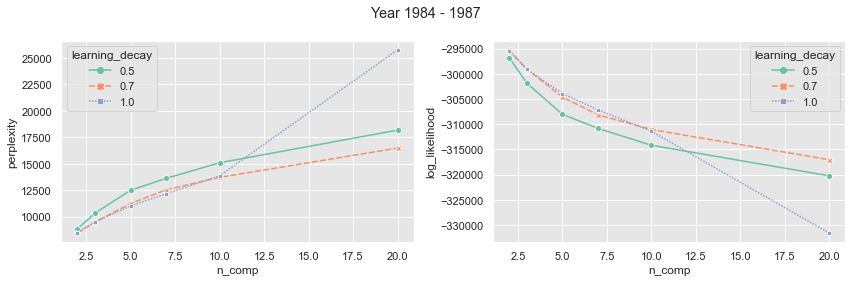

In [2]:
def clean_data(df):
    df_clean = df.copy()
    df_clean['air_date'] = pd.to_datetime(df['air_date'], format='%Y-%m-%d')
    df_clean['year'] = df_clean['air_date'].dt.year
    df_clean['question'] = df_clean['question'].replace(r'\\n',' ', regex=True) 
    df_clean['question'] = df_clean['question'].replace(r'\<.*?>', ' ', regex=True)
    df_clean['question'] = df_clean['question'].replace(r'[^\w\s]', ' ', regex=True)
    df_clean['question'] = df_clean['question'].str.lower()
    return df_clean

In [3]:
df = pd.read_json('../data/JEOPARDY_QUESTIONS1.json')
df = clean_data(df)

In [4]:
years = sorted(df.year.unique())

In [5]:
def top_words_in_topics(model, feature_names, n_top_words):
    output = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        output[topic_idx] = list(zip(top_features, weights))
    return output

In [6]:
def plot_top_words(model, feature_names, n_top_words, title, save=None):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    if save is not None:
        plt.savefig(save, dpi=200)
    plt.show()

In [11]:
def save_figs(df, title, save_name, n_top_words=10):
    years = sorted(df.year.unique())
    output = []
    for i in range(len(years)):
        if i % 4 == 0:
            output.append(years[i])
    n_top_words = n_top_words
    
    for i in range(len(output)-1):
        if output[i] != 2008:
            df_filter = df.loc[(df['year'] >= output[i]) & (df['year'] < output[i+1])]
        if output[i] == 2008:
            df_filter = df.loc[(df['year'] >= output[i]) & (df['year'] <= output[i+1])]


        vectorizer = TfidfVectorizer(stop_words='english', max_features=2000, max_df=0.95, min_df=2)
        X = vectorizer.fit_transform(df_filter['question'])
        lda = LatentDirichletAllocation(n_components=5, learning_method='online',n_jobs=-1, random_state=0)
        lda.fit(X)
        if output[i] != 2008:
            feature_names = vectorizer.get_feature_names()
            plot_top_words(lda, feature_names, n_top_words, 
                           f'{title} {output[i]} - {output[i+1]-1}',
                           save=f'{save_name}_{output[i]}_{output[i+1]-1}.jpeg')

        if output[i] == 2008:
            feature_names = vectorizer.get_feature_names()
            plot_top_words(lda, feature_names, n_top_words, 
                           f'{title} {output[i]} - {output[i+1]}',
                           save=f'{save_name}_{output[i]}_{output[i+1]}.jpeg')

### Topics over time on all Jeopardy Rounds

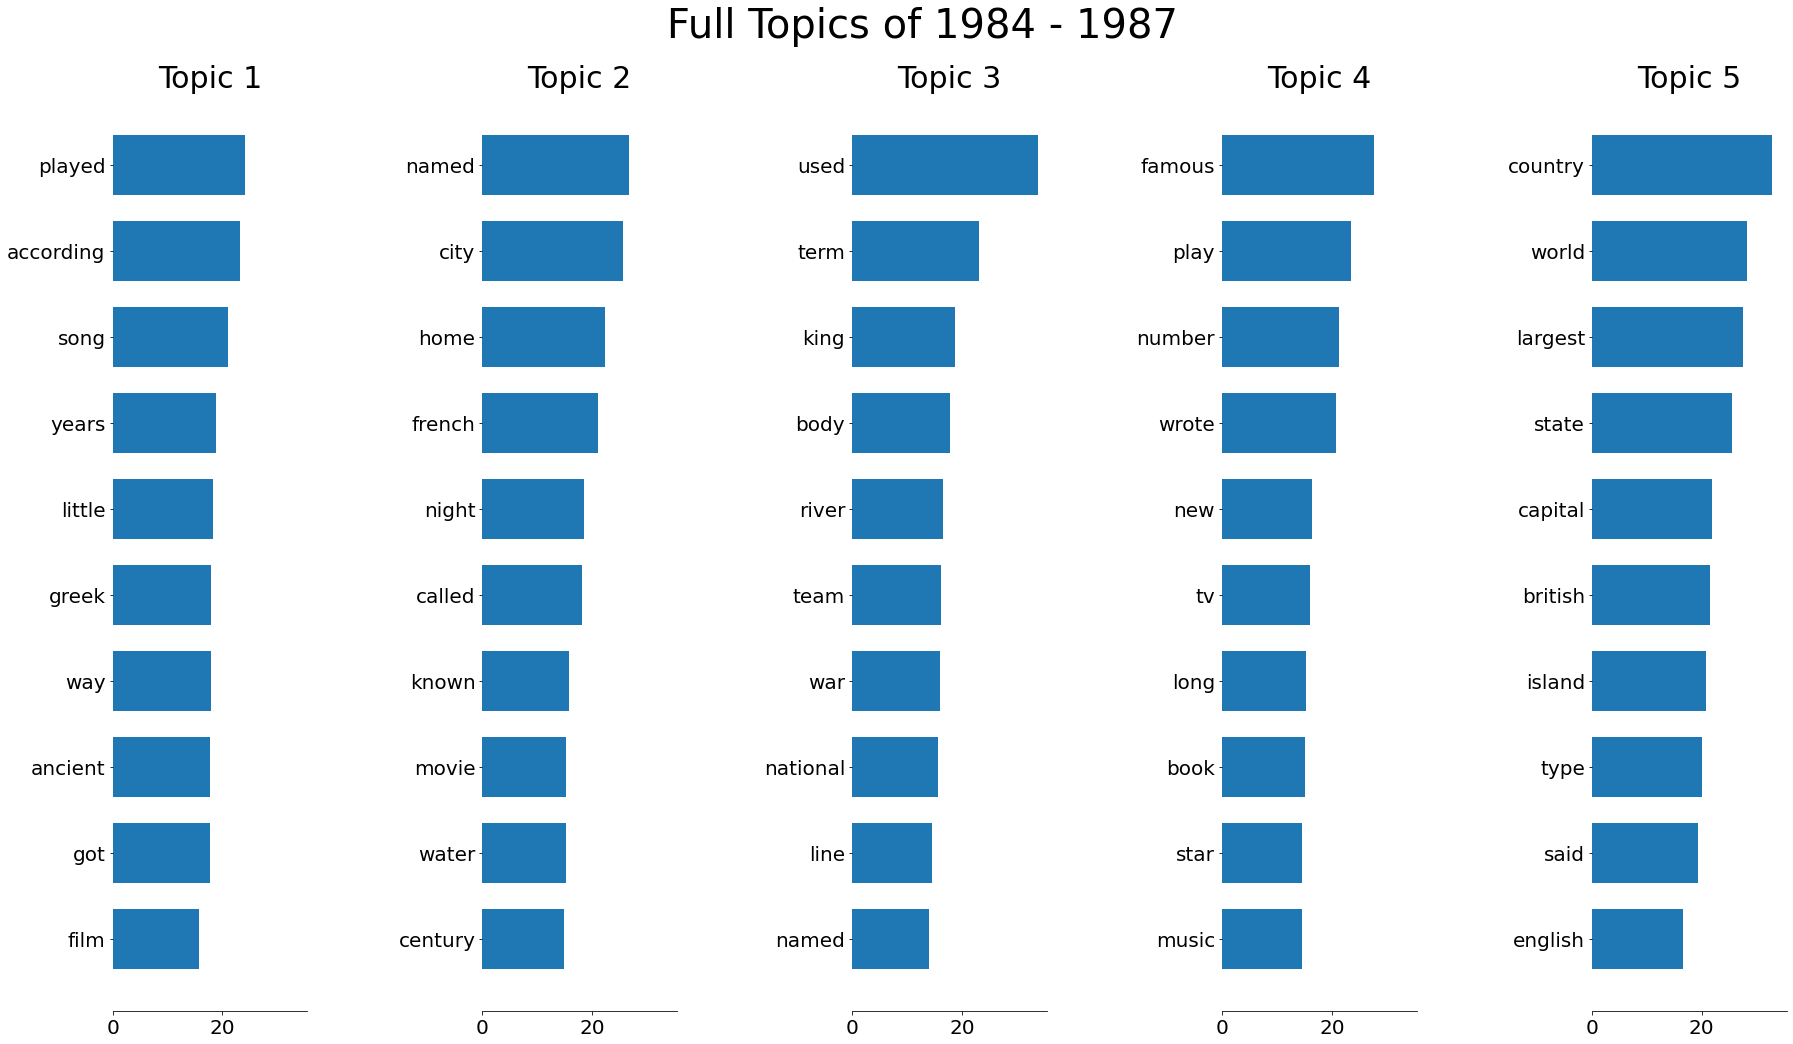

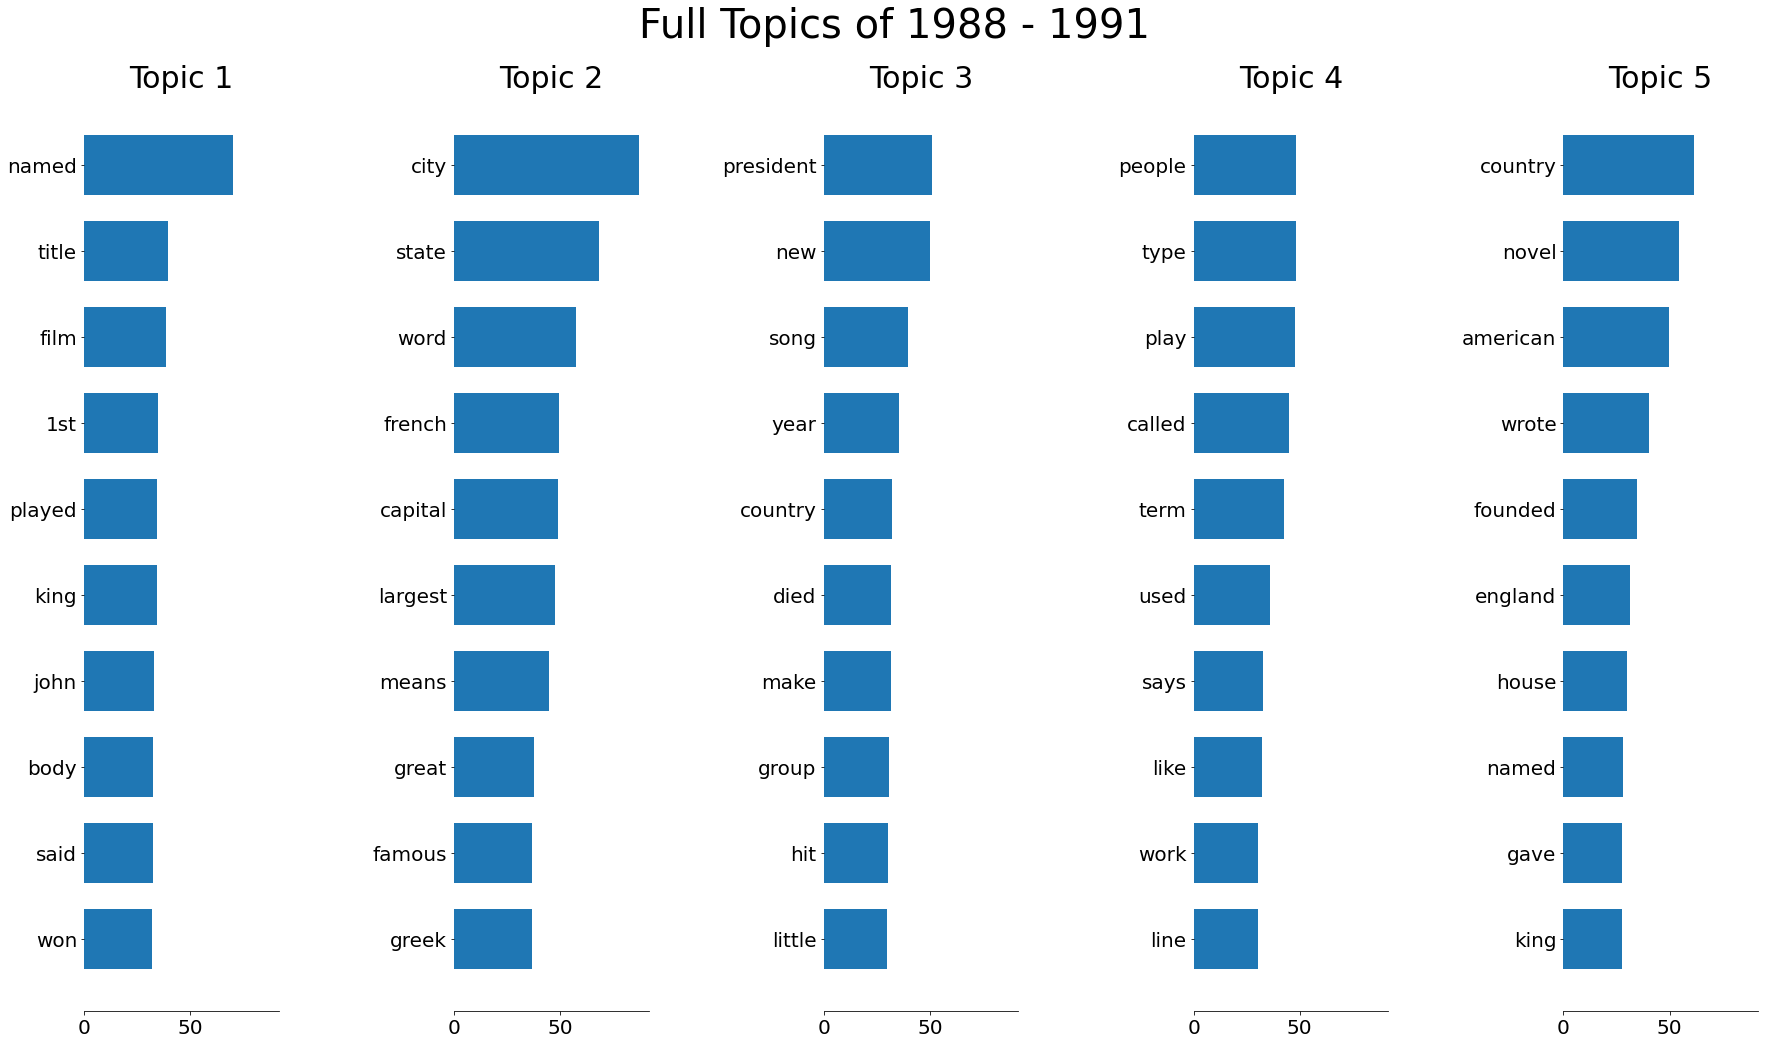

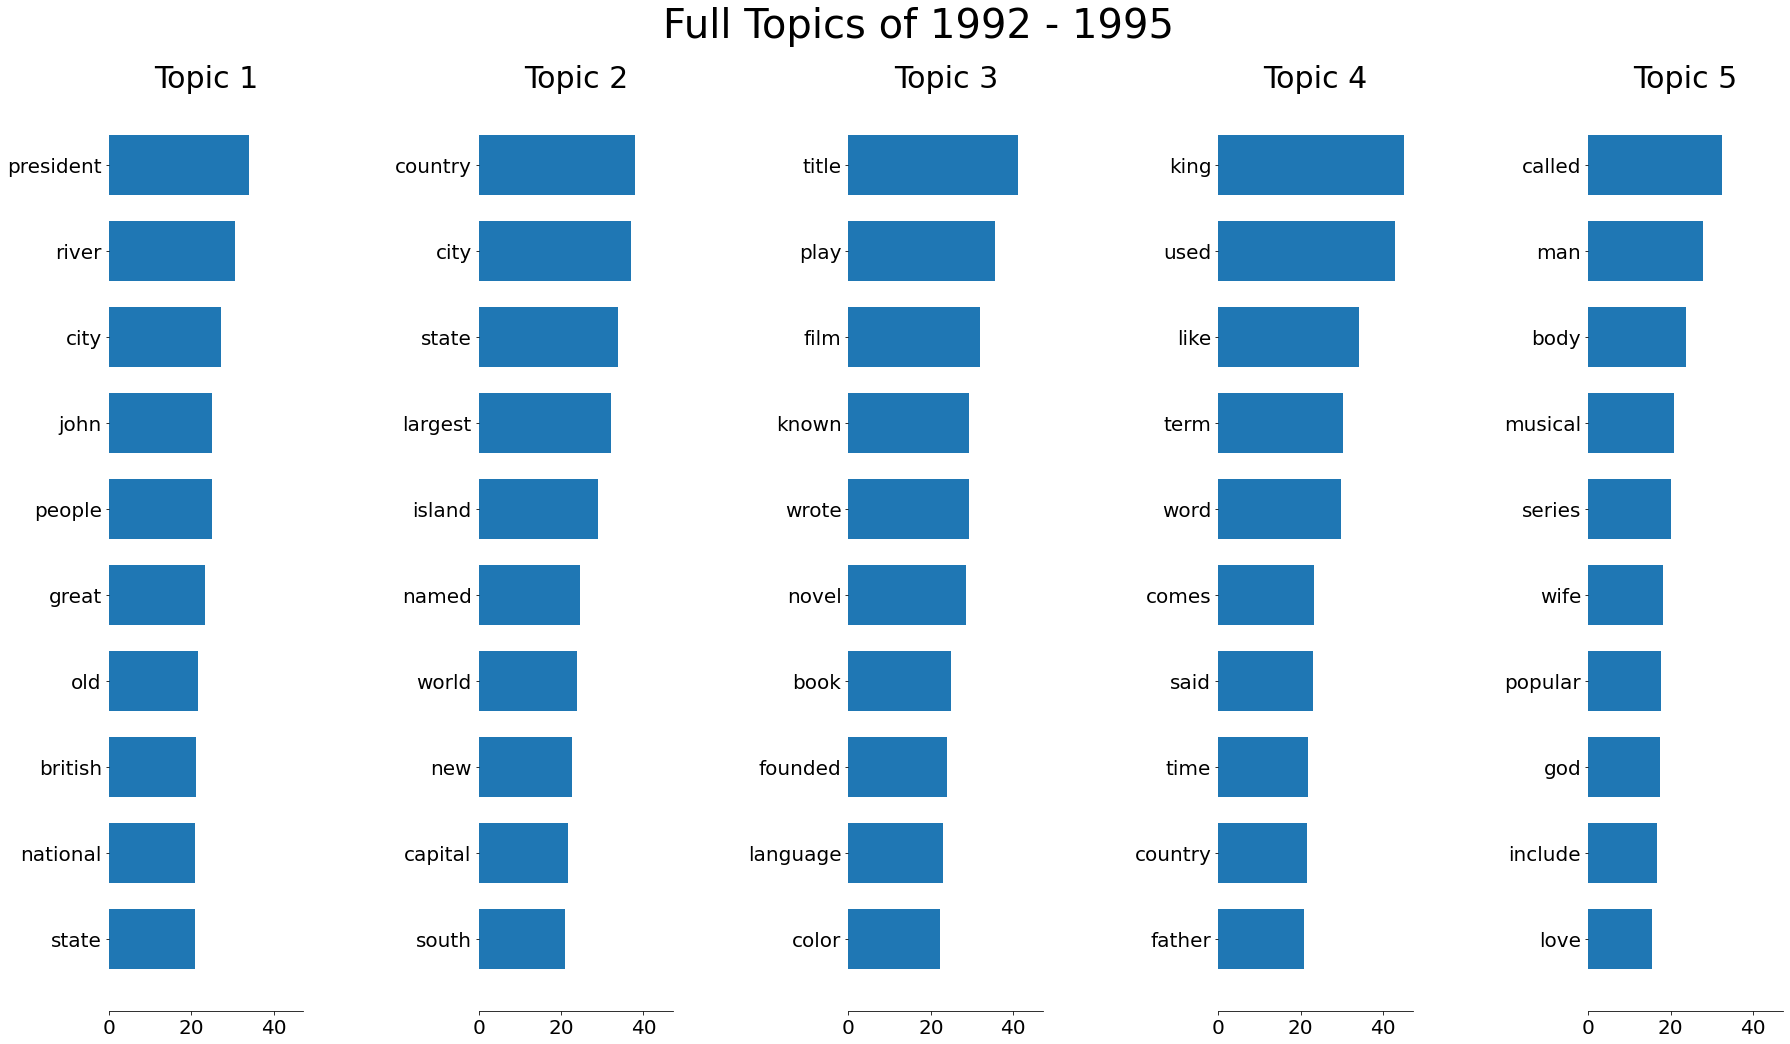

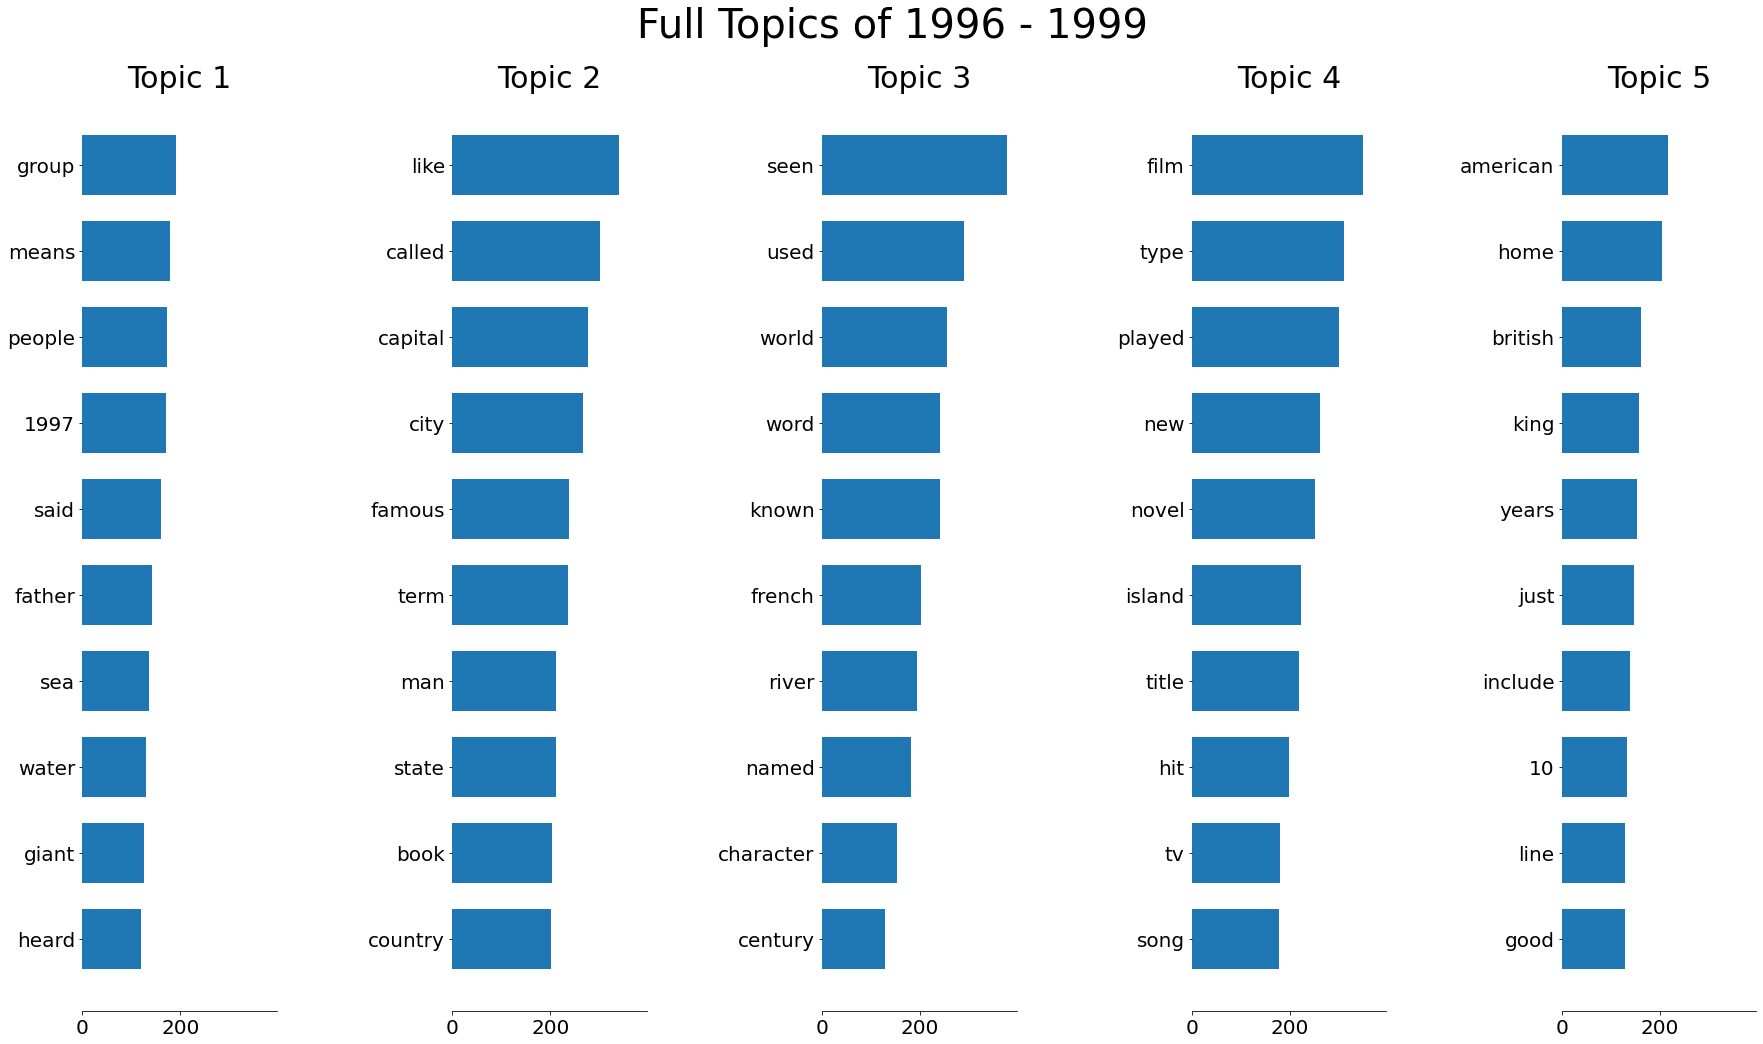

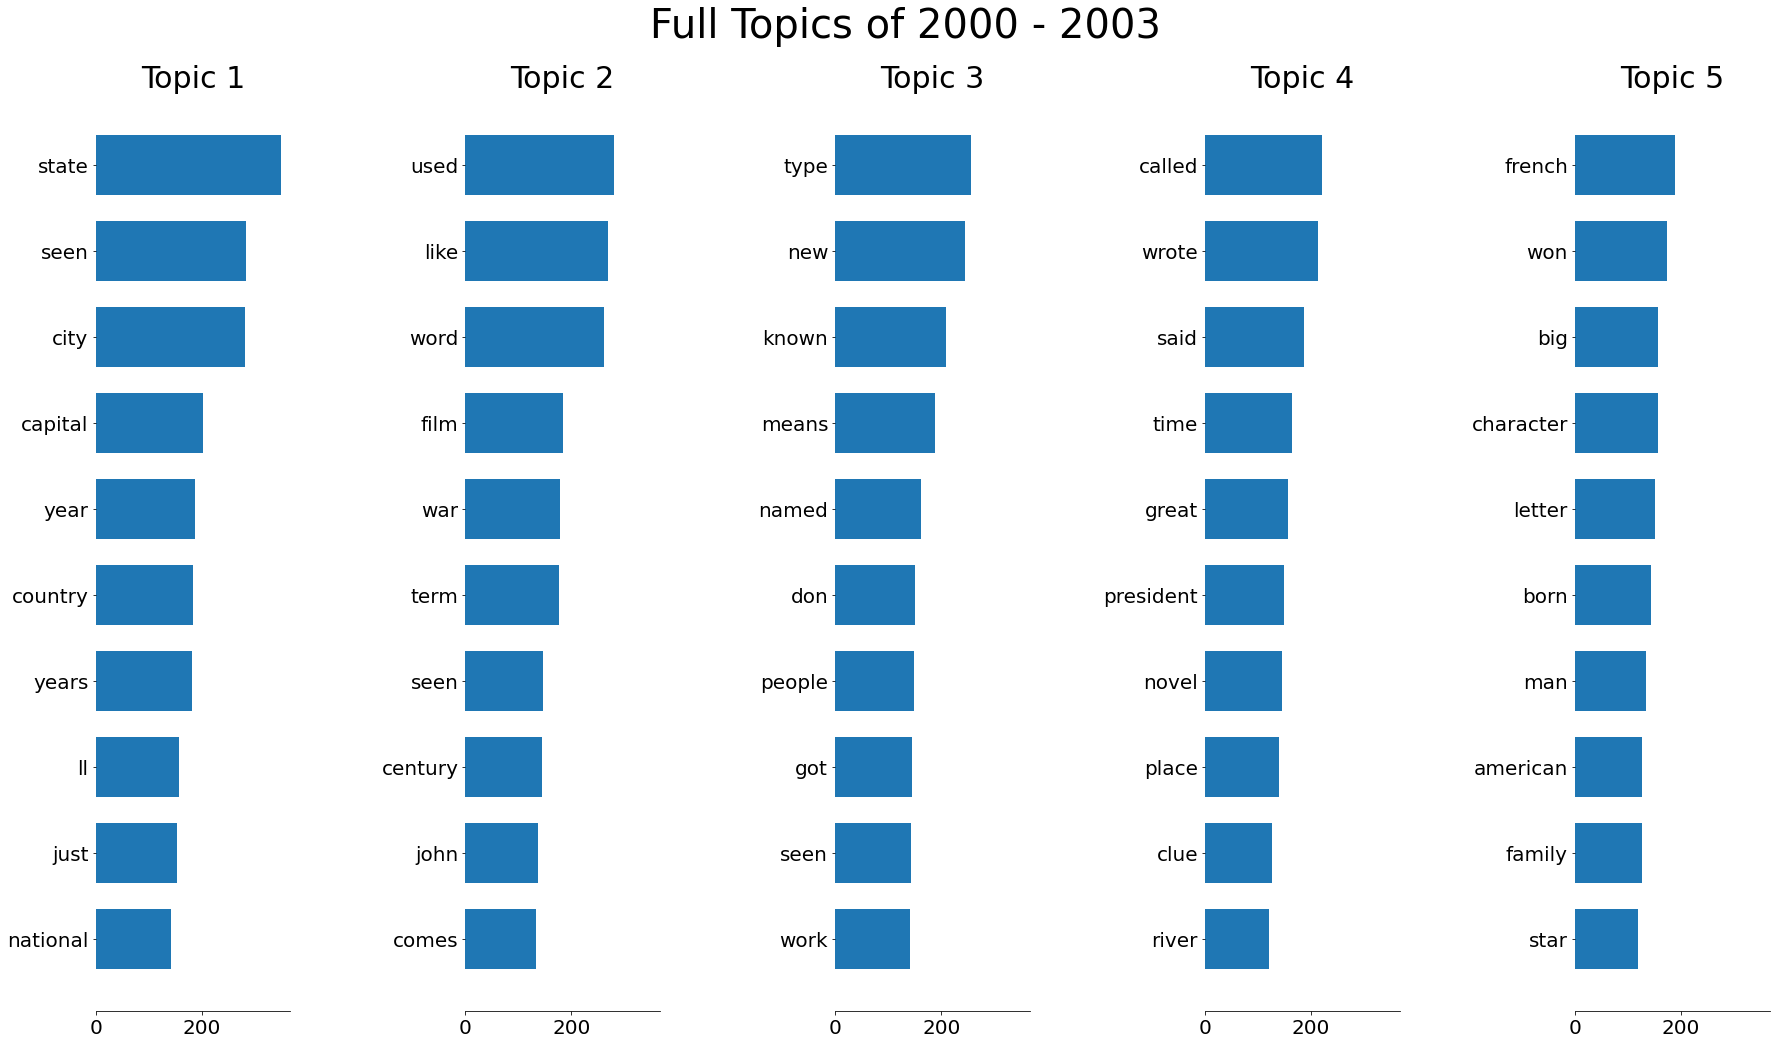

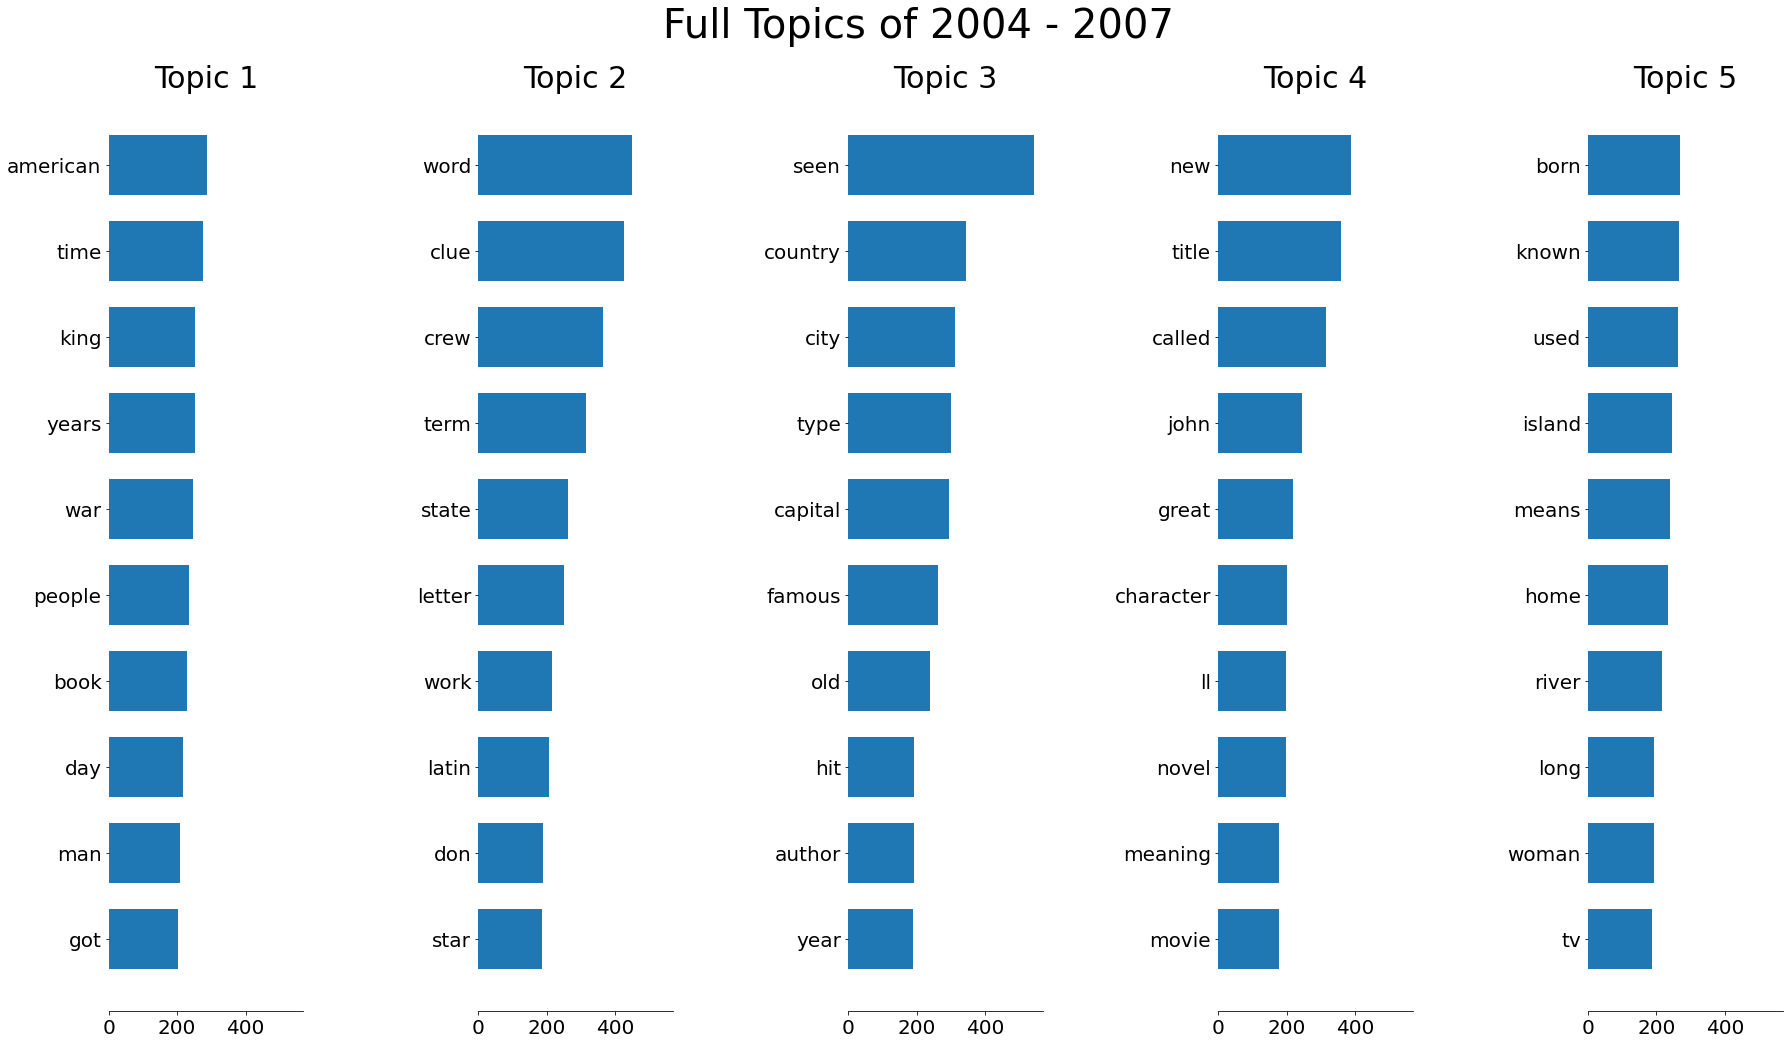

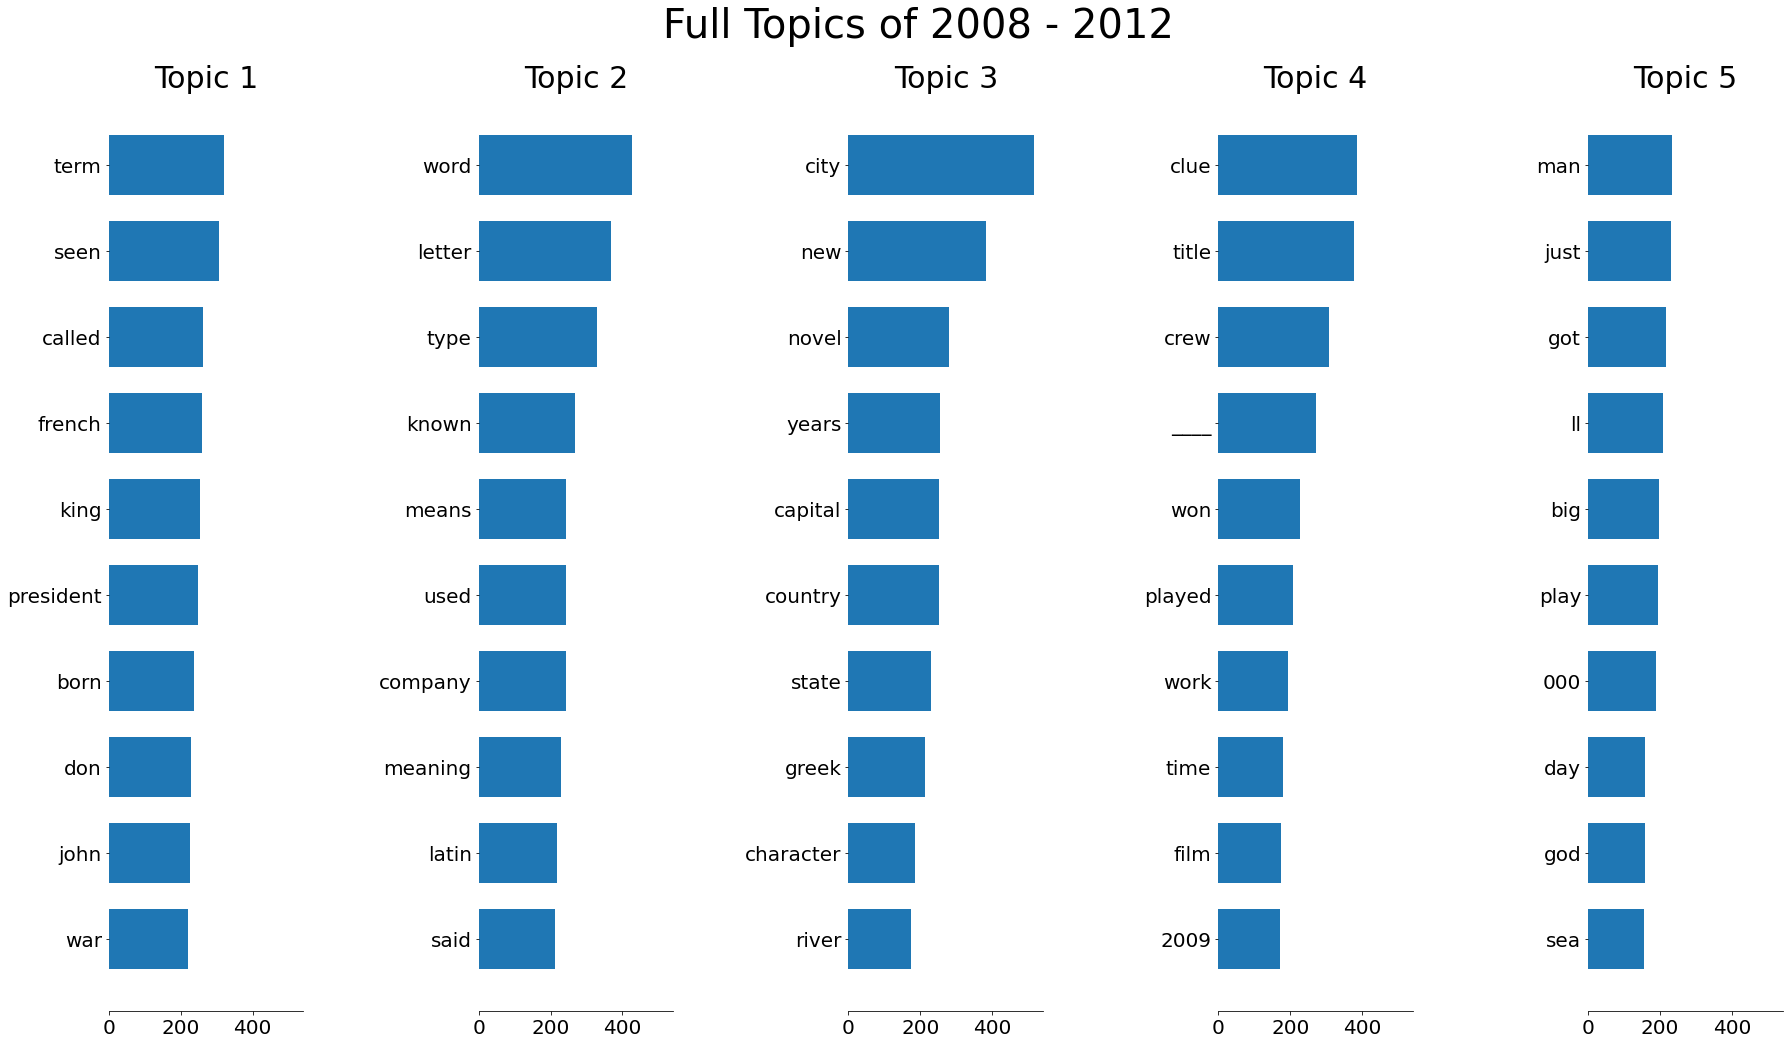

In [12]:
df = pd.read_json('../data/JEOPARDY_QUESTIONS1.json')
df = clean_data(df)
title = 'Full Topics of'
save_name = '../img/full_topics_'
save_figs(df, title, save_name)

### Jeopardy Round

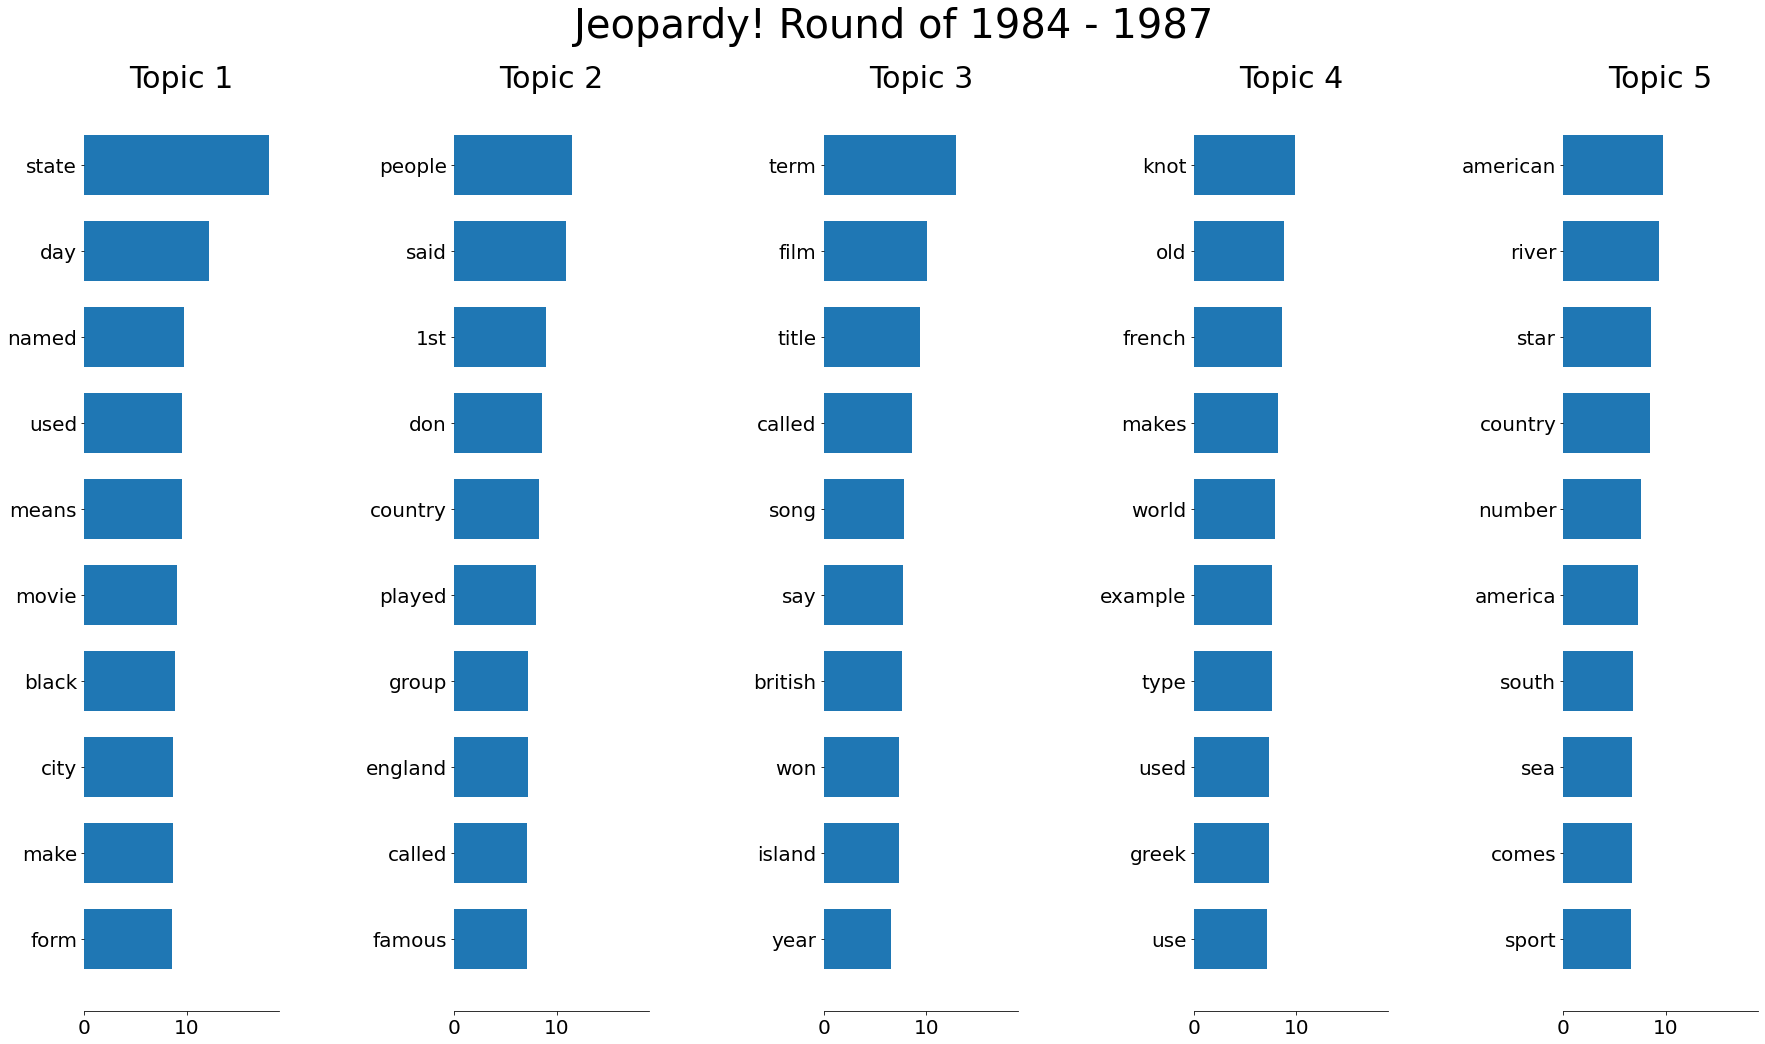

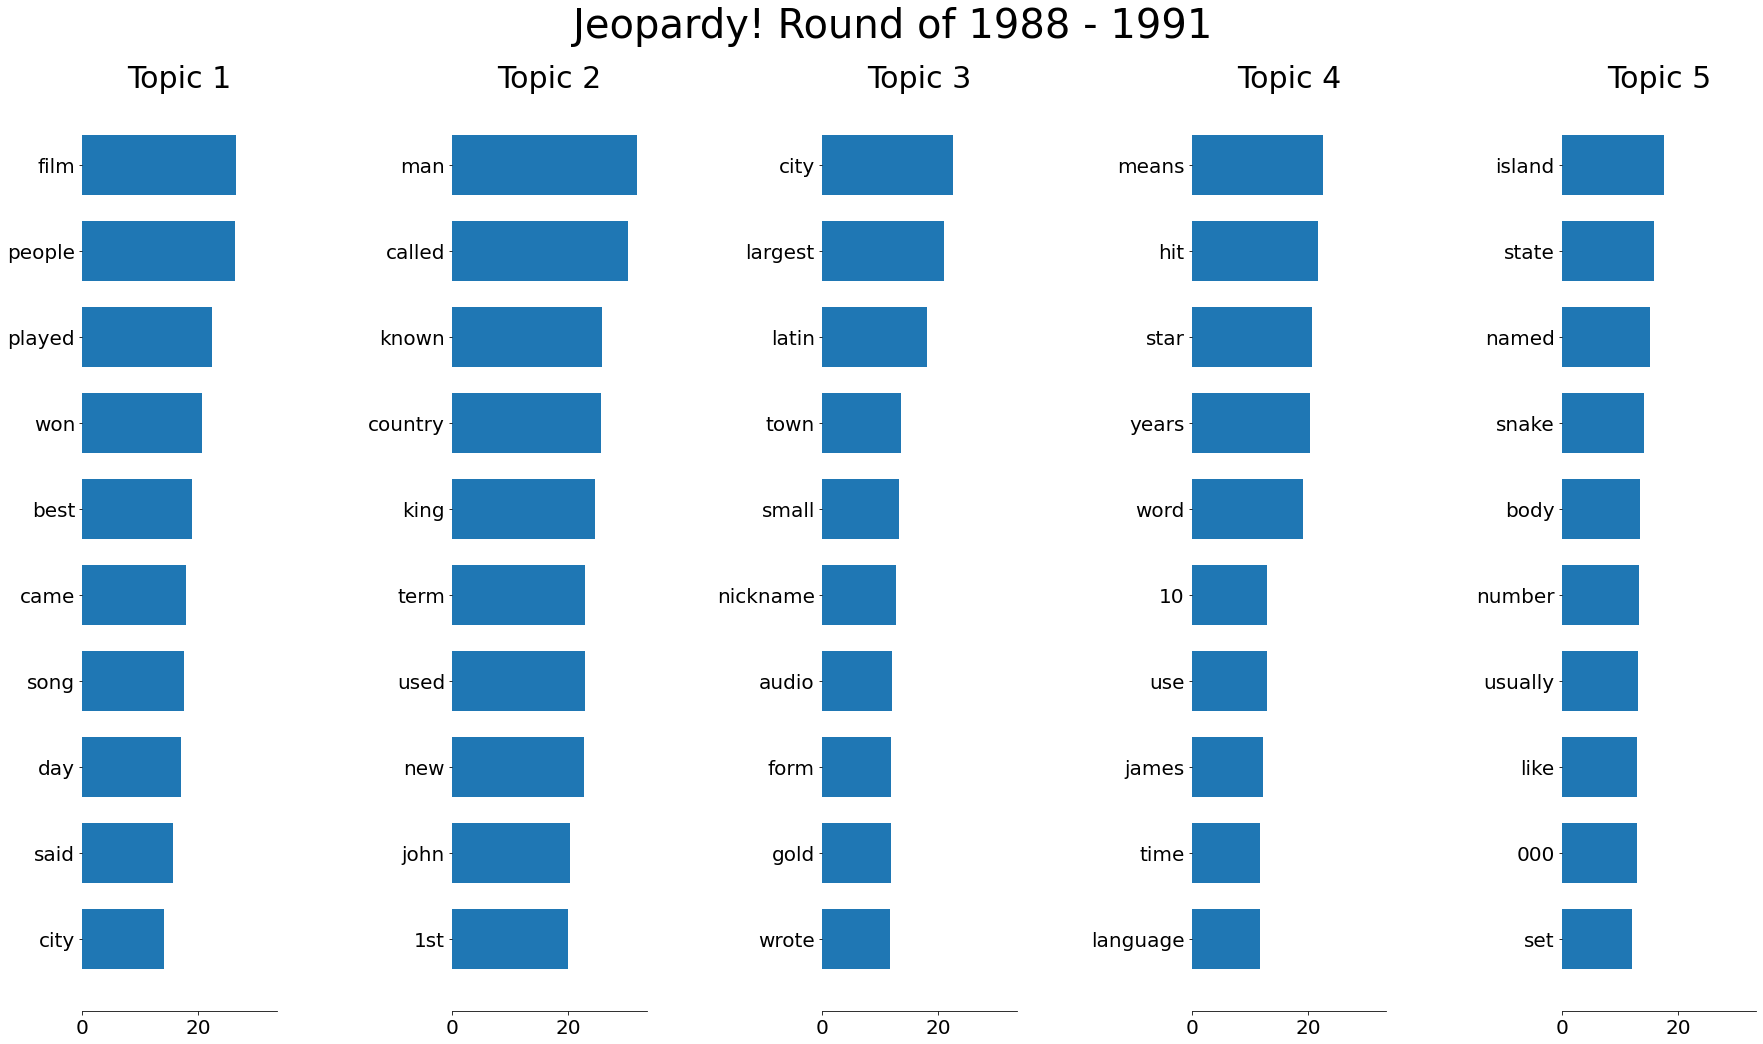

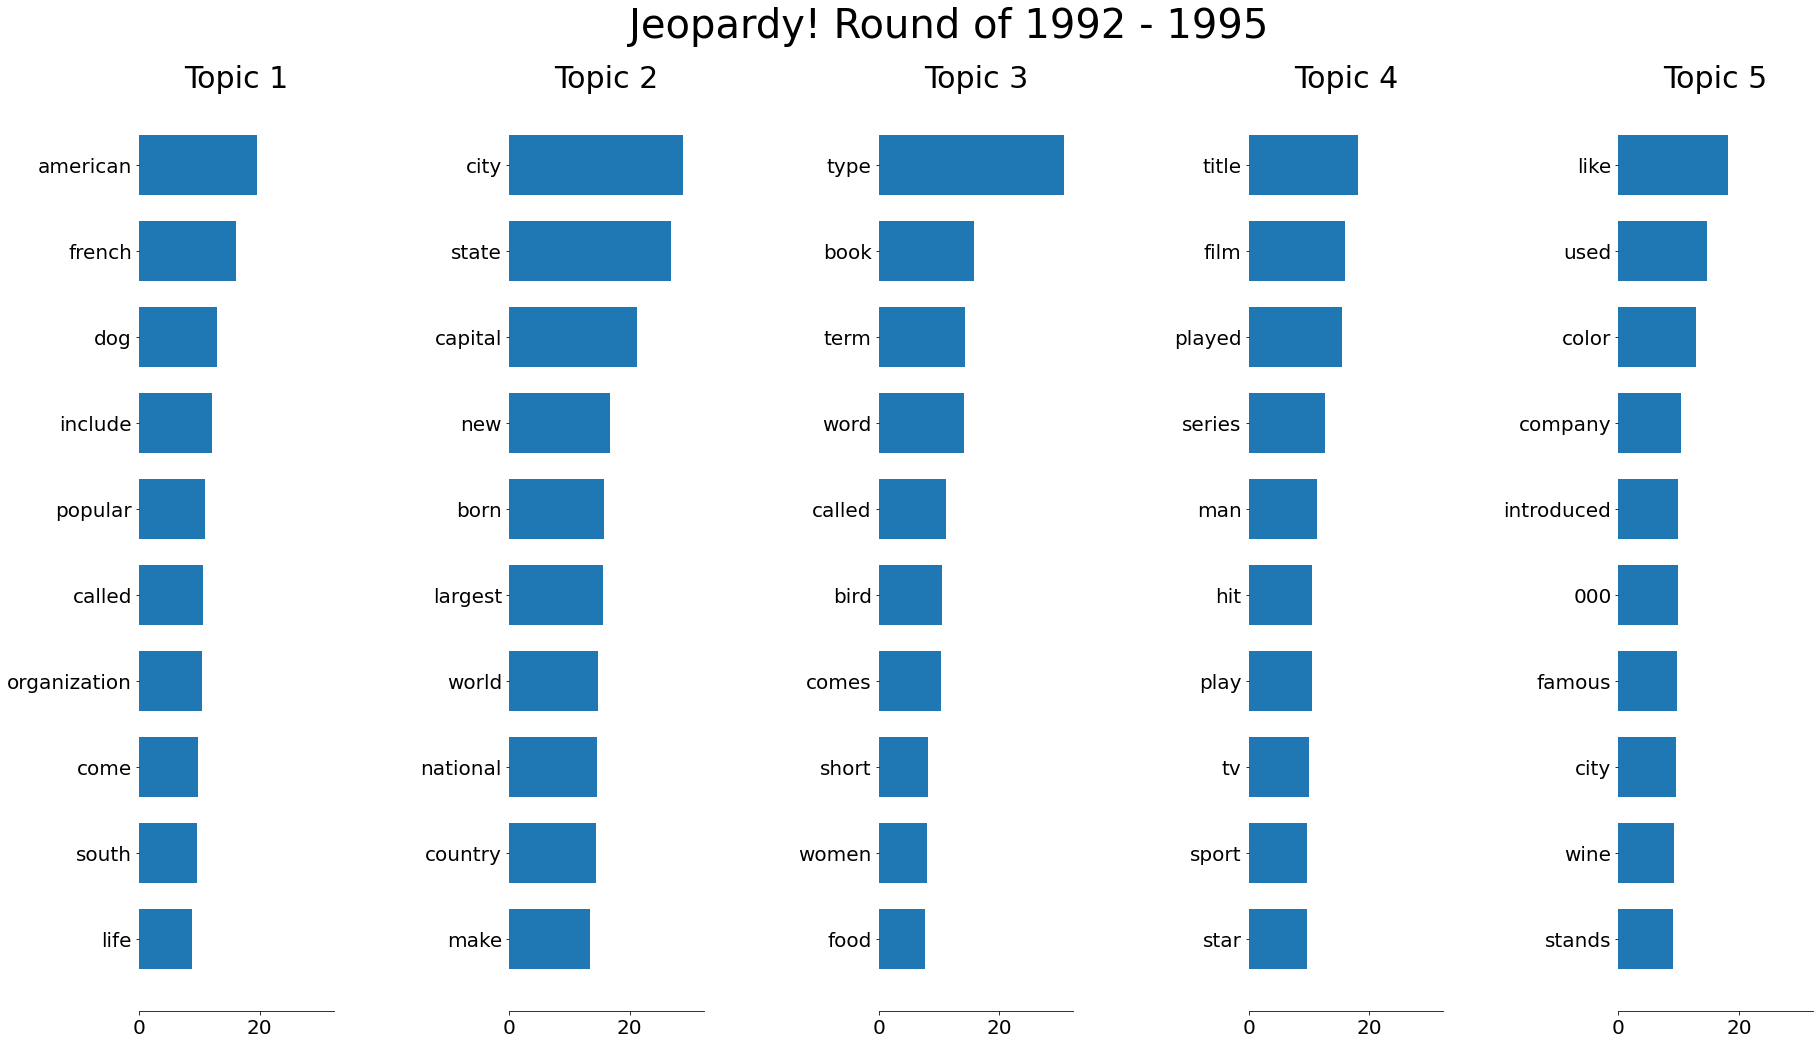

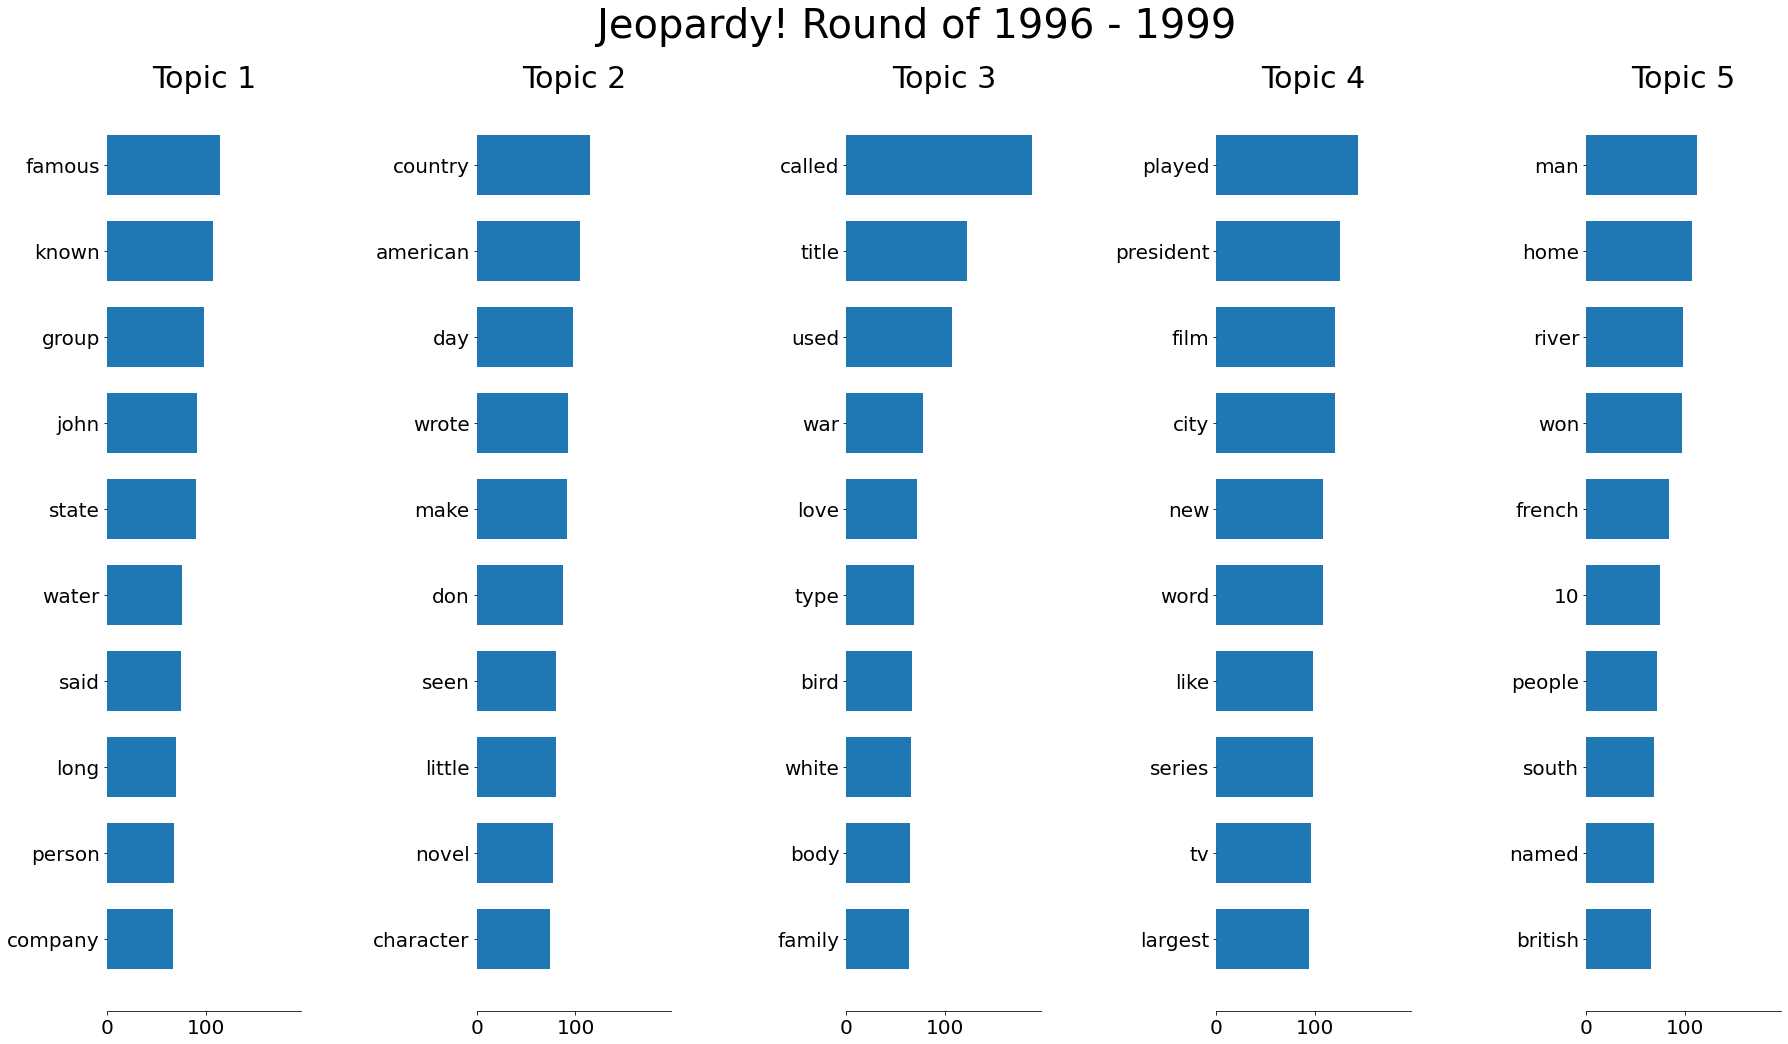

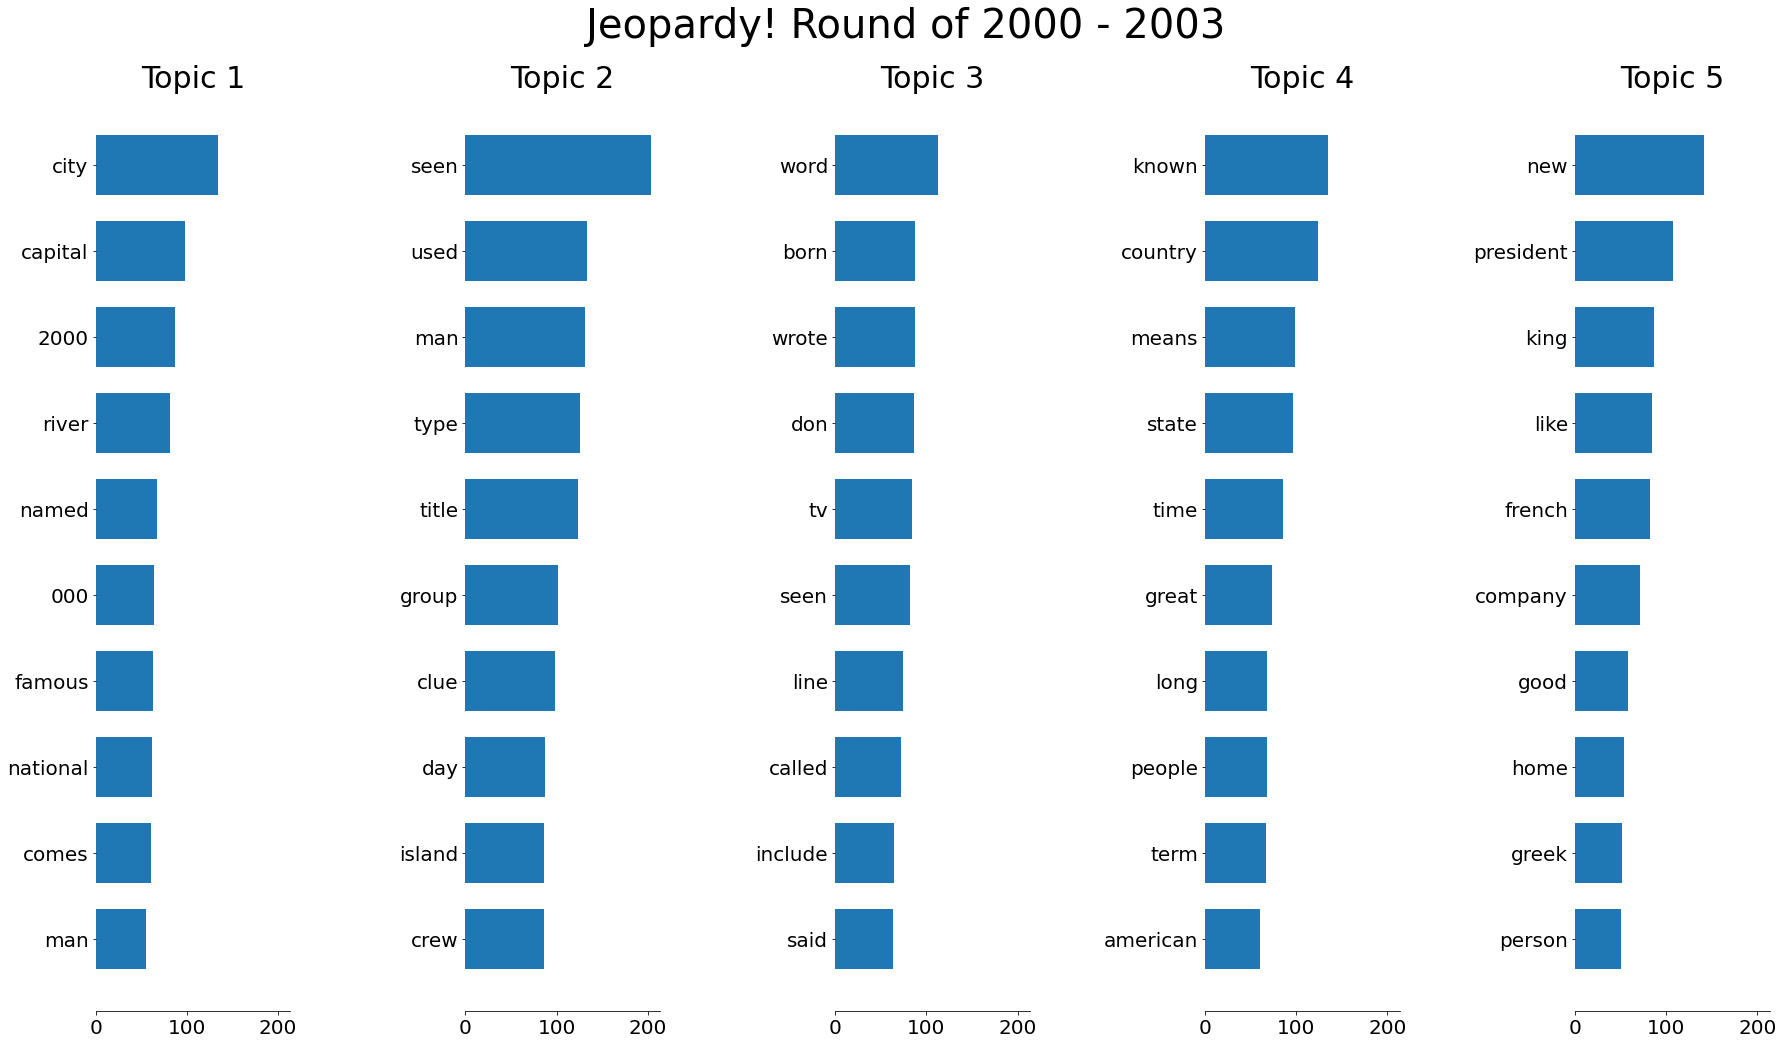

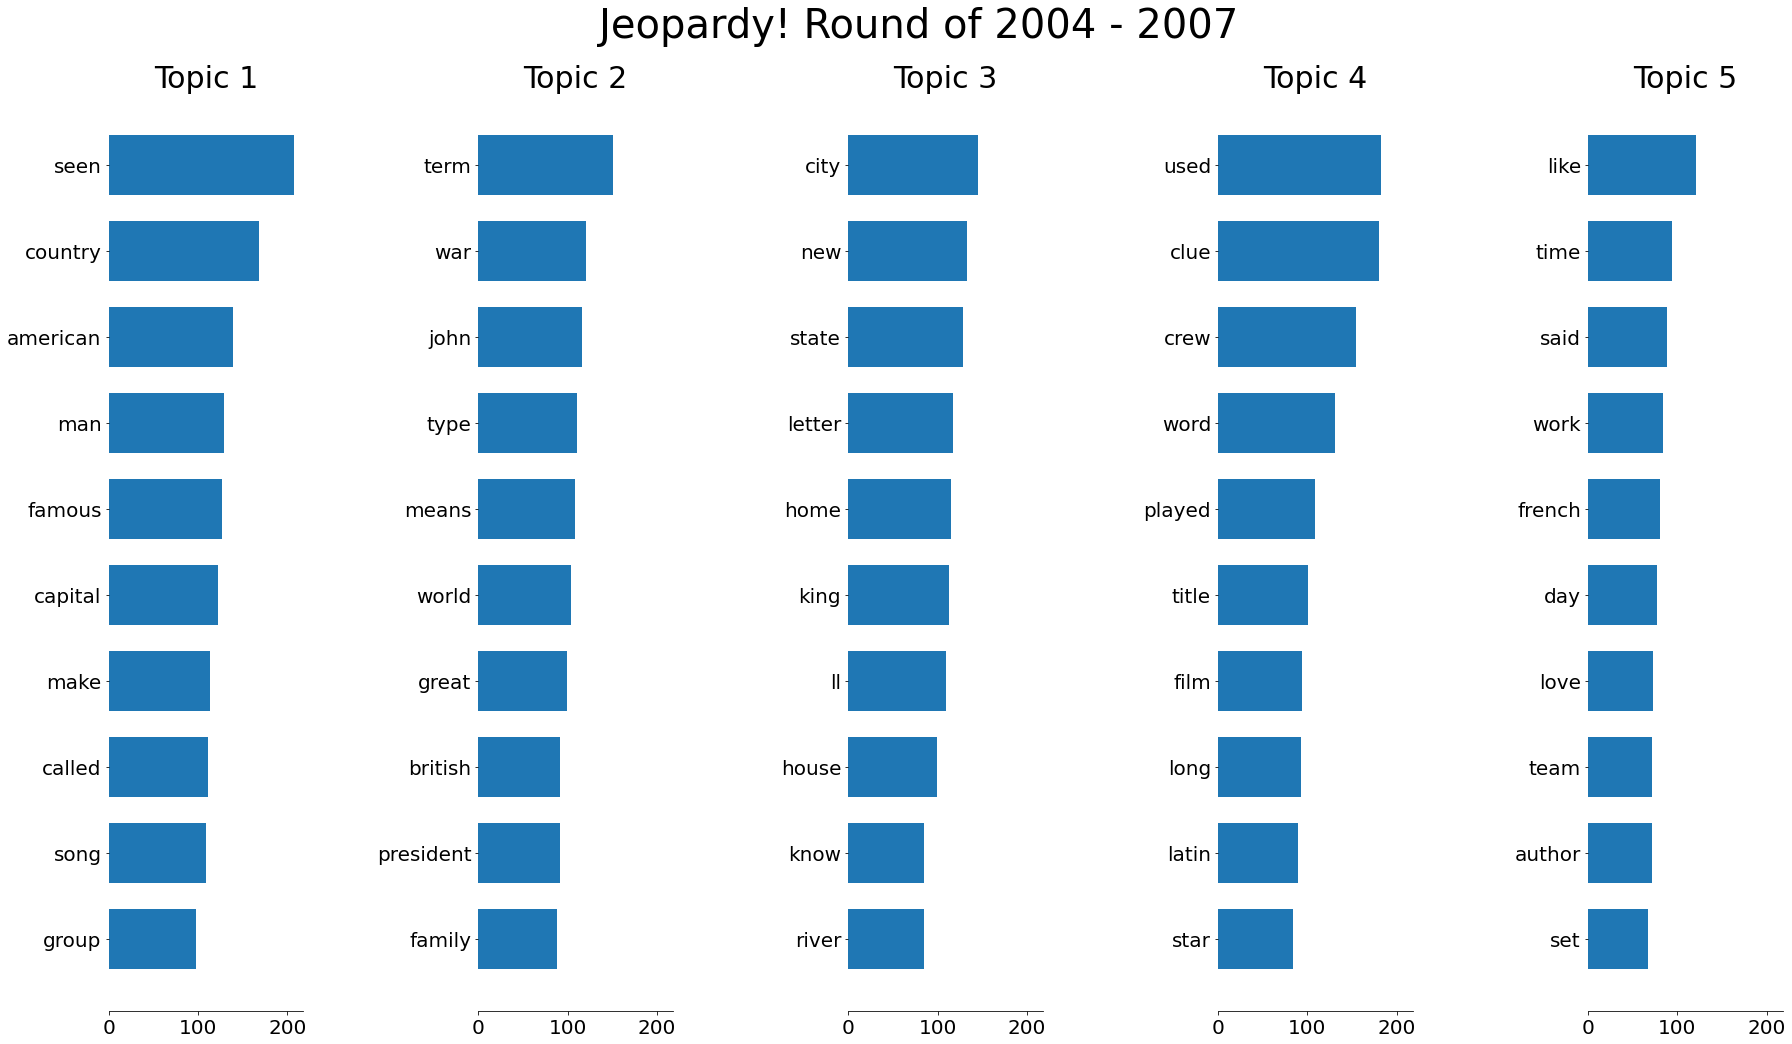

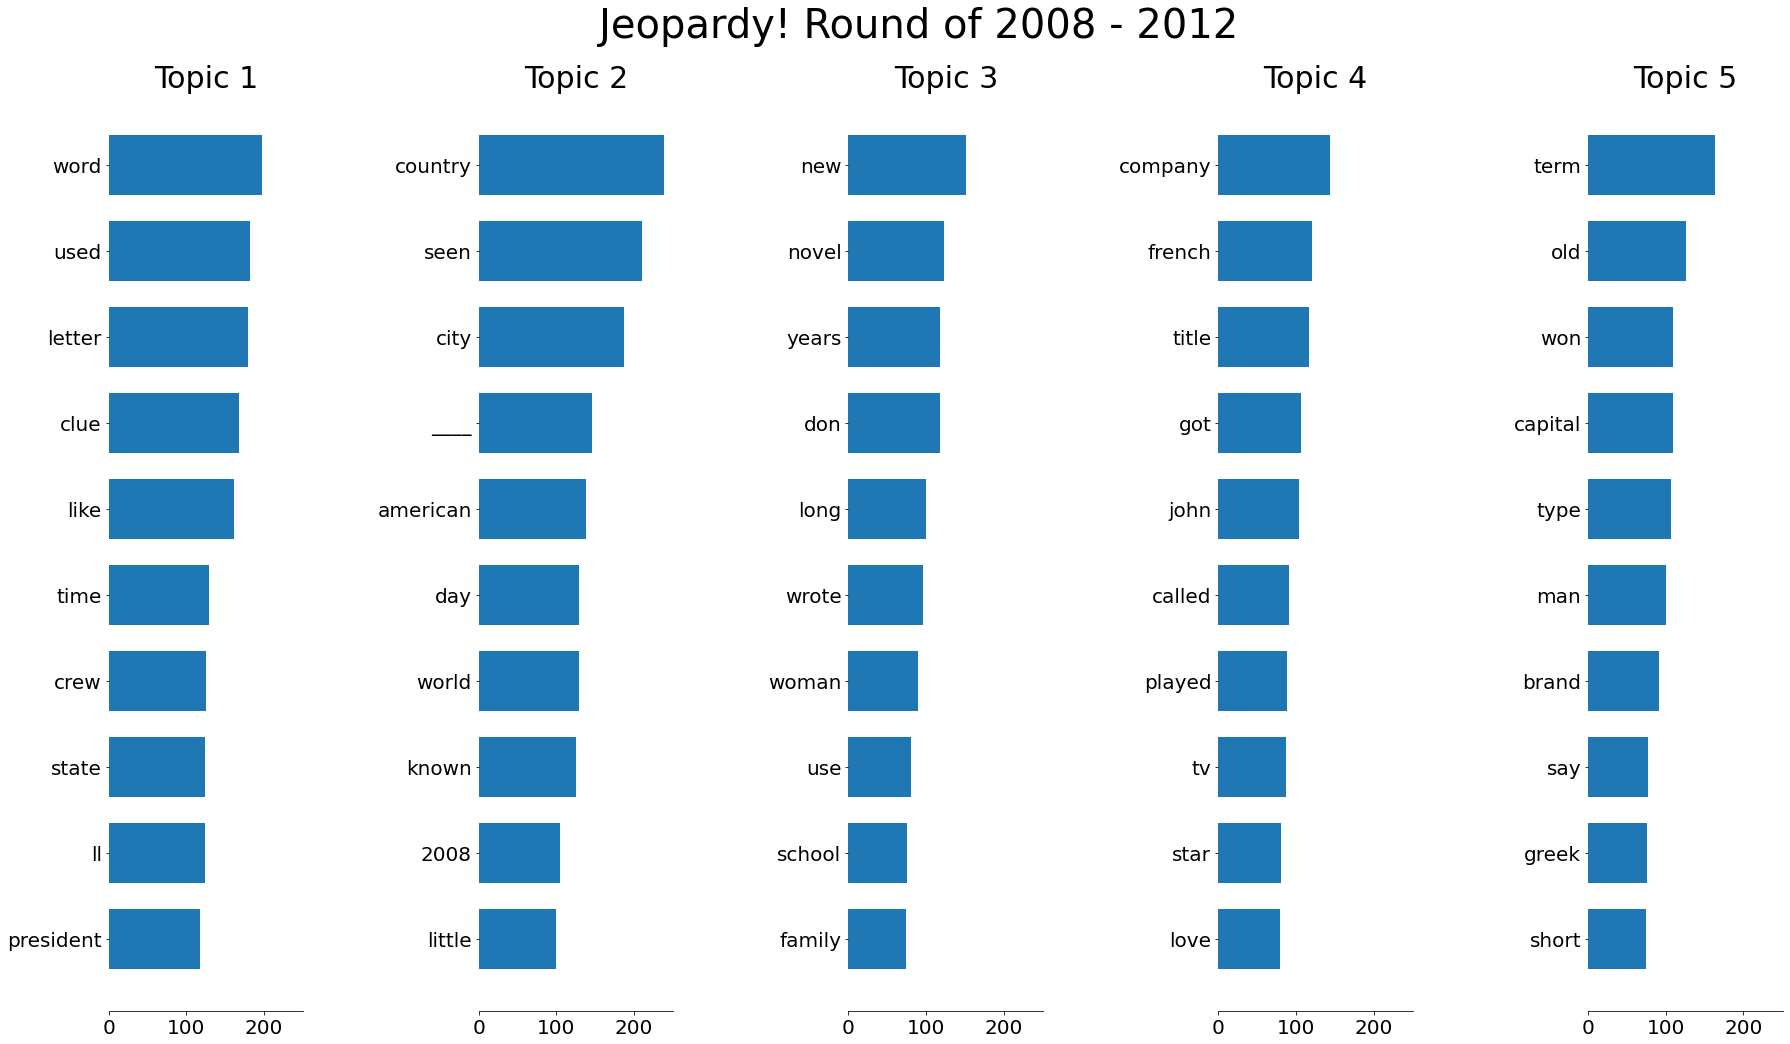

In [14]:
df = pd.read_json('../data/JEOPARDY_QUESTIONS1.json')
df = clean_data(df)
df = df.loc[df['round'] == 'Jeopardy!']
n_top_words = 10
title = 'Jeopardy! Round of'
save_name = '../img/jeopardy_round_'
save_figs(df, title, save_name)

### Double Jeopardy

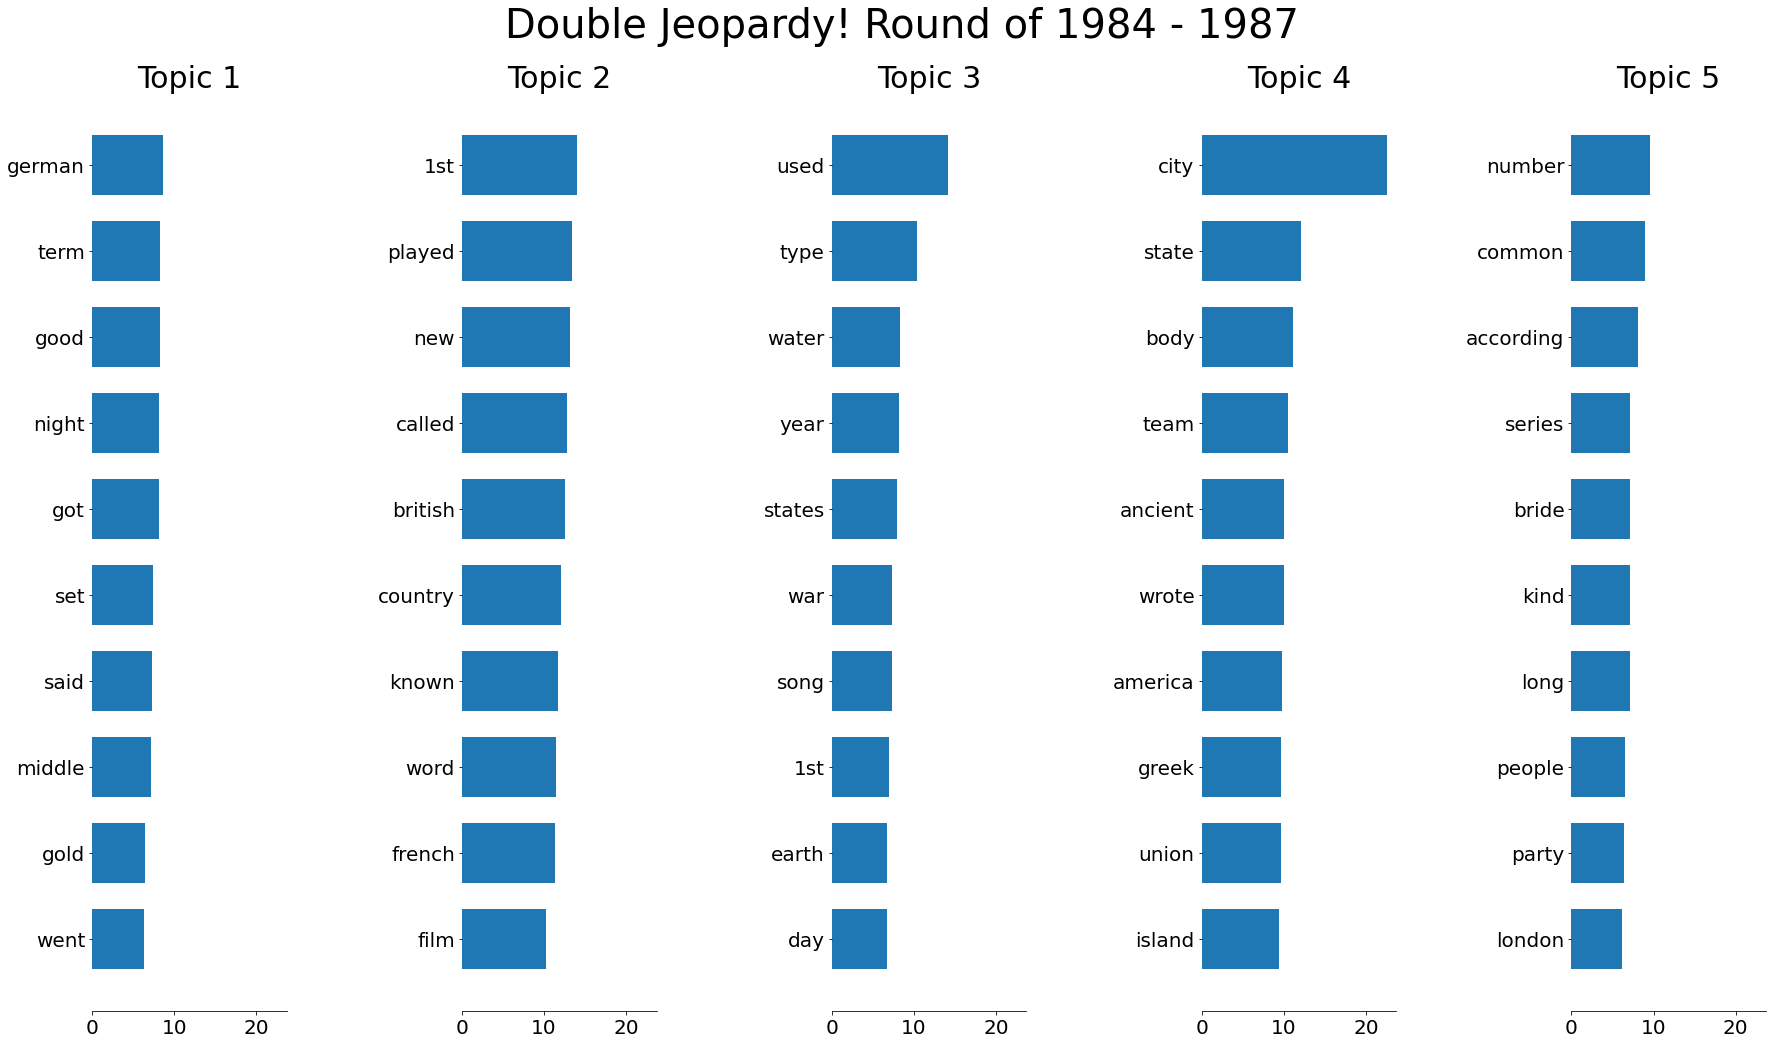

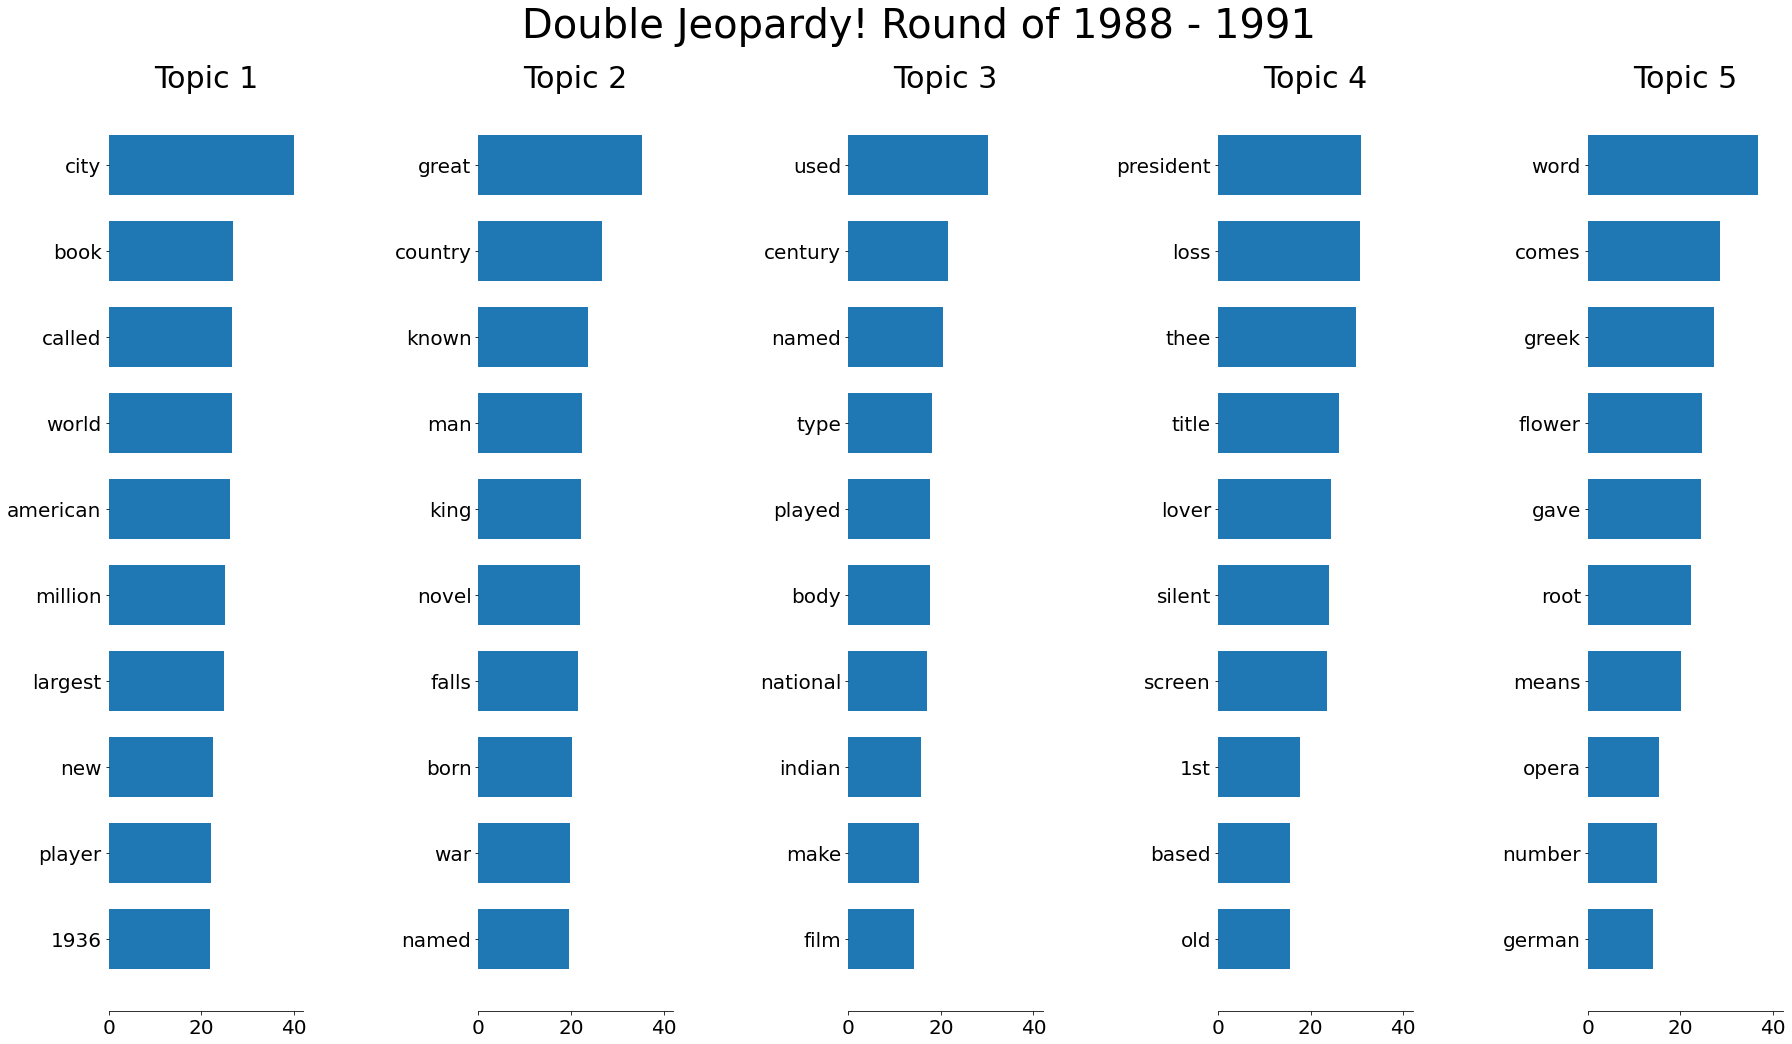

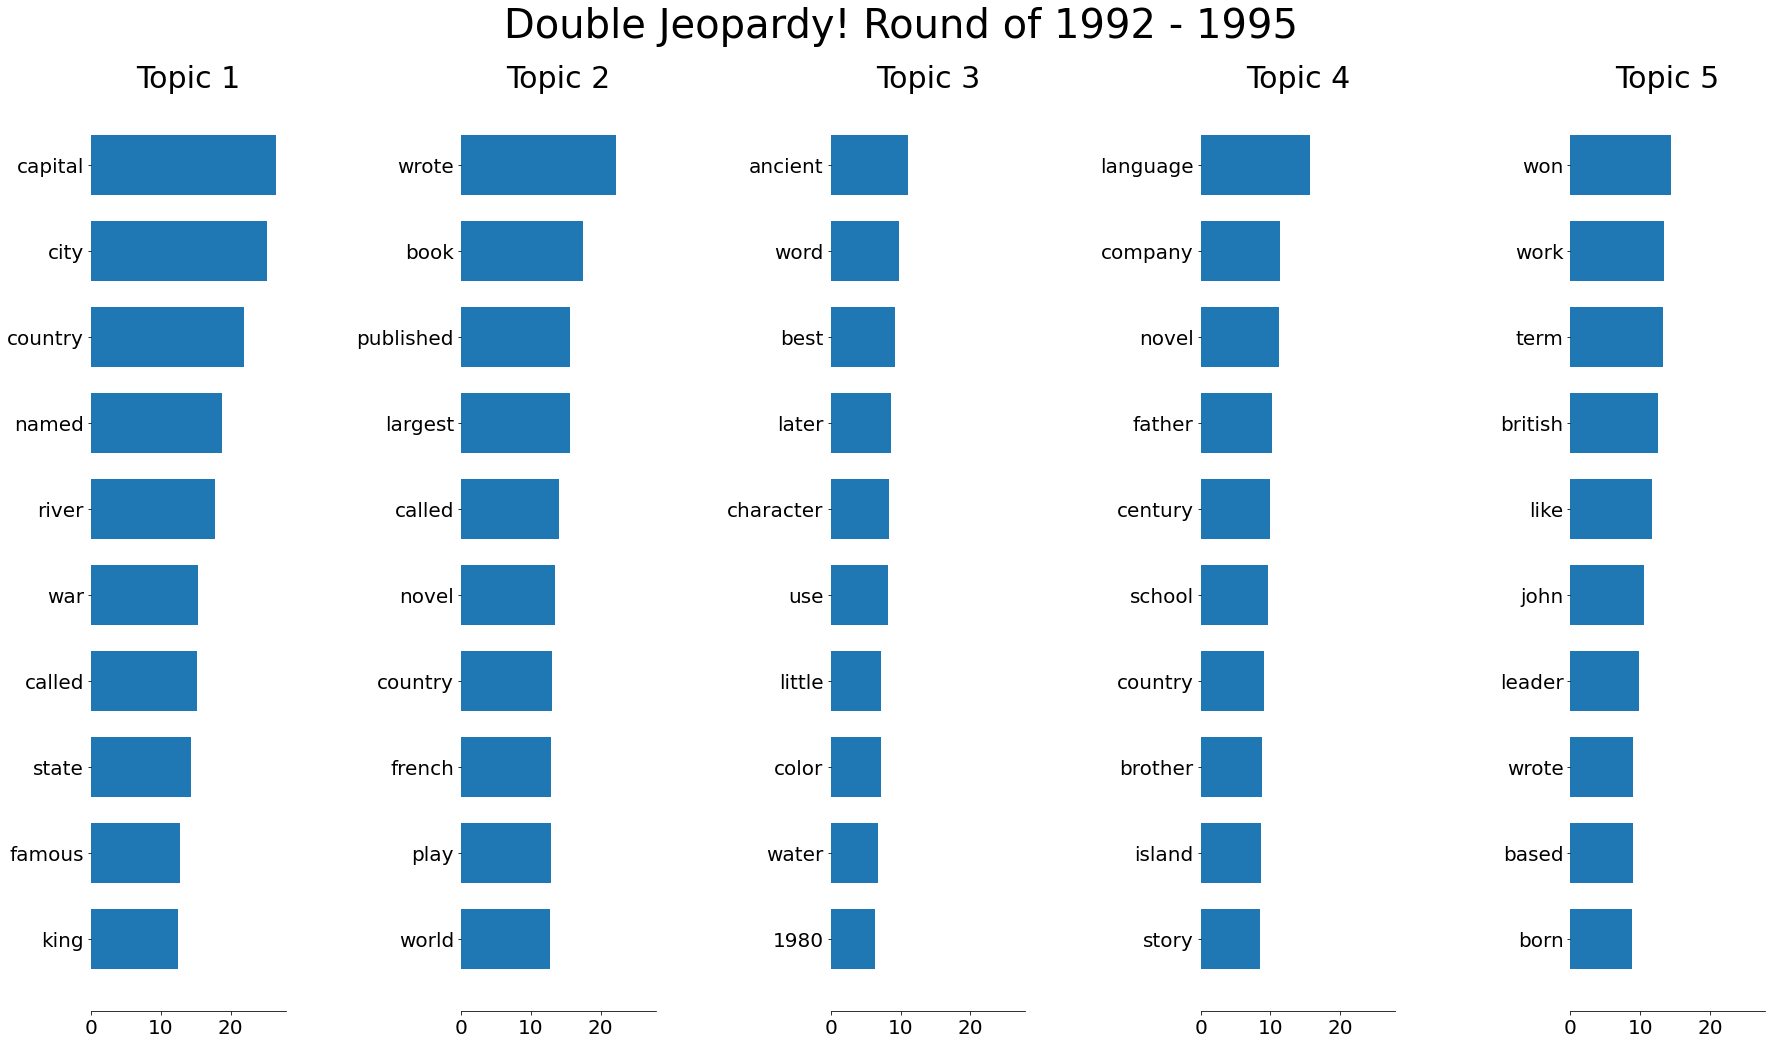

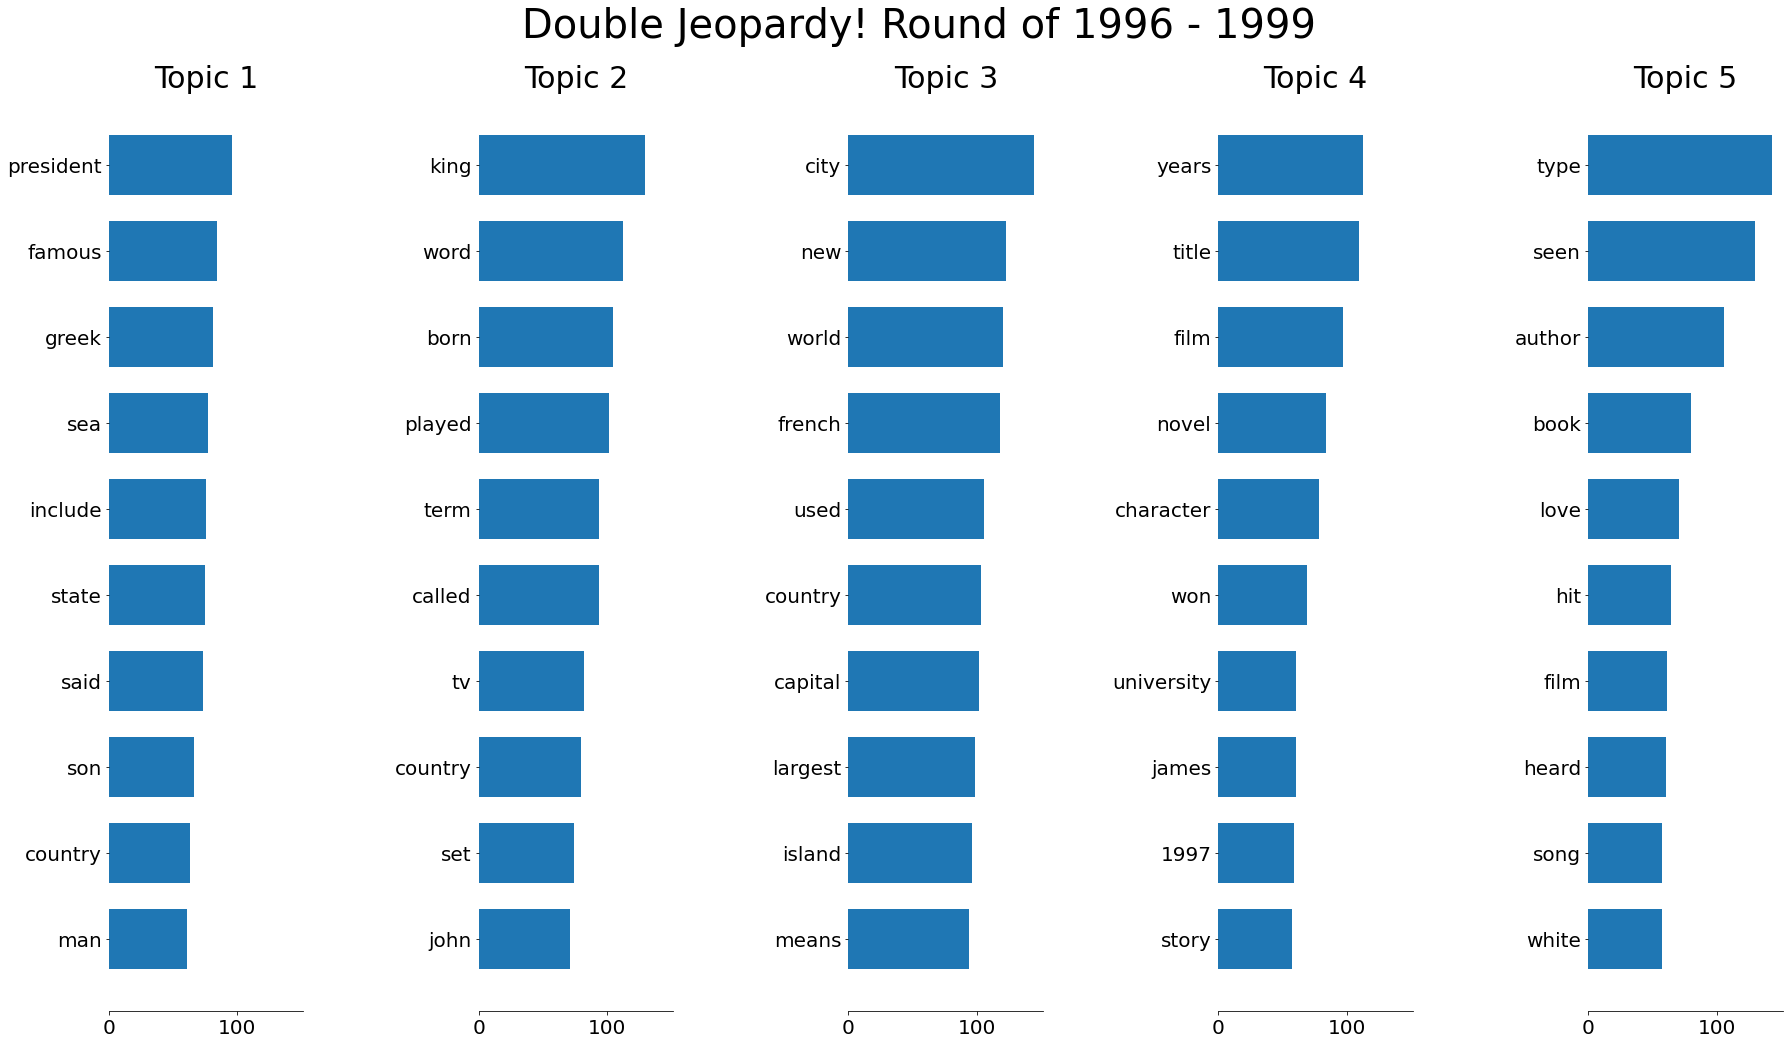

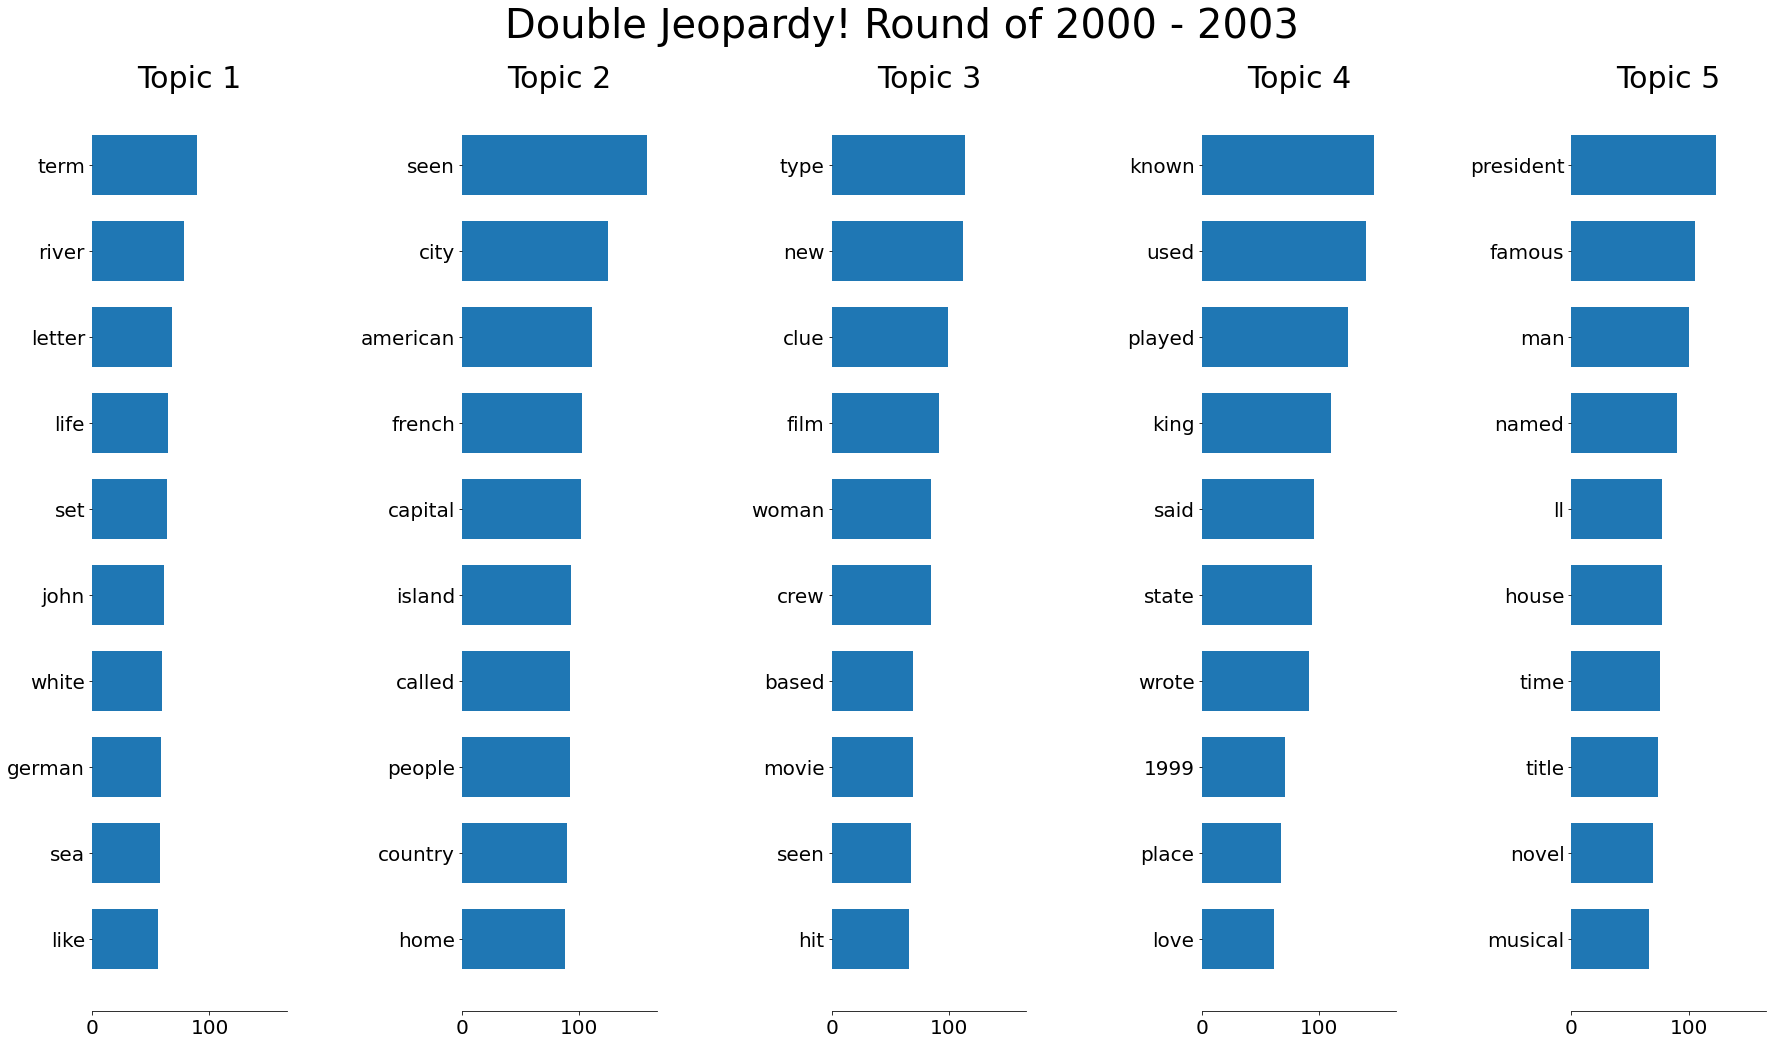

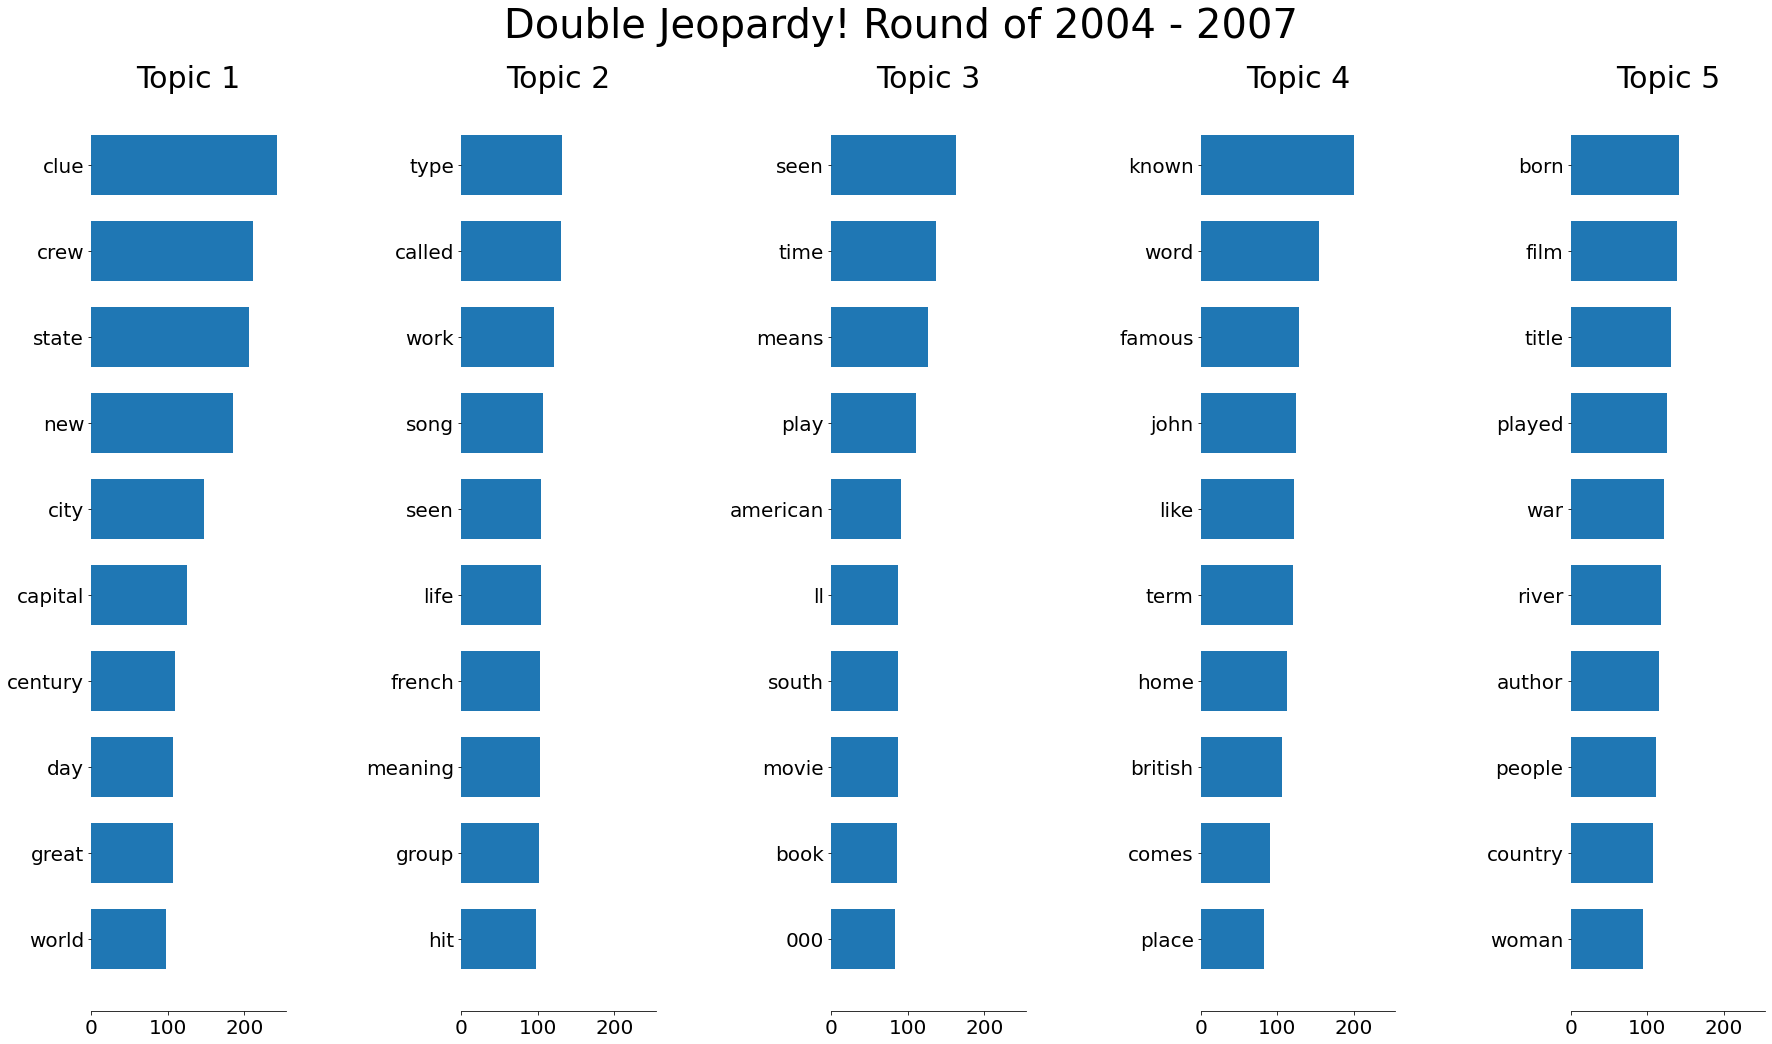

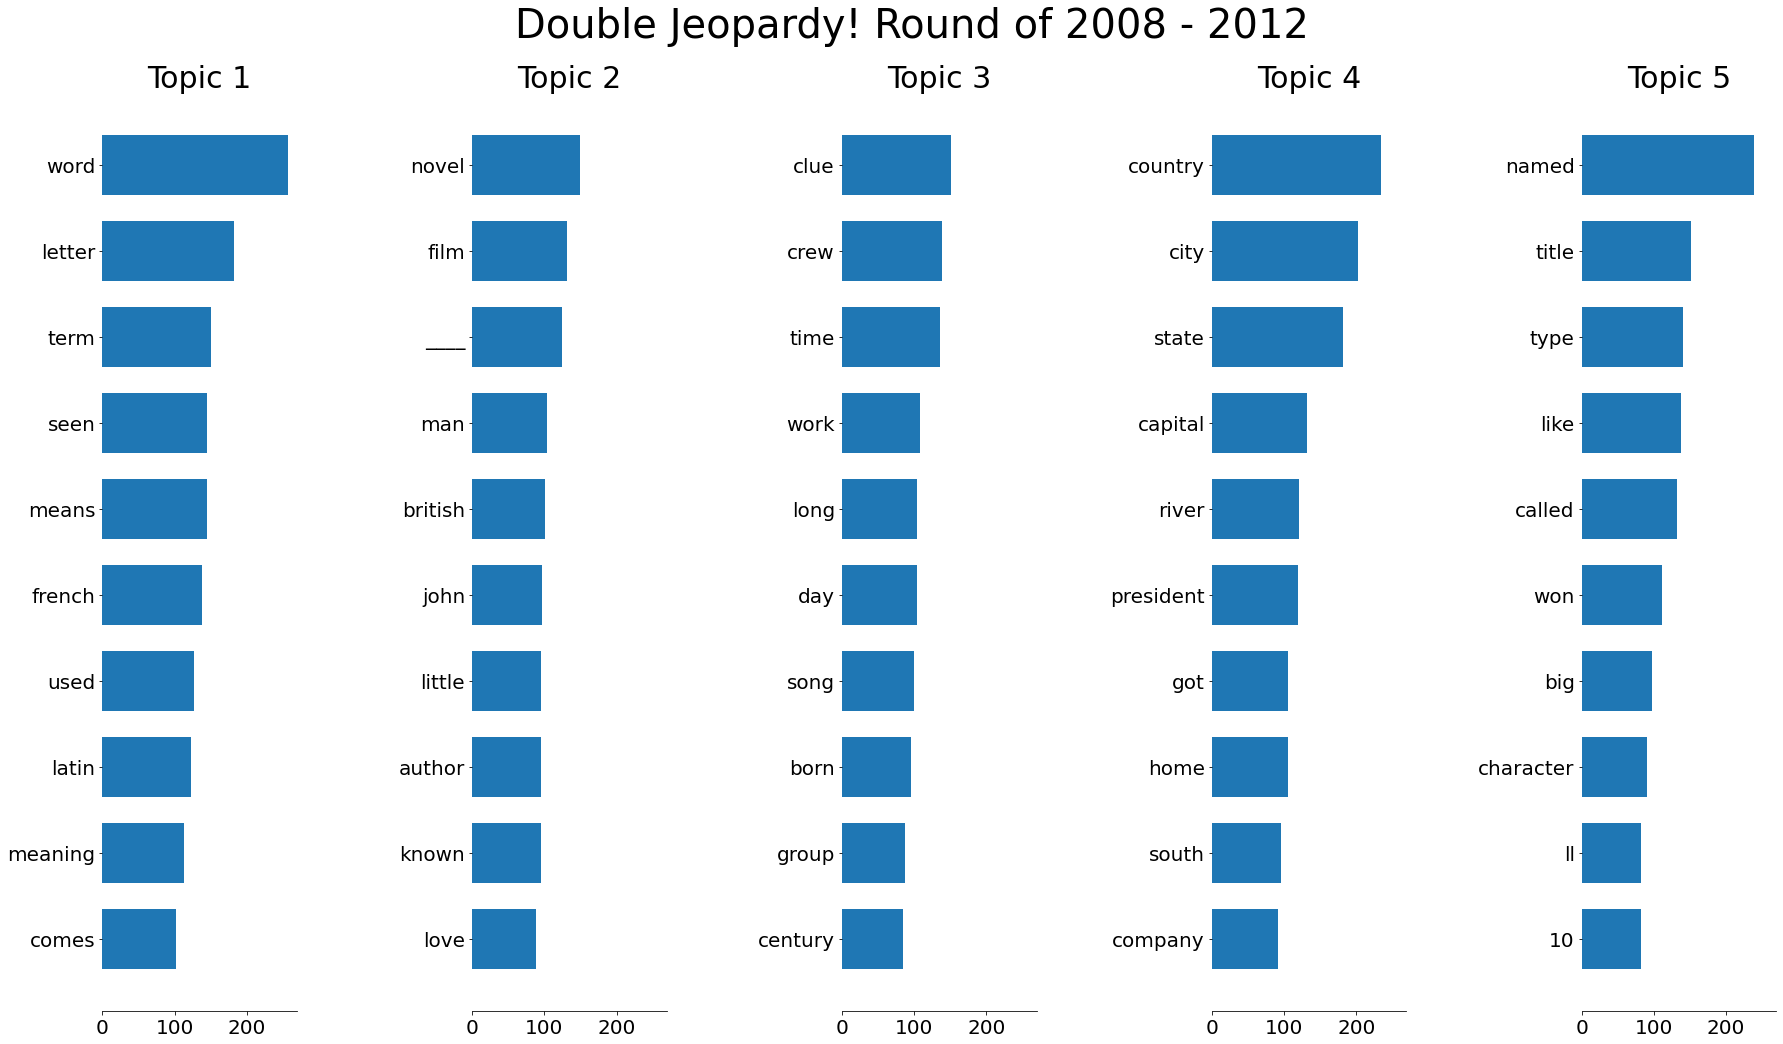

In [15]:
df = pd.read_json('../data/JEOPARDY_QUESTIONS1.json')
df = clean_data(df)
df = df.loc[df['round'] == 'Double Jeopardy!']
n_top_words = 10
title = 'Double Jeopardy! Round of'
save_name = '../img/double_jeopardy_round_'
save_figs(df, title, save_name)

### Final Jeopardy

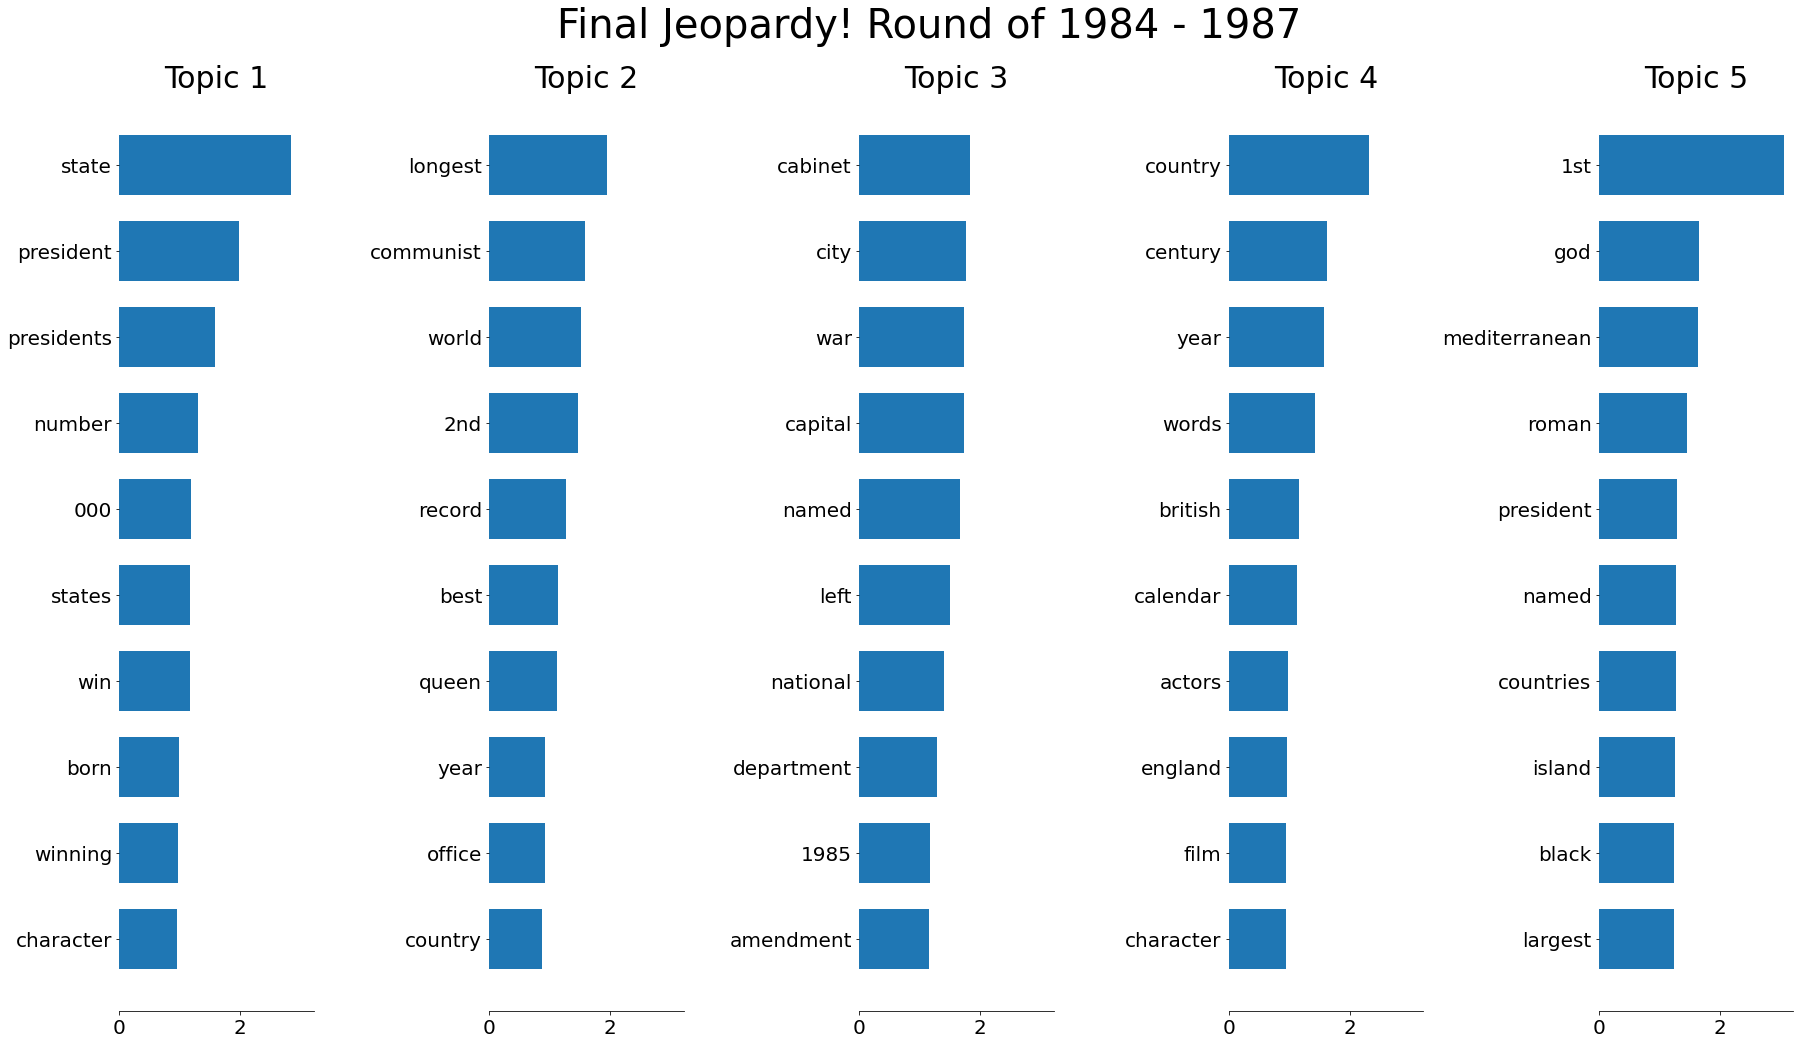

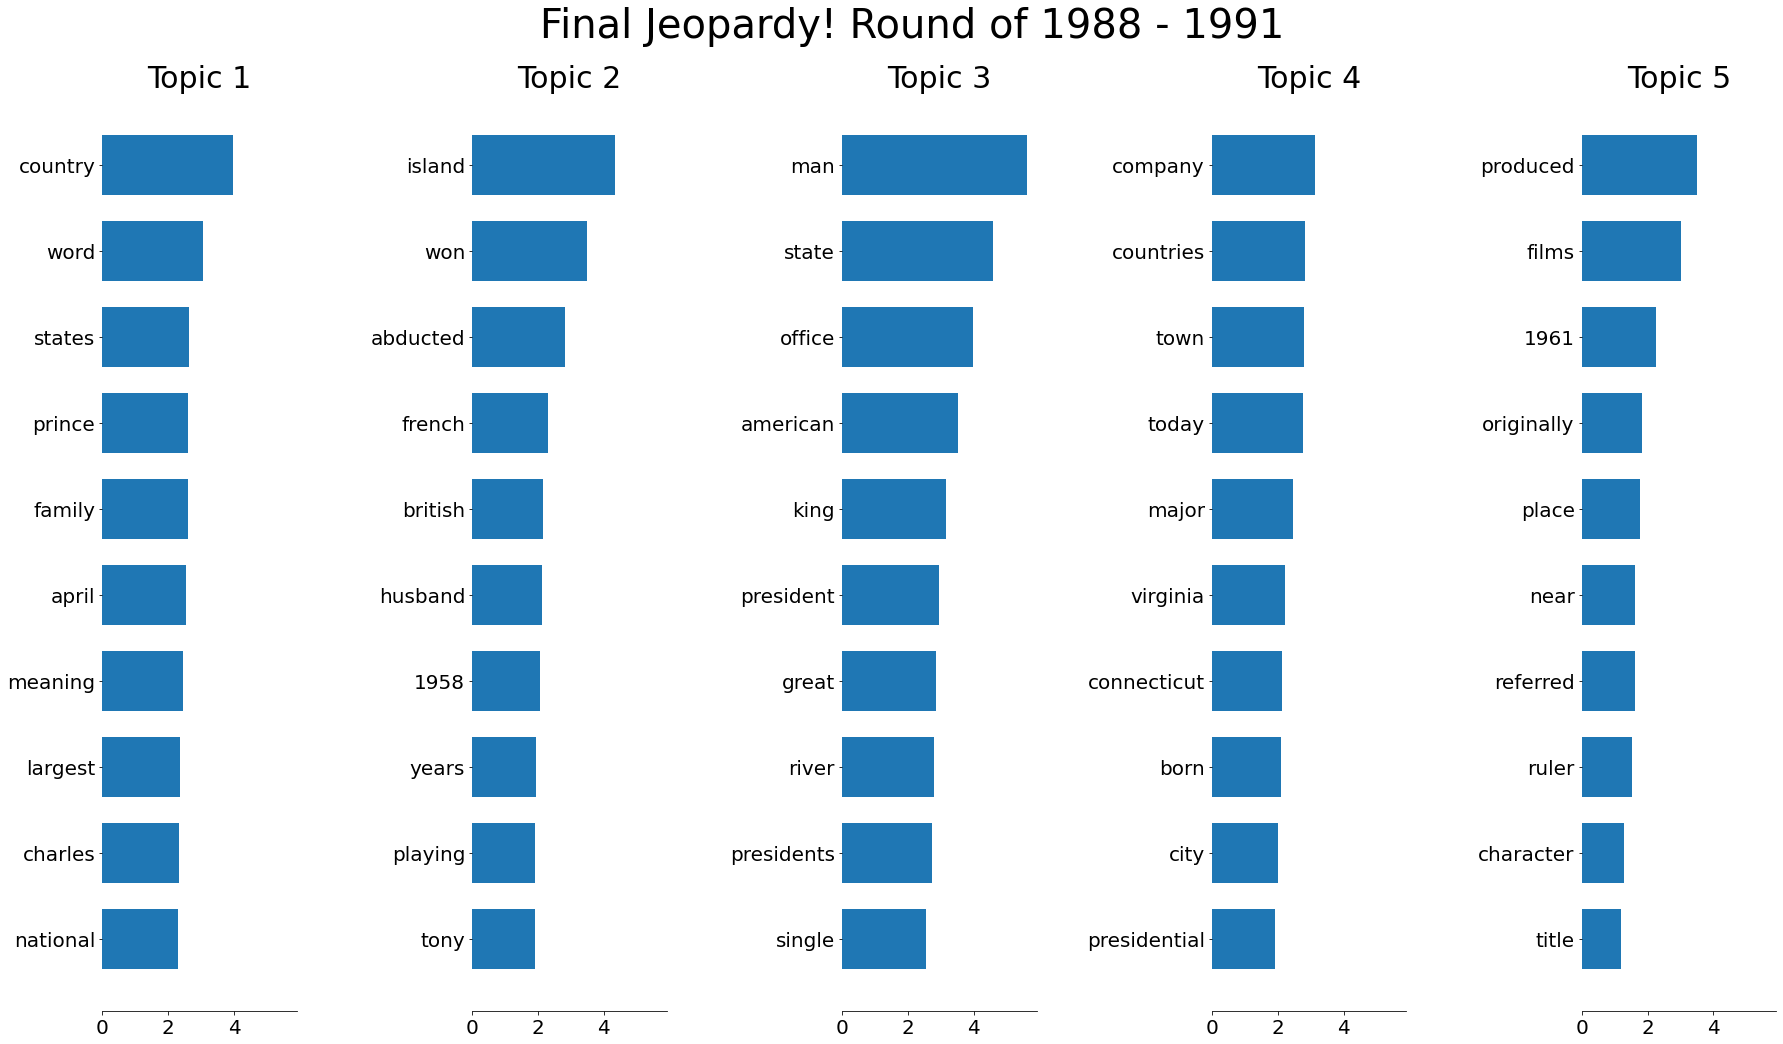

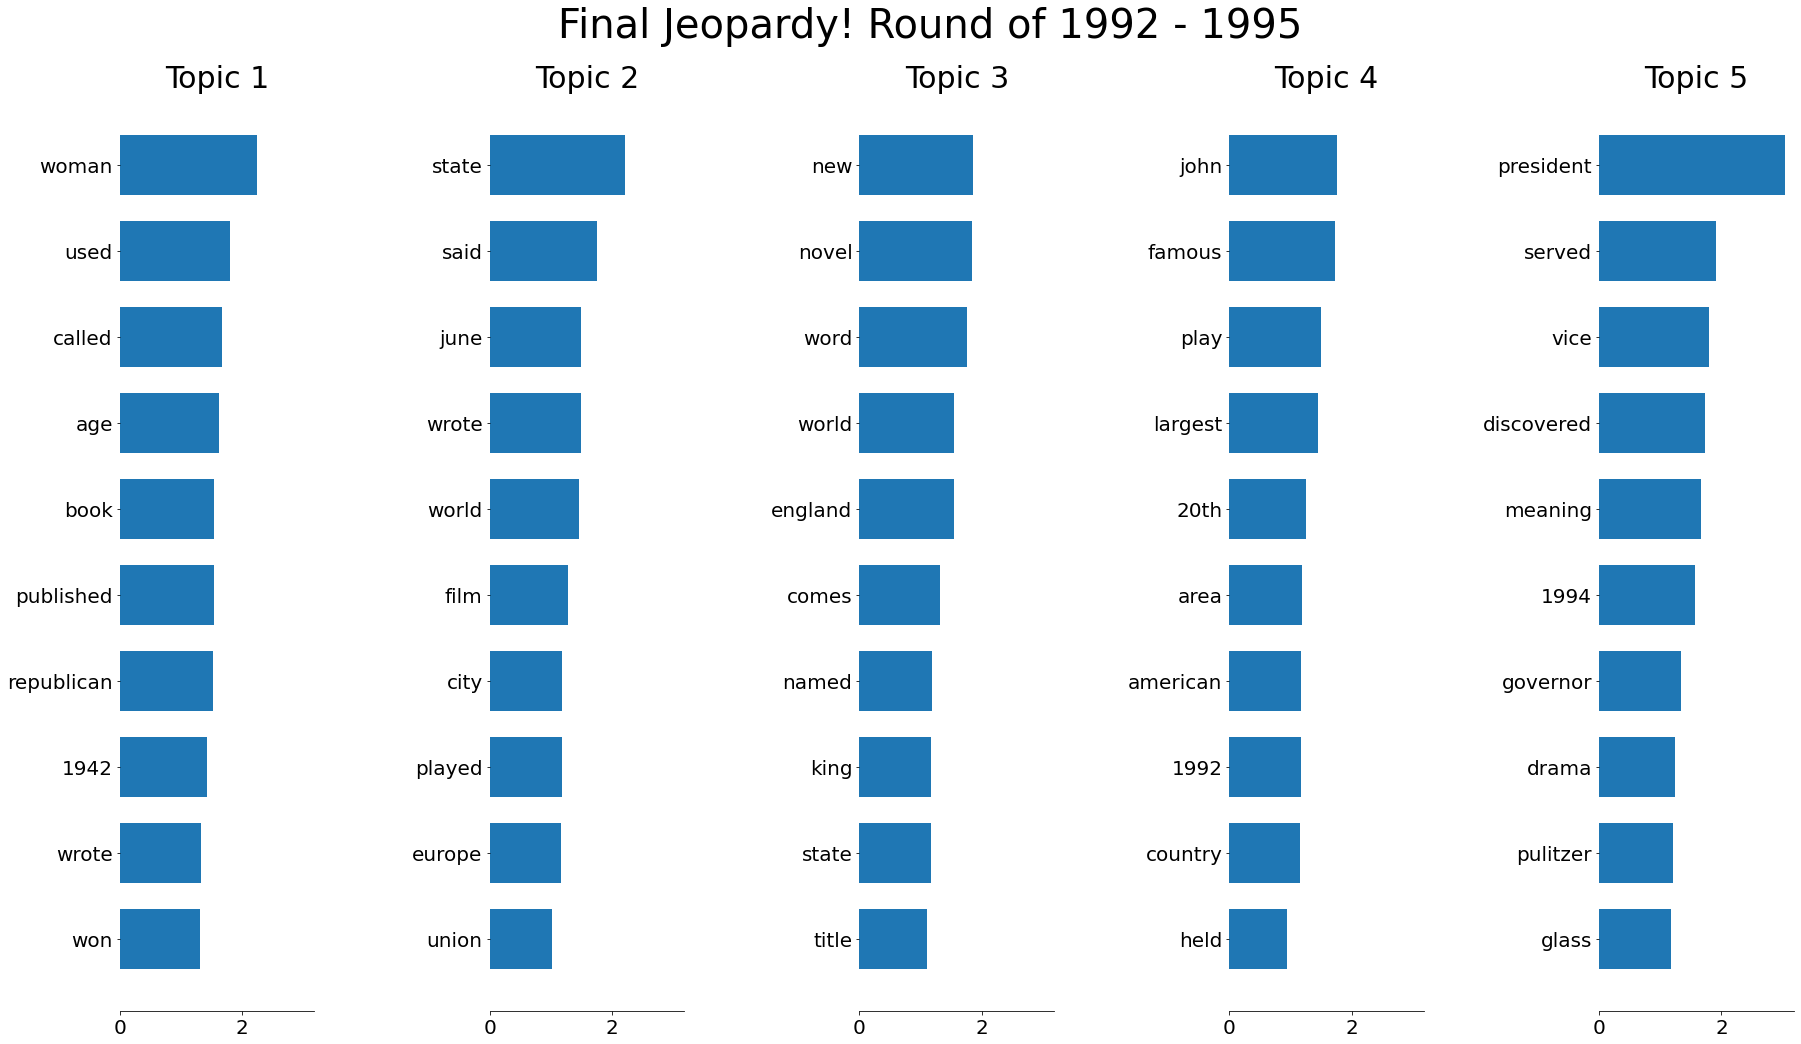

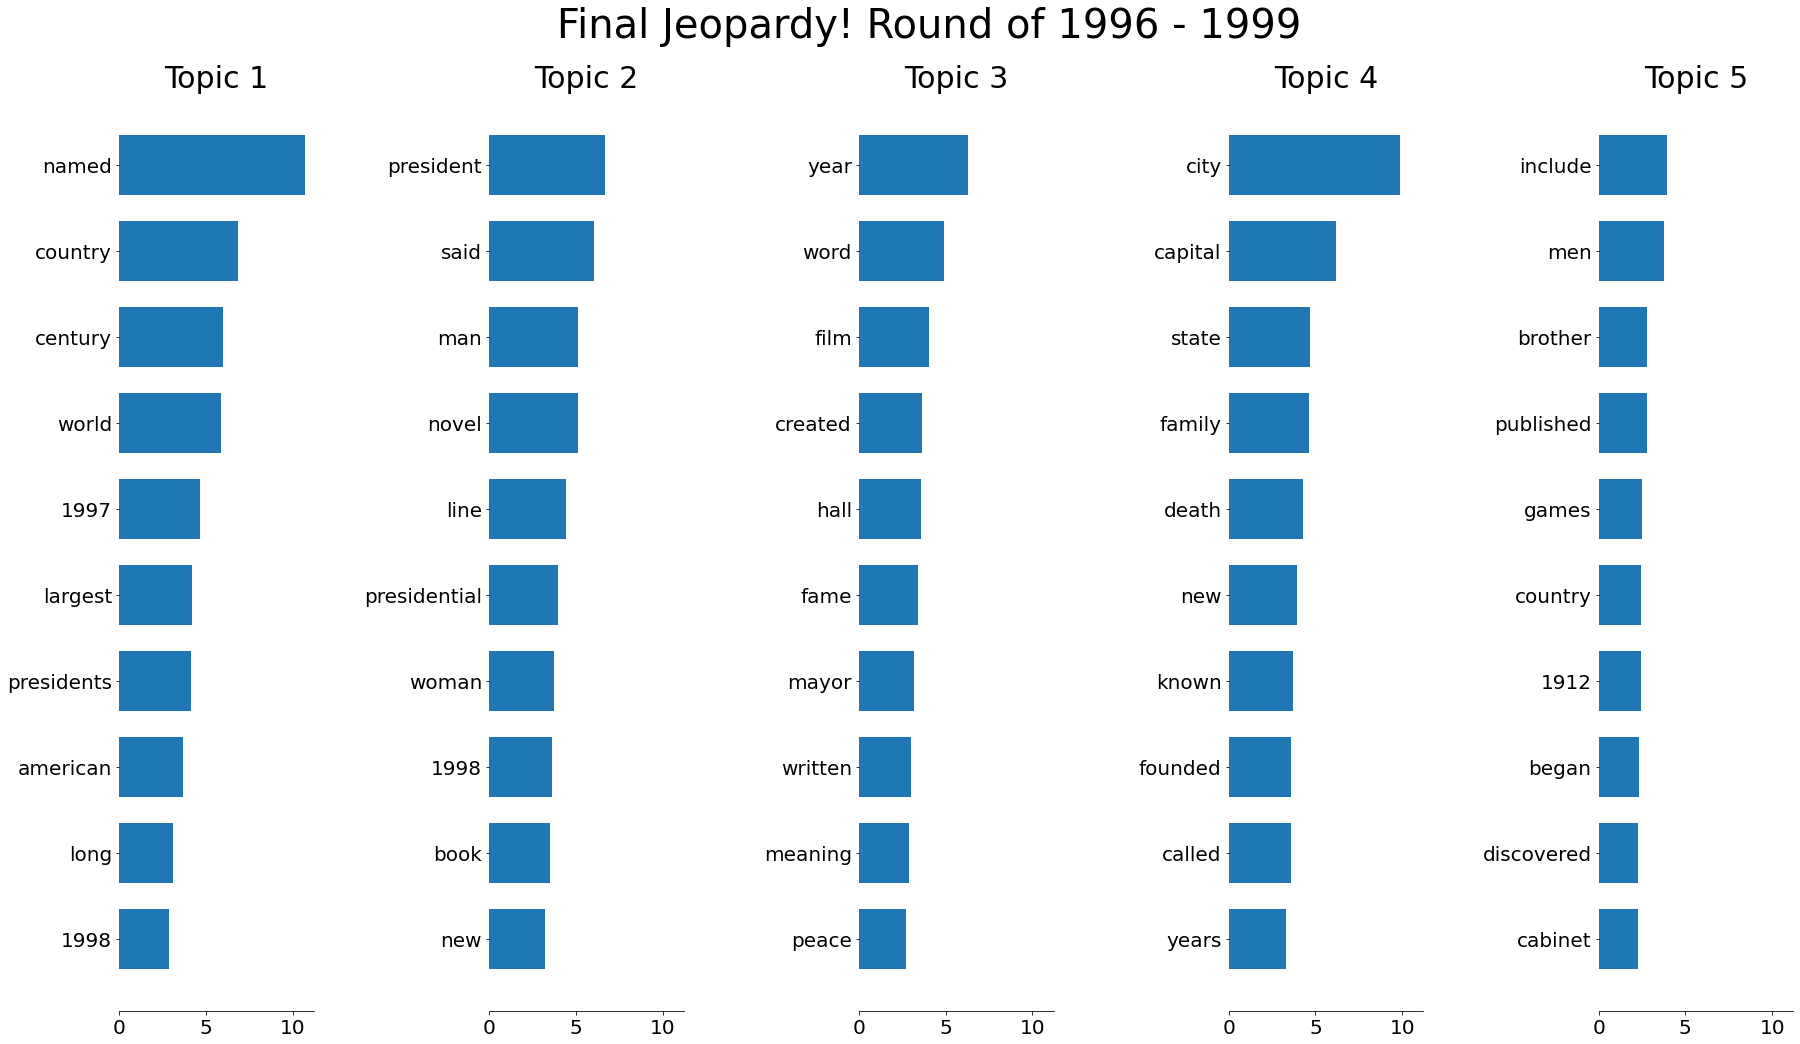

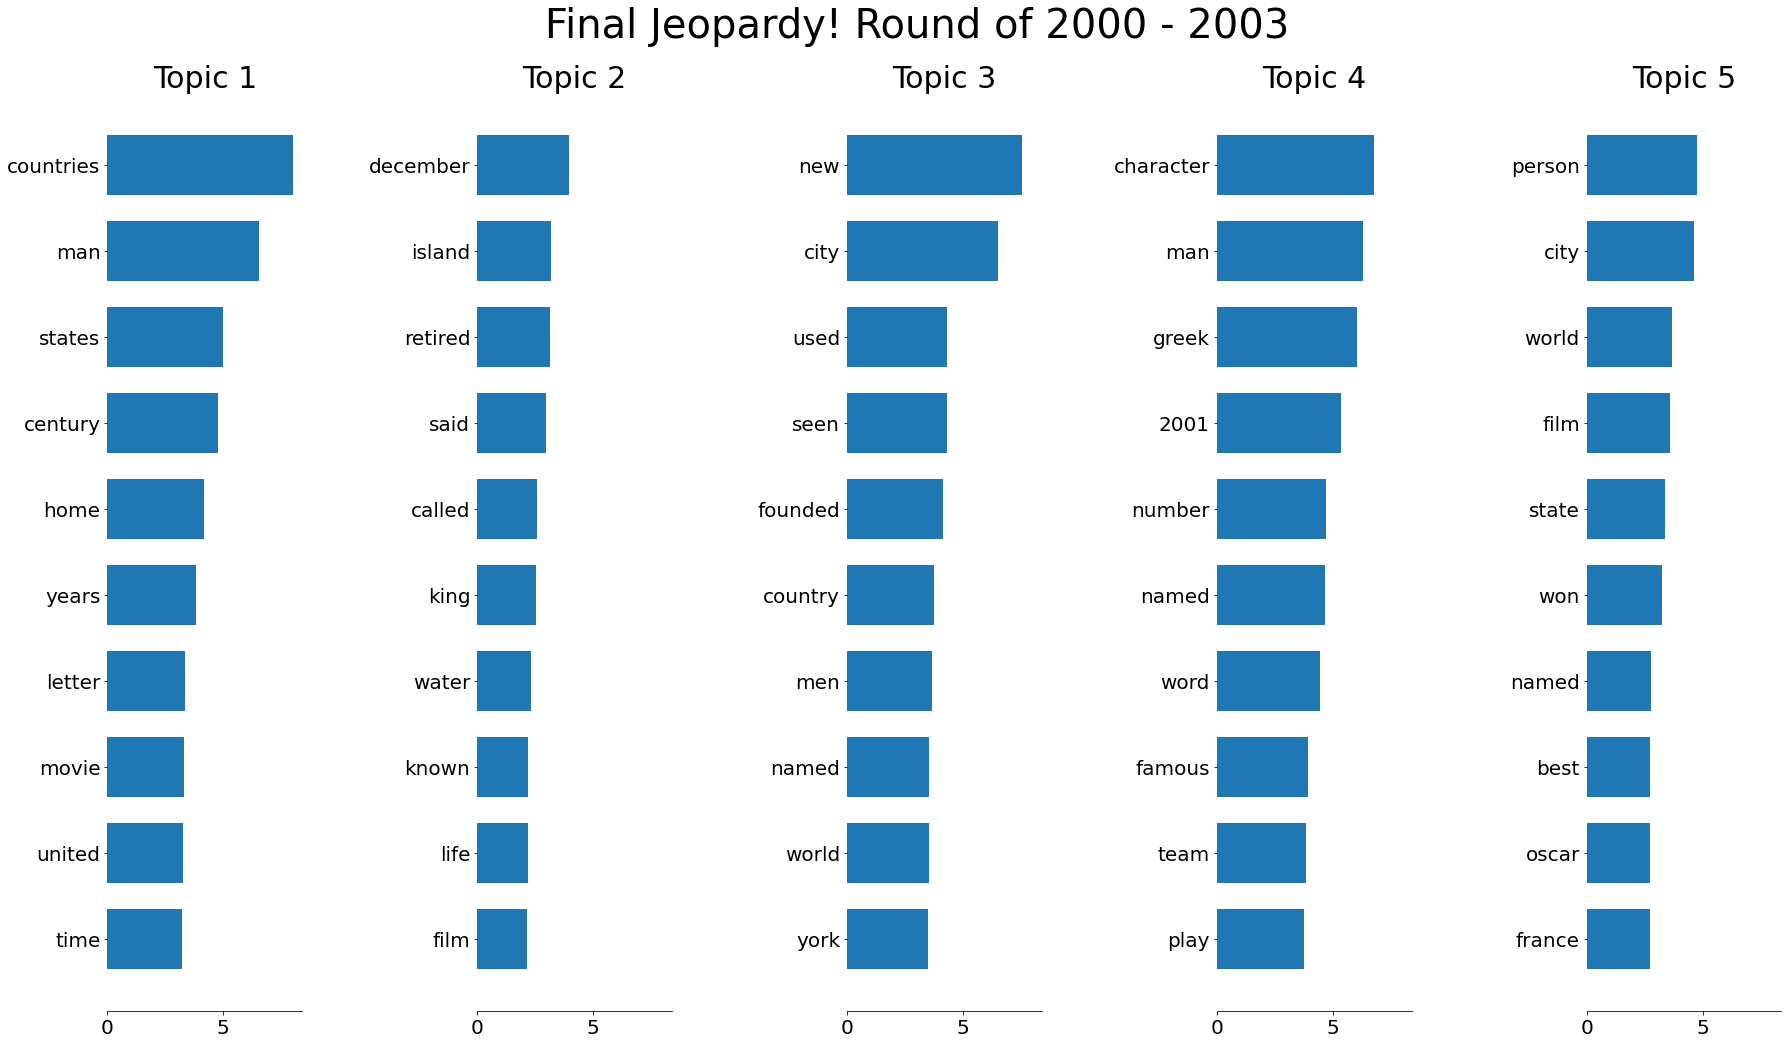

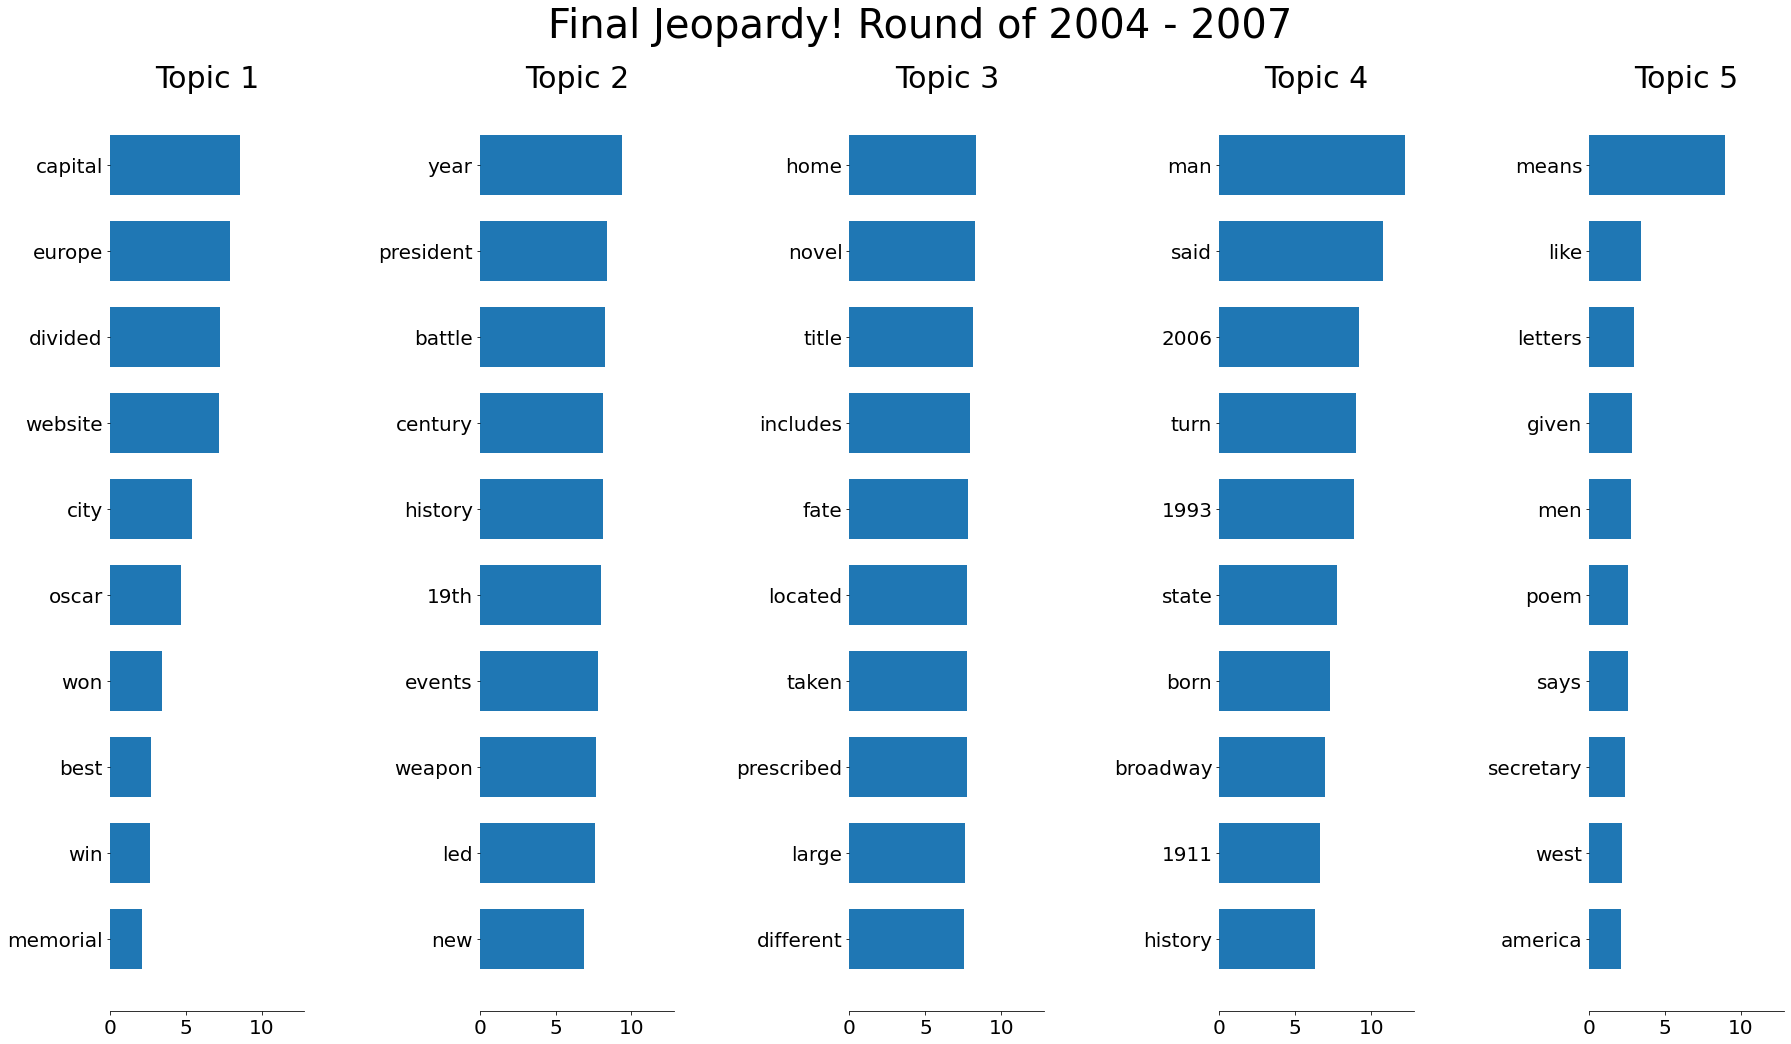

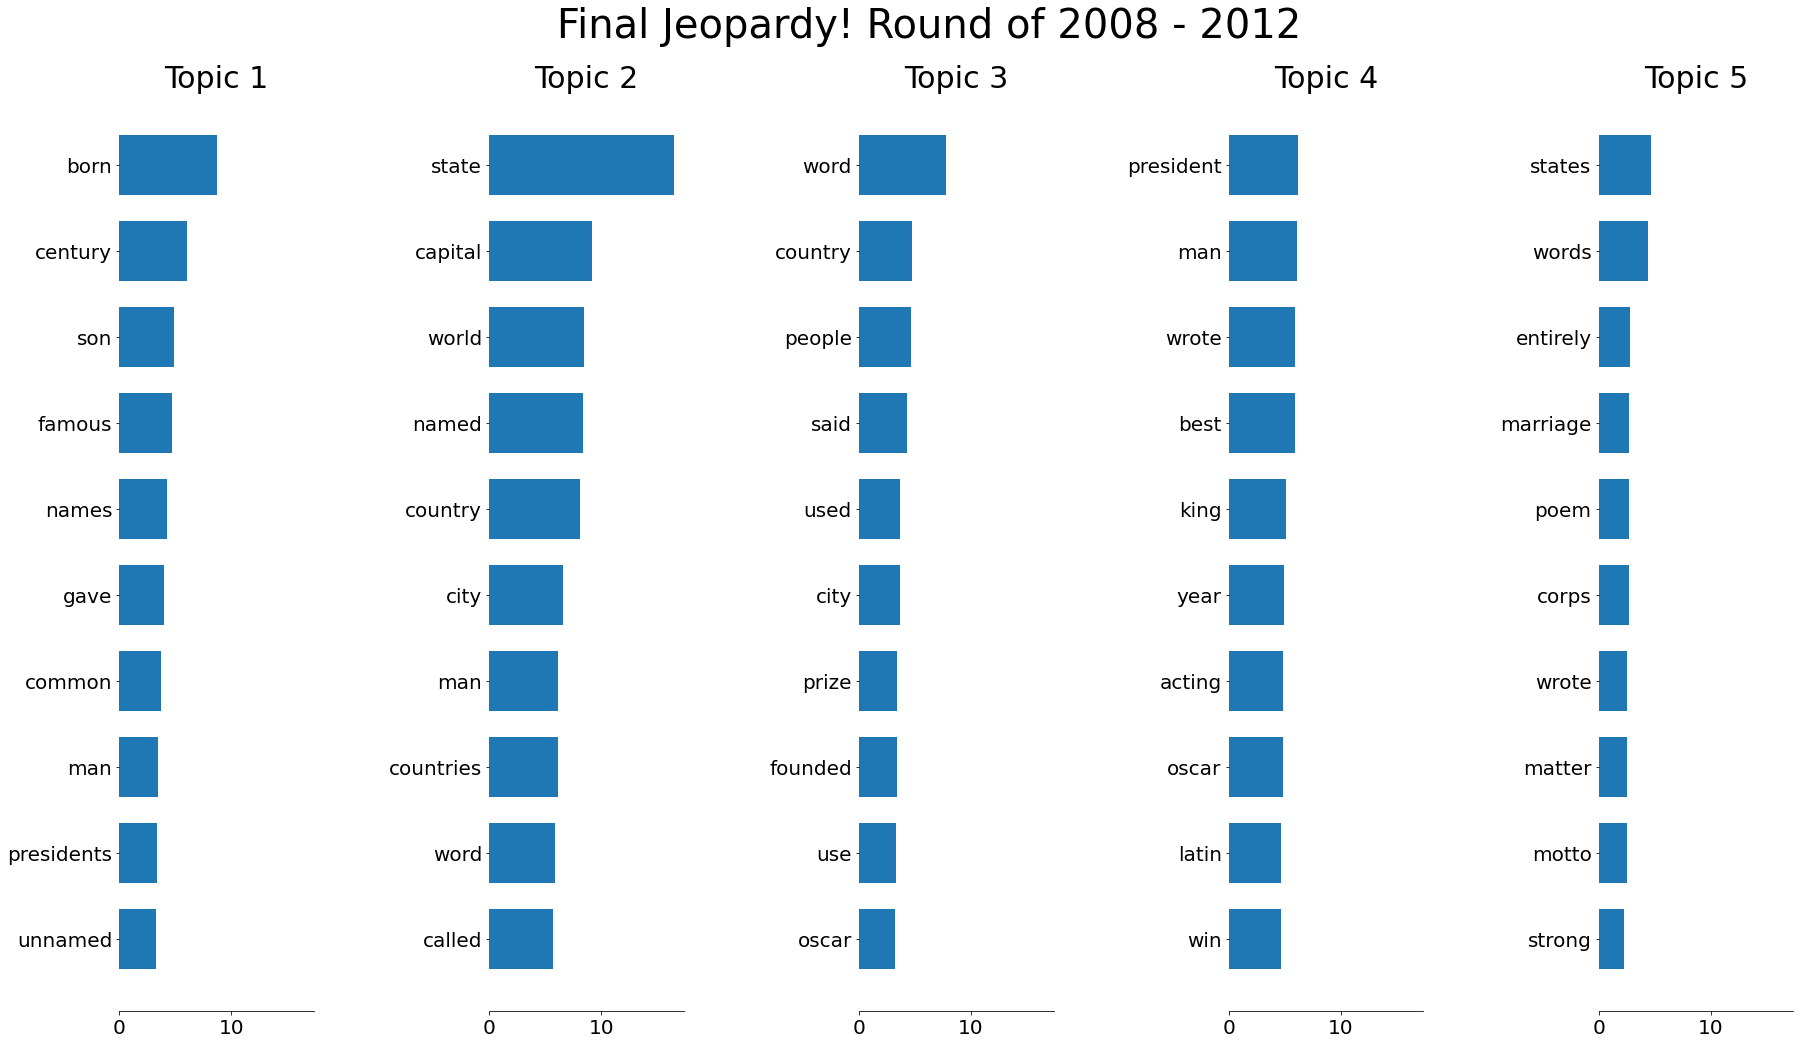

In [16]:
df = pd.read_json('../data/JEOPARDY_QUESTIONS1.json')
df = clean_data(df)
df = df.loc[df['round'] == 'Final Jeopardy!']
n_top_words = 10
title = 'Final Jeopardy! Round of'
save_name = '../img/final_jeopardy_round_'
save_figs(df, title, save_name)

### Topics over time on all Jeopardy Rounds

In this section, we will explore the topics based on time period. From observation, it was decided to analyze topics per a 4-year period as it provides sufficient questions to form topics. Therefore, our analysis consists of 7 time periods from 1984 - 2012 in total. 

In these 7 time periods we are looking at 5 topics/themes in each time period and each of these themes is based on 10 terms. The major themes in each time period are based on the distribution of the number of questions of 5 topics/themes in each time period.

From 1984 - 1987, the majority of questions came from topics/themes based on “songs/played by”,  “named/called” , “geography - largest/capitals/states and countries”, “french/greek words”.

Also, In this time it is notable to see “war” as an important term in the topics. Questions based on war were asked in this time period

From 1988 - 1991, the major theme of questions was “geography”. Questions like the “capital of/city/state/famous” were asked more often than others.

The term “novel” was seen first in this time period too.Questions on authors and what they wrote were being asked for the first time from this time period

From 1992 -1995, the major theme of questions was “title of play/novels”, “presidents”, “geography - largest/capitals/states and countries ”. 

The terms like “father”, “South”,“Color” and “love” appear in the themes during this period.

From 1996 - 1999, the major theme of questions was “entertainment - film/tv”. There were also questions based on events in 1997 because “1997” is a major term that appears in the themes during this period. Also questions with the theme “seen/used” meaning where the “word” is seen or used. So, words and their meanings is a theme that appears during this time period.


From 2000 - 2003, the major theme of questions was “geography”. Also questions with the theme “seen/used/like” meaning where the “word/term” is seen or used. So, words and their meanings is a theme that appears during this time period.


From 2004 - 2007, the major theme of questions was “american history” , “war”. Also, “clue crew” questions were a major theme from this period. This makes sense because The Clue Crew was started in the 2000’s.

From 2007 - 2012, the major theme was  “seen/called” meaning where the “term” is seen or called. Questions on “president”, “war” were also present. Also the clue crew questions were a major theme in this time period too.

Another noticeable type of questions during this period were fill in the blank type questions. 

Interesting term found during this time period is “company”.Questions specific to 2009 were also a prominent theme.

<b>Noticeable differences in the types of questions asked are the clue crew questions started popping up more from the mid 2000s. Also the theme “seen/used/like/called” meaning where the “word/term” is seen or used type questions were more prevalent in the 2000s than the previous years.</b>

<b>“Geography” was a recurrent theme in all the time periods. And questions on “presidents” are also recurrent throughout the time periods.</b>

<b>It is hard to judge whether the questions got easier or harder through years but the range of topics has increased over time.</b>



### Jeopardy Round

When analyzing the Jeopardy round questions from 1984-2012 we divided the data in 7 time periods, 1984-1987, 1988 - 1991, 1992 - 1995, 1996 - 1999, 2000-2003, 2004 - 2007 and 2008 - 2012. There were some common topics which we could see across all different time periods. For example questions on geography were asked in all time periods. However we could also see some questions which were asked in particular years.

From 1984 - 1987, the questions for jeopardy round were mainly about geography, films and general trivia. One specific kind of question which appeared only for this time period and never after it were the questions on different types of knots. 

From 1988 - 1991, along with the common themes like geography, most of the questions were from entertainment and famous history people, like “the 1st king” of some country. One specific theme of questions that we saw in this time period was on “gold”, “nicknames” and “snakes”. The questions on these topics were never asked before or after this time period. 

From 1992 - 1995, the unique topic on which questions were asked during this period was “dogs” and “sports”.Few more new topics that seem to have been introduced during this period were “women”, “food” and “bird”.  Topics on dogs don't seem to appear in any time period after or before that.

For 1996 - 1999, the main questions in this time period were around famous quotes said by people. The topics in this time period are also related to the word company which was never mentioned before. In this time period there were also questions about entertainment and authors of novels.

From 2000 - 2003, for the first time questions from “clue crew” were asked. We also noted that during this time period there were questions about the new president elected in the year 2000. 

During the time period 2004 - 2007, there were questions about the world war.  The majority of the questions were about famous people and on geography. There were questions asked from the clue crew as well.

From 2008 - 2012, the most common theme of questions was completing the words from the clue crew. Another theme we noticed during this time period was questions on famous women and novels.

So overall, for each time period we saw some common themes that were used and some specific ones. There were some themes like questions on snakes, which appeared only for the time period 1988 - 1991 and the questions on dogs which appeared only for the time period 1992 - 1995. 


### Double Jeopardy Round


From 1984 - 1987, the major themes/topics were “entertainment - like played by”, “the french word/meanings”, “geography based on world history”

From 1988 - 1991, the major themes/topics were “american history”, “world history”, “world wars”, “authors/novels”

From 1992 - 1995, the major themes/topics were “novels/authors/literature”, “geography based on world history”

From 1996 - 1999, the major themes/topics were “words/meanings”, “who played which part”,”entertainment” , “geography based on world history”, “winnings/awards”

From 2000 - 2003, the major themes/topics were “the clue crew”, “geography based on world history”, “famous women”, “seen/called” meaning where the “term” is seen or called.

From 2004 - 2007, the major themes/topics were “the clue crew”, “geography based on world history”, “who played which part”, “entertainment” 

From 2008 - 2012, the major themes/topics were “words/meanings”, “geography based on world history”,  “the clue crew” and fill in the blank type questions were also seen here.

The main themes/ topics in the double jeopardy round are “world history”, “geography based on world history”. The “clue crew” were a major theme from the 2000s. In double jeopardy “entertainment” is not a major theme in double jeopardy.



### Final Jeopardy Round

From 1984 - 1987, the major themes/topics of question in the final jeopardy are “presidents”, “history - world and american”, “awards/ winnings”.

From 1988 - 1991, the major themes/topics were “world history”, “british history”, “presidents” and “american history”

From 1992 - 1995, the major themes/topics were “famous women”, “authors/novels” , “american history”

The terms like “Republican”, “woman”, “president” were prominent in this time period

From 1996- 1999, “presidents”, “famous women” , “authors/novels- based on lines from them”. Also present are themes like “geography based on death/founded/place where(city,state, capital)”

From 2000 - 2003, the major themes/topics were “literature” like the “greek word meaning”, “character in play”. Also present are topics based on “countries/states”, questions on timeline like “century/years” are also prominent.

From 2004 - 2007, the major themes/topics were “what a person said/quotes”, “broadway”, “american history”, “authors/novels”, “world history”

From 2008 - 2012, the major themes/topics were “geography based on world history”, “presidents”, “oscar wins”, “quotes/authors/what they wrote”

<b>The major themes across all the time periods are the “presidents”, “quotes/authors/what they wrote”. Interesting trend was that “famous women” was a major theme in the 1990s. One interesting trend was the addition of “oscar wins”, “broadway” from the mid 2000s, which was not present earlier.</b>



## Game Dynamics based on different rounds

In [2]:
def clean_data(df):
    df_clean = df.copy()
    df_clean['air_date'] = pd.to_datetime(df['air_date'], format='%Y-%m-%d')
    df_clean['year'] = df_clean['air_date'].dt.year
    df_clean['question'] = df_clean['question'].replace(r'\\n',' ', regex=True) 
    df_clean['question'] = df_clean['question'].replace(r'\<.*?>', ' ', regex=True)
    df_clean['question'] = df_clean['question'].replace(r'[^\w\s]', ' ', regex=True)
    df_clean['question'] = df_clean['question'].str.lower()
    return df_clean

In [3]:
df = pd.read_json('../data/JEOPARDY_QUESTIONS1.json')
df = clean_data(df)

In [5]:
def top_words_in_topics(model, feature_names, n_top_words):
    output = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        output[topic_idx] = list(zip(top_features, weights))
    return output

In [6]:
def plot_top_words(model, feature_names, n_top_words, title, save=None):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    if save is not None:
        plt.savefig(save, dpi=200)
    plt.show()

In [8]:
def plot_dist(X, save=None):
    result = np.add(np.argmax(X, axis=1), 1)

    unique, counts = np.unique(result, return_counts=True)

    plt.bar(unique,counts)
    plt.title('Topic Distribution')
    if save is not None:
        plt.savefig(save, dpi=200)
    plt.show()

In [9]:
# Preprocessing

# only jeopardy and double jeopardy
df_filter = df.loc[(df['round'] == 'Jeopardy!') | (df['round'] == 'Double Jeopardy!')]

# remove $
df_filter['value_new'] = df_filter['value'].str[1:] 

# remove , and change to int
df_filter['value_new'] = df_filter['value_new'].str.replace(',','').astype(int)

# change value to 2* for years less than 2000
df_filter['value_new'] = np.where(df_filter['year'] <= 2000, df_filter['value_new'] * 2, df_filter['value_new'])

# remove values less than 2000
df_new = df_filter.loc[df_filter.value_new <= 2000]

## 2.a) Jeopardy and Double Jeopardy topics based on values

In [10]:
def save_figs_value(df, title, save_name, n_top_words=10):
    filter_money_list = df.value_new.value_counts().reset_index().iloc[:8]['index'].tolist()
    filter_money_list = sorted(filter_money_list)
    n_top_words = n_top_words
    
    for i in filter_money_list:
        df_working = df.loc[df['value_new'] == i]

        vectorizer = TfidfVectorizer(stop_words='english', max_features=2000, max_df=0.95, min_df=2)
        X = vectorizer.fit_transform(df_working ['question'])
        lda = LatentDirichletAllocation(n_components=5, learning_method='online',n_jobs=-1, random_state=0)
        X = lda.fit_transform(X)
        feature_names = vectorizer.get_feature_names()
        plot_top_words(lda, feature_names, n_top_words, 
                       f'{title} {i}',
                       save=f'{save_name}_{i}.jpeg')
        plot_dist(X, save=save_name)

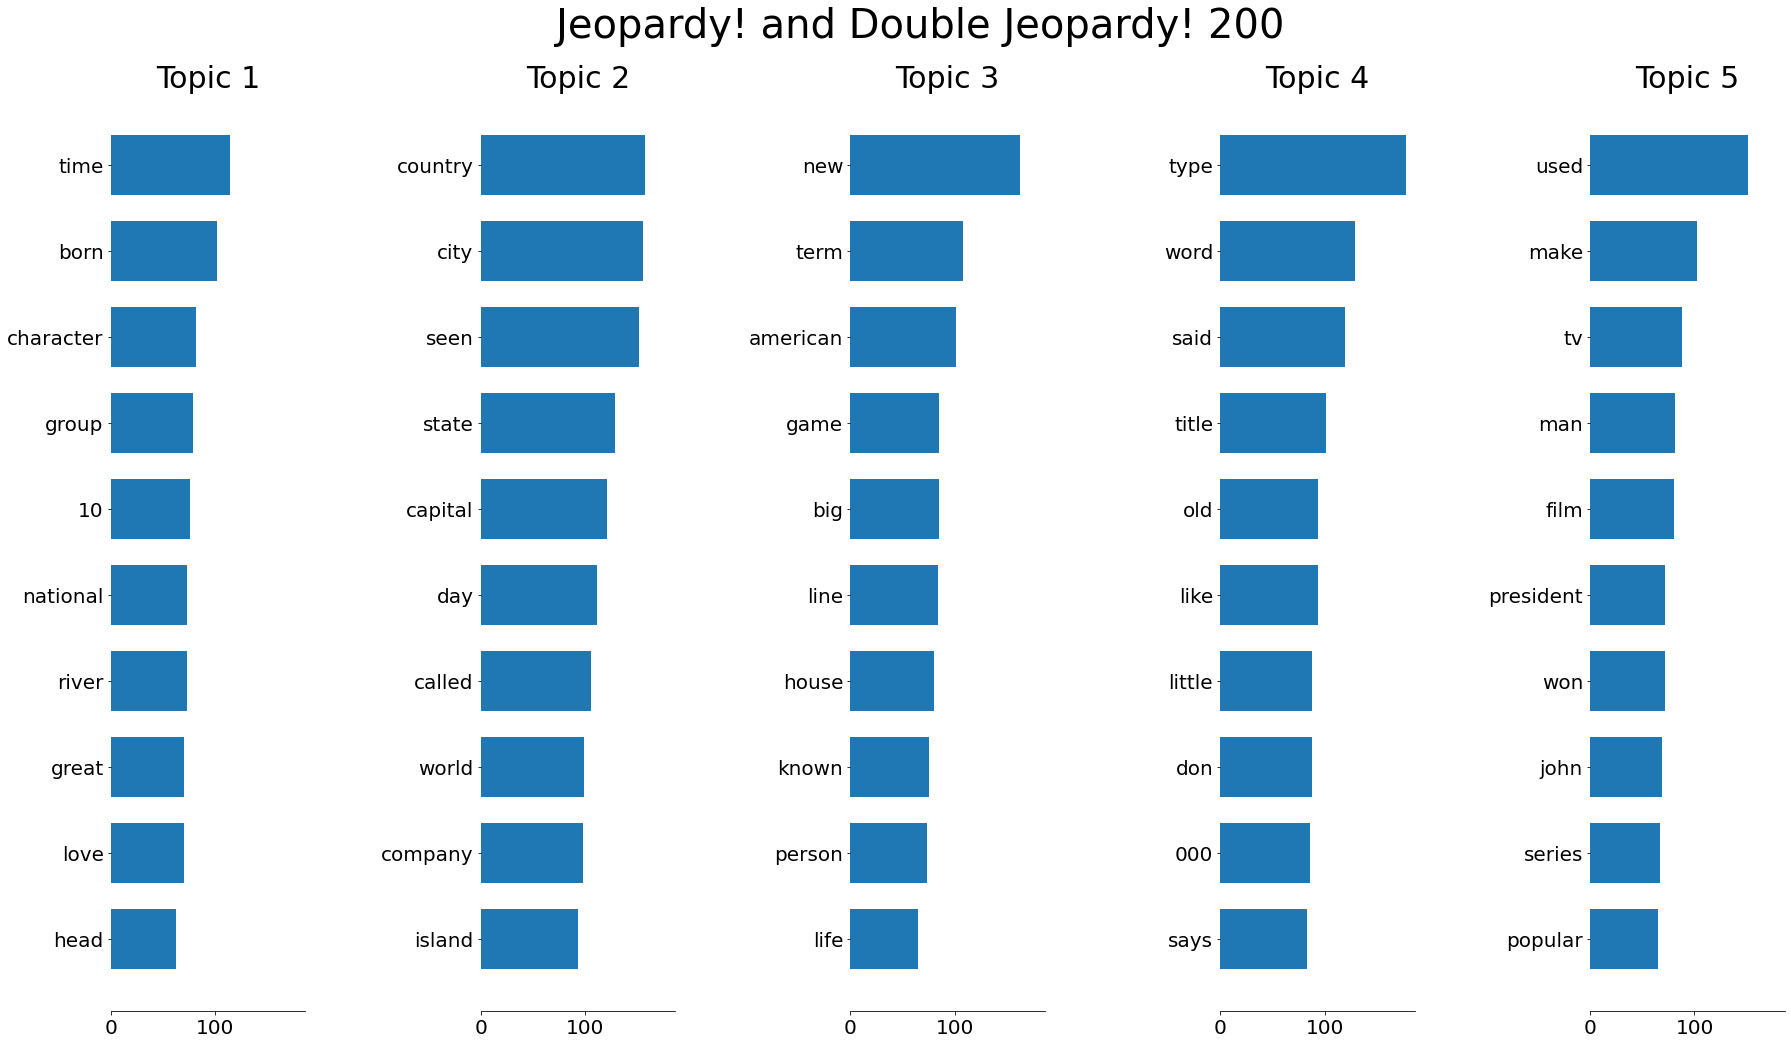

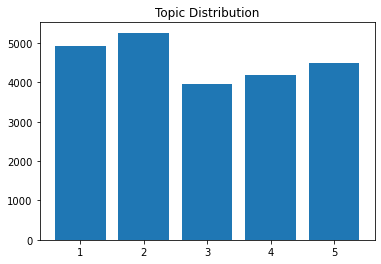

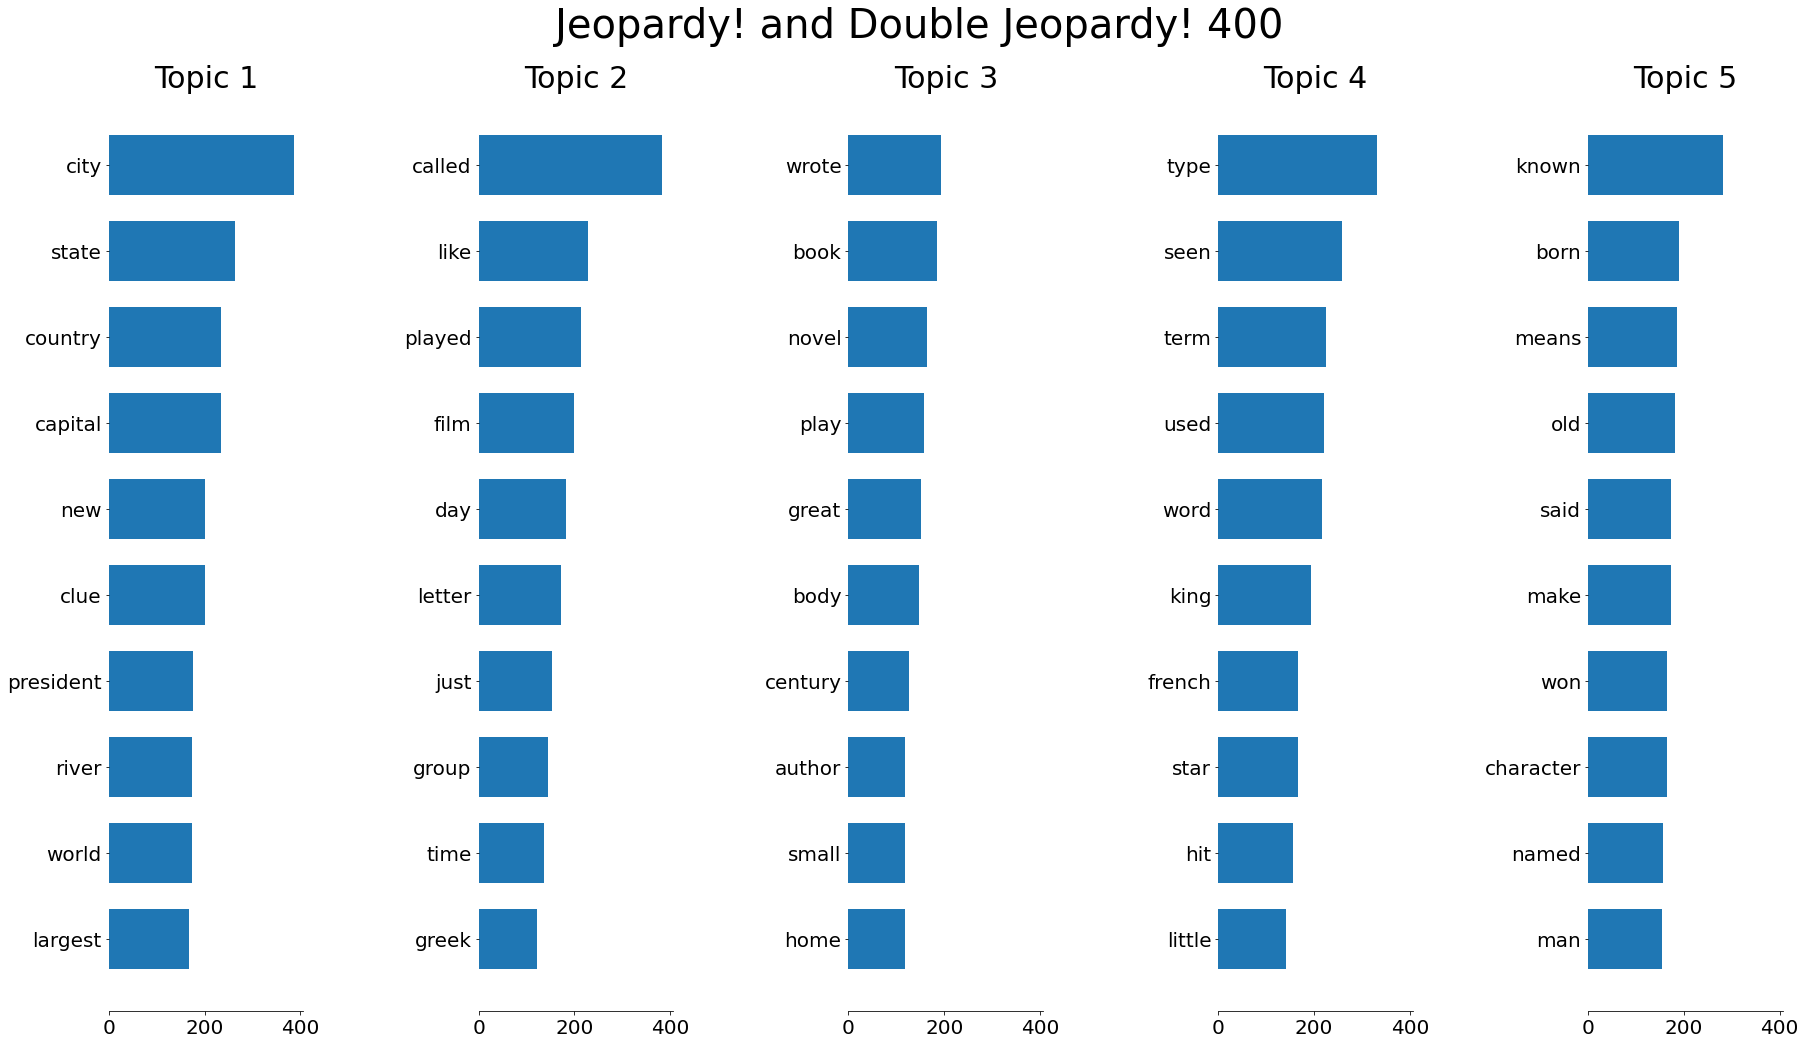

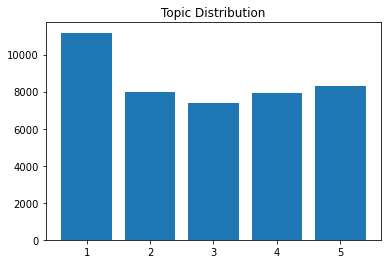

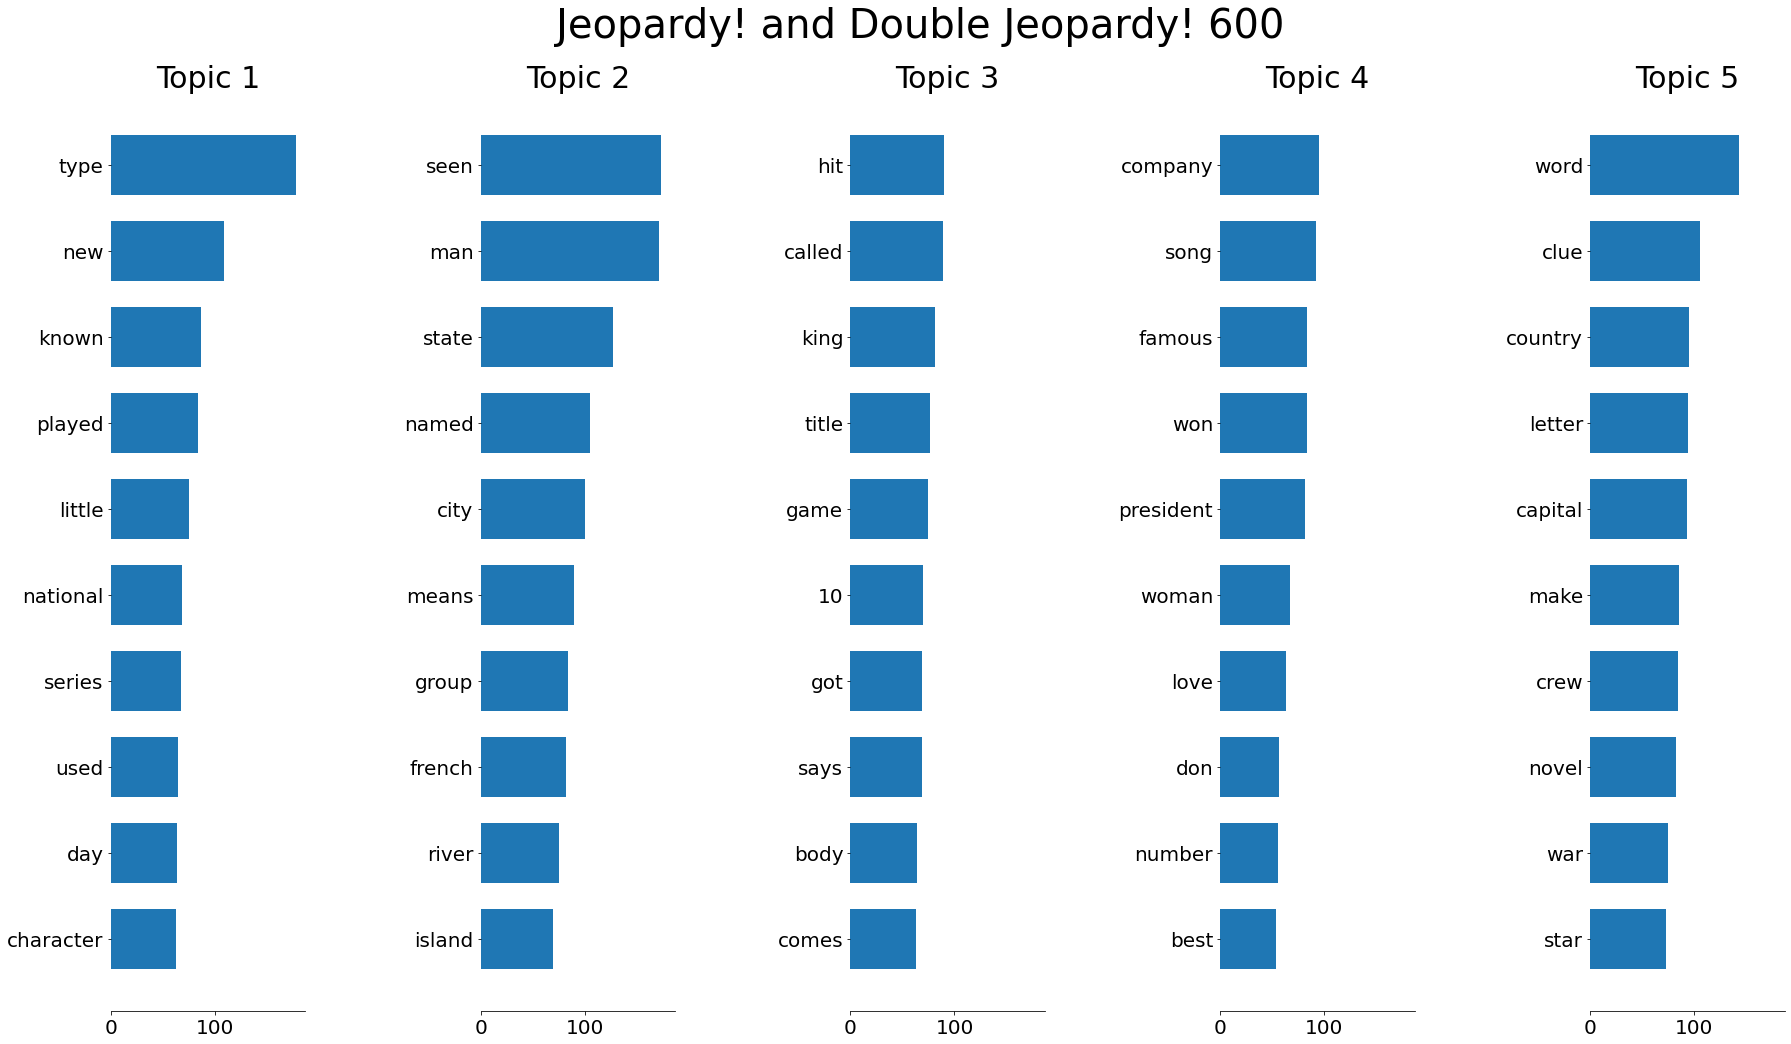

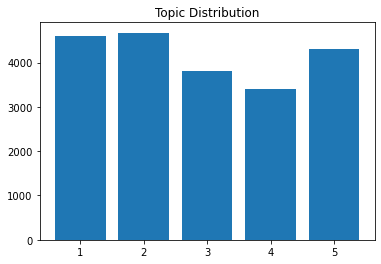

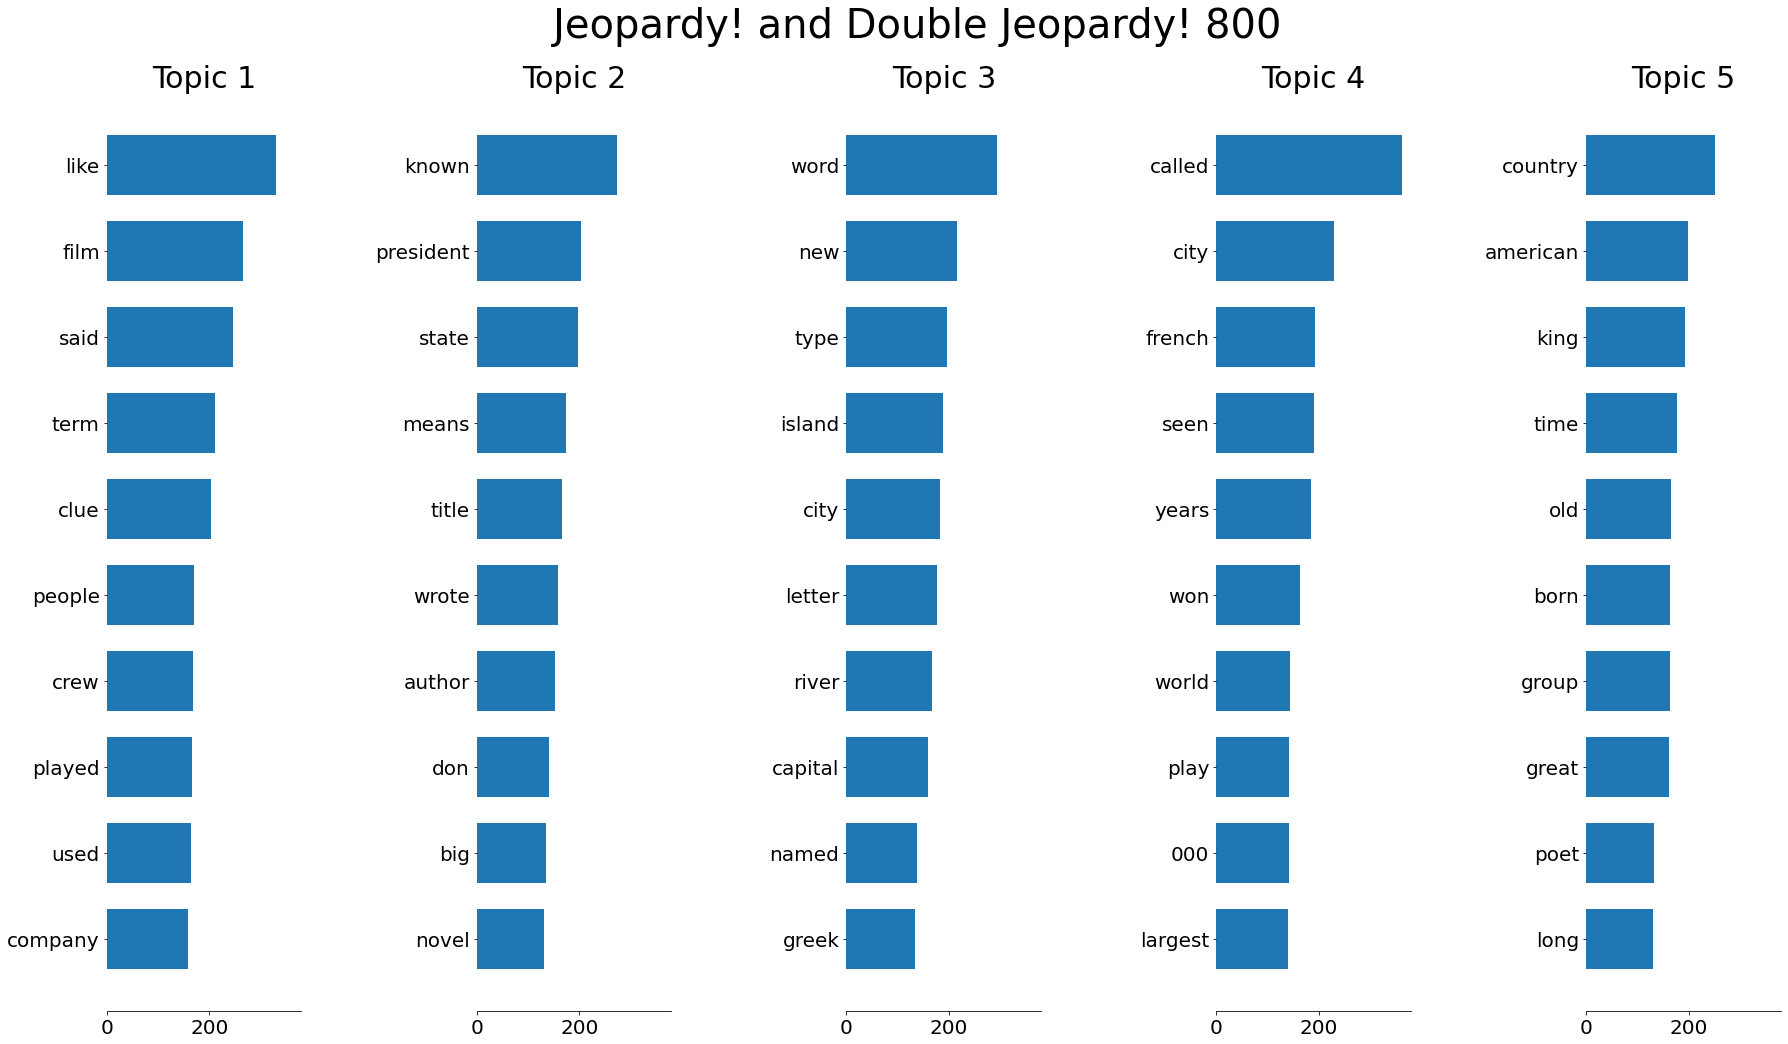

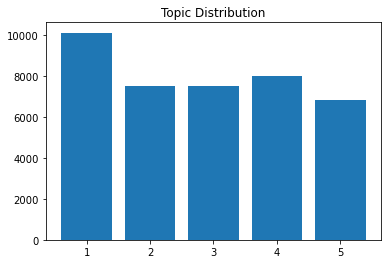

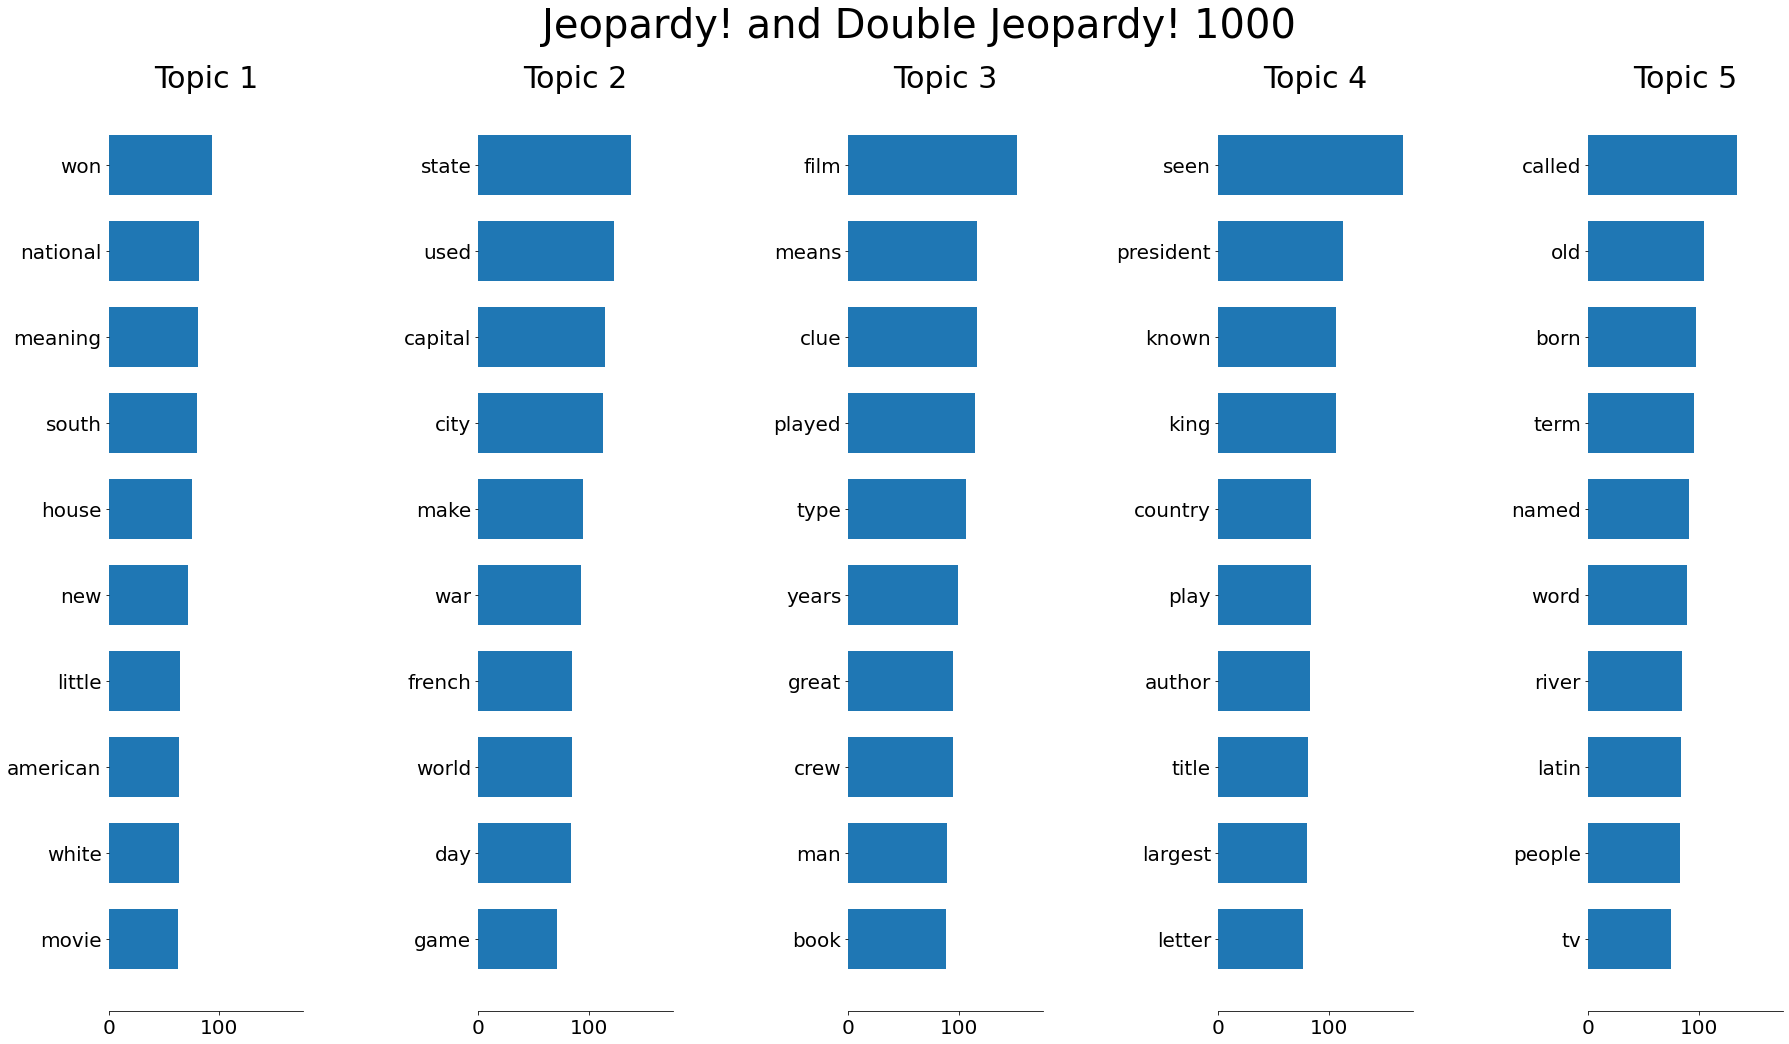

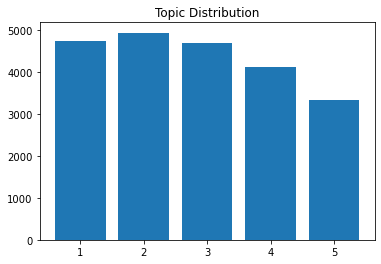

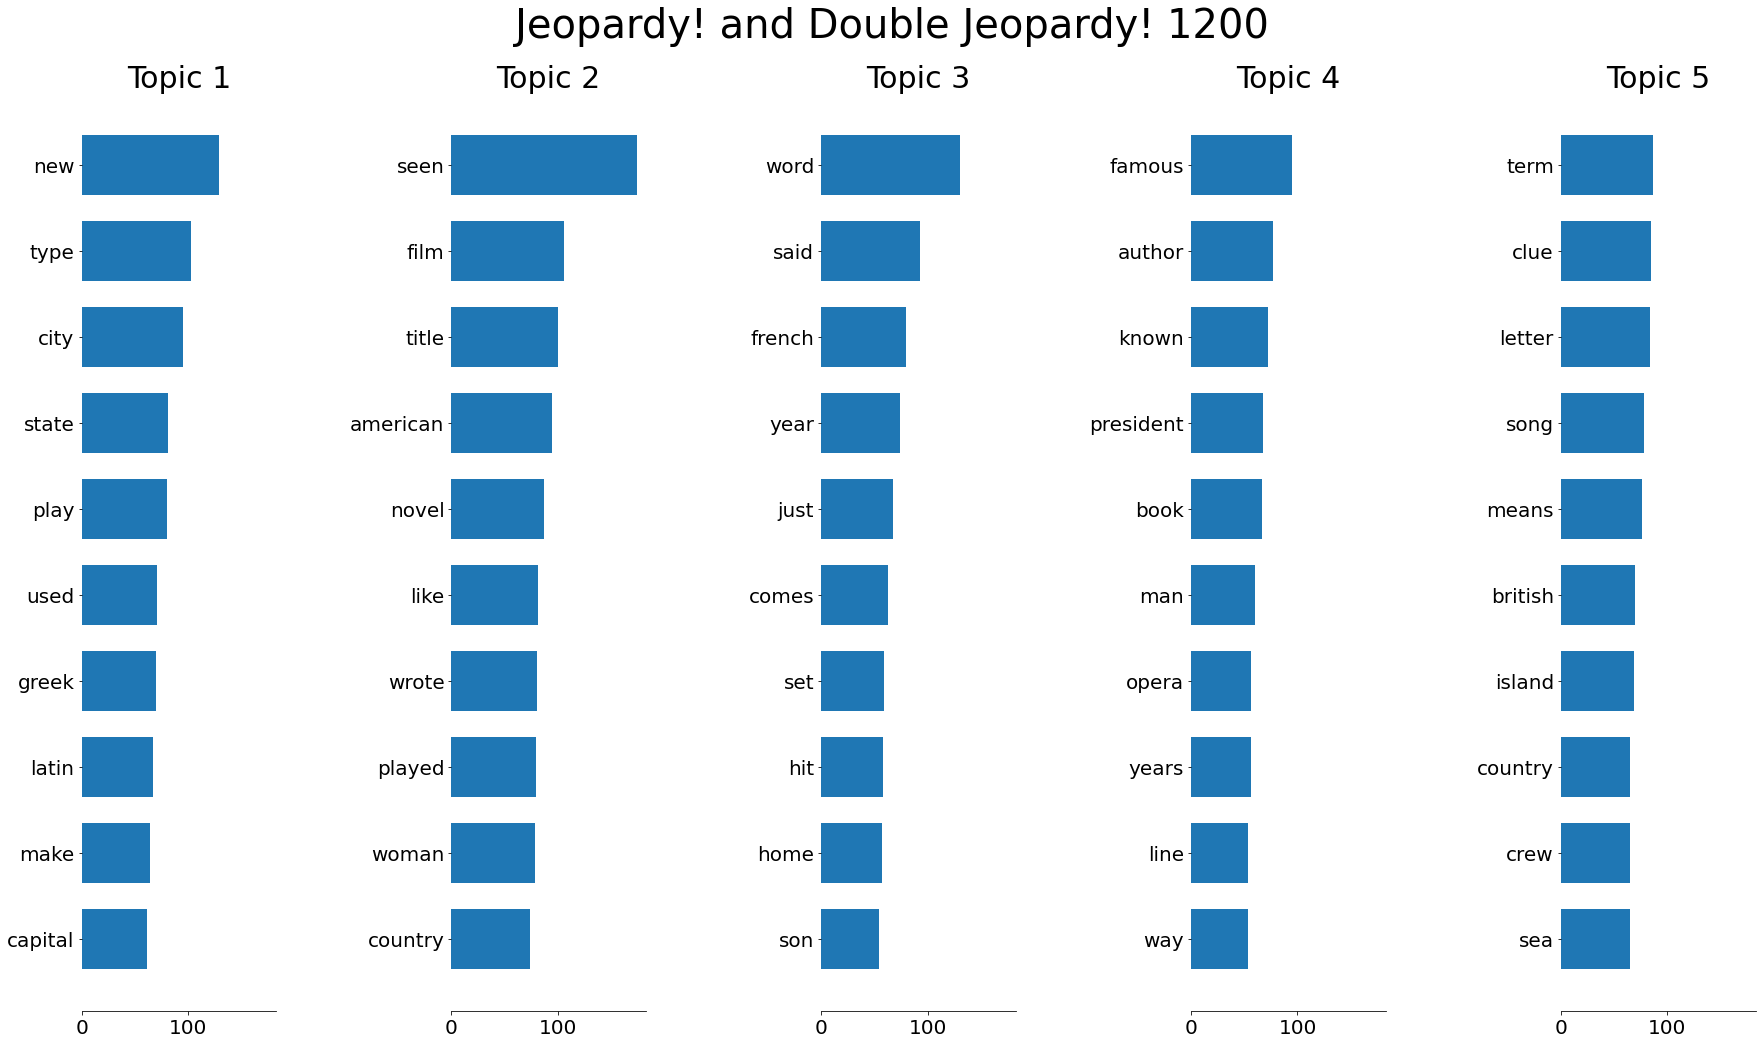

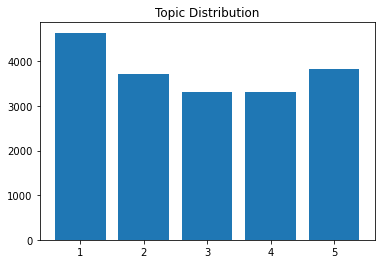

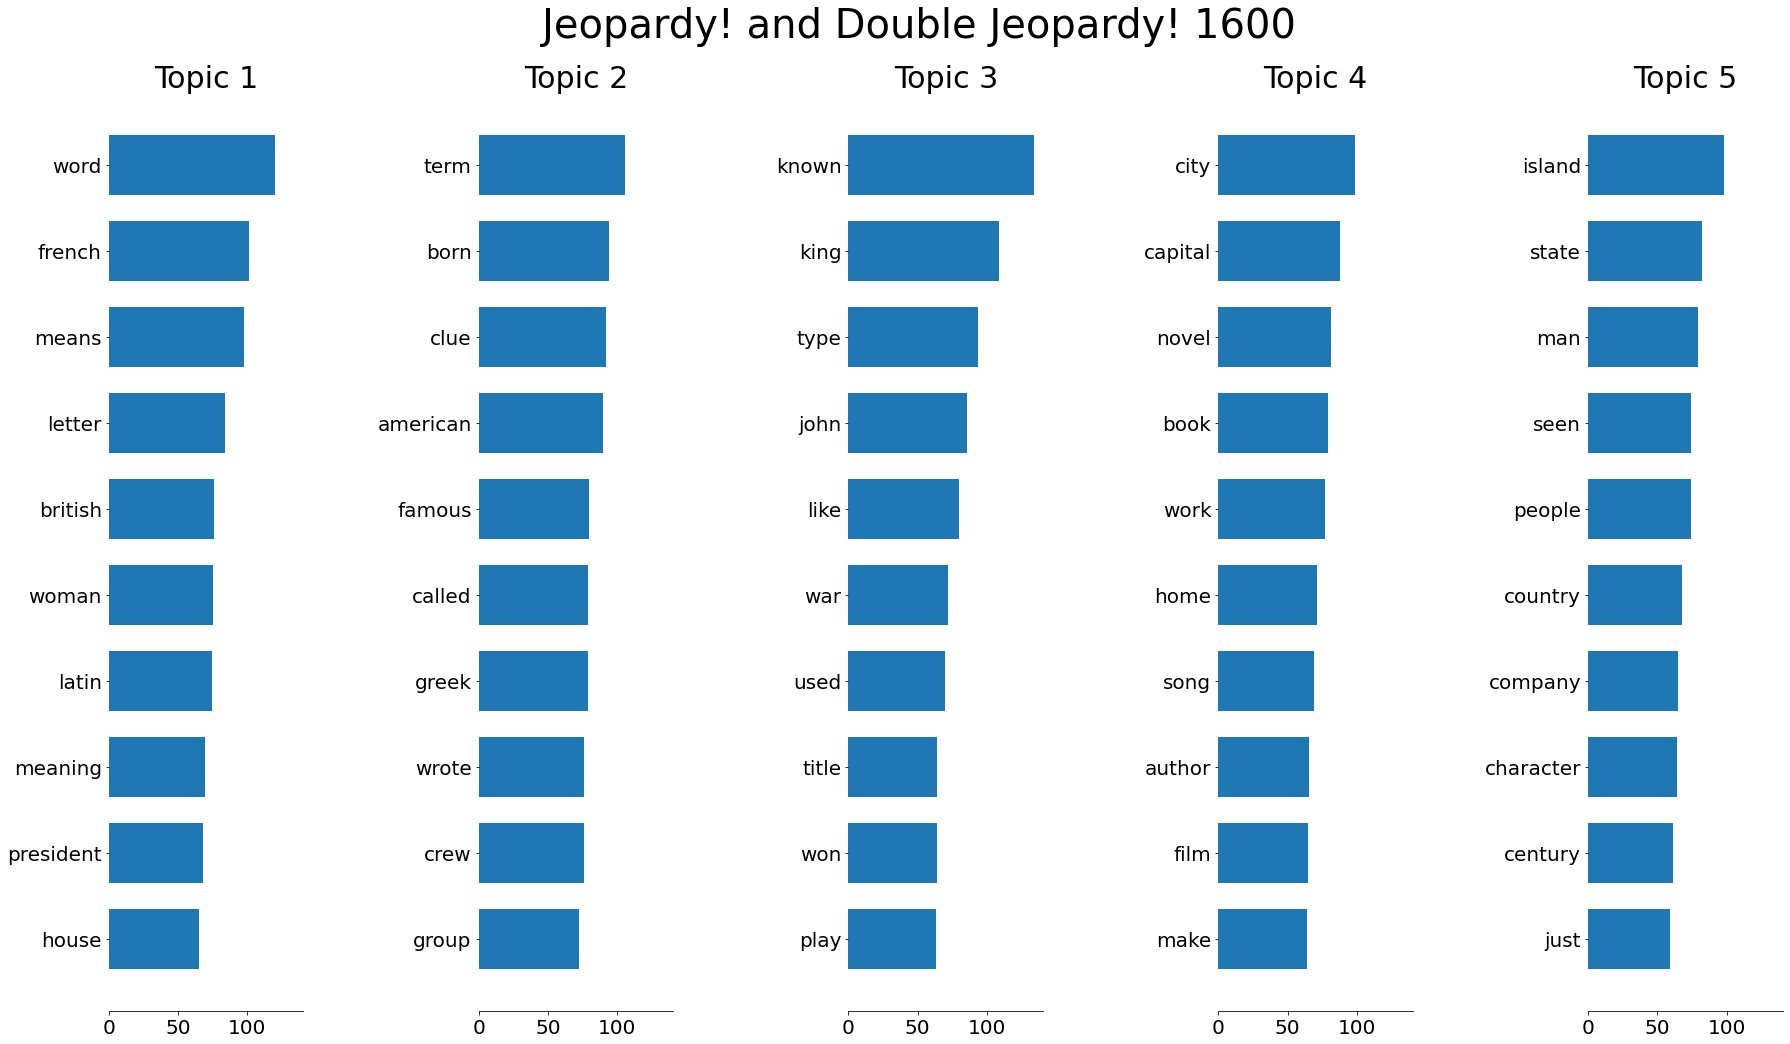

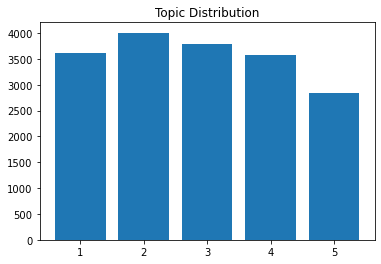

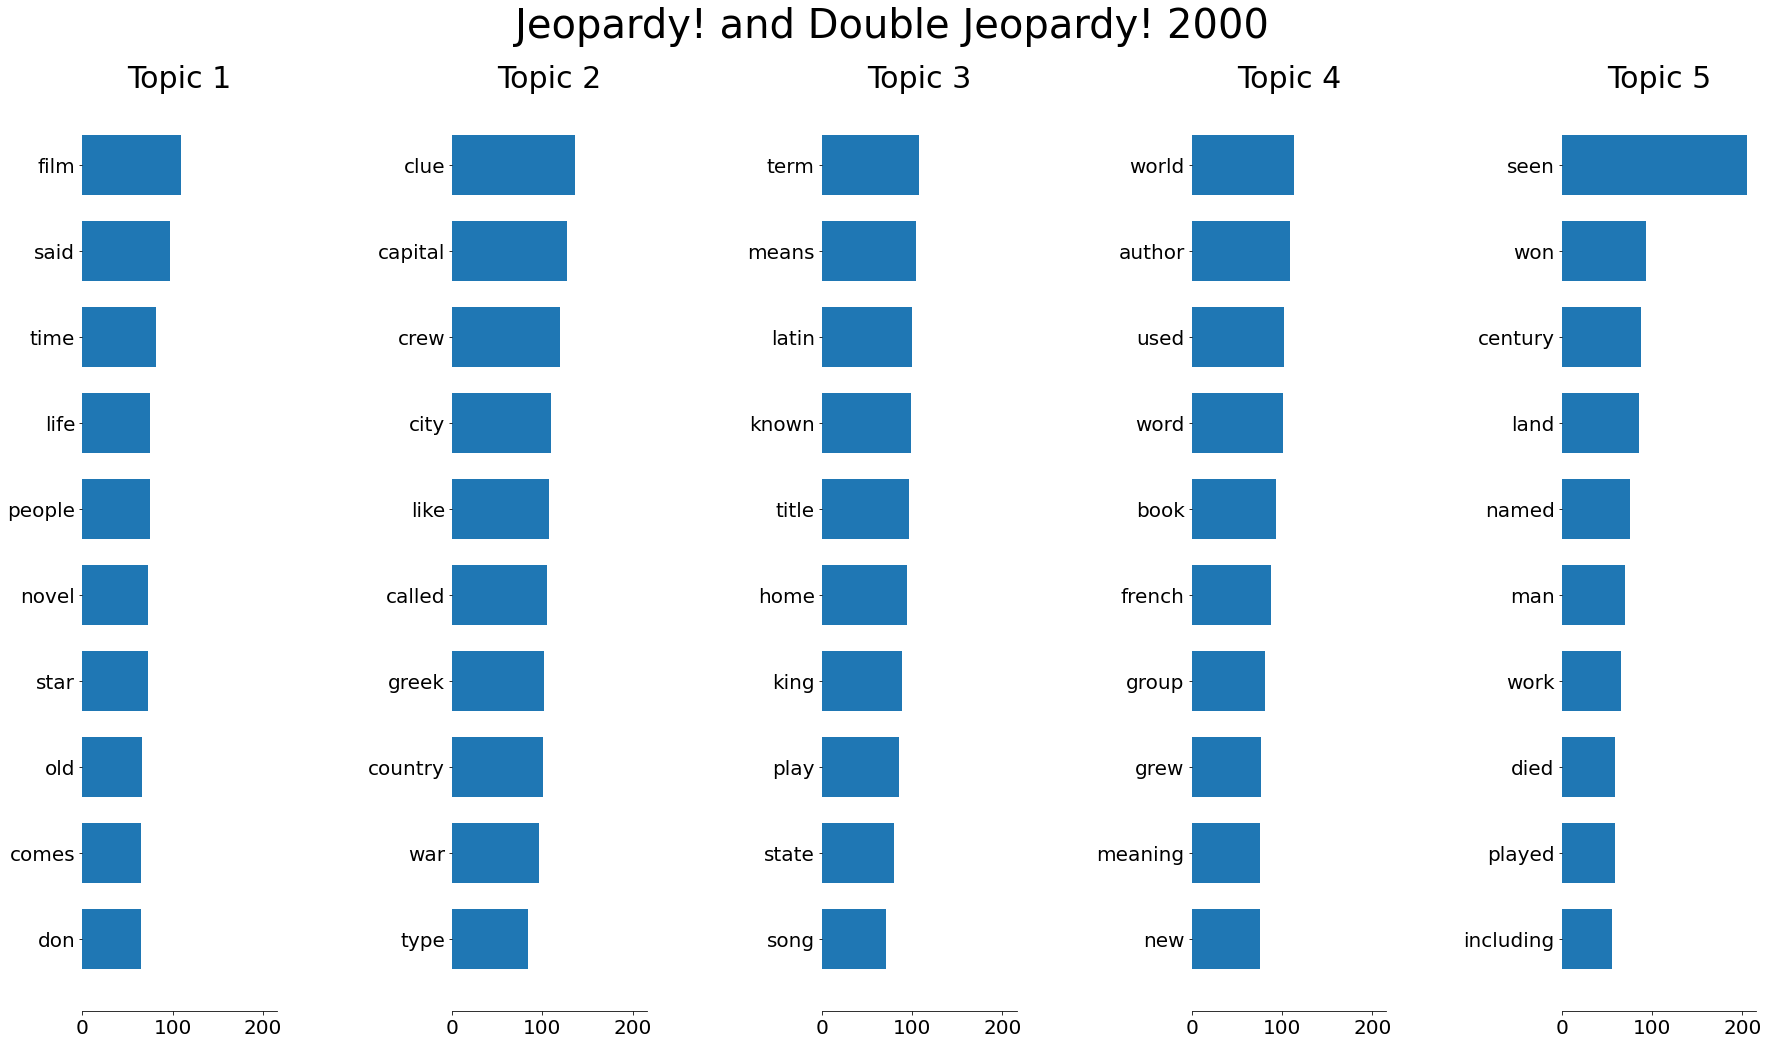

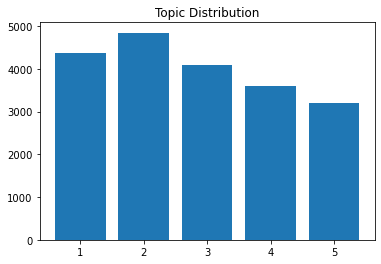

In [112]:
title = 'Jeopardy! and Double Jeopardy!'
save_name = '../img/jeopardy_double_jeopardy_value'
save_figs_value(df_new, title, save_name)

## Game Dynamics based on rounds

To find the common topics based on values, several pre-processing steps were taken. First, the questions were cleaned as mentioned previously. Second, we adjusted the values based on how the game board changed; Since 2001, the values of the questions were doubled. To address this change, all the questions before 2001 were doubled in values. Also, players have the choice to ‘all-in’ their values to win the round. To address that, we filtered all the values that are not on the board. We are only accounting board-value (\\$200,\\$400, \\$600, \\$800, \\$1000, \\$1200, \\$1600, \\$2000) questions.

The questions from Jeopardy! and Double Jeopardy! were divided by value for the entire dataset. One common theme is that geography questions appear in all value categories. From further investigation on sample questions, it is noted that easier geography questions for the small value questions. For instance, city or capital questions. Many geography questions are also mixed with historical references too, making this topic appear almost in all value rounds. Also, famous people quotes are found throughout all value rounds as well. Below is a list of noticeable results that we were able to distinguish:

1. The phrase clue crews, referring to Jeopardy! Clue Crew Sarah Whitcomb Foss and Jimmy McGuire, starts appearing after \\$600. 
2. The term ‘poet’ appears after \\$800, as well as numerical questions with the ‘000’. 
3. There are questions on sports before \\$1000 but there are minimal questions past \\$1000. 
4. The phrase white house appears at \\$1000. 
5. The term ‘opera’ appears only in \\$1200. 
6. The category and term famous women appears after \\$1200. 
7. For high value questions, the questions are very specific.
8. At \\$2000, the term ‘died’ appears and ‘grew’. Also, the word ‘seen’ appears at \\$2000. From looking at the questions, ‘seen’ could be interpreted as picture questions. 


<b>There are topics that overlap multiple values, but the \\$200 questions have a noticeable difference than in \\$2000. There are not a lot of geographical questions in the harder questions but more geographical questions in the \\$200 questions. Furthermore, the famous people's quotes and word meanings appear more in the harder questions.</b> 



| Jeopardy and Double Jeopardy by value | Topics                                                                                                                                       |   |   |
|---------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------|---|---|
|                  200                  | 1: born/personalities and their trivia 2: geography 3: sports 4: who said what 5: entertainment <br> Max : 2 Min: 3                          |   |   |
|                  400                  | 1: geography 2: entertainment 3: novels/authors 4: trivia 5: history <br> Max: 1 Min: 3                                                      |   |   |
|                  600                  | 1: sports 2: geography/famous people trivia 3: king/title/hit 4: famous people trivia 5: clue crew <br> Max: 2 Min: 4                        |   |   |
|                  800                  | 1: clue crew 2: famous quotes/novels/tv 3: geography 4: sports 5: famous people trivia <br> Max: 1 Min: 5                                    |   |   |
|                  1000                 | 1: movie/white house 2: history/war 3: clue crew/entertainment 4: famous heads/novels 5: words/meanings <br> Max: 2 Min: 5                   |   |   |
|                  1200                 | 1: greek and latin/geography/history 2: entertainment/woman/novel 3: who said what 4: novels/opera 5: clue crew/geography <br> Max: 1 Min: 3 |   |   |
|                  1600                 | 1: woman/guess word 2: clue crew/famous people trivia 3: famous people 4: geography/novels 5: island/state <br> Max: 2 Min: 5                |   |   |
|                  2000                 | 1: entertainment 2: clue crew 3: words/meanings 4: author/novels 5: picture questions/died* <br> Max: 2 Min: 5                               |   |   |

* Max is Largest number of questions in the topic given and Min in Lowest number of questions in the topic given

## Jeopardy and Double Jeopardy topics based on values and years combination

In [17]:
def save_figs_value_year(df, title, save_name, n_top_words=10):
    
    years = sorted(df.year.unique())
    output = []
    for i in range(len(years)):
        if i % 4 == 0:
            output.append(years[i])

    filter_money_list = df.value_new.value_counts().reset_index().iloc[:8]['index'].tolist()
    filter_money_list = sorted(filter_money_list)
    n_top_words = n_top_words
    
    for j in filter_money_list:
        for i in range(len(output)-1):
            if output[i] != 2008:
                df_filter = df.loc[(df['year'] >= output[i]) & (df['year'] < output[i+1])]
            if output[i] == 2008:
                df_filter = df.loc[(df['year'] >= output[i]) & (df['year'] <= output[i+1])]

            df_working = df_filter.loc[df_filter['value_new'] == j]

            vectorizer = TfidfVectorizer(stop_words='english', max_features=2000, max_df=0.95, min_df=2)
            X = vectorizer.fit_transform(df_working['question'])
            lda = LatentDirichletAllocation(n_components=5, learning_method='online',n_jobs=-1, random_state=0)
            X = lda.fit_transform(X)
            if output[i] != 2008:
                feature_names = vectorizer.get_feature_names()
                plot_top_words(lda, feature_names, n_top_words, 
                               f'{title} value {j} {output[i]} - {output[i+1]-1}',
                               save=f'{save_name}_value {j}_{output[i]}_{output[i+1]-1}.jpeg')
                plot_dist(X, save=save_name)

            if output[i] == 2008:
                feature_names = vectorizer.get_feature_names()
                plot_top_words(lda, feature_names, n_top_words, 
                               f'{title} value {j} {output[i]} - {output[i+1]}',
                               save=f'{save_name}_value {j}_{output[i]}_{output[i+1]}.jpeg')
                plot_dist(X, save=save_name)

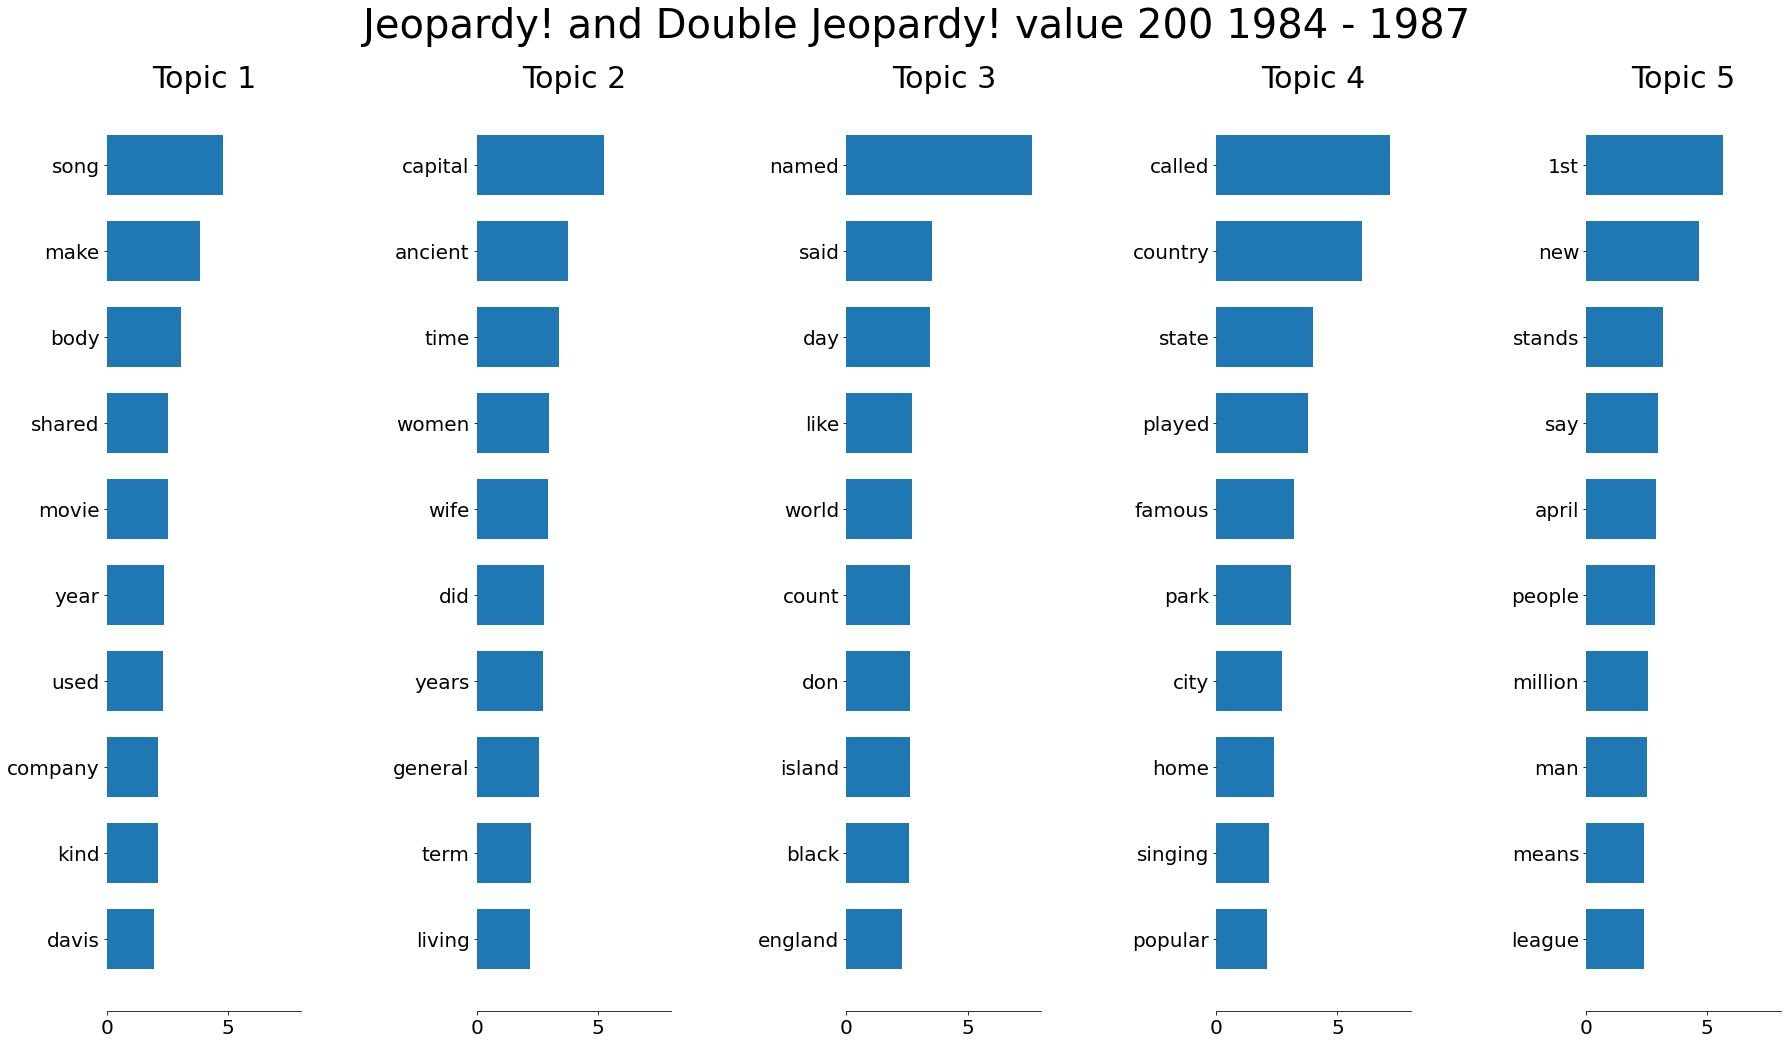

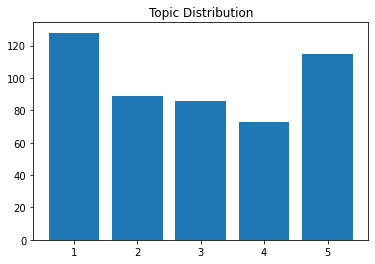

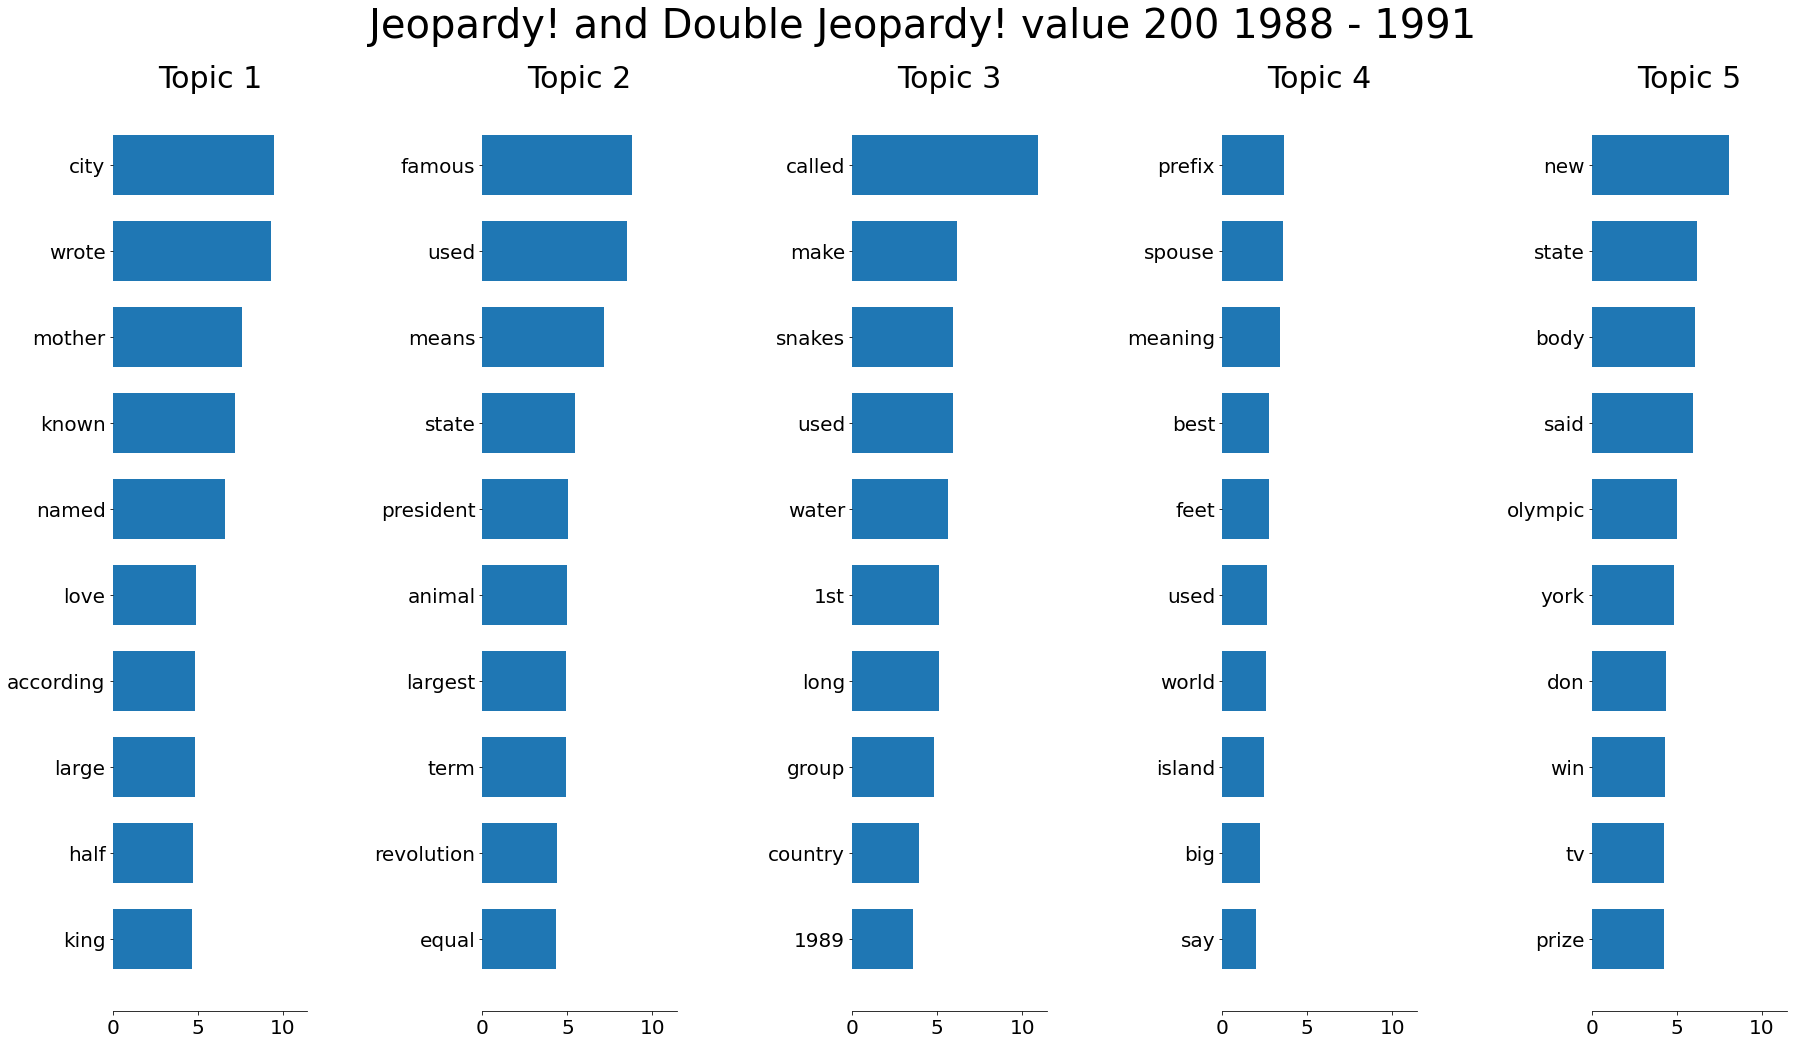

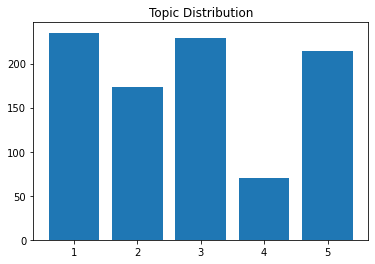

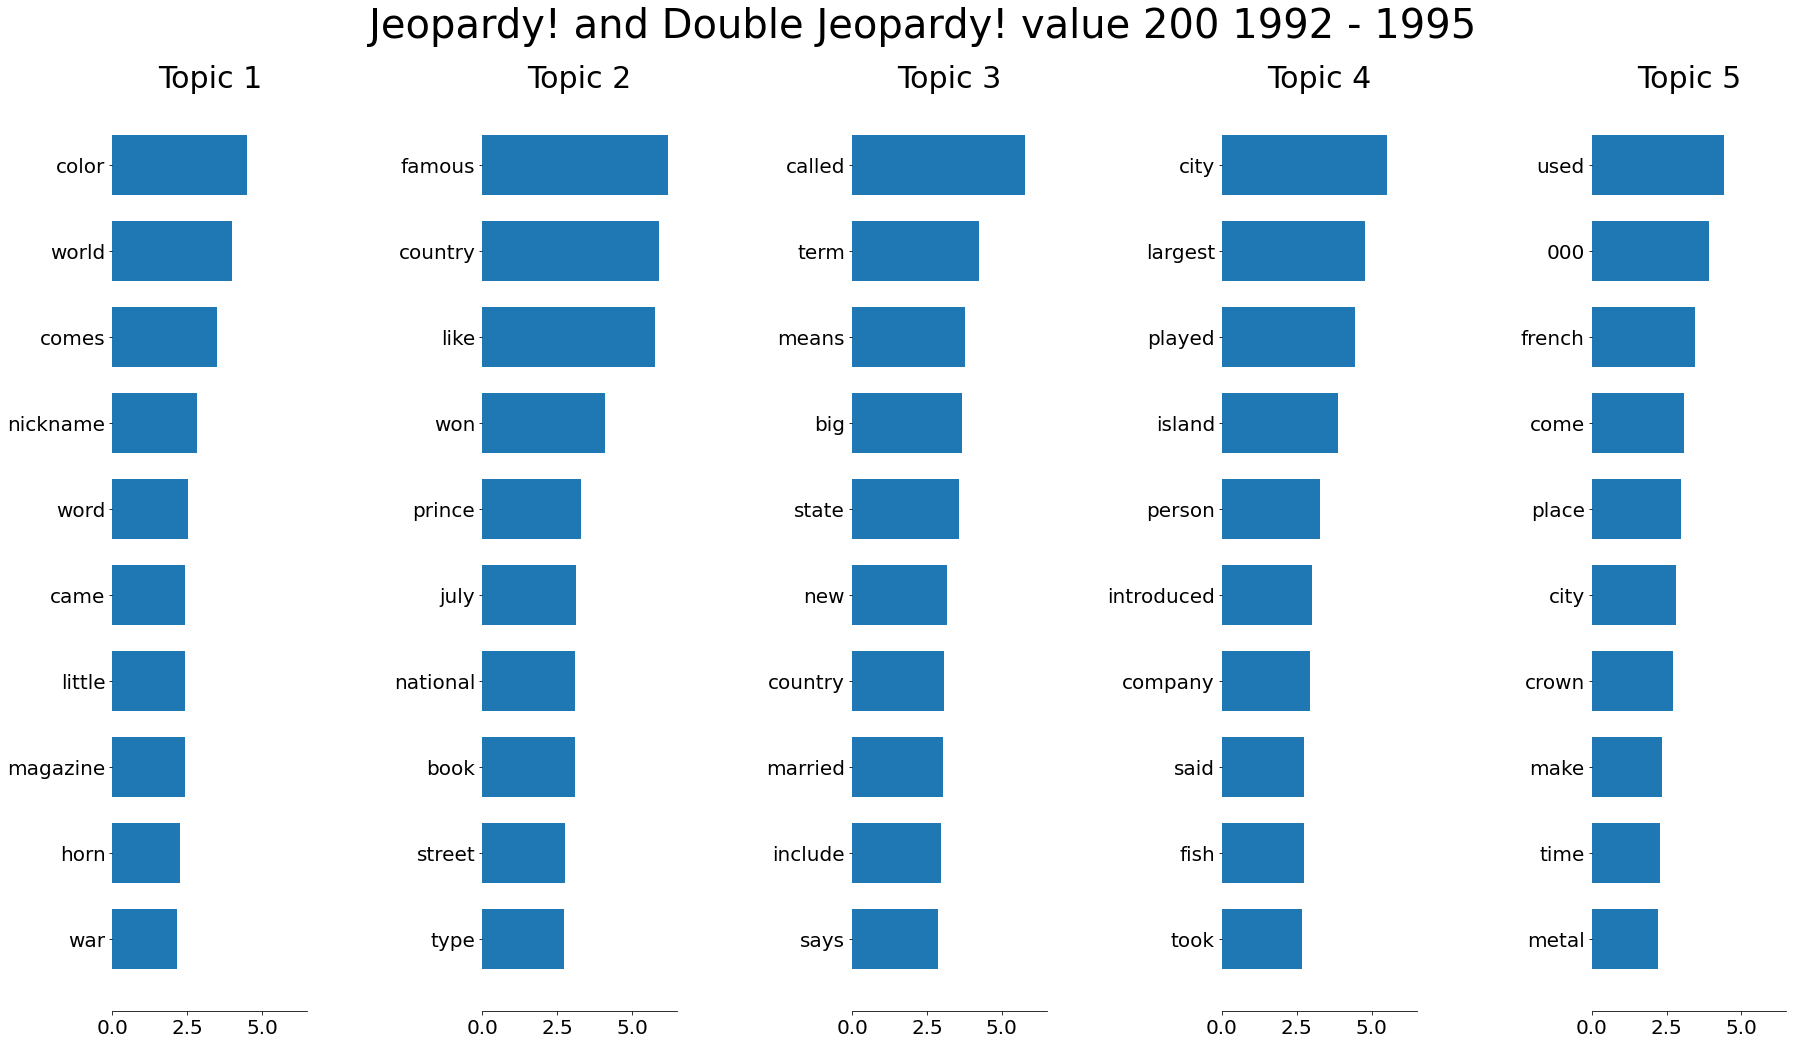

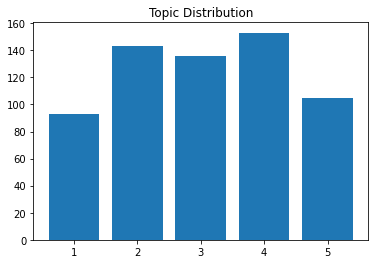

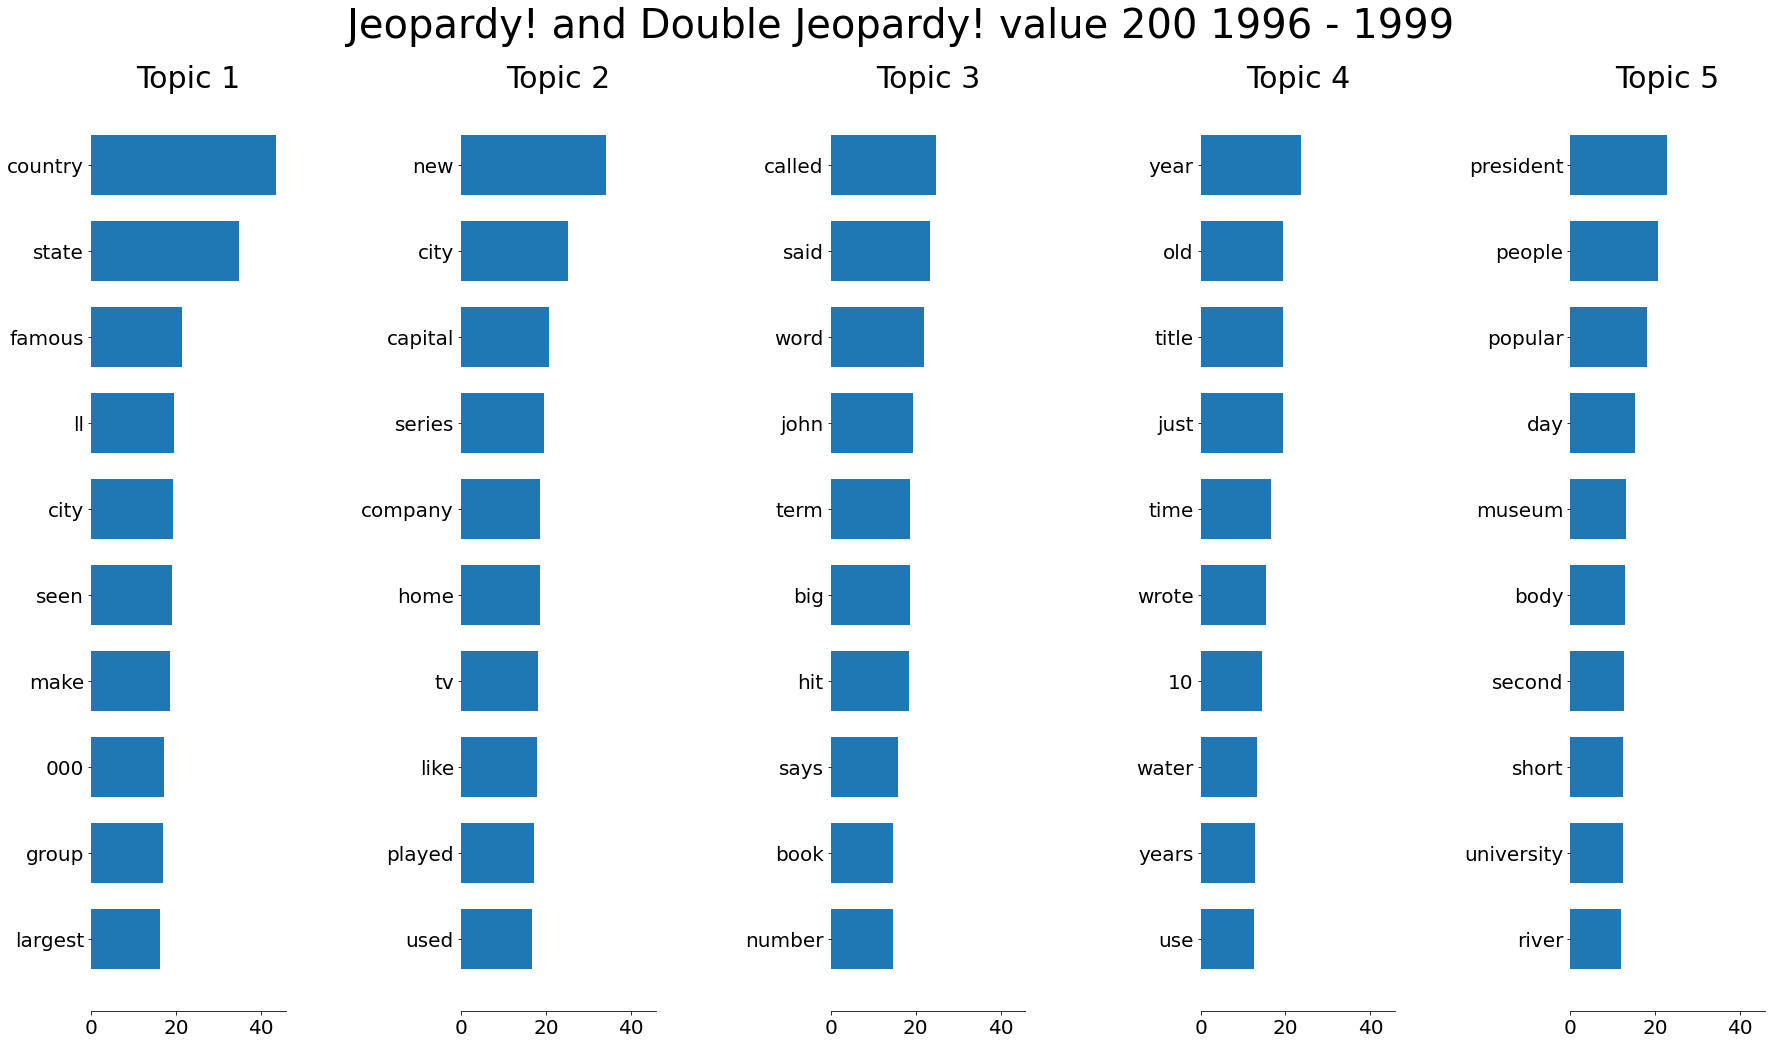

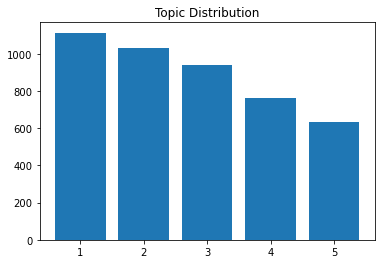

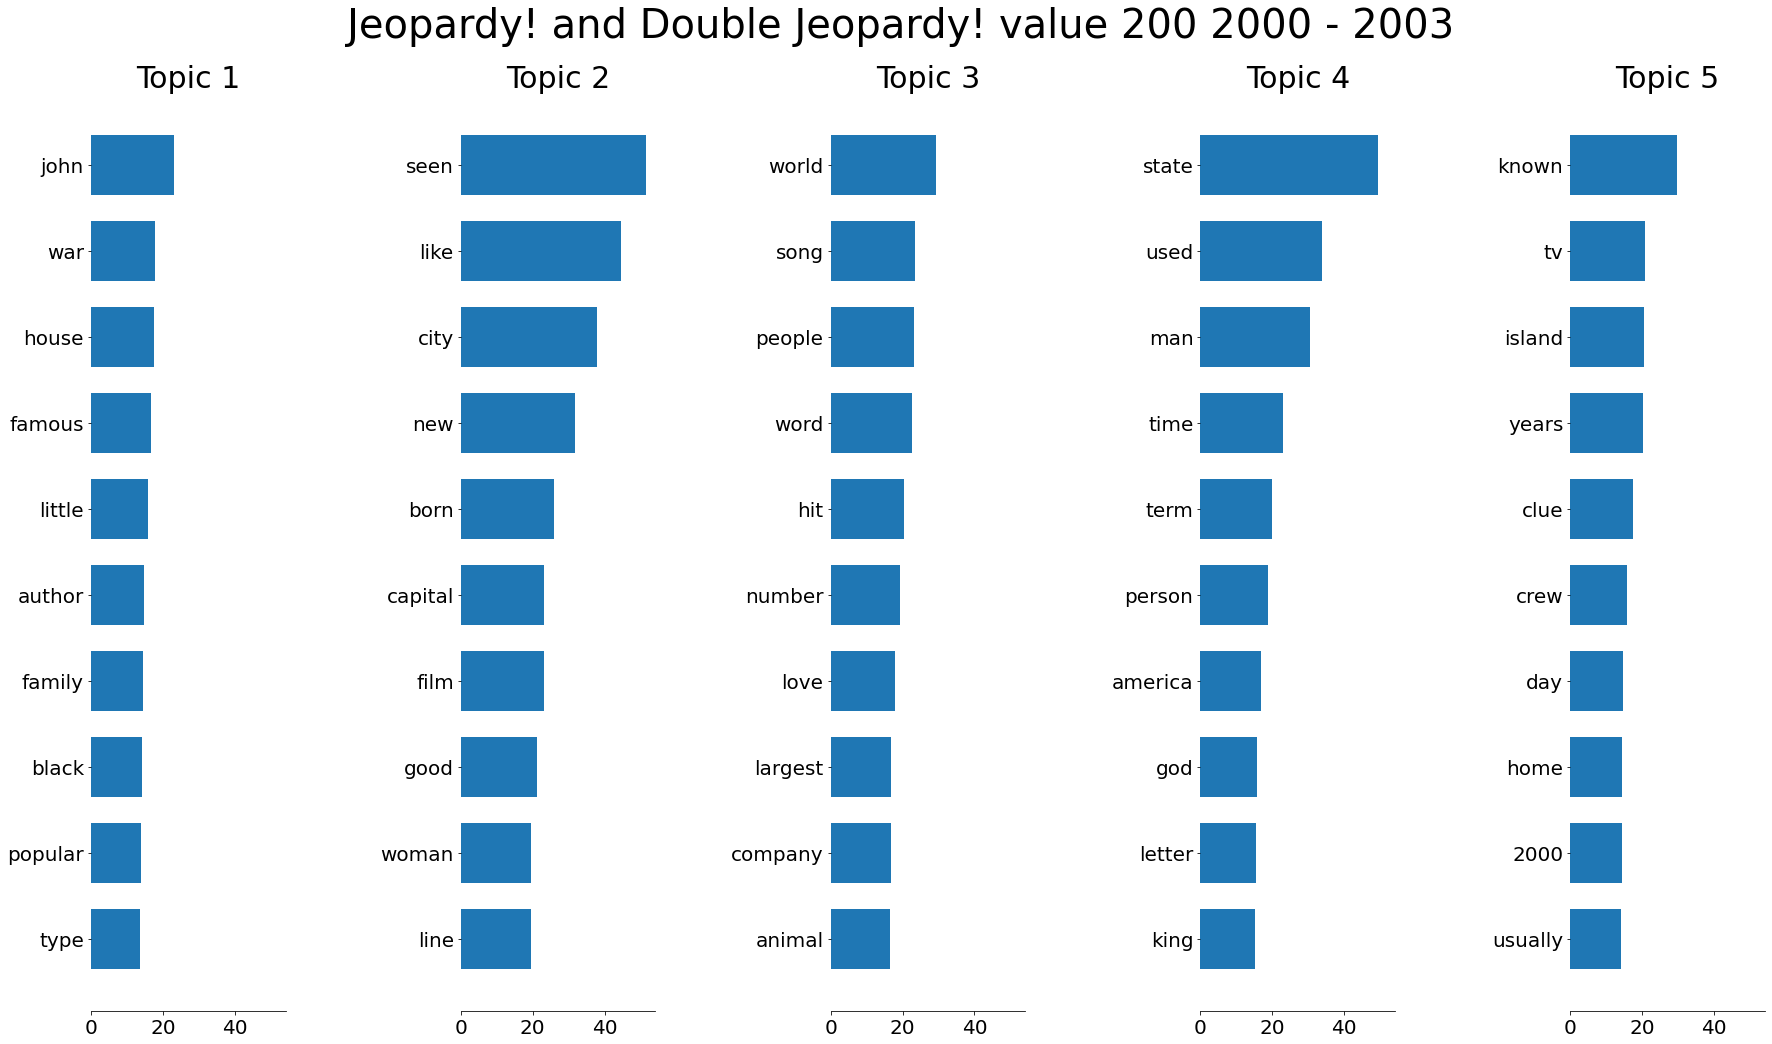

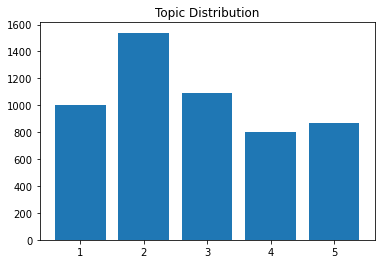

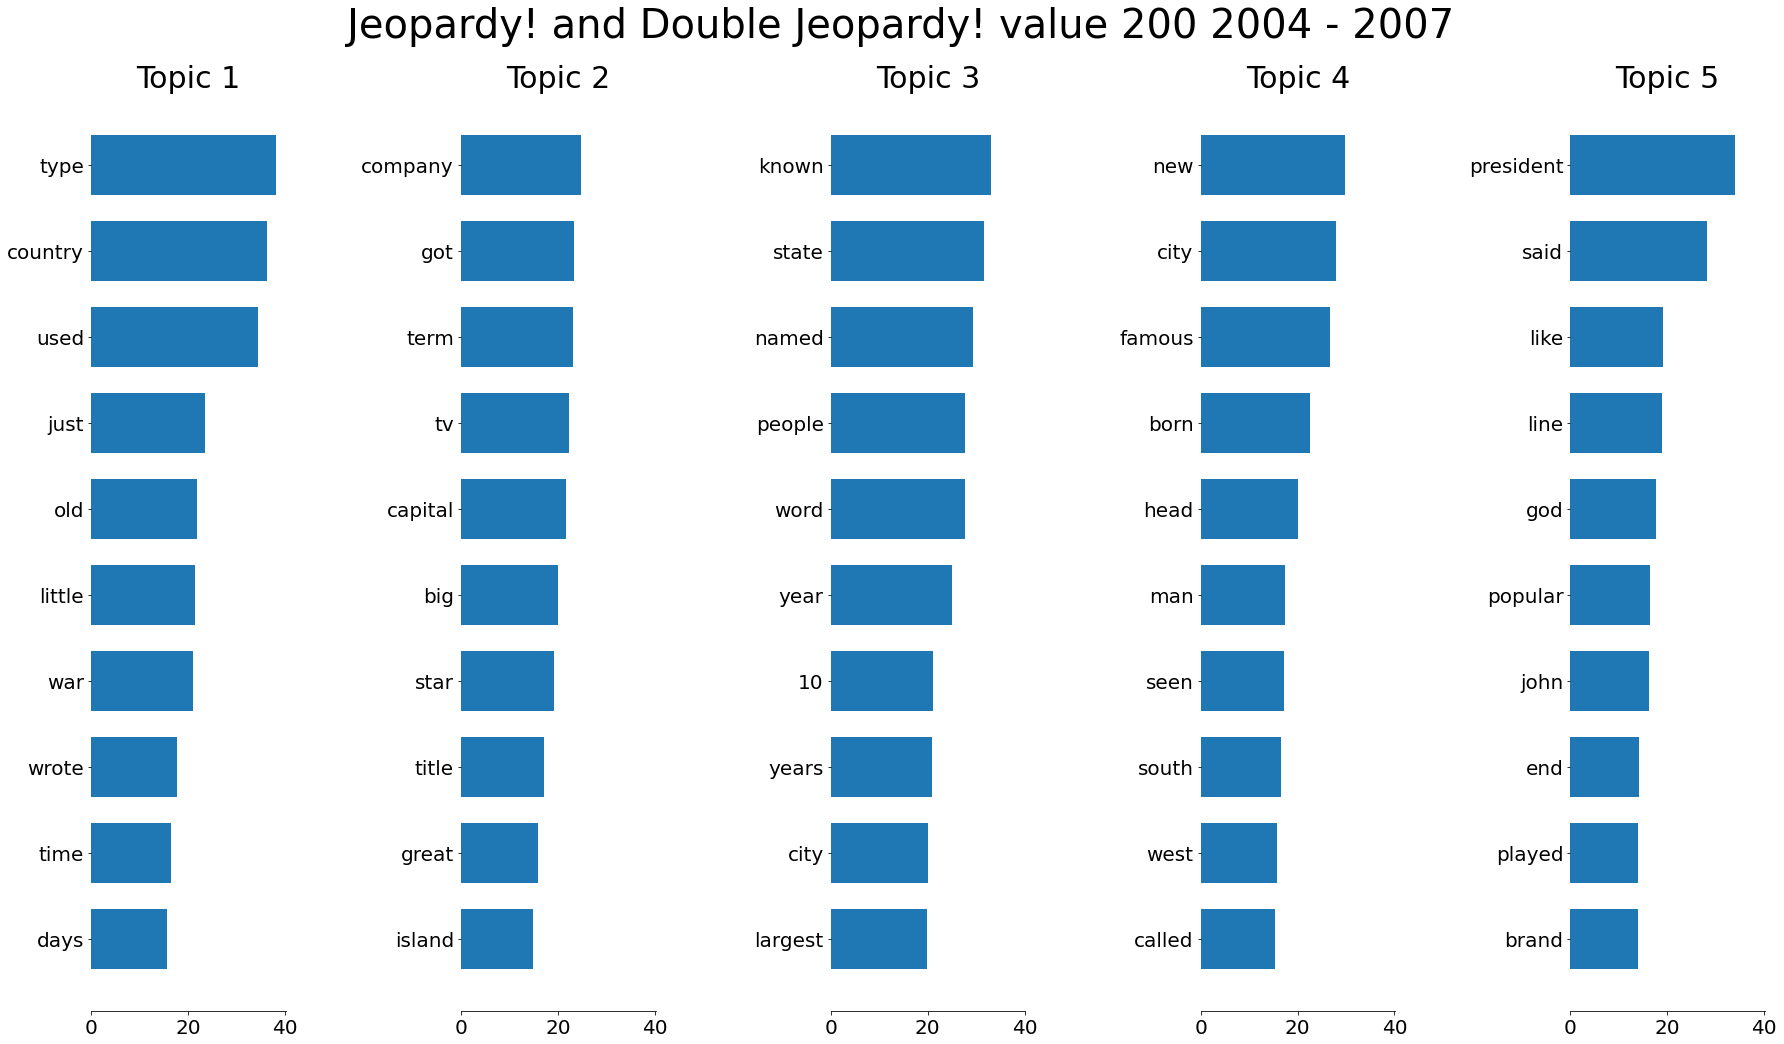

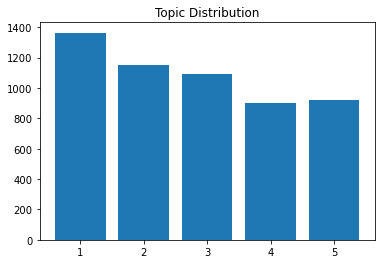

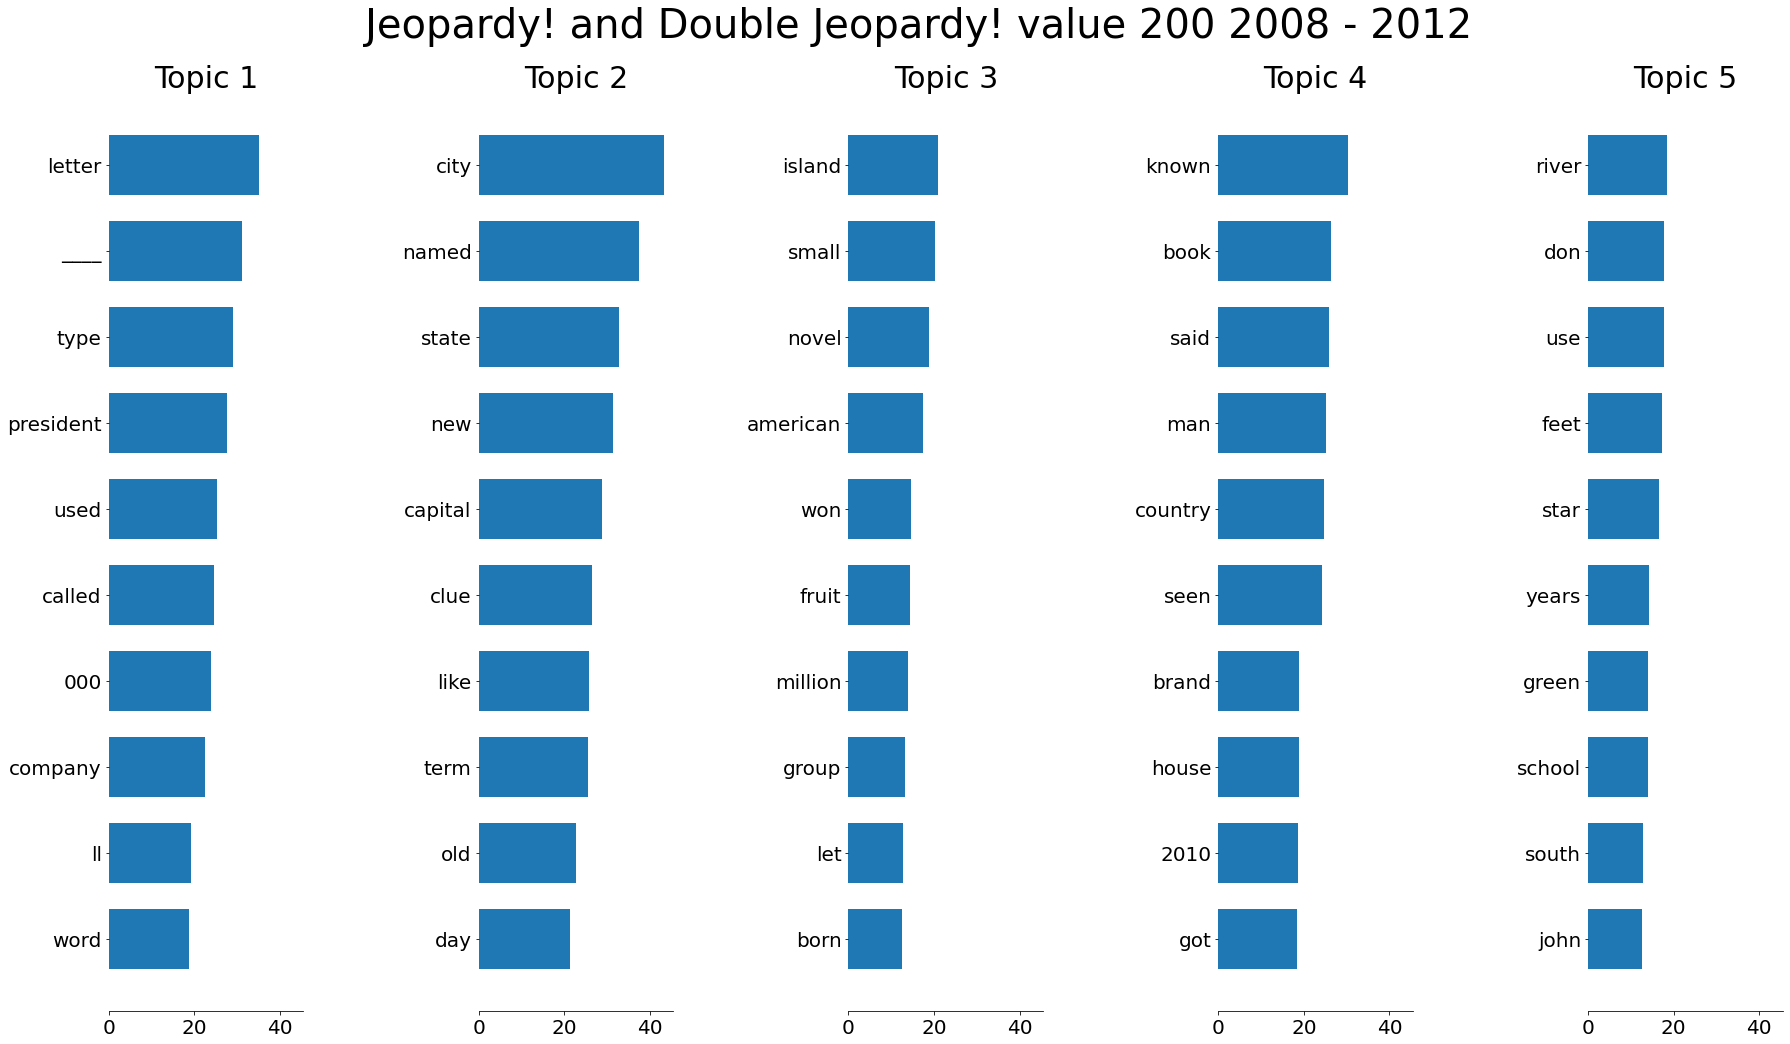

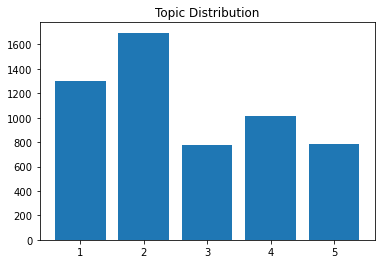

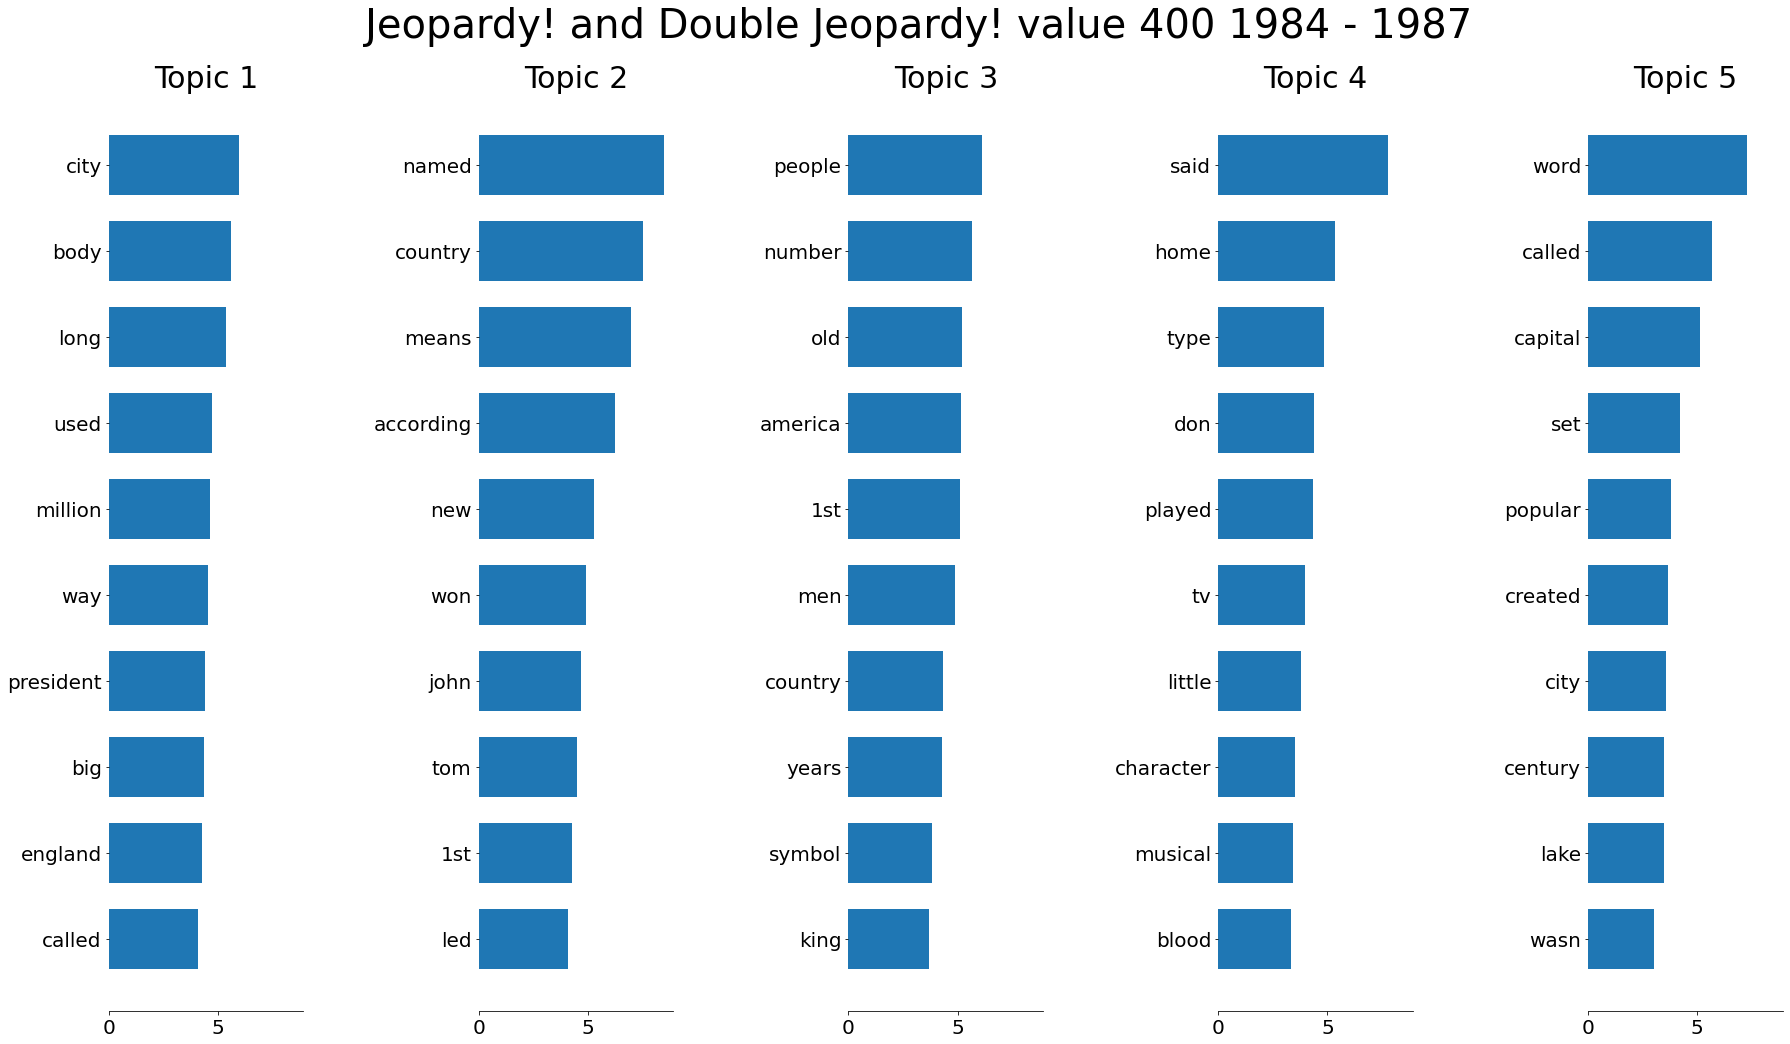

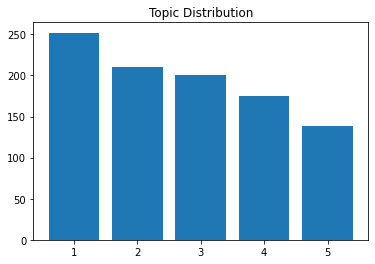

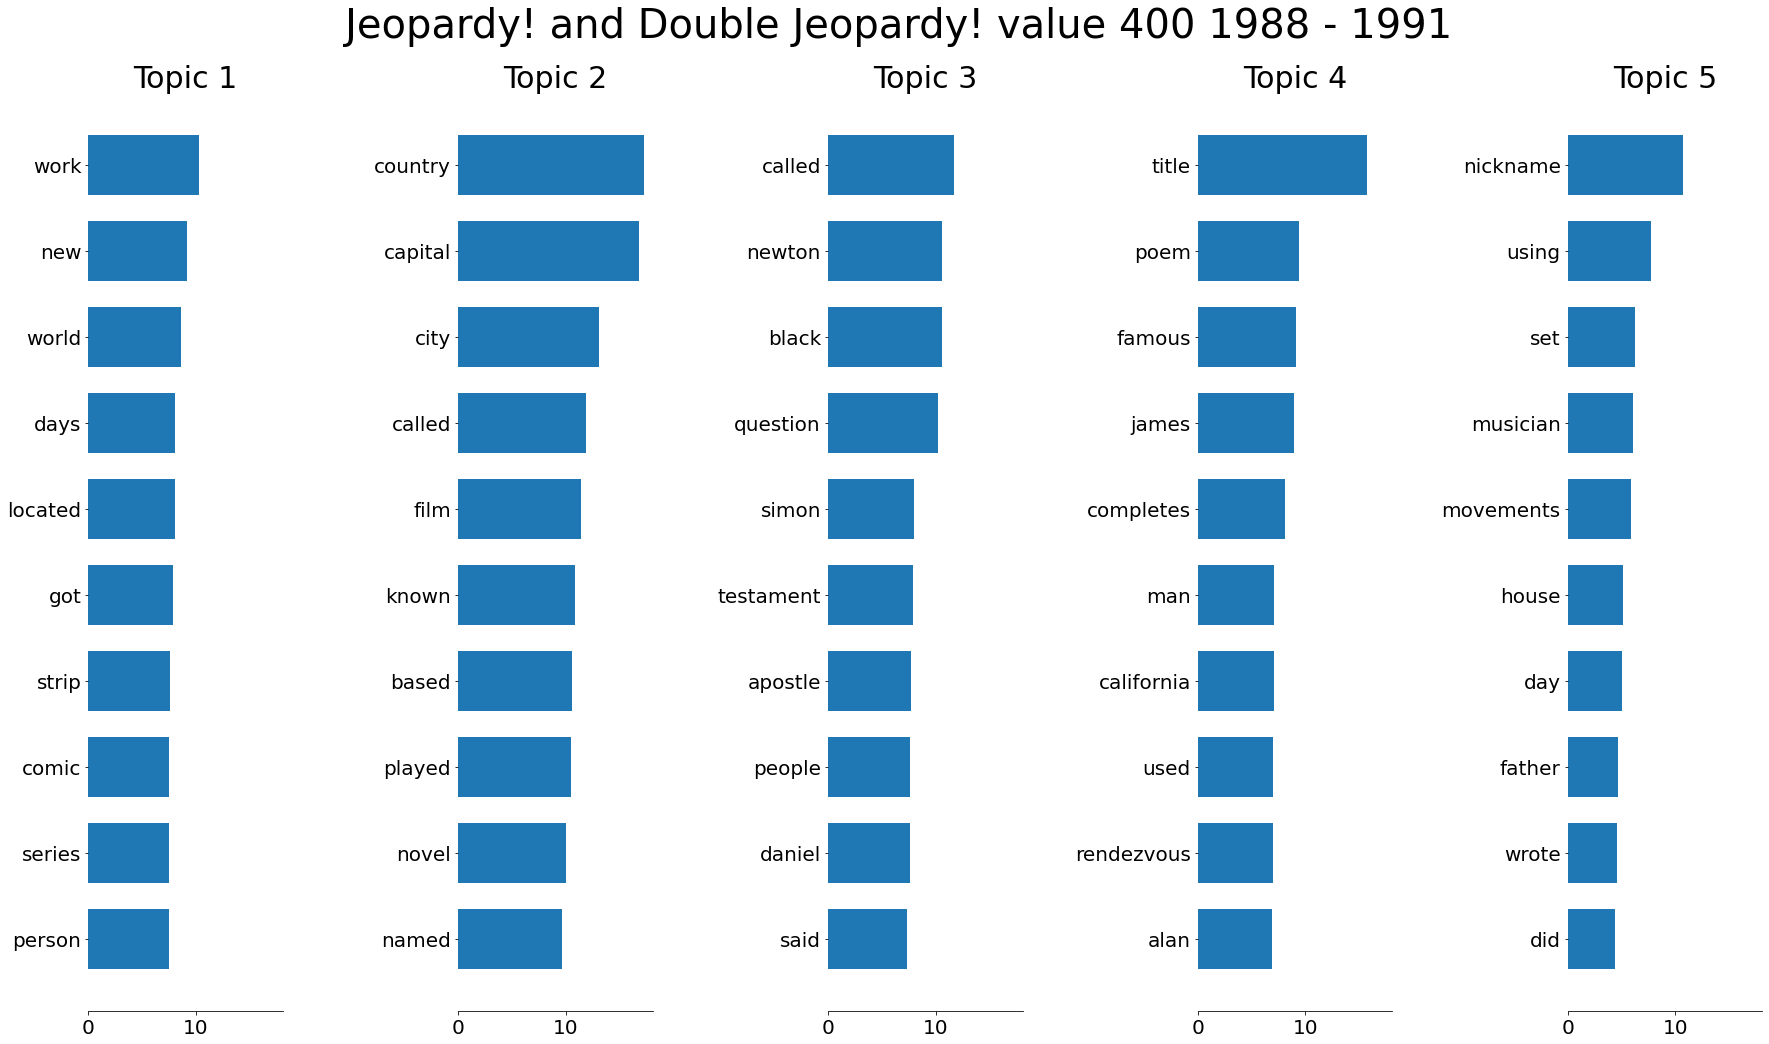

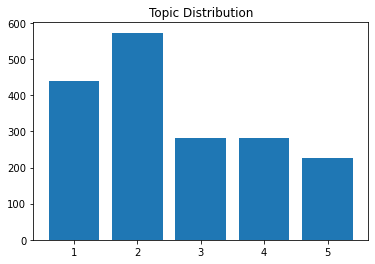

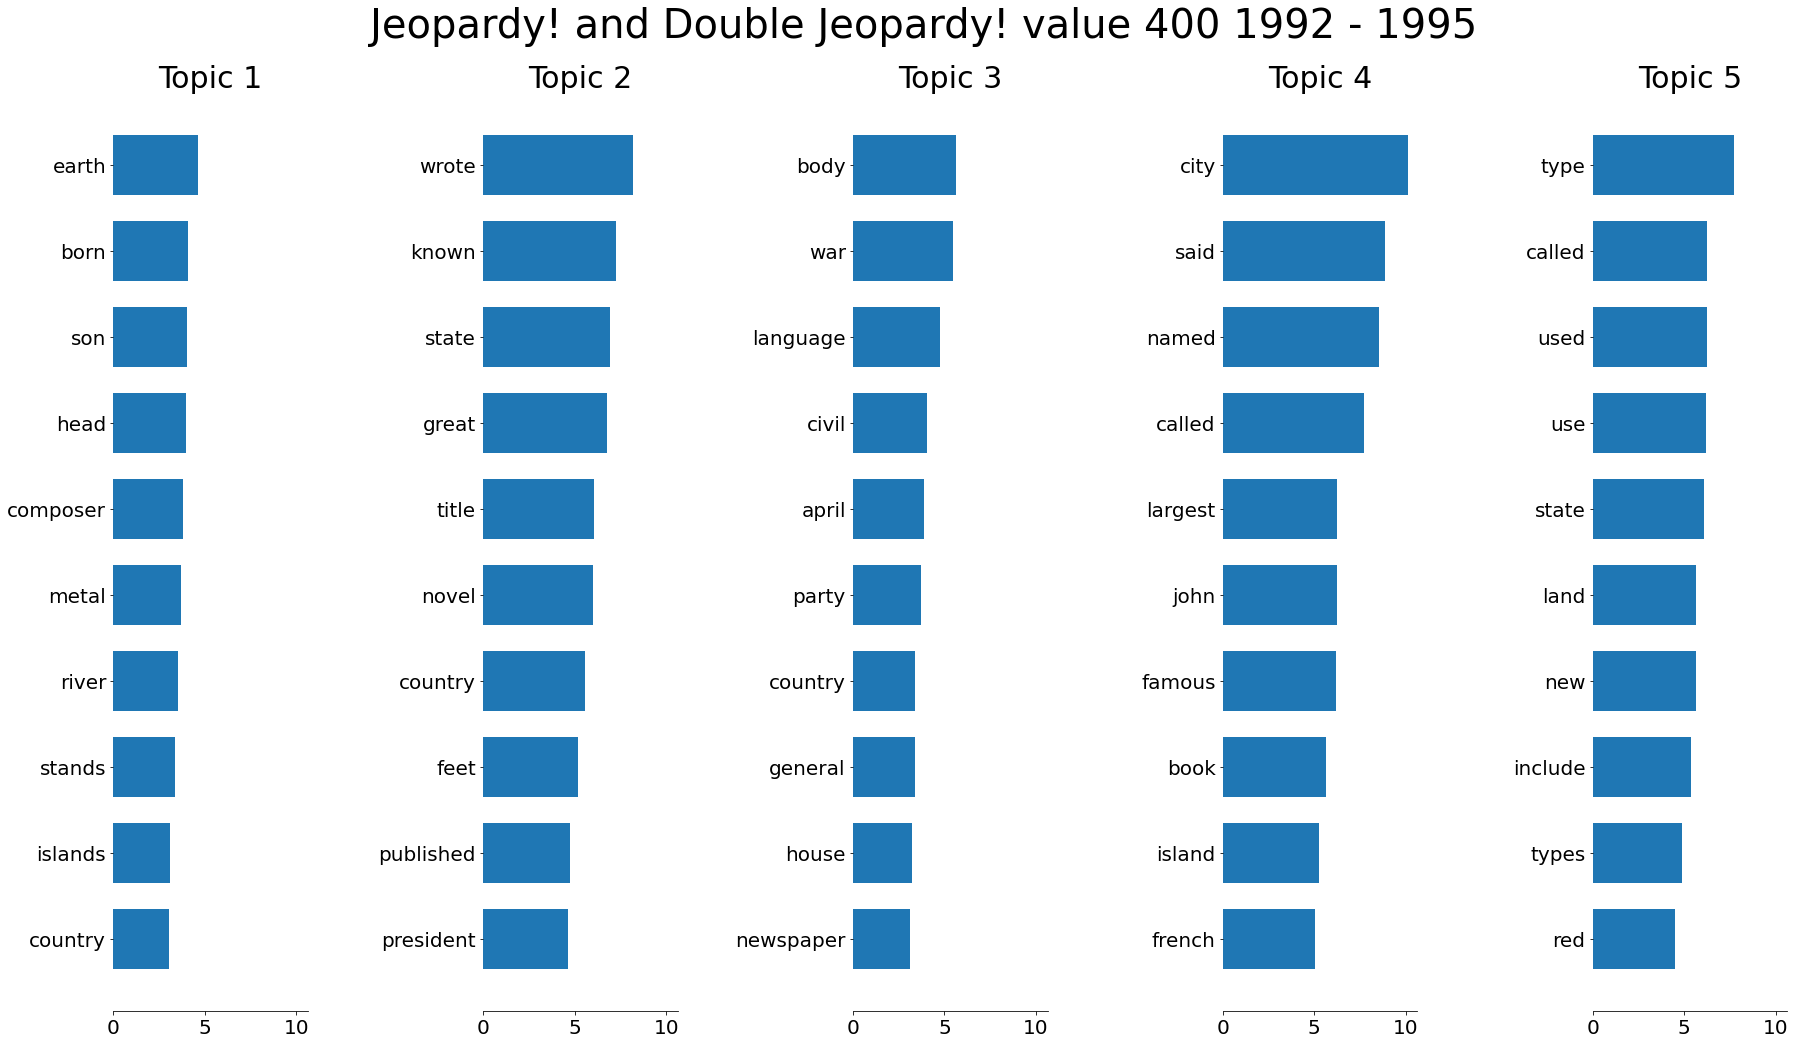

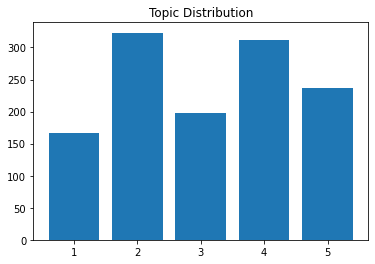

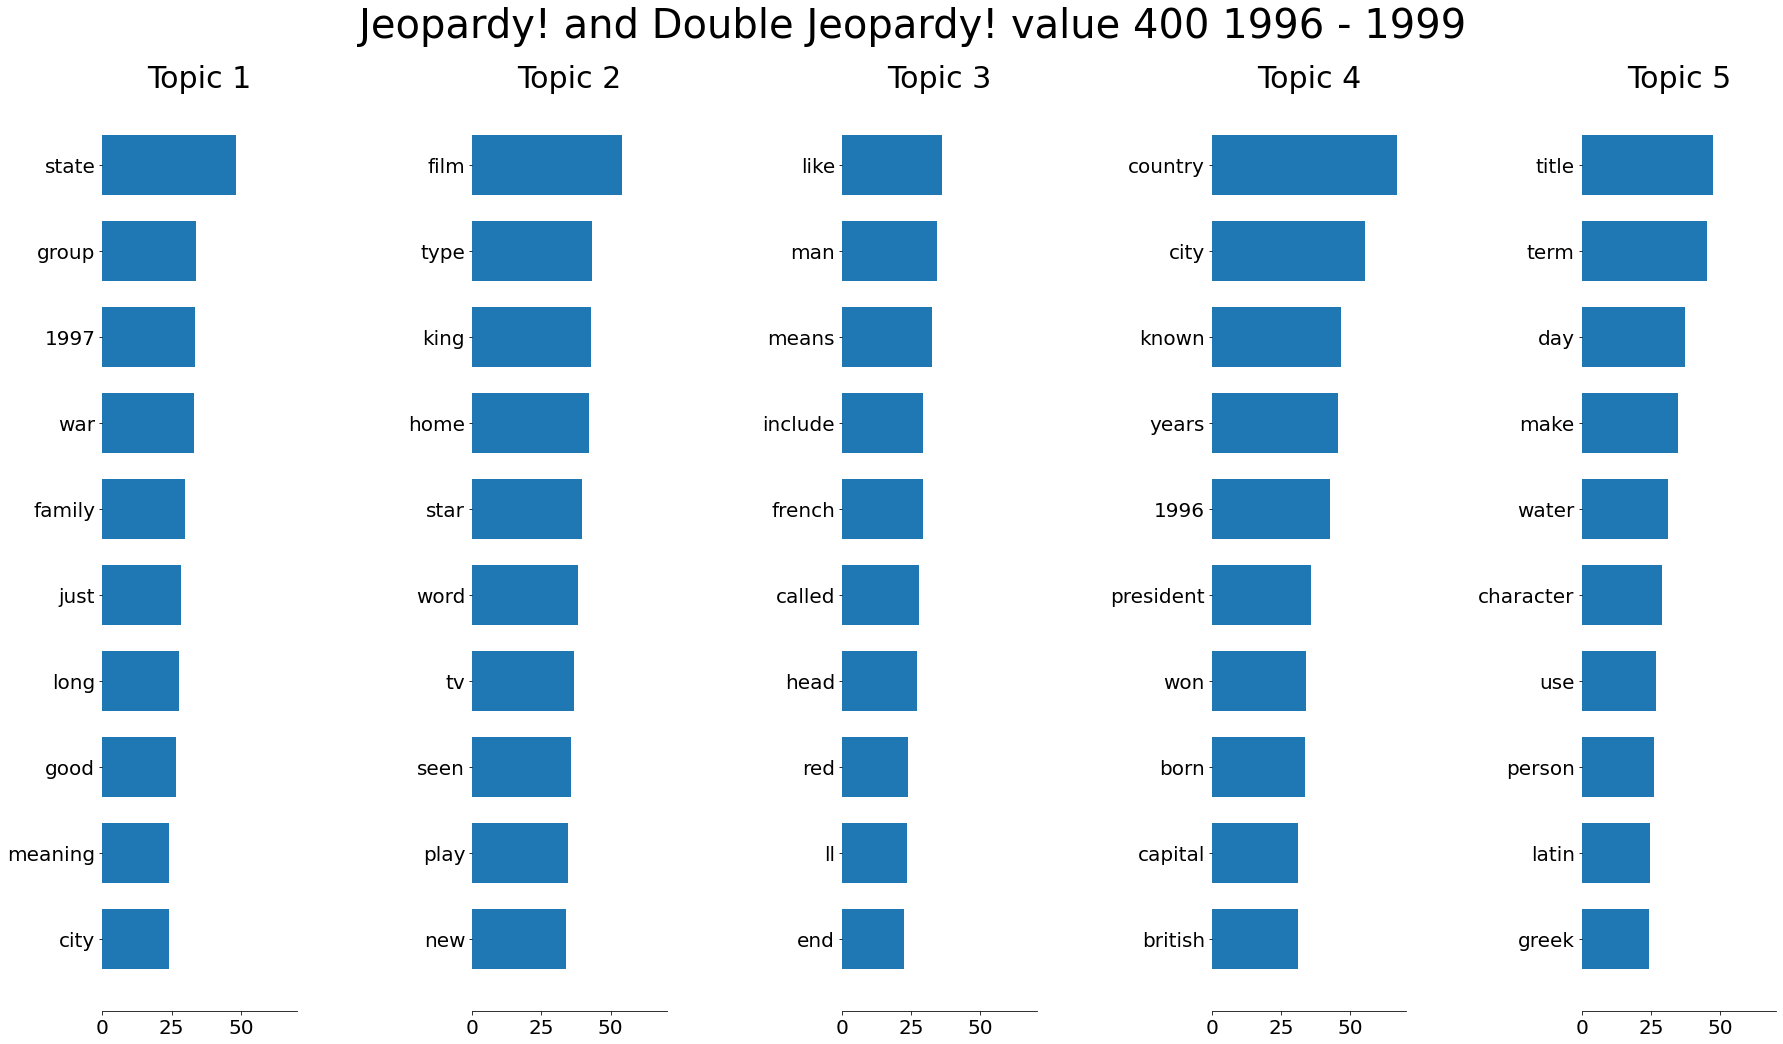

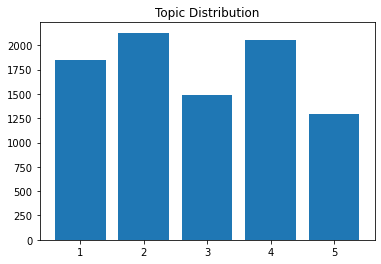

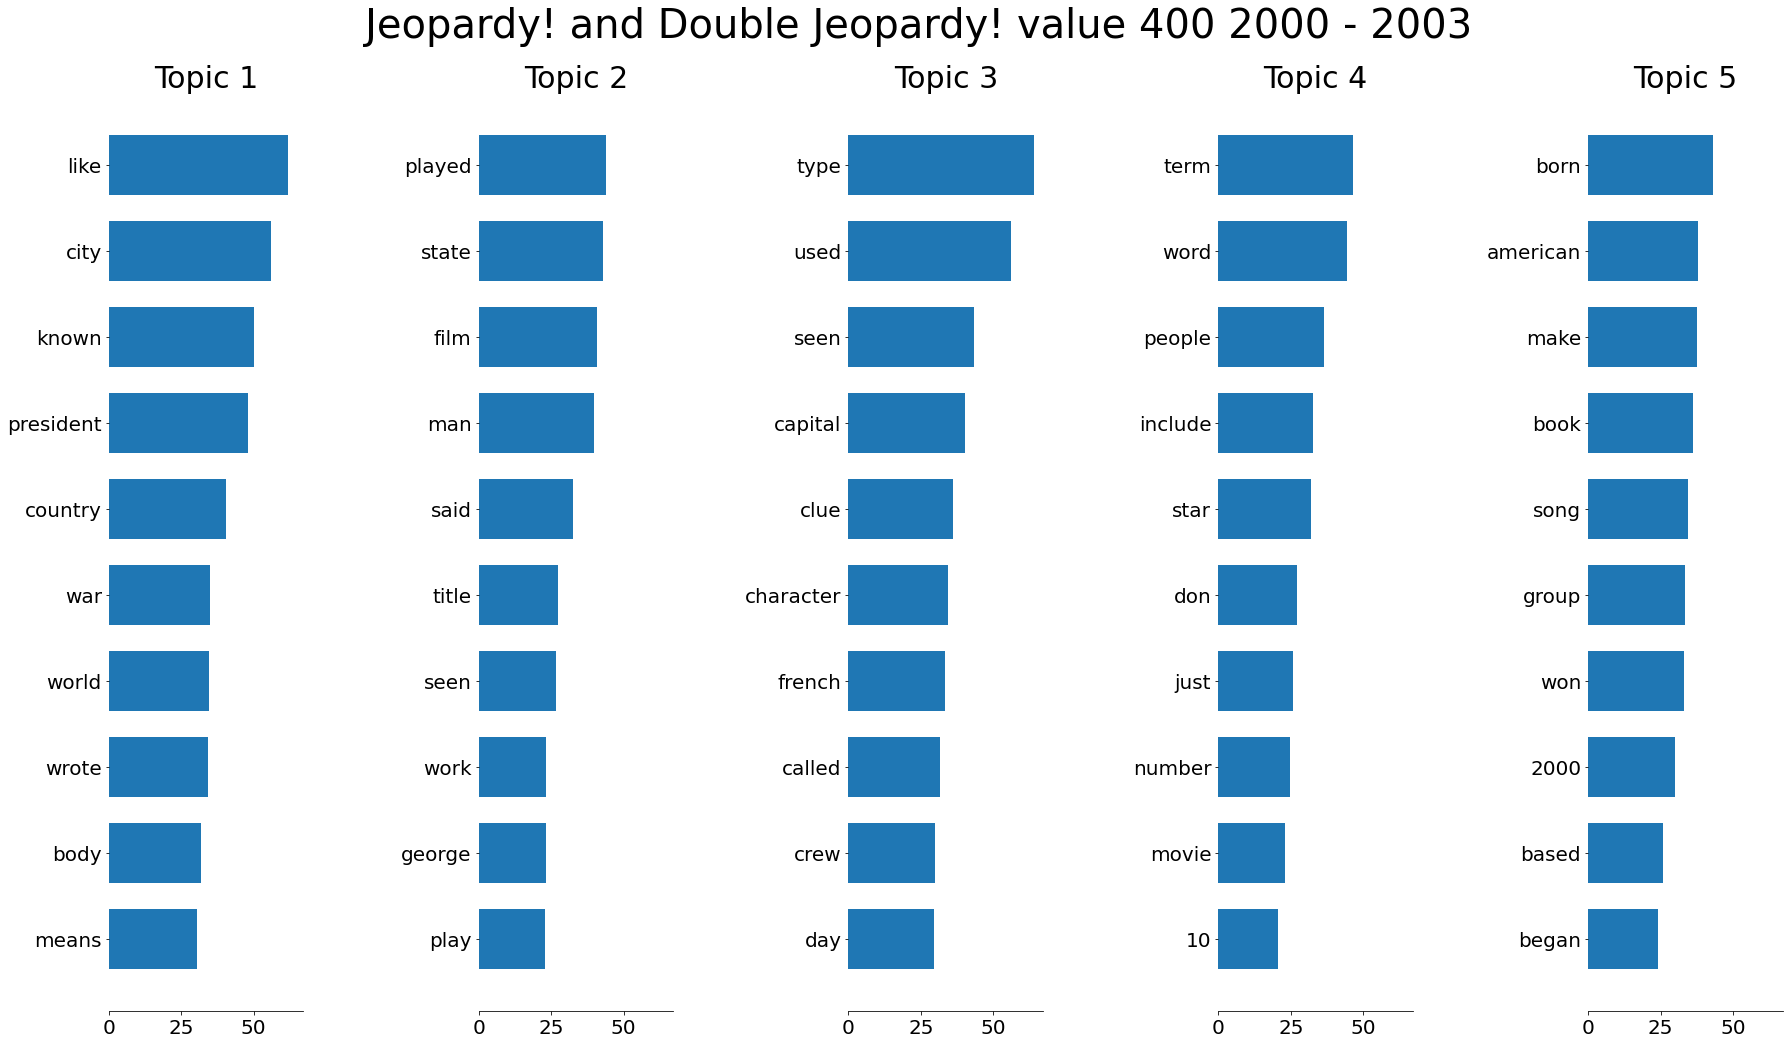

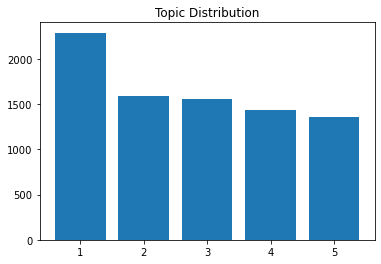

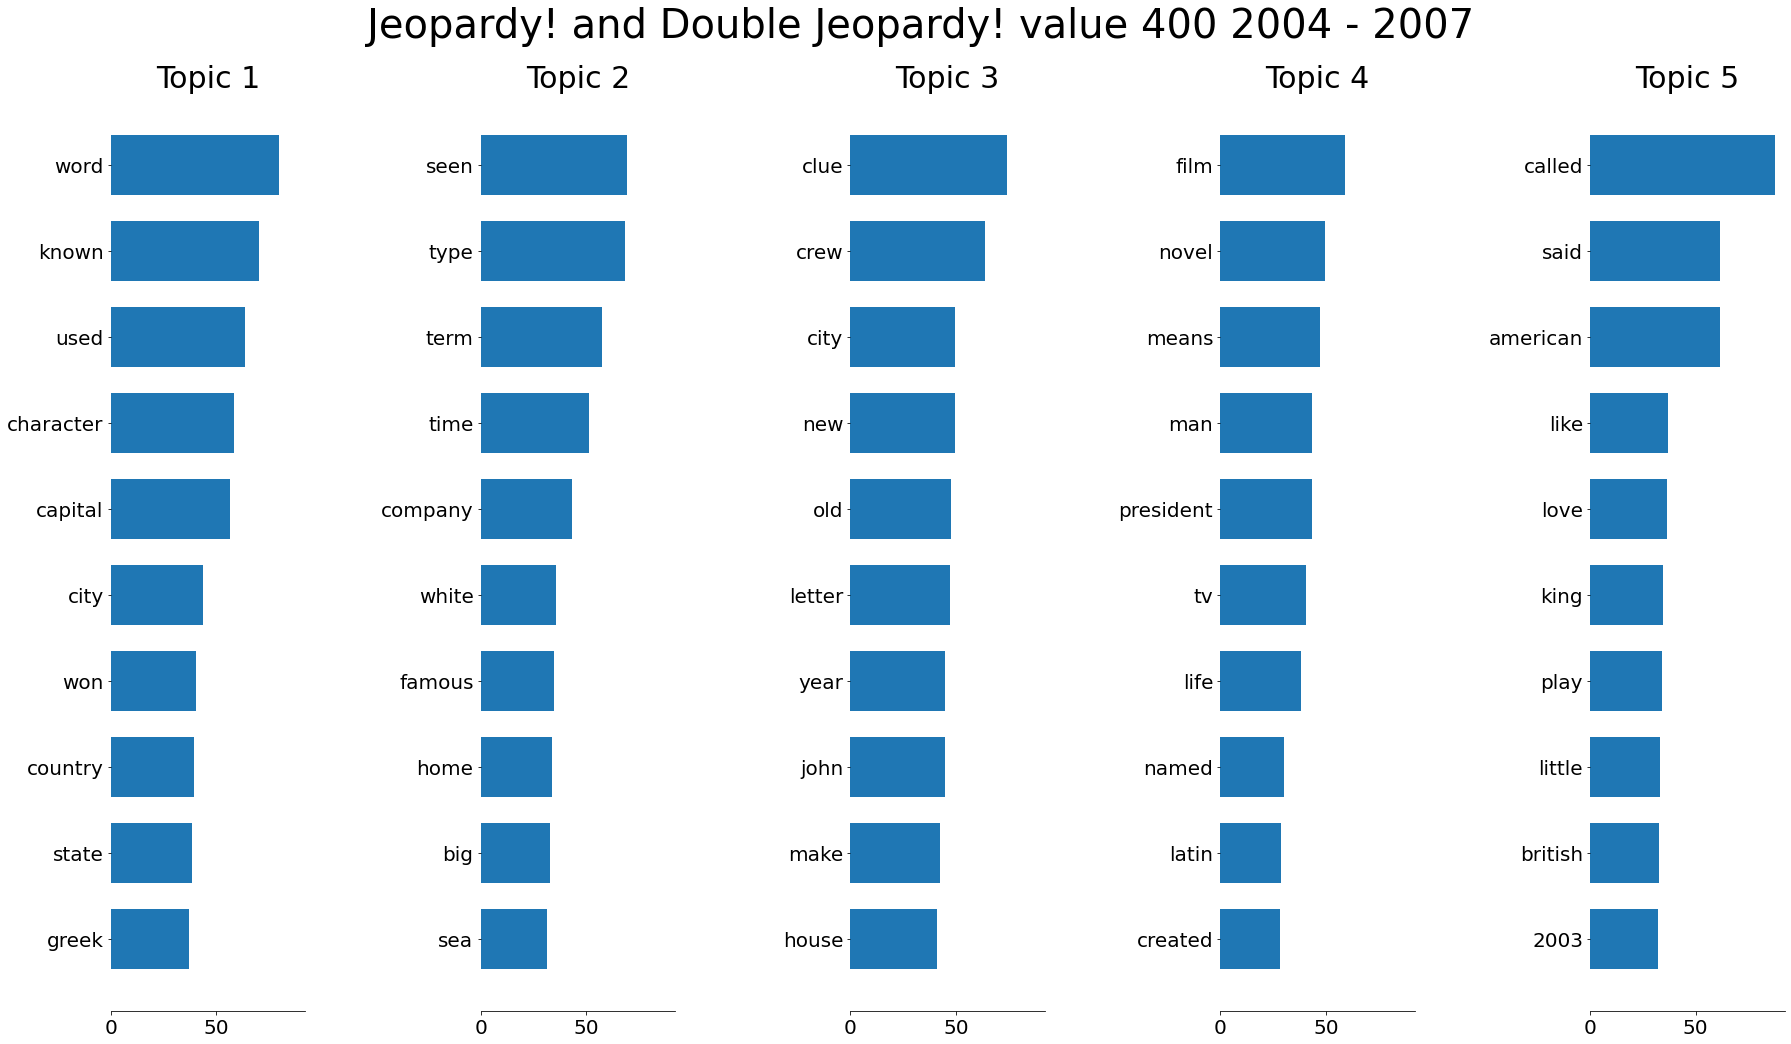

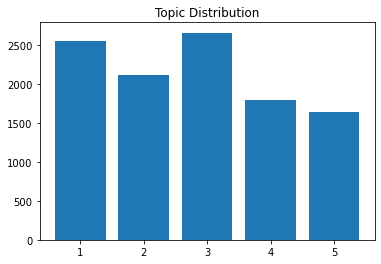

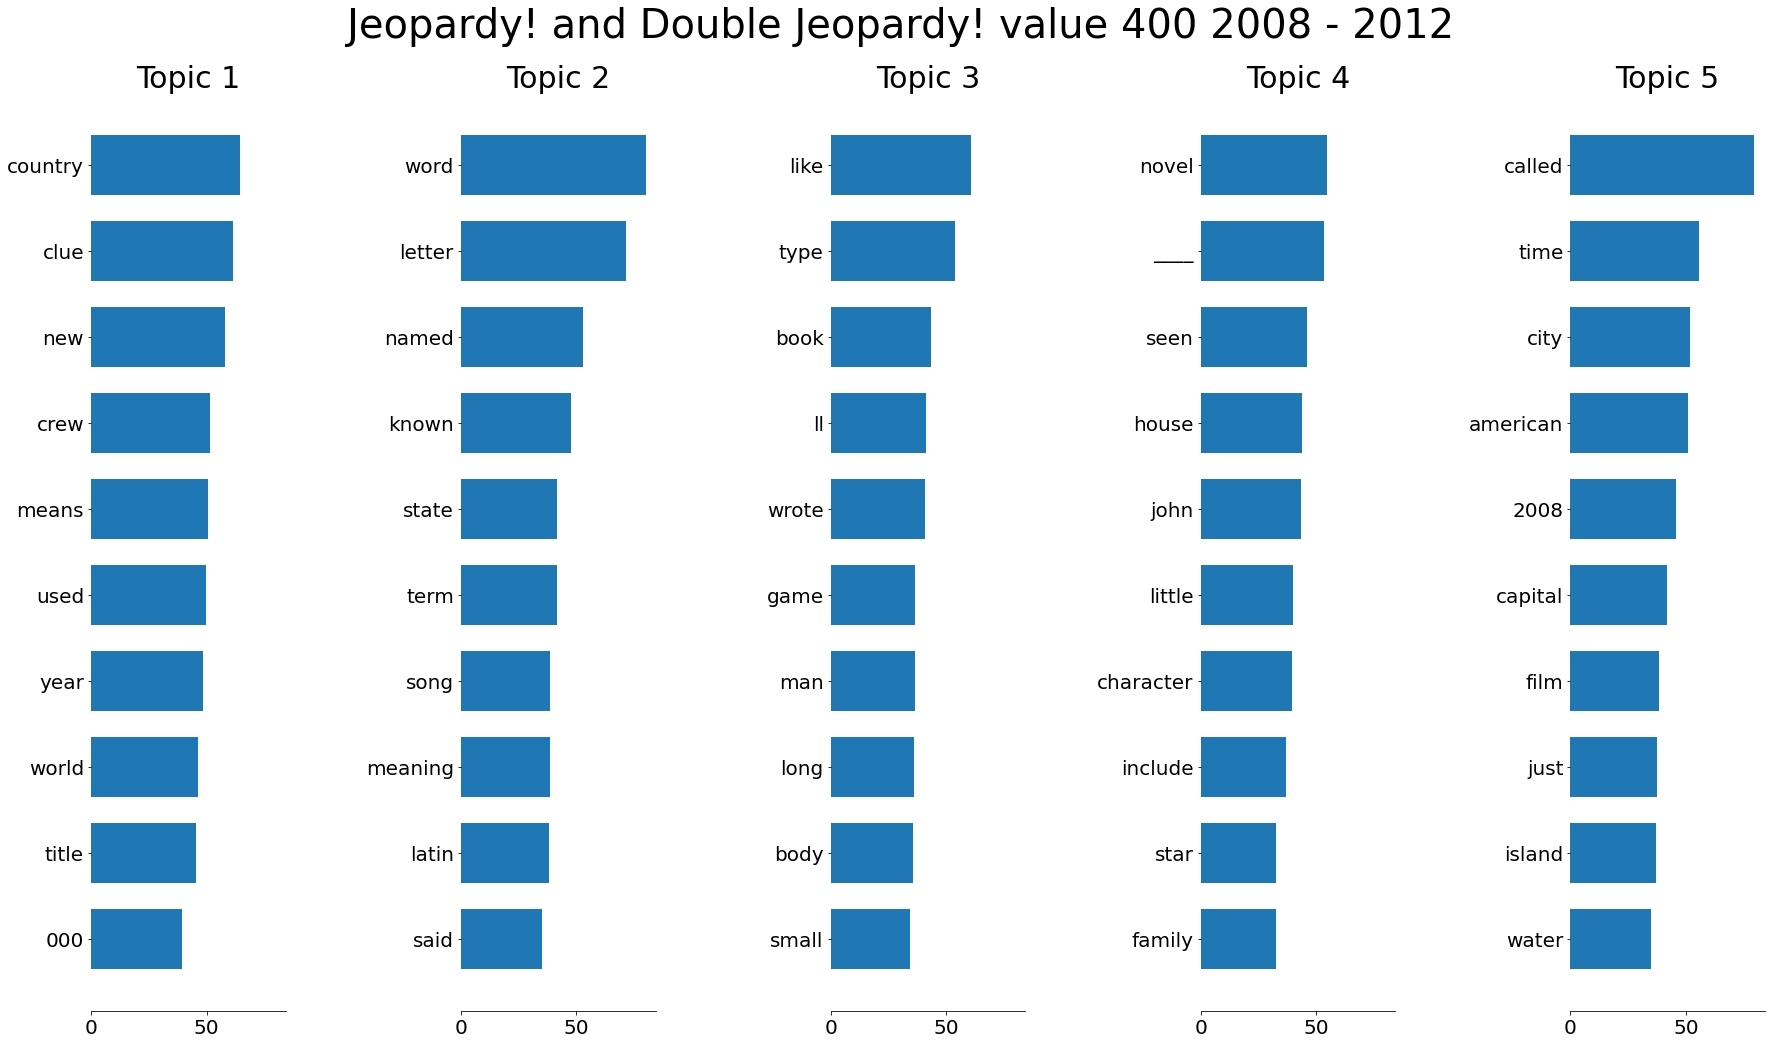

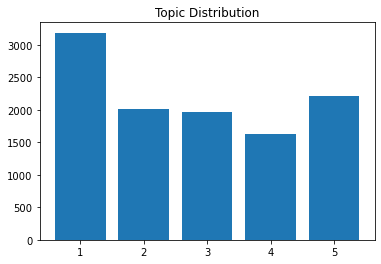

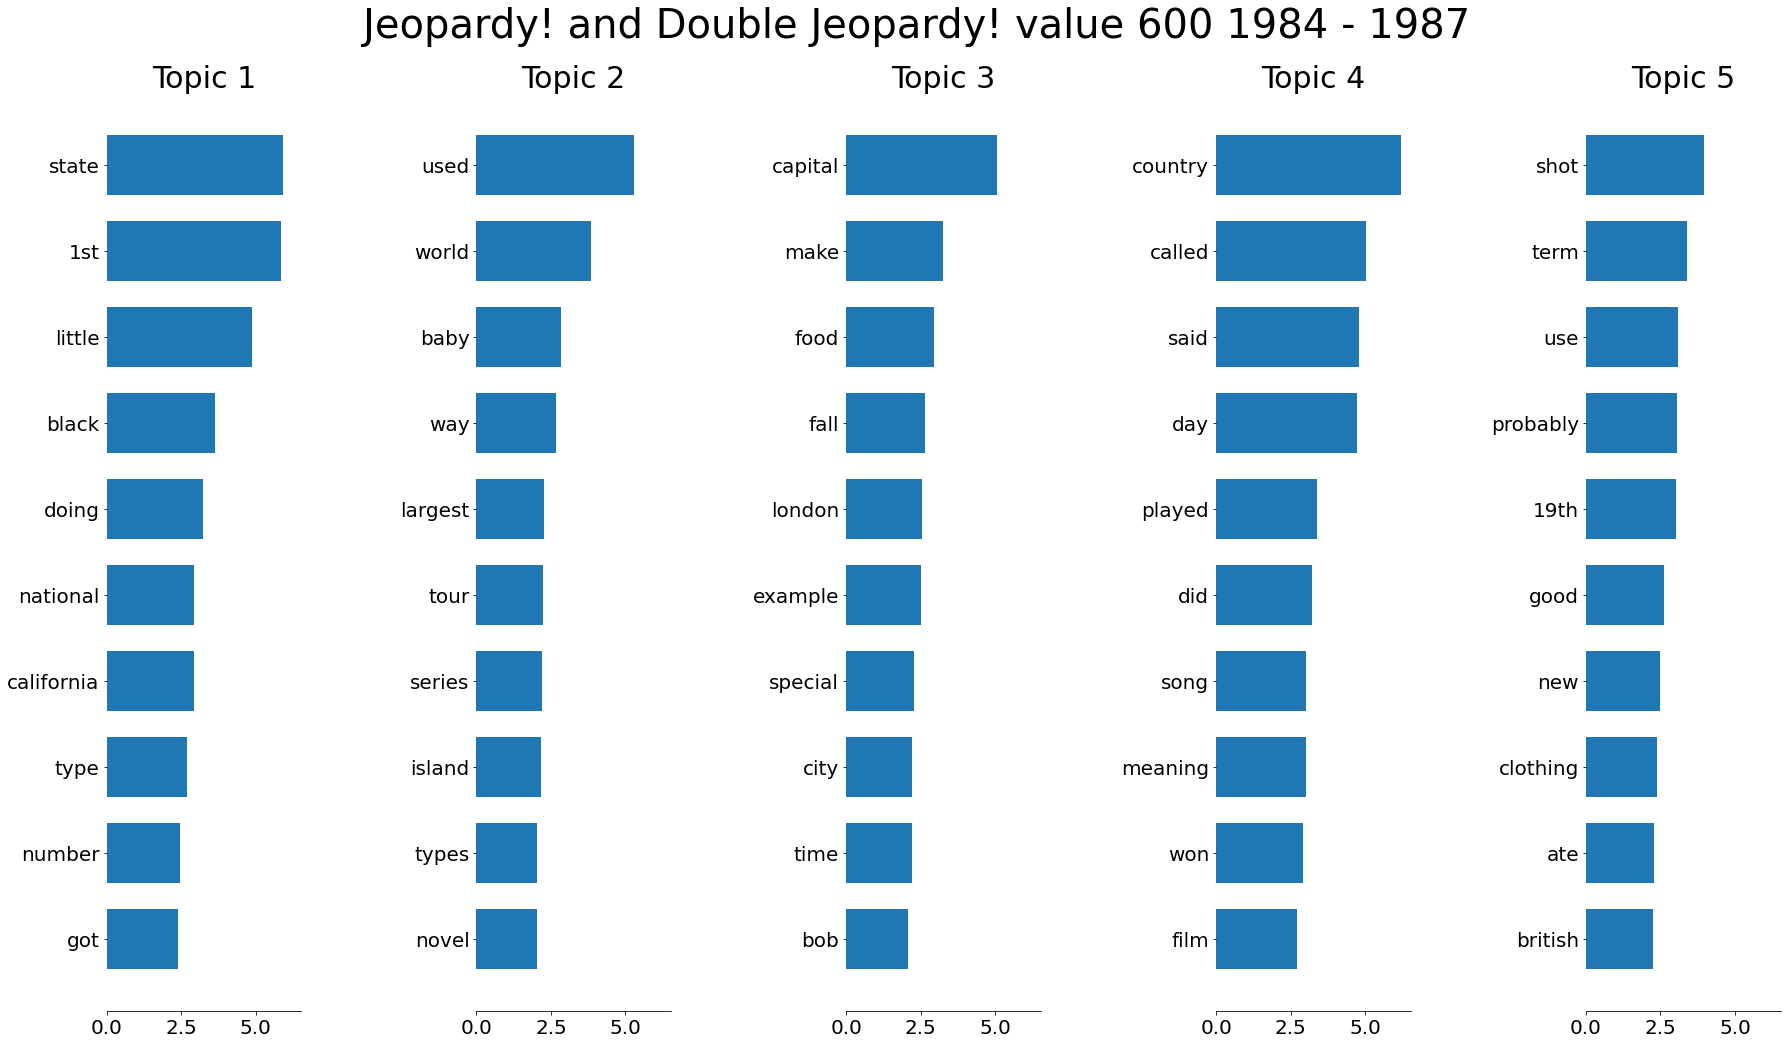

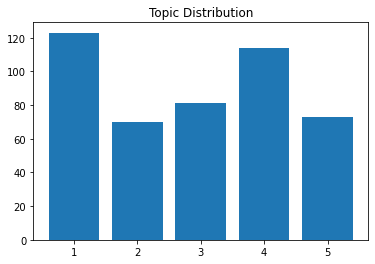

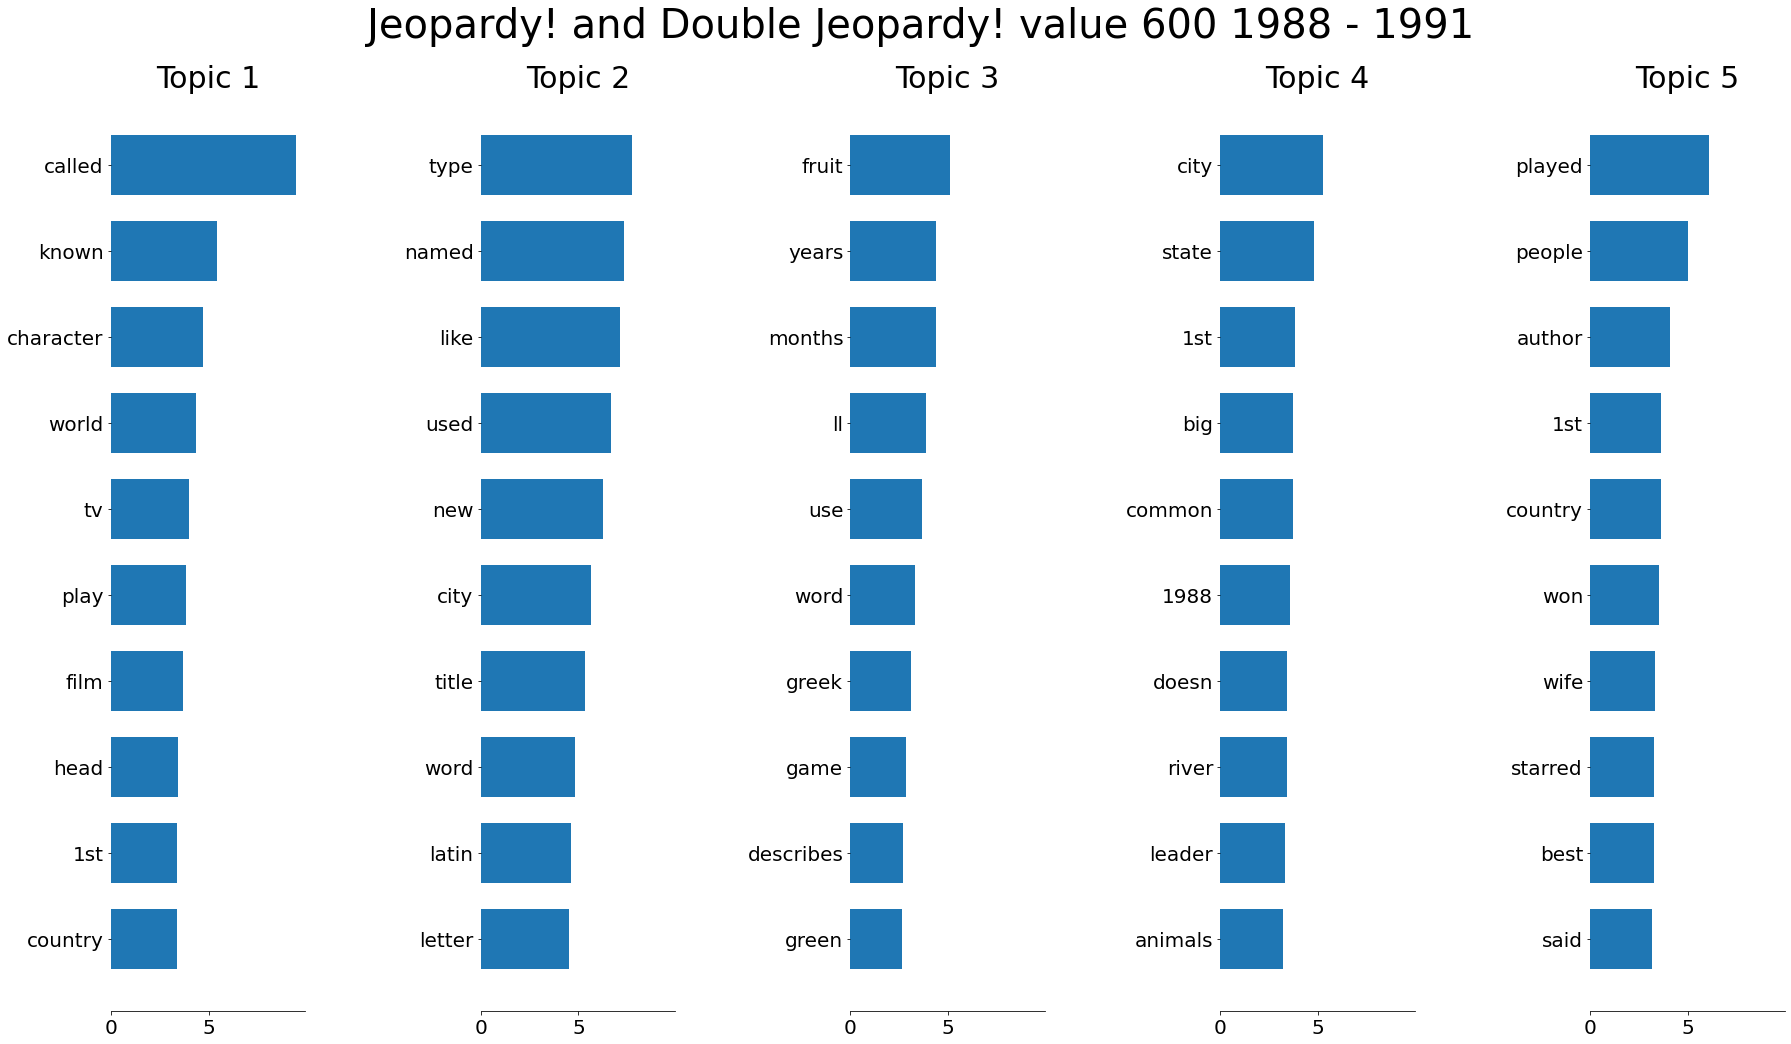

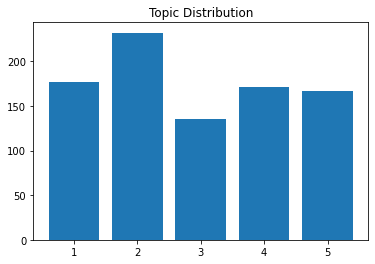

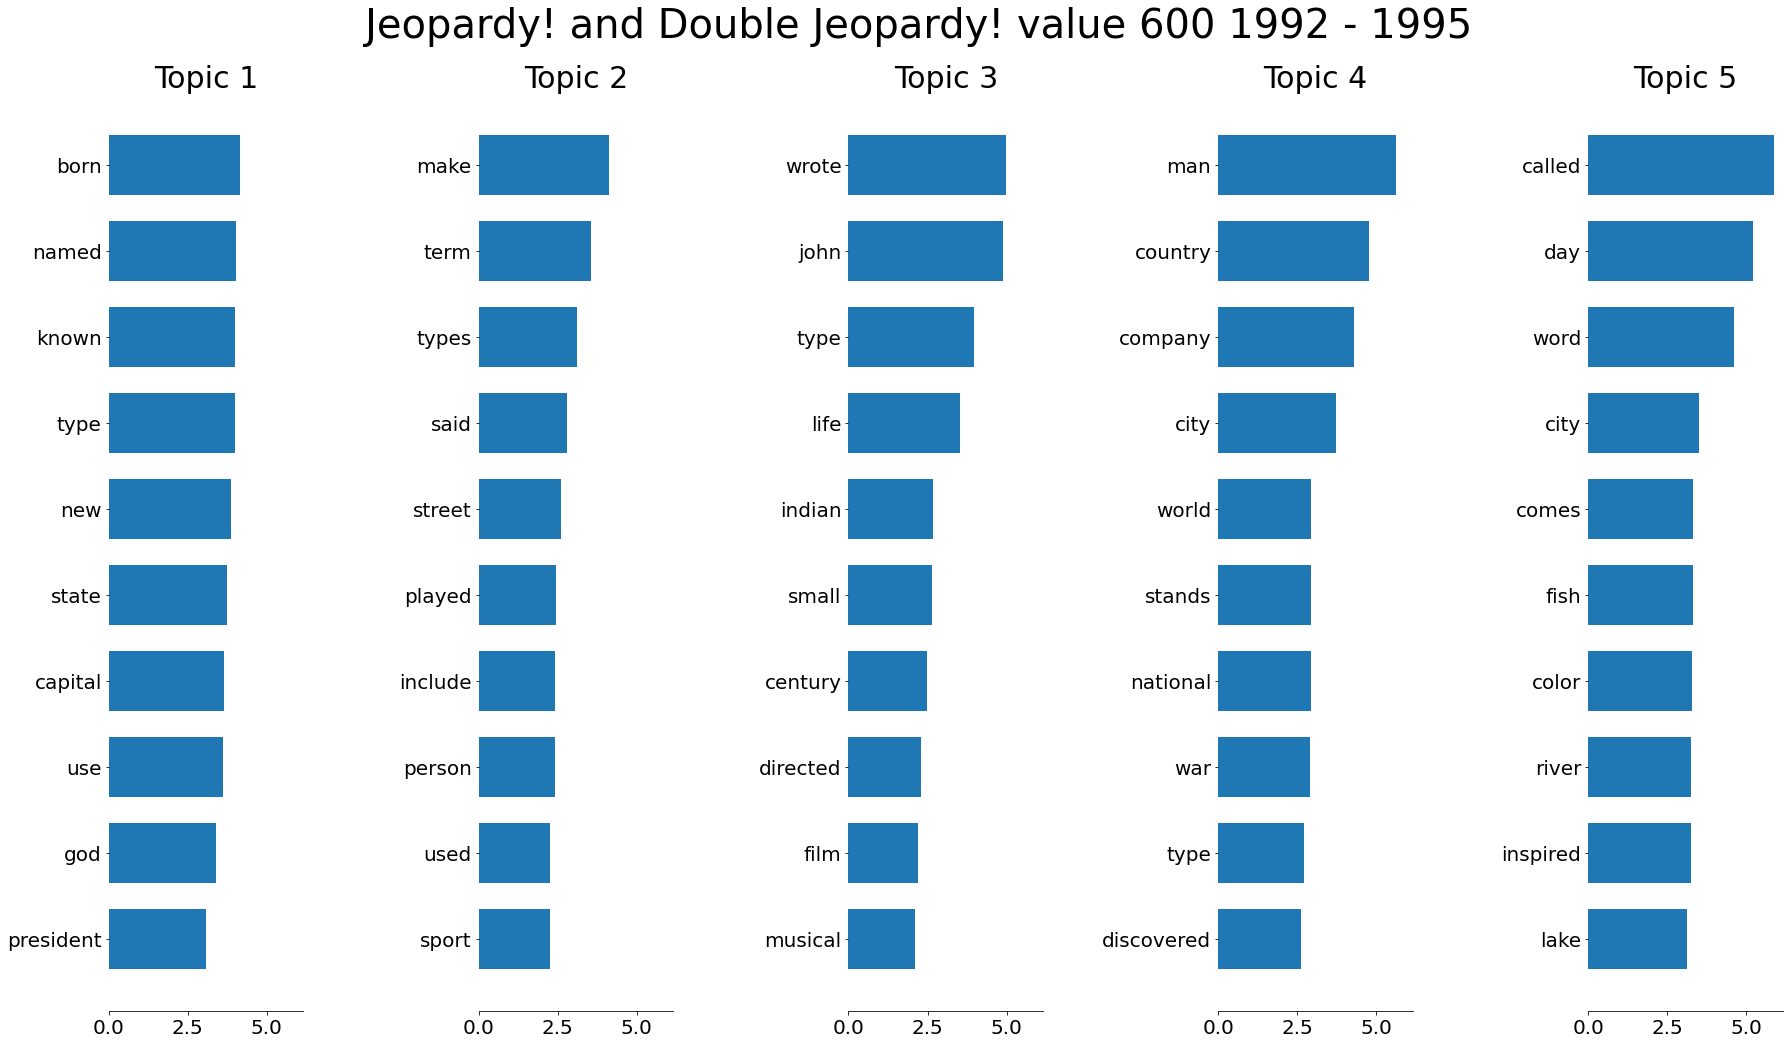

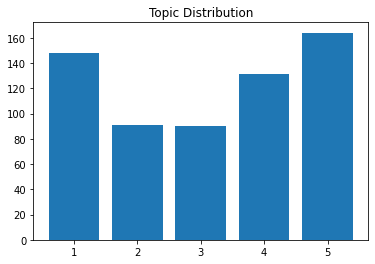

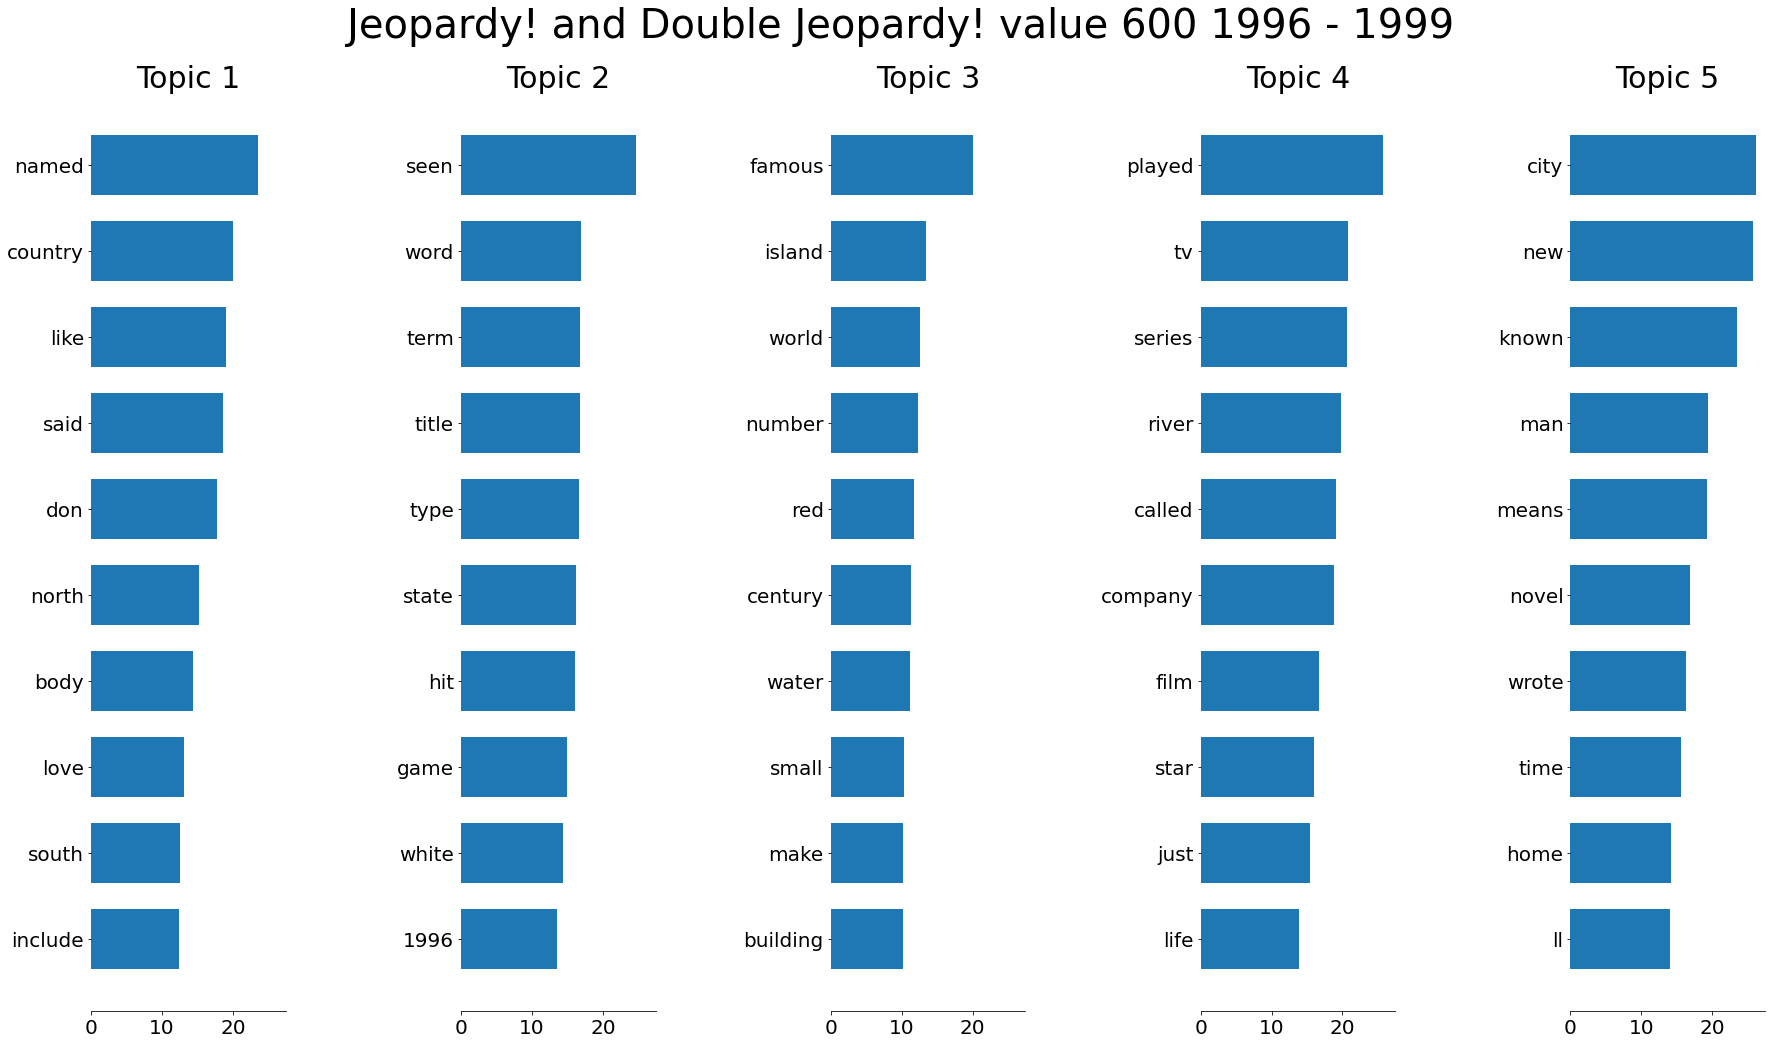

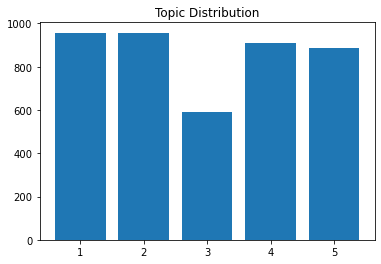

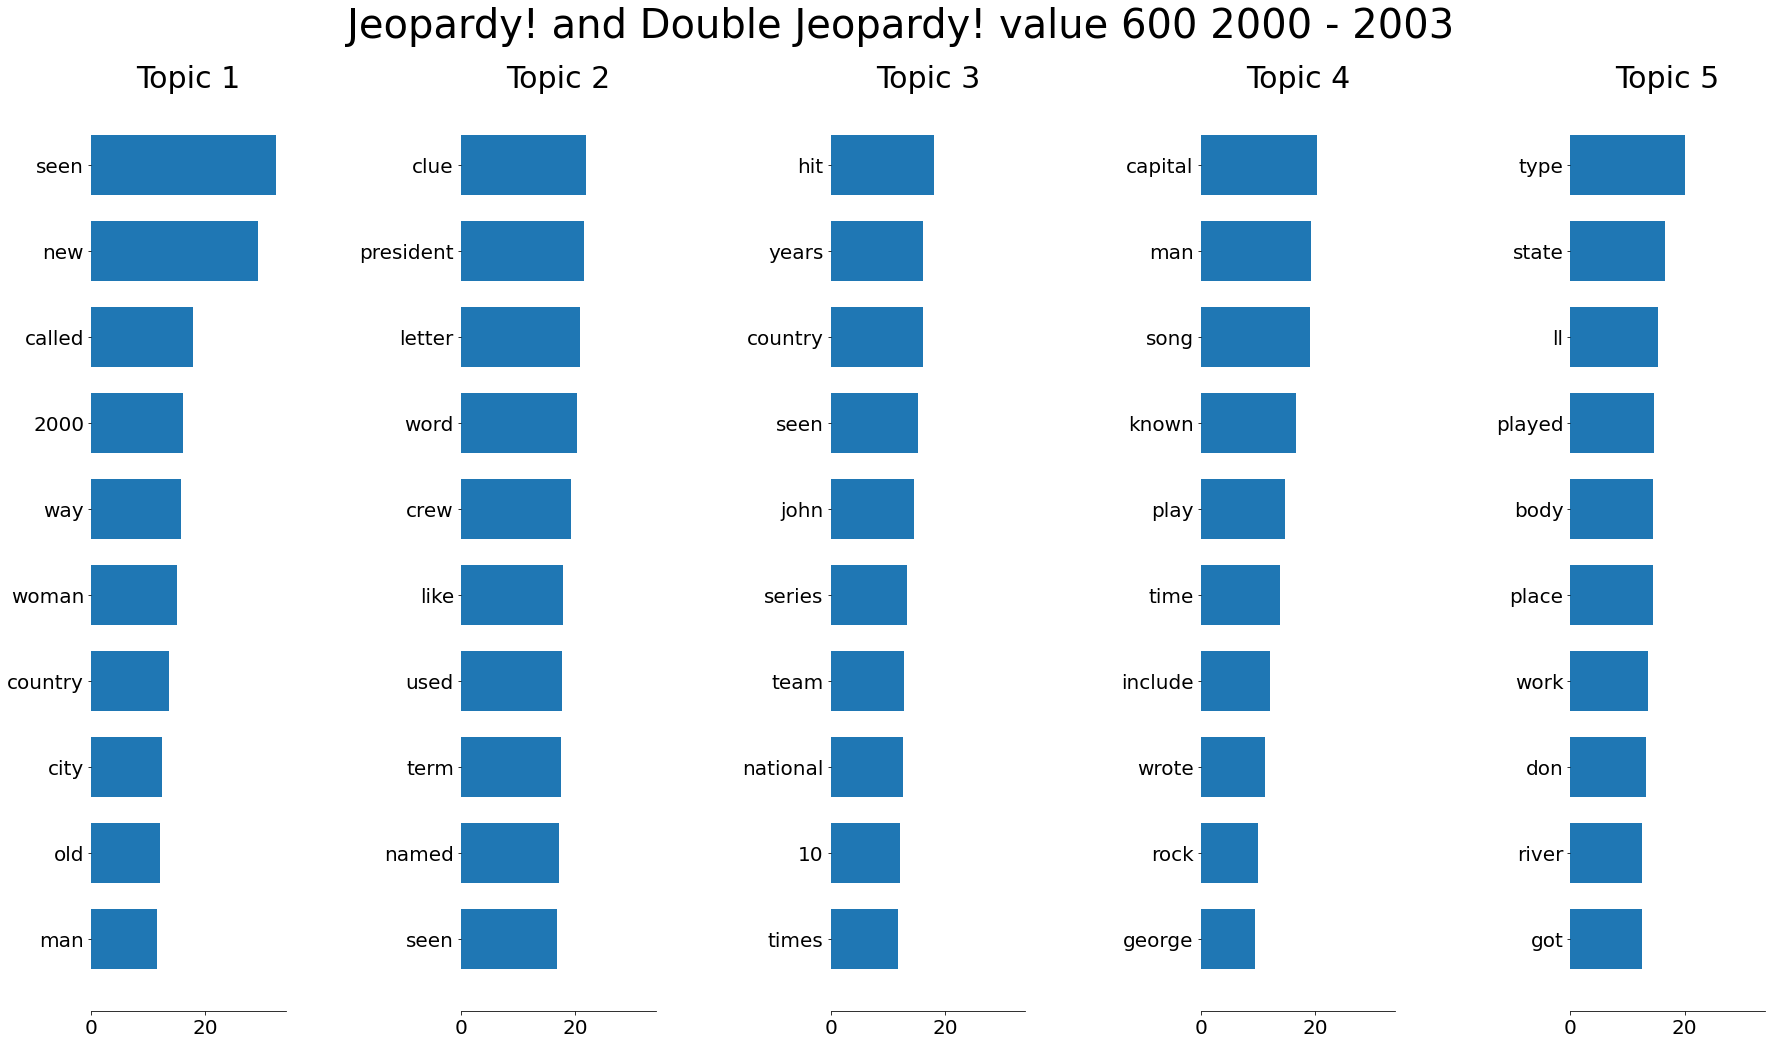

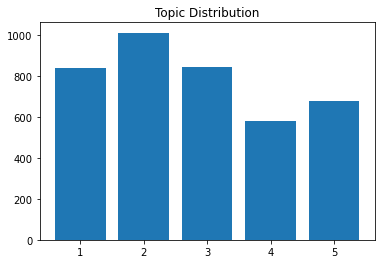

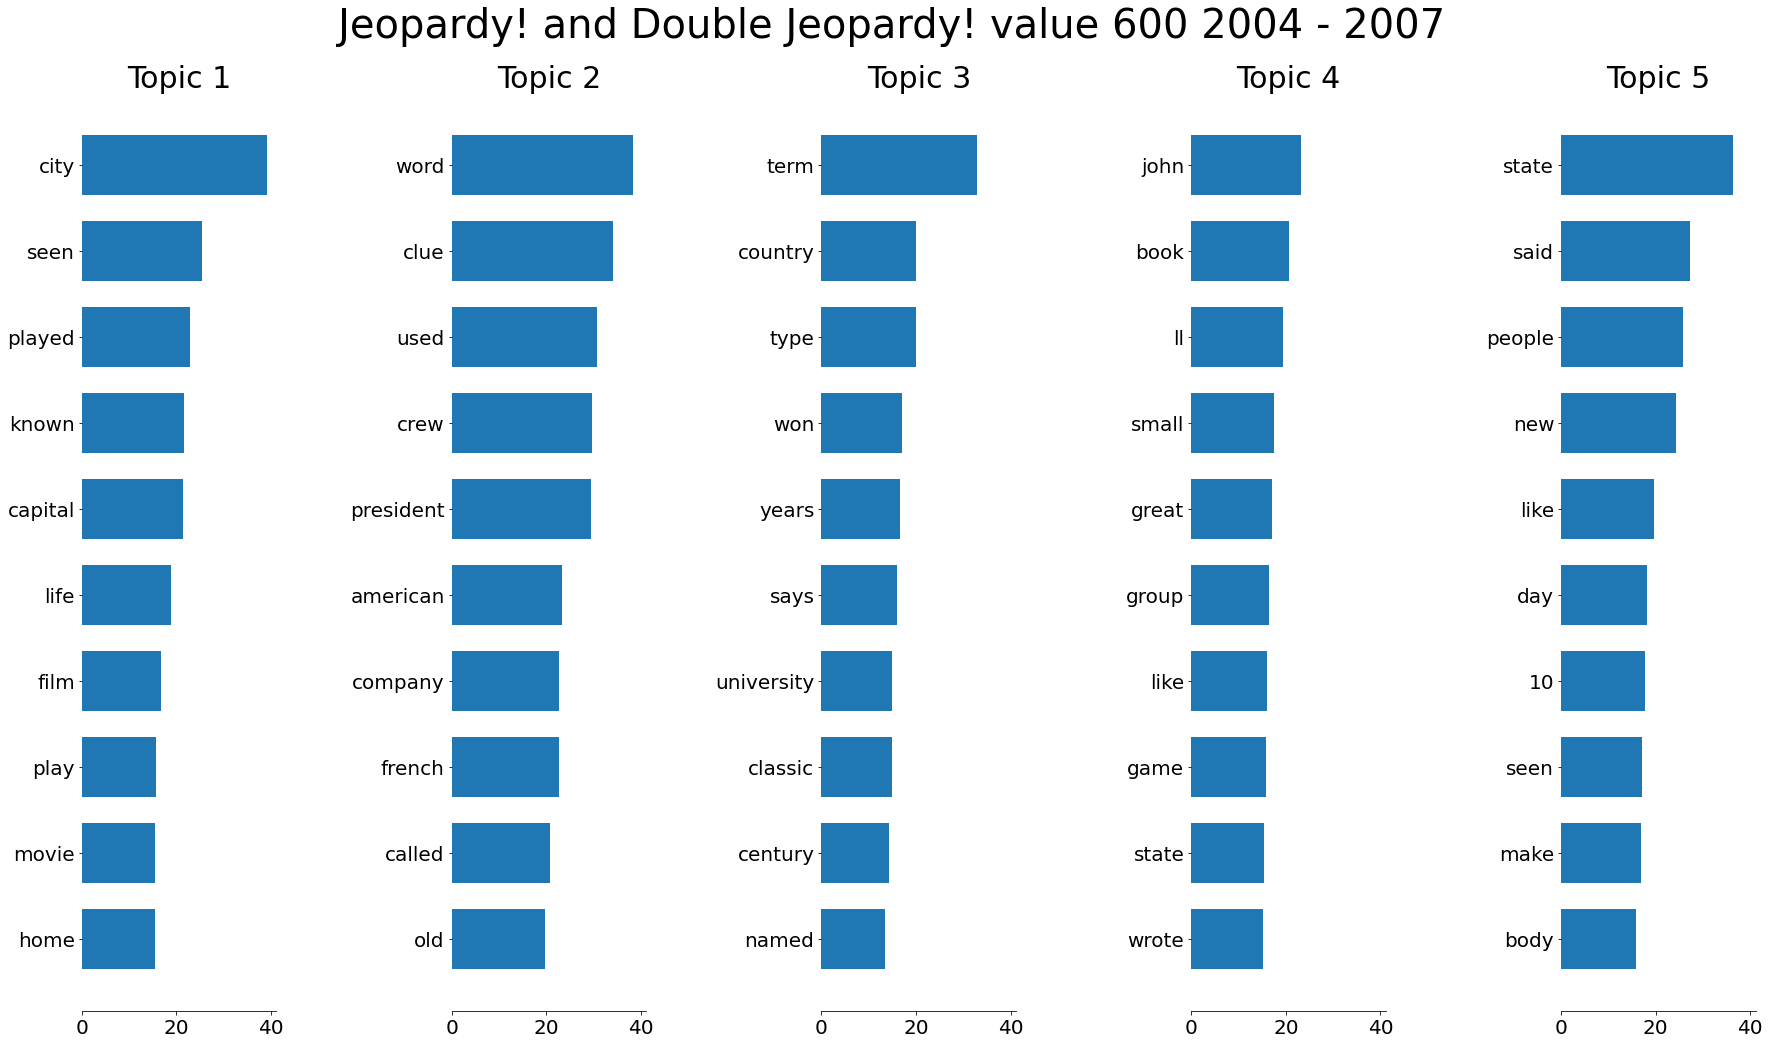

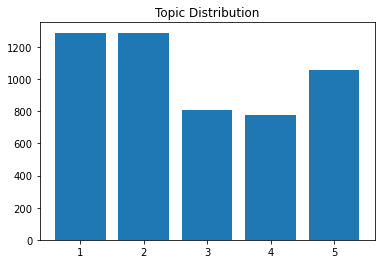

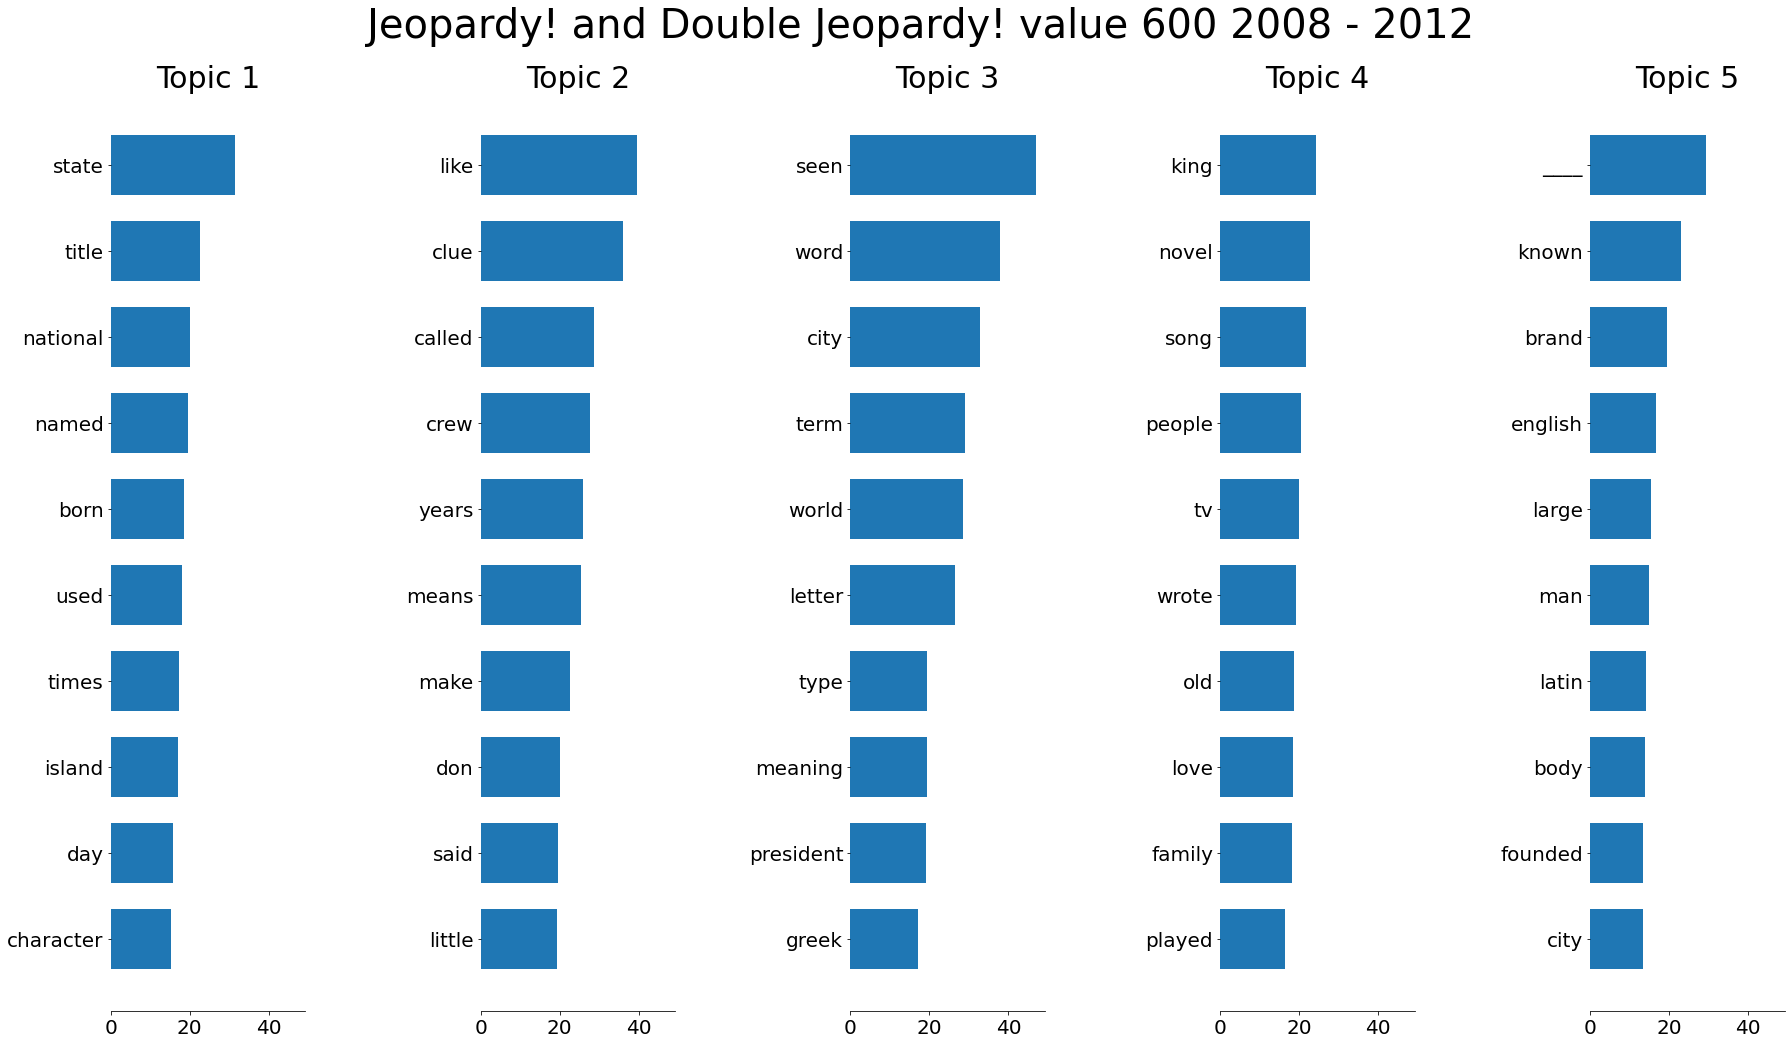

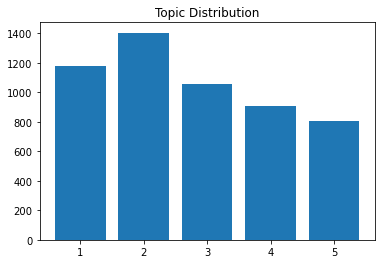

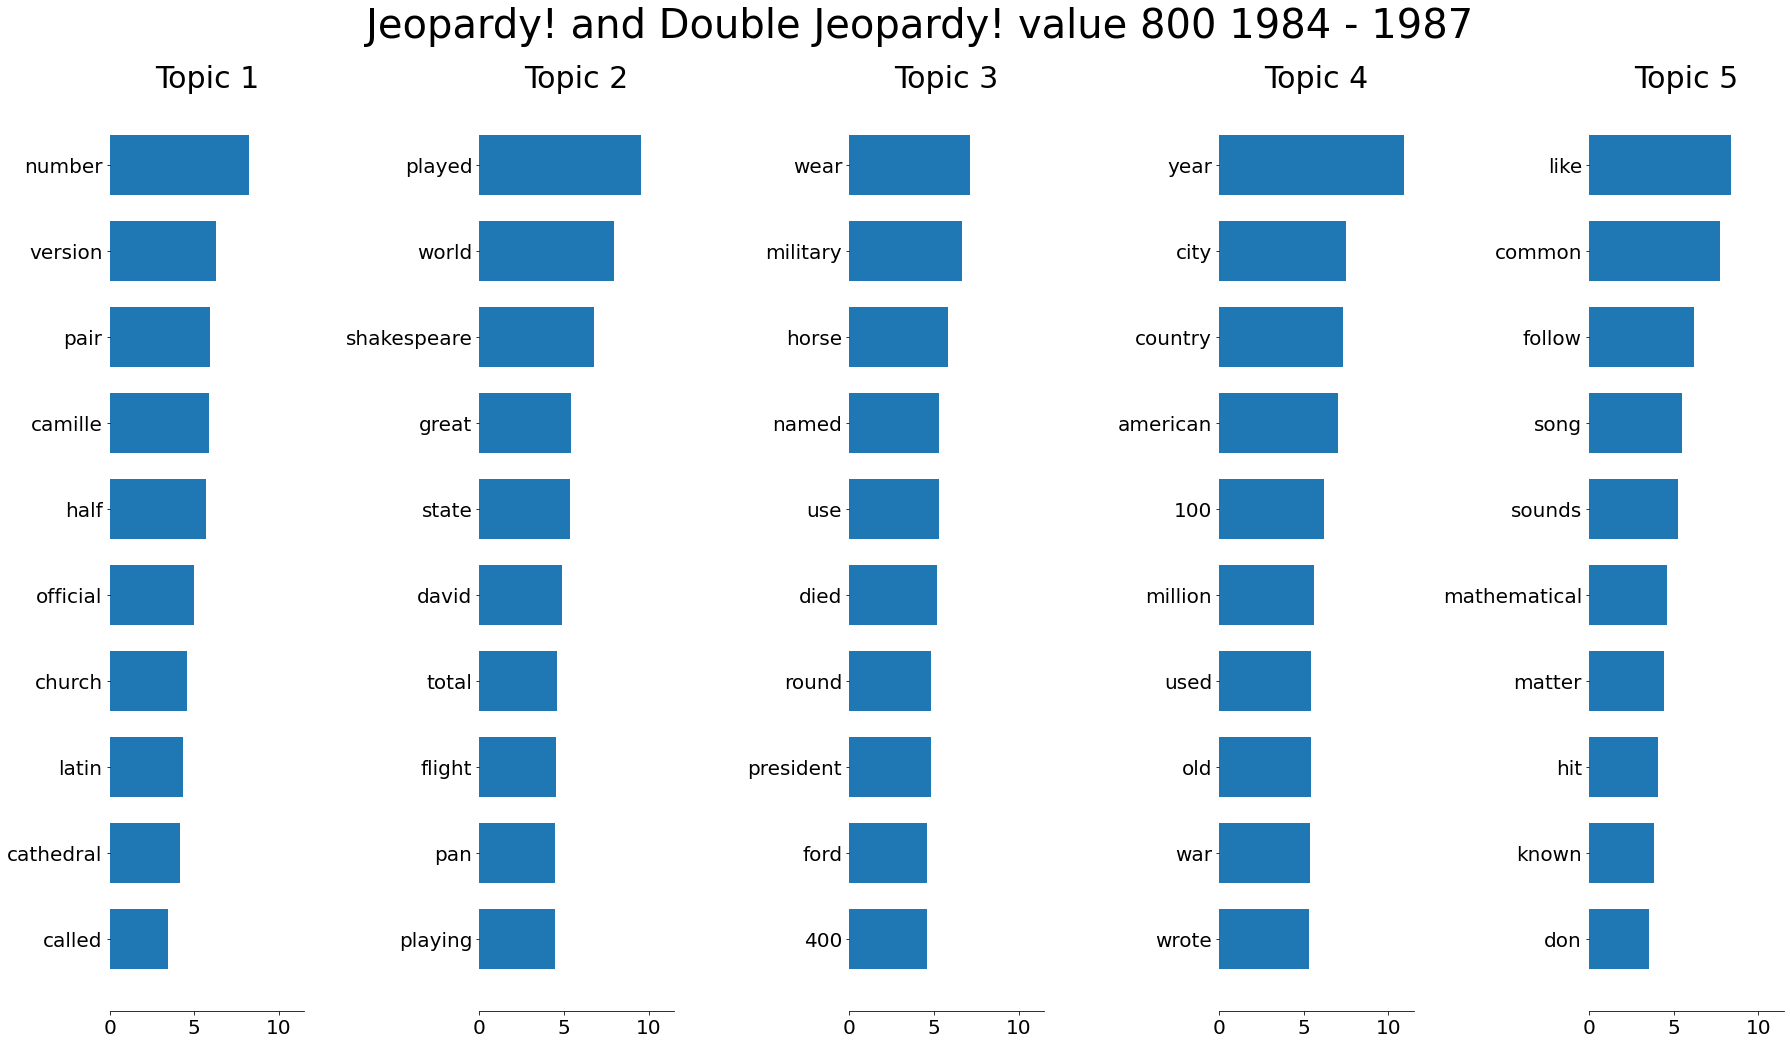

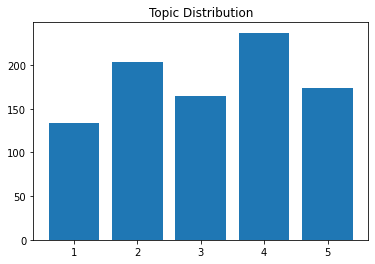

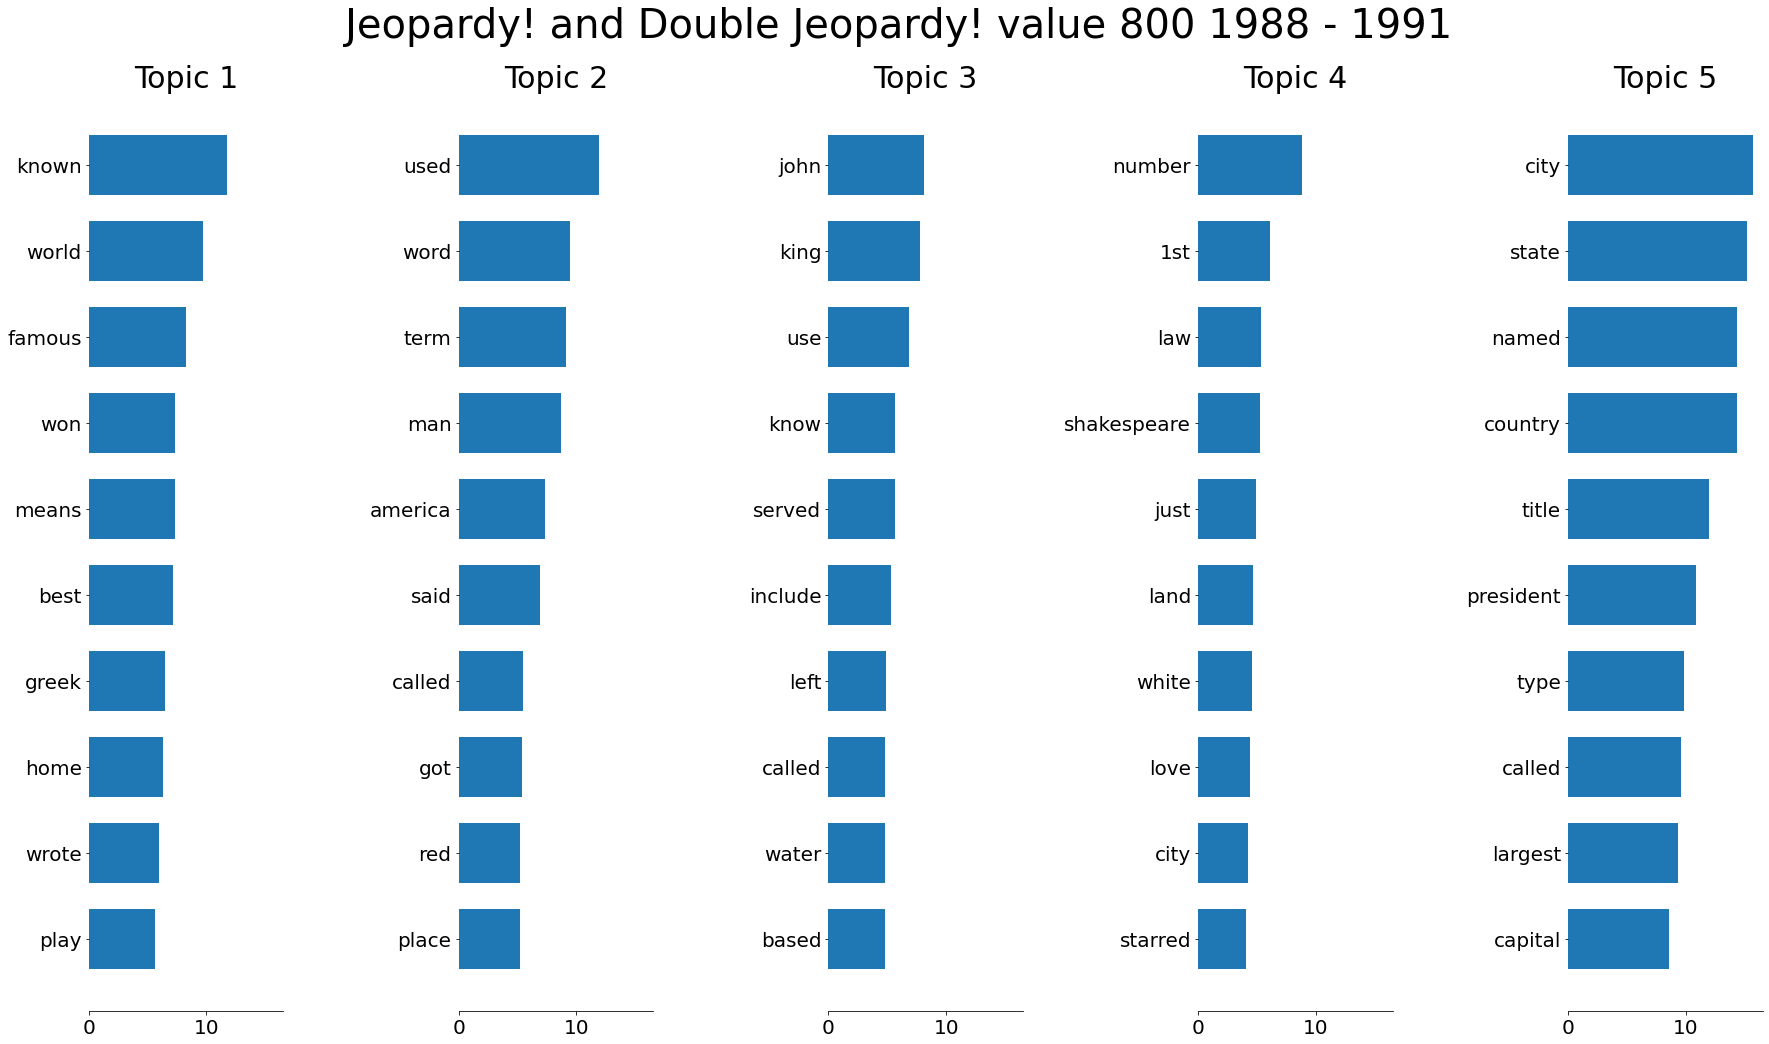

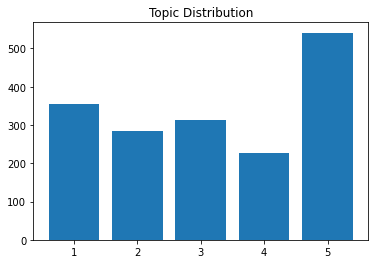

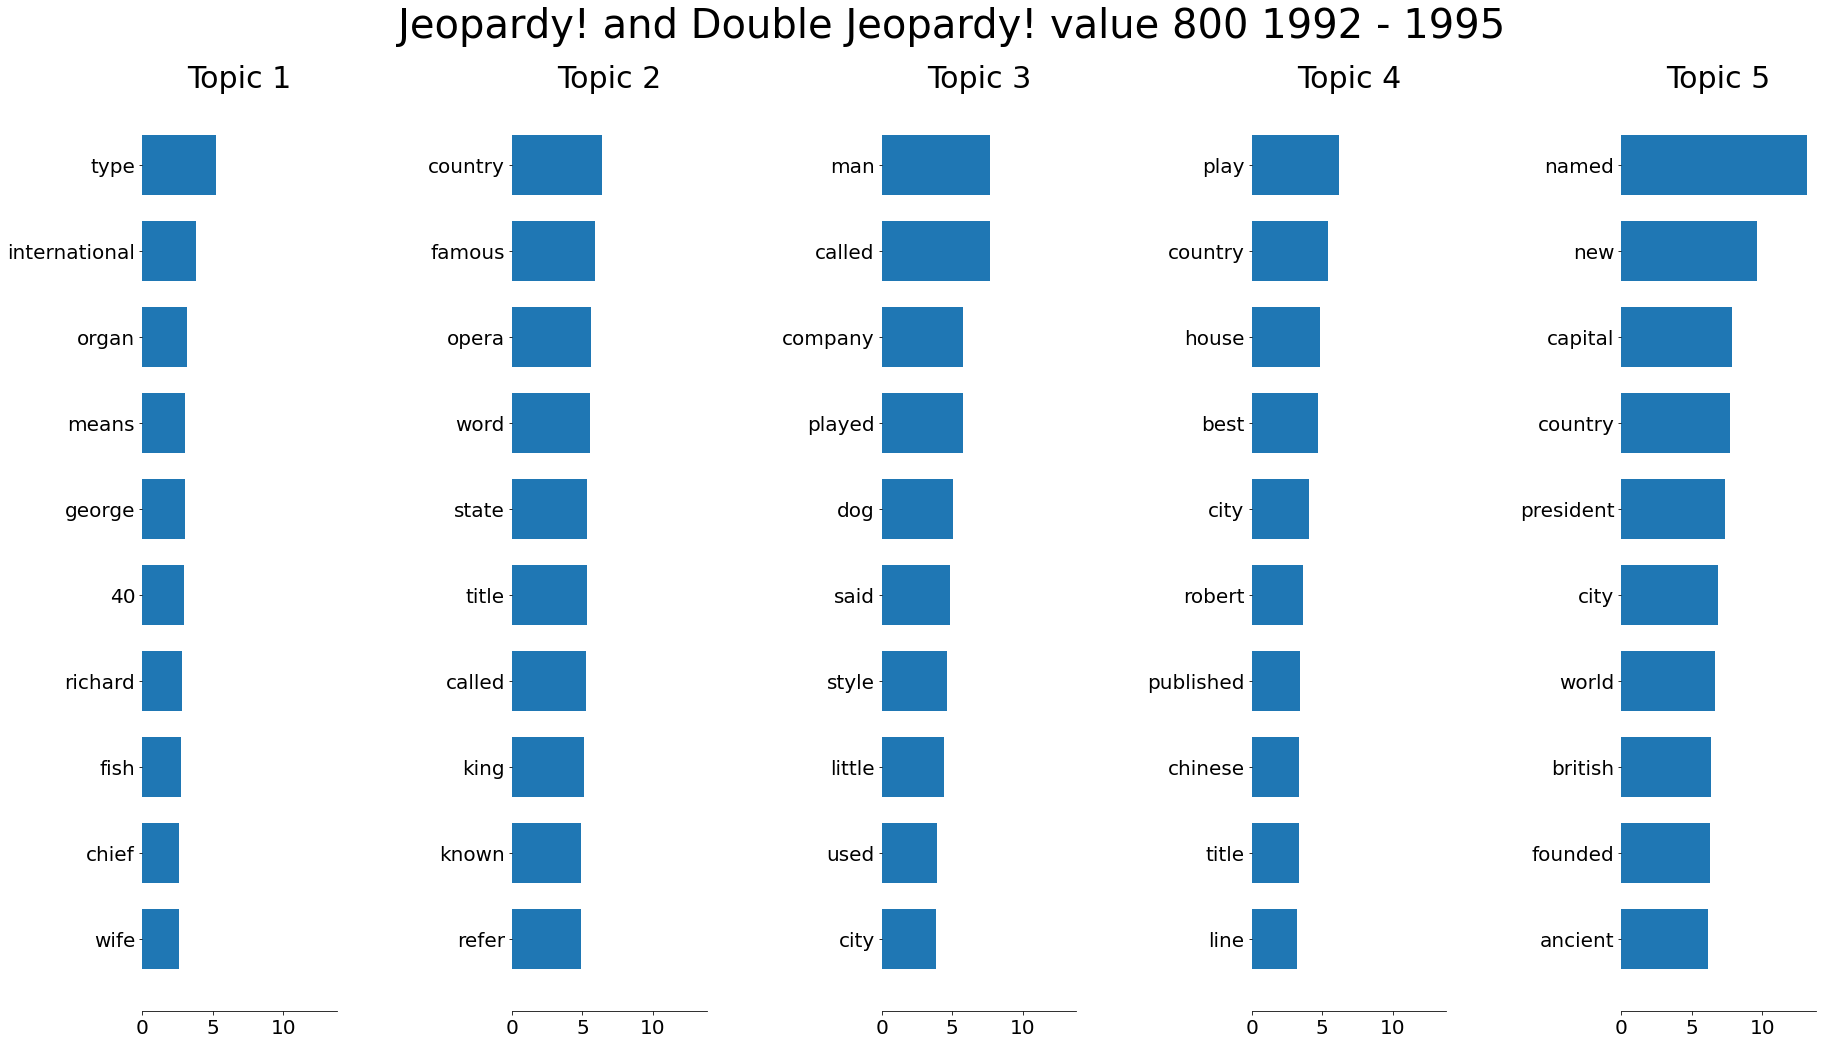

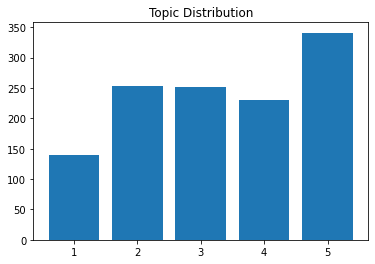

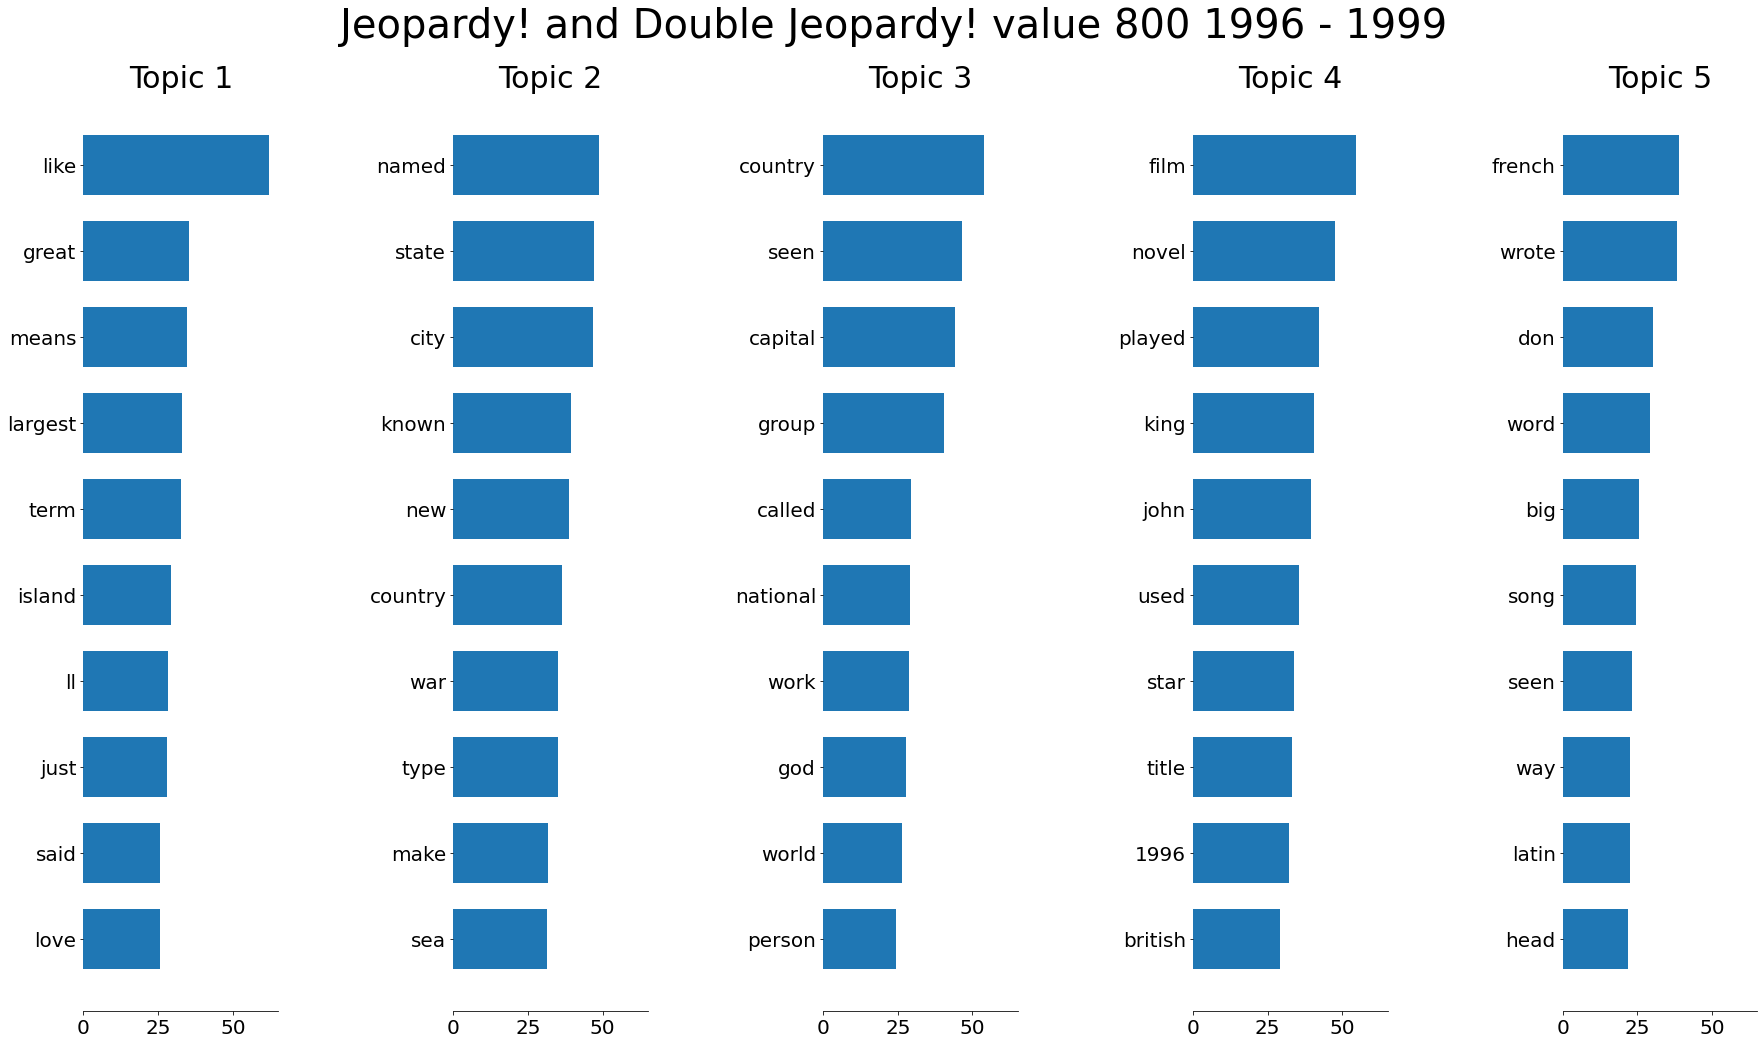

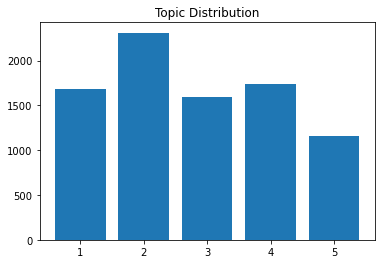

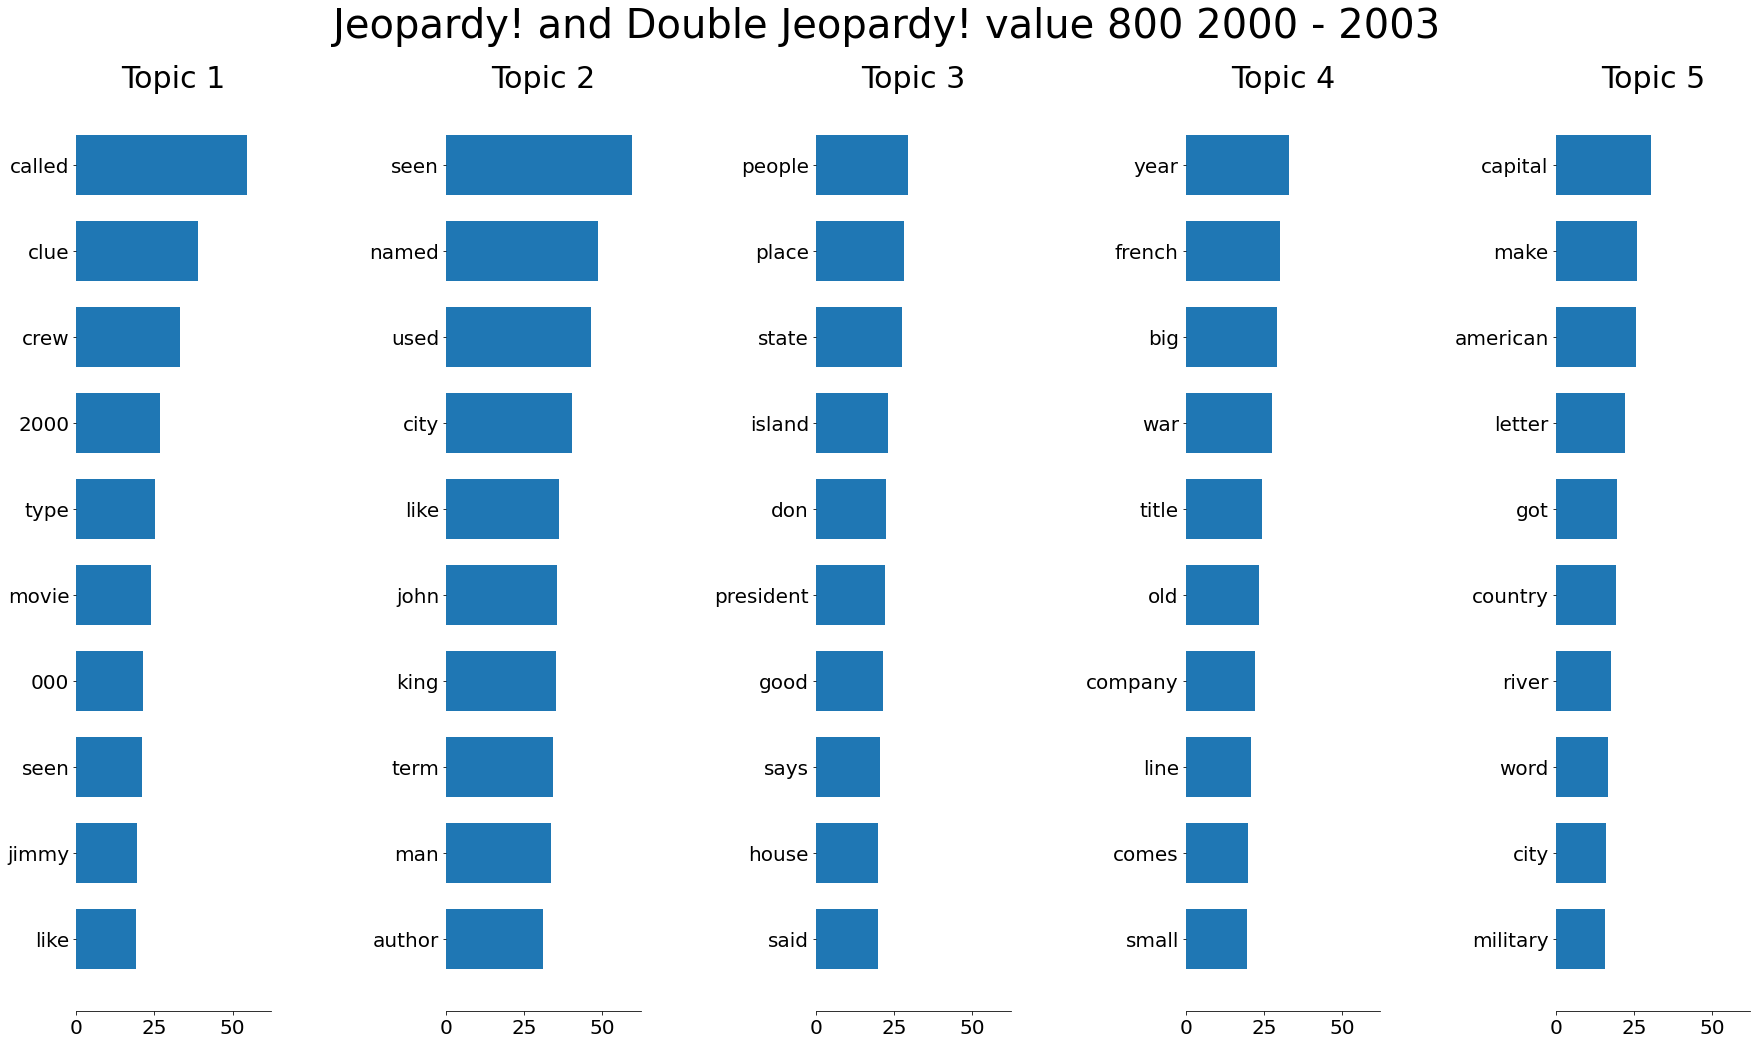

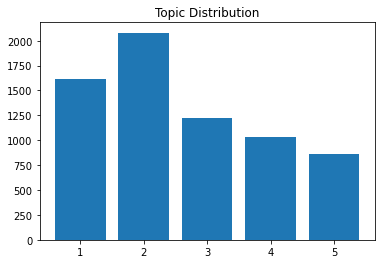

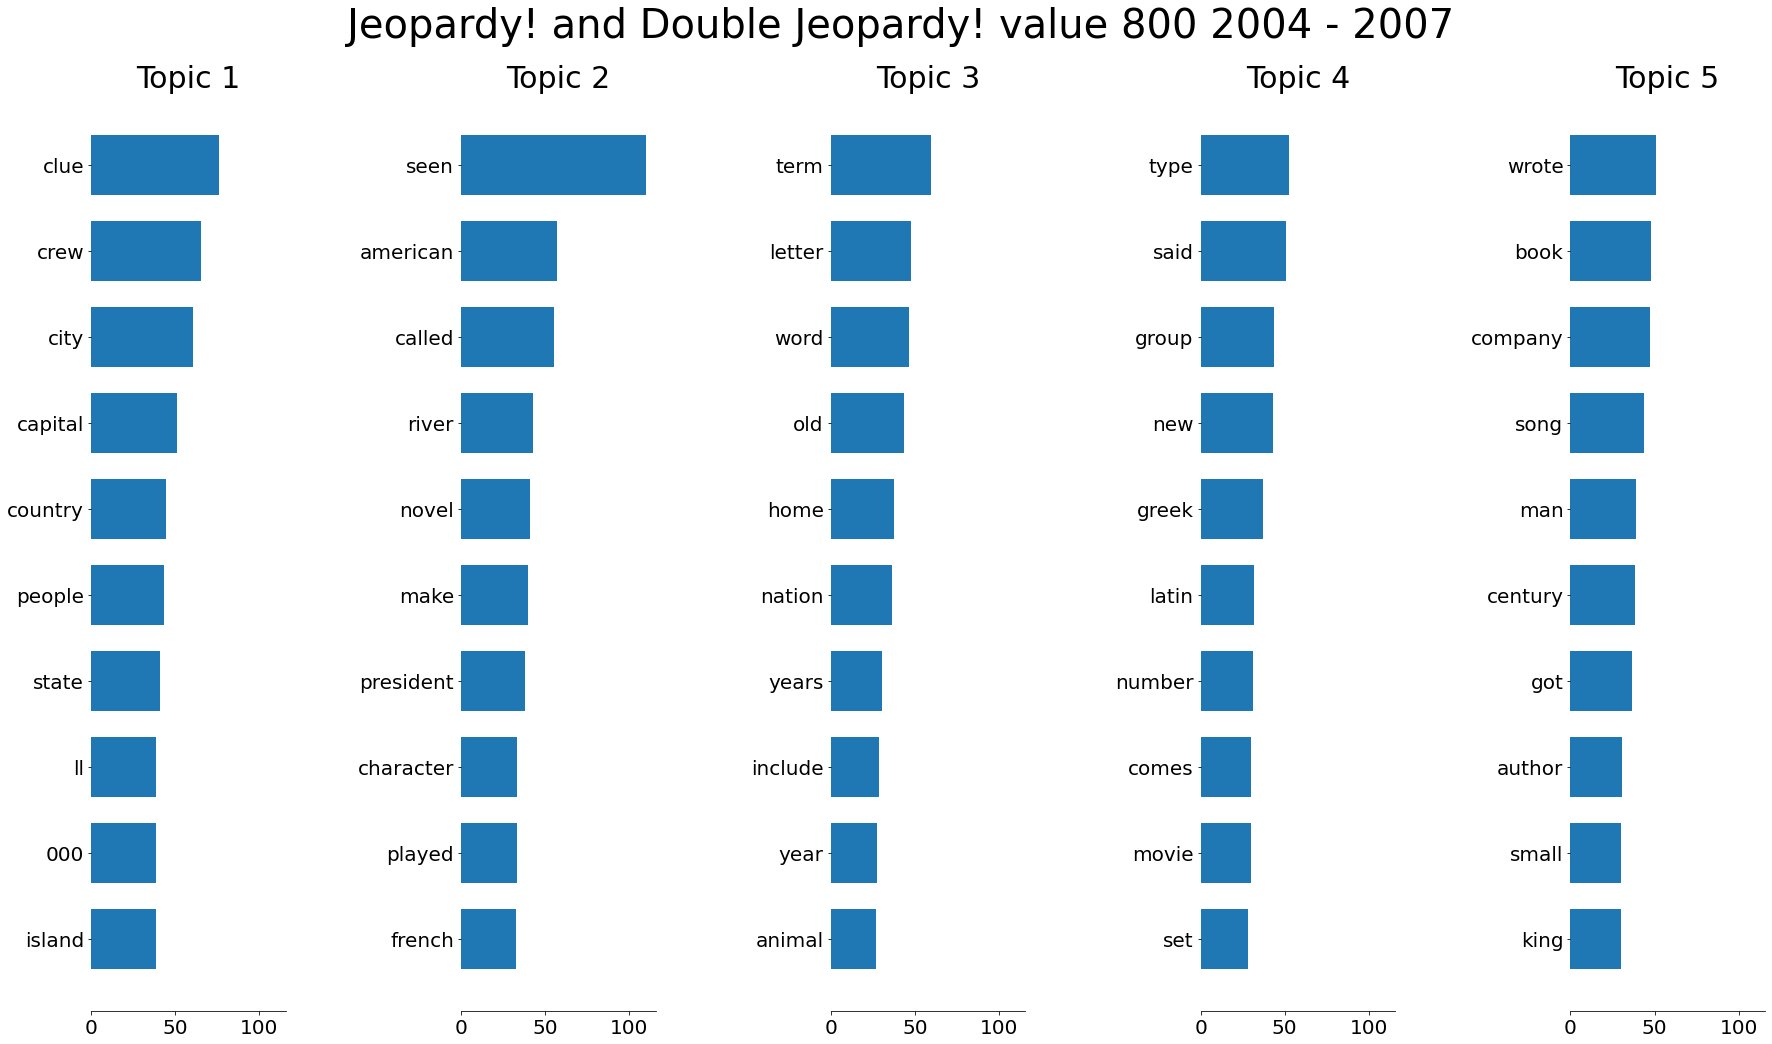

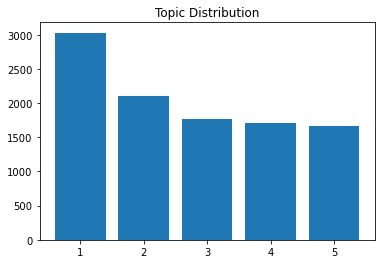

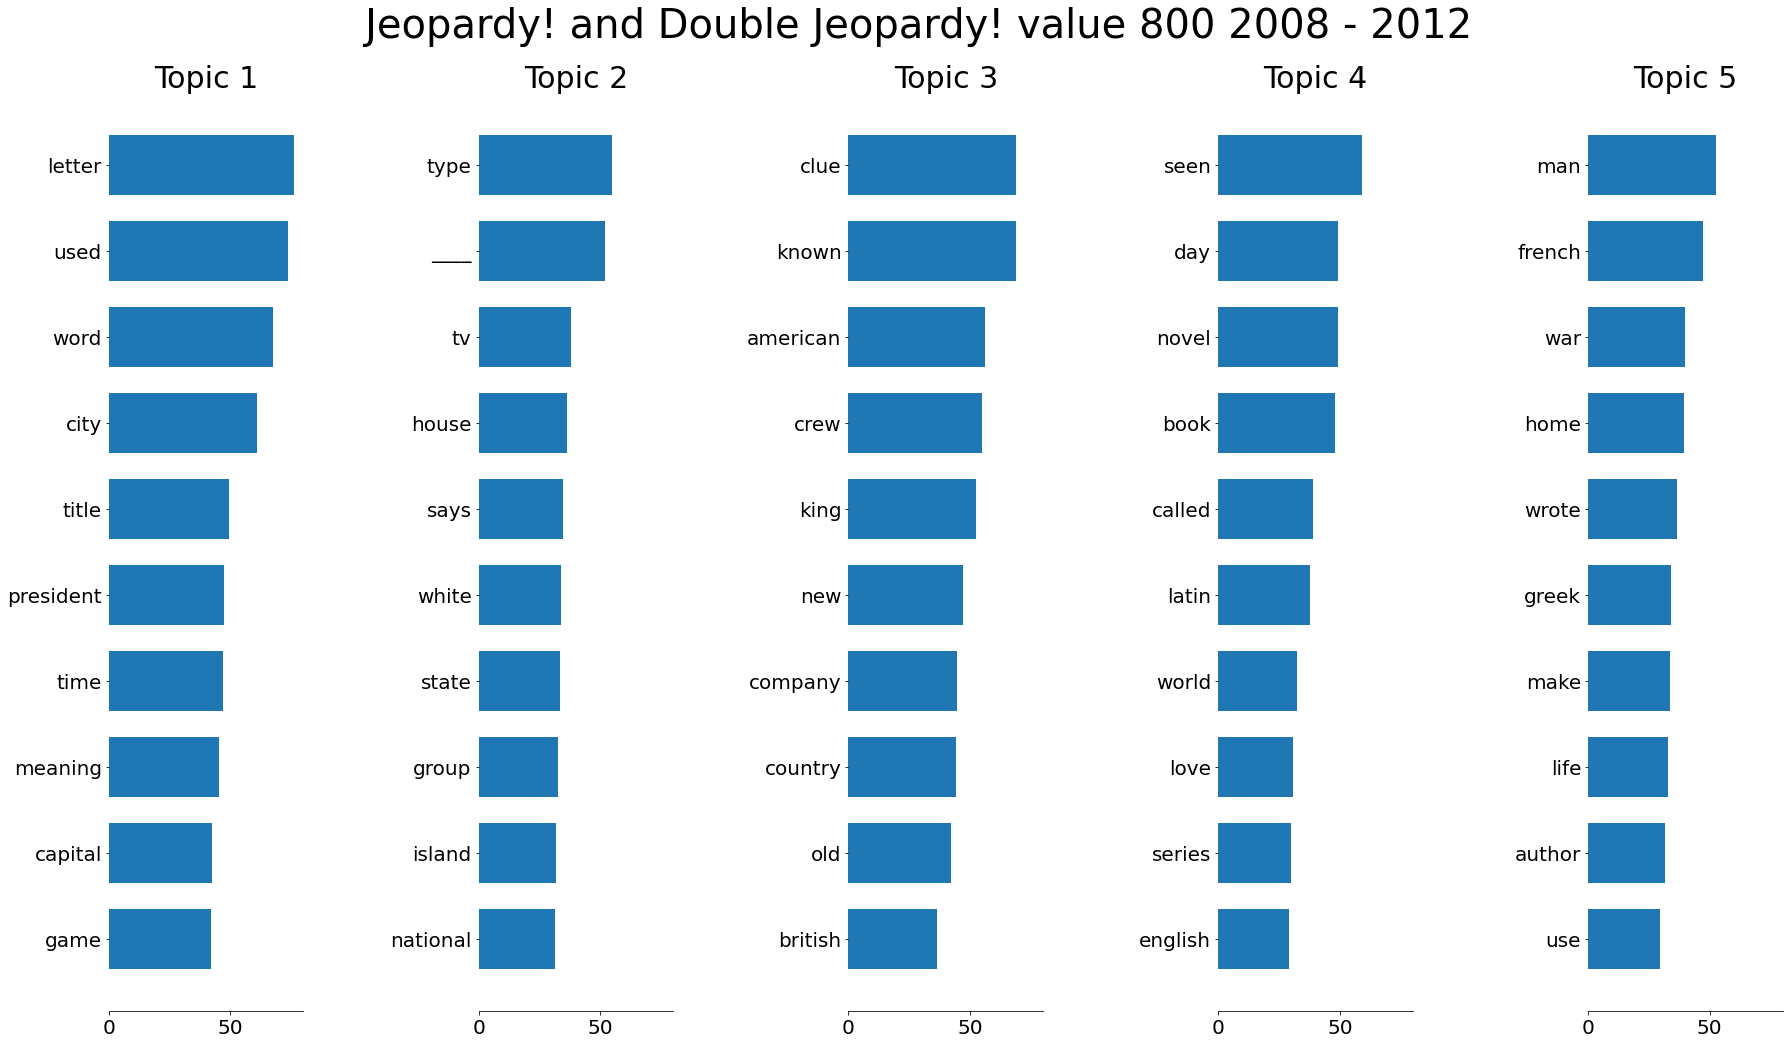

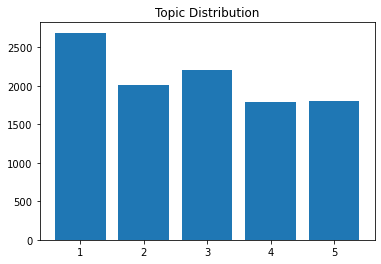

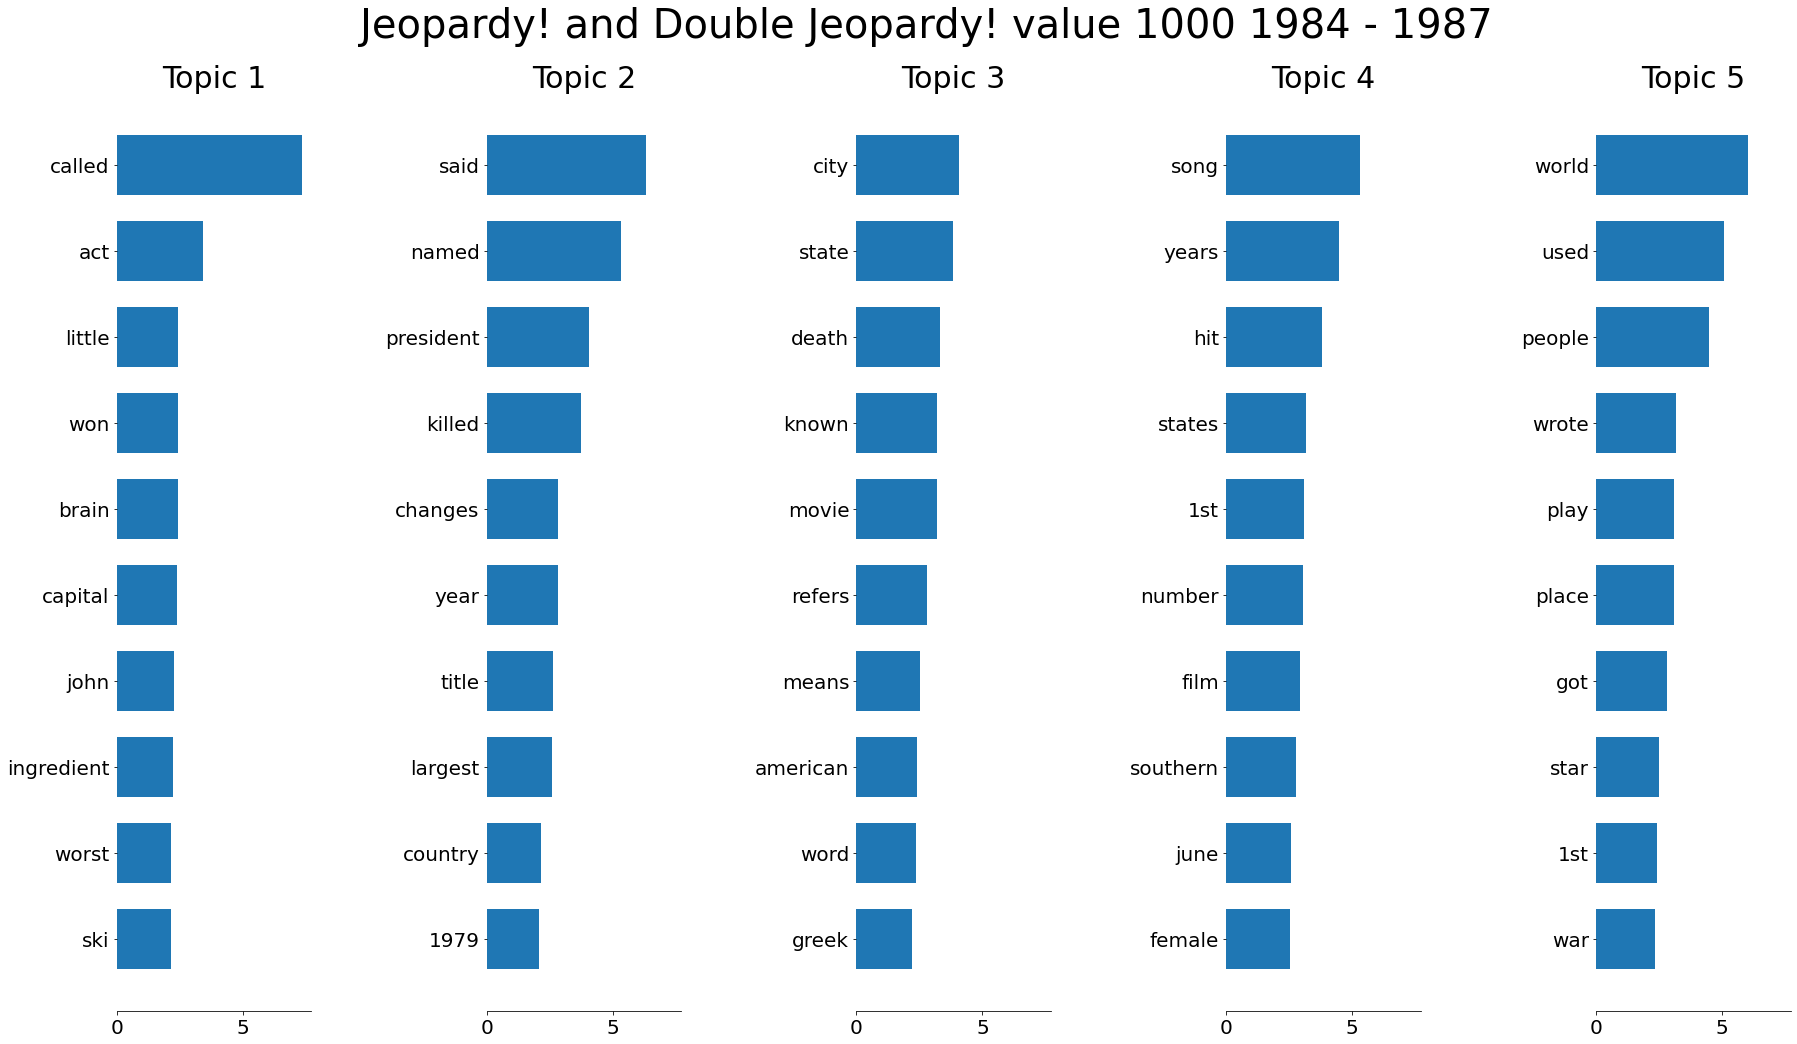

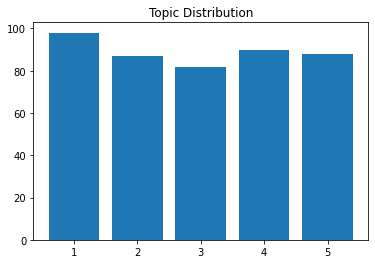

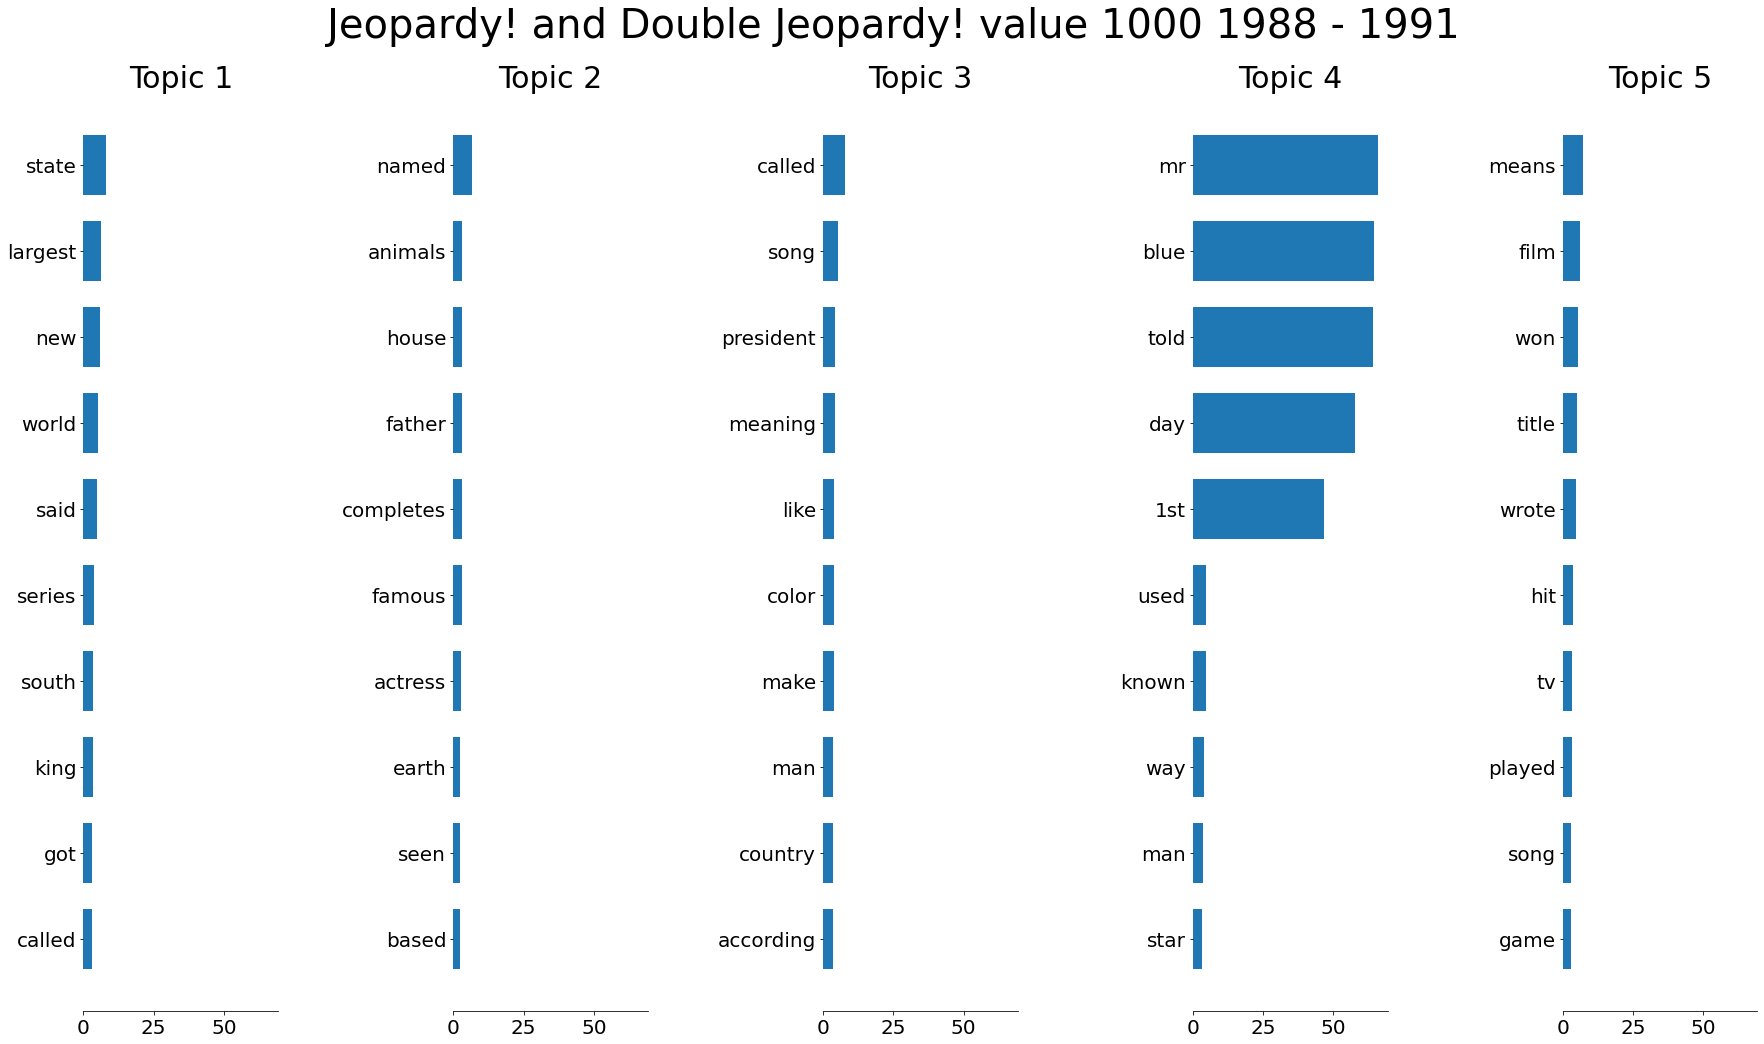

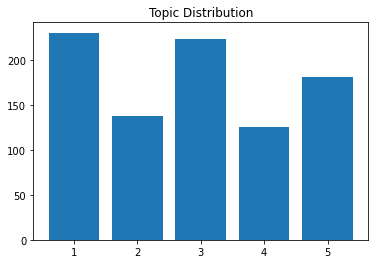

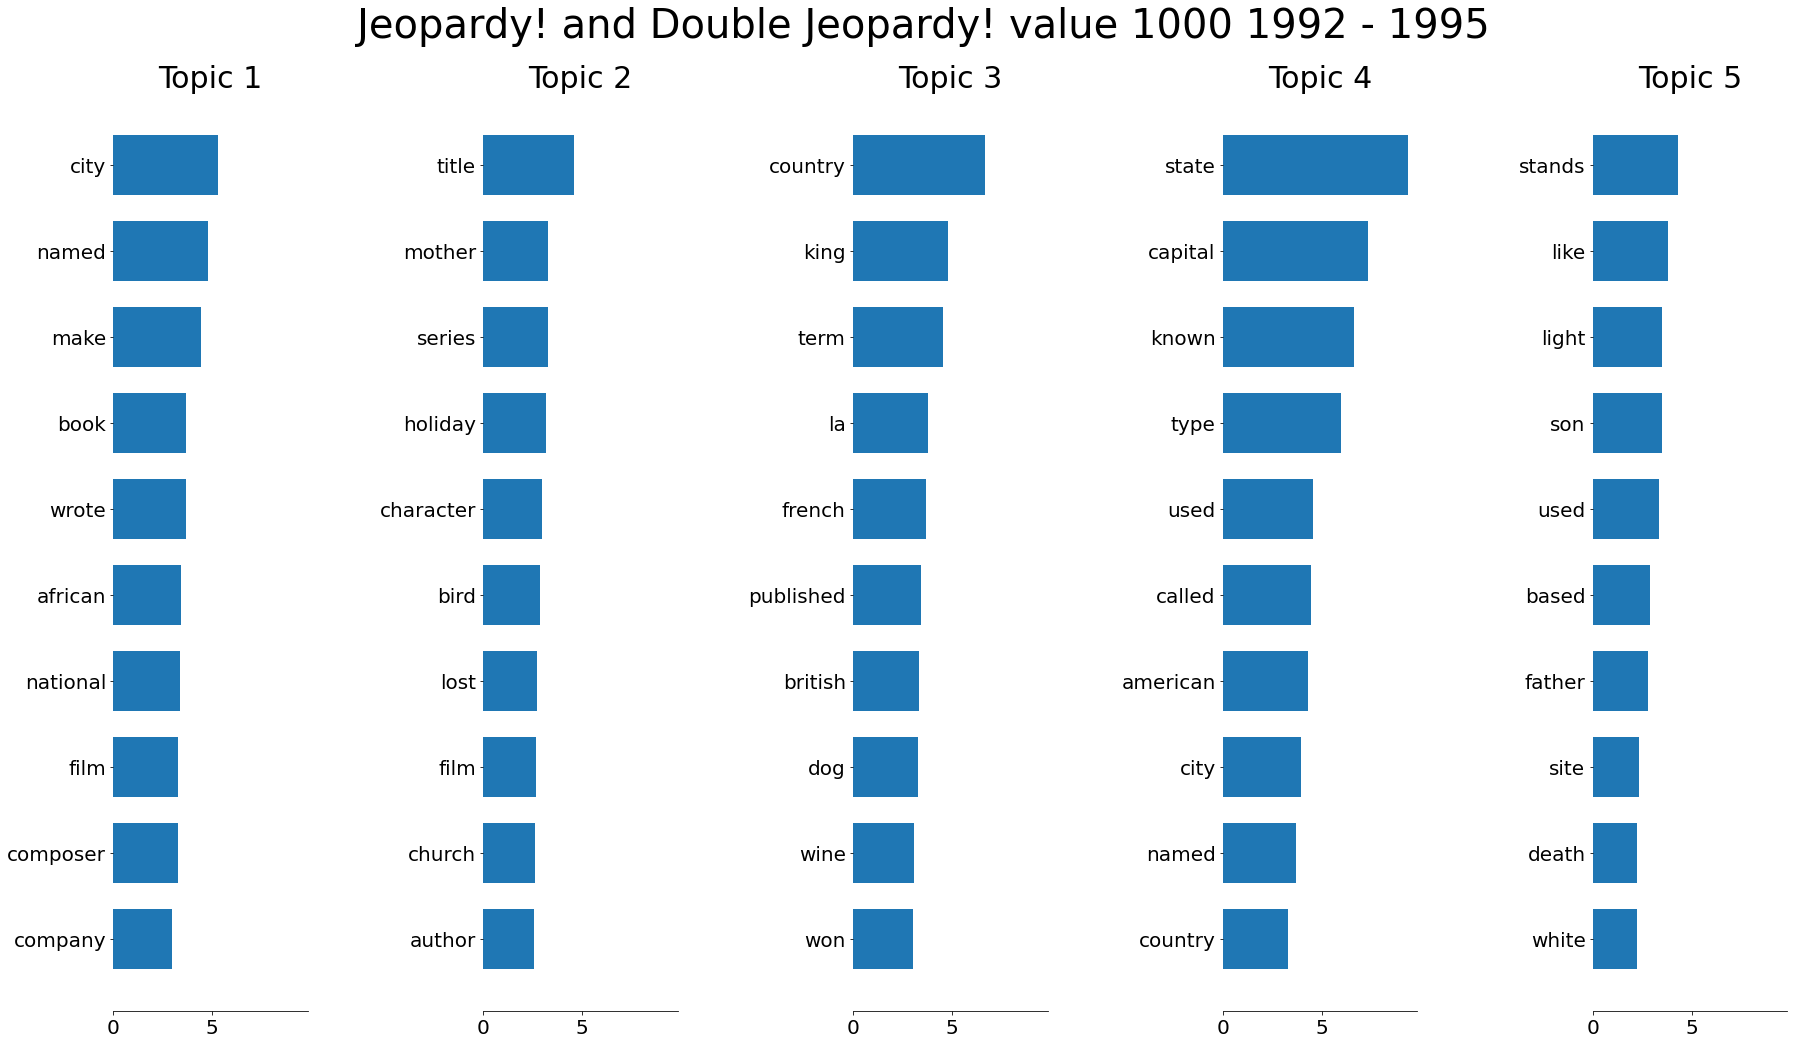

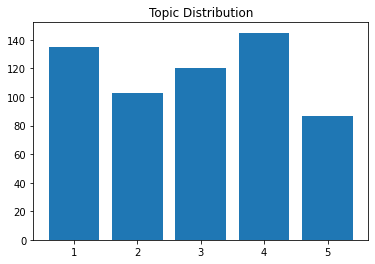

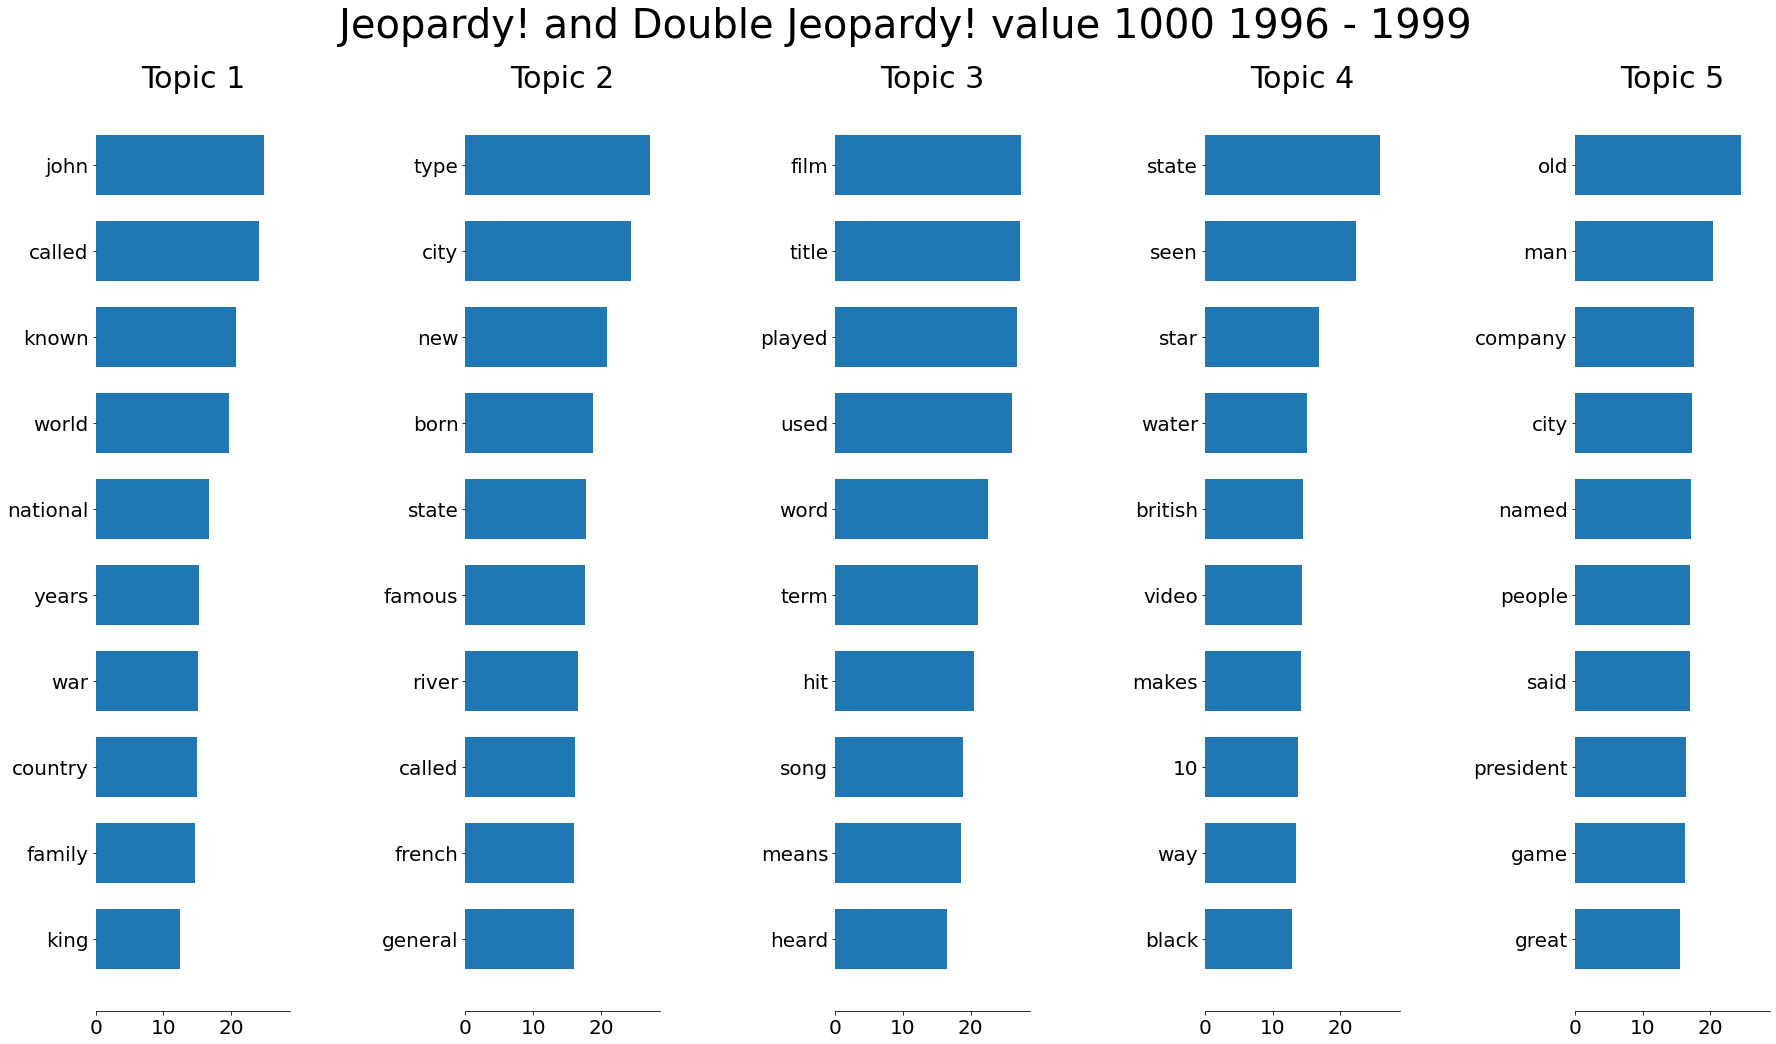

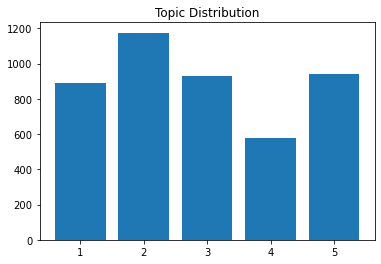

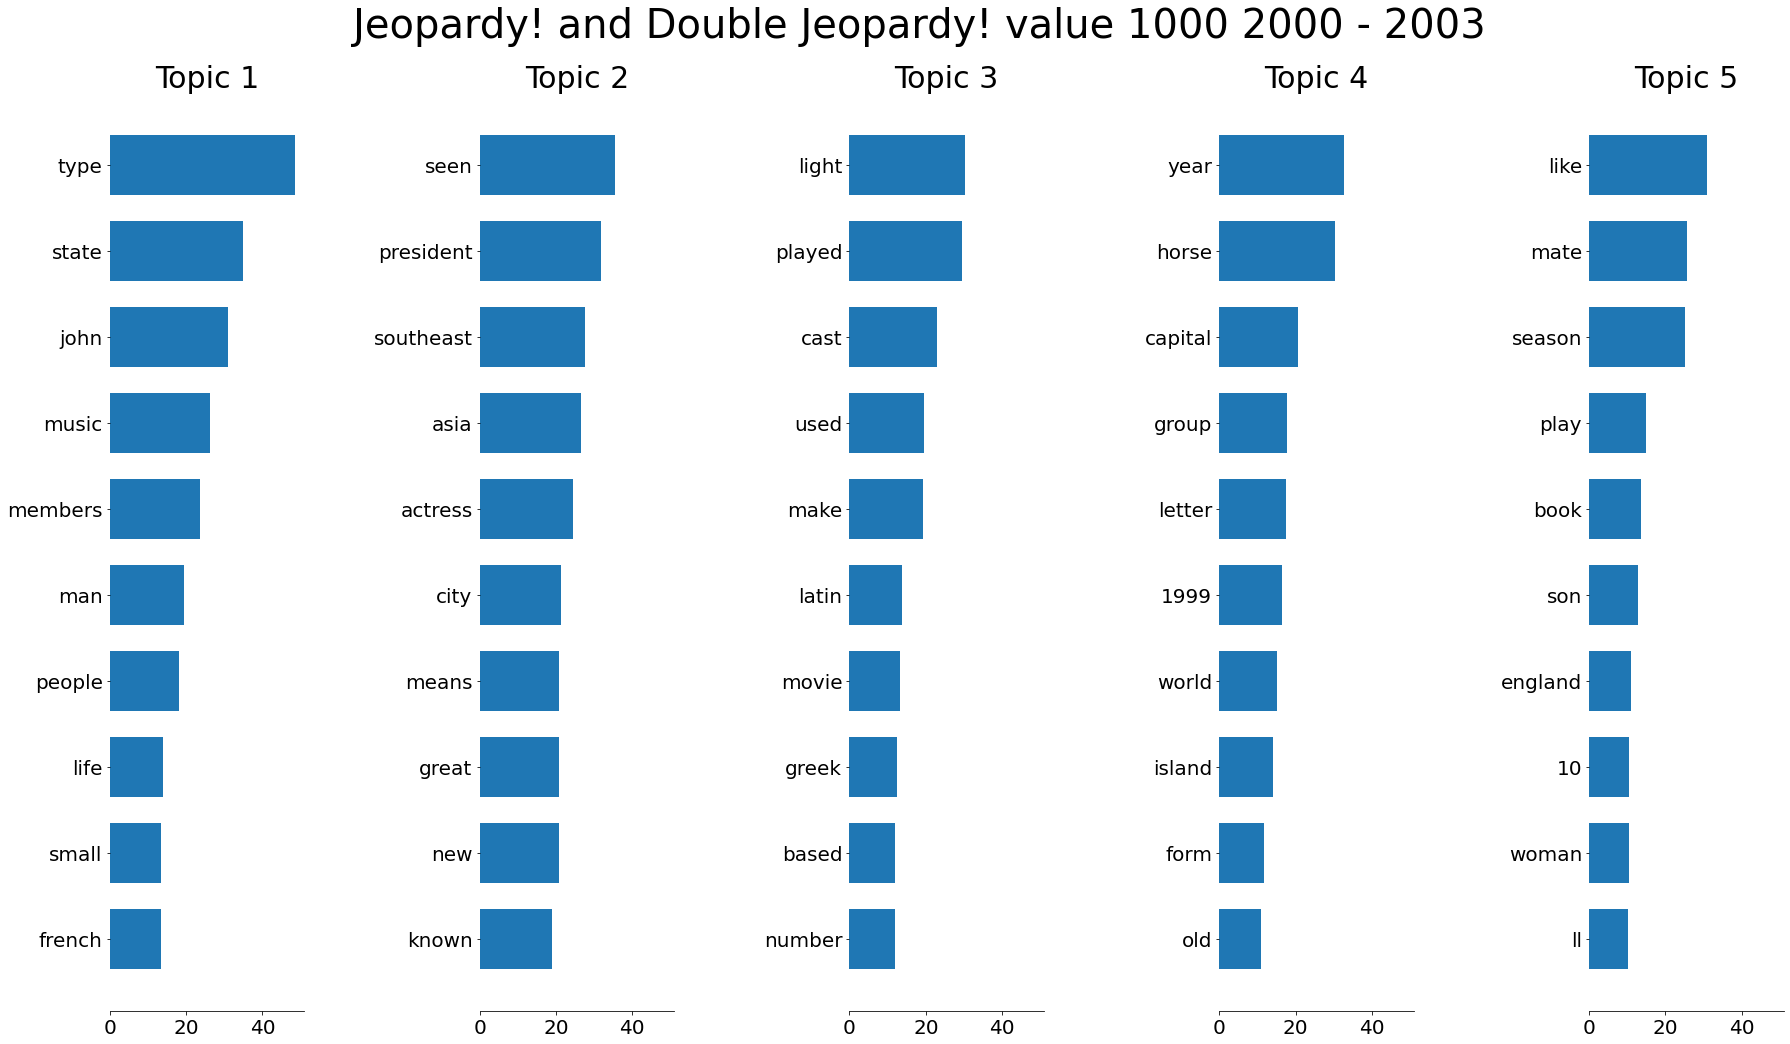

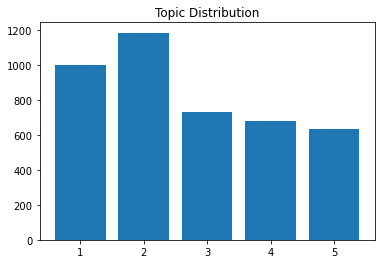

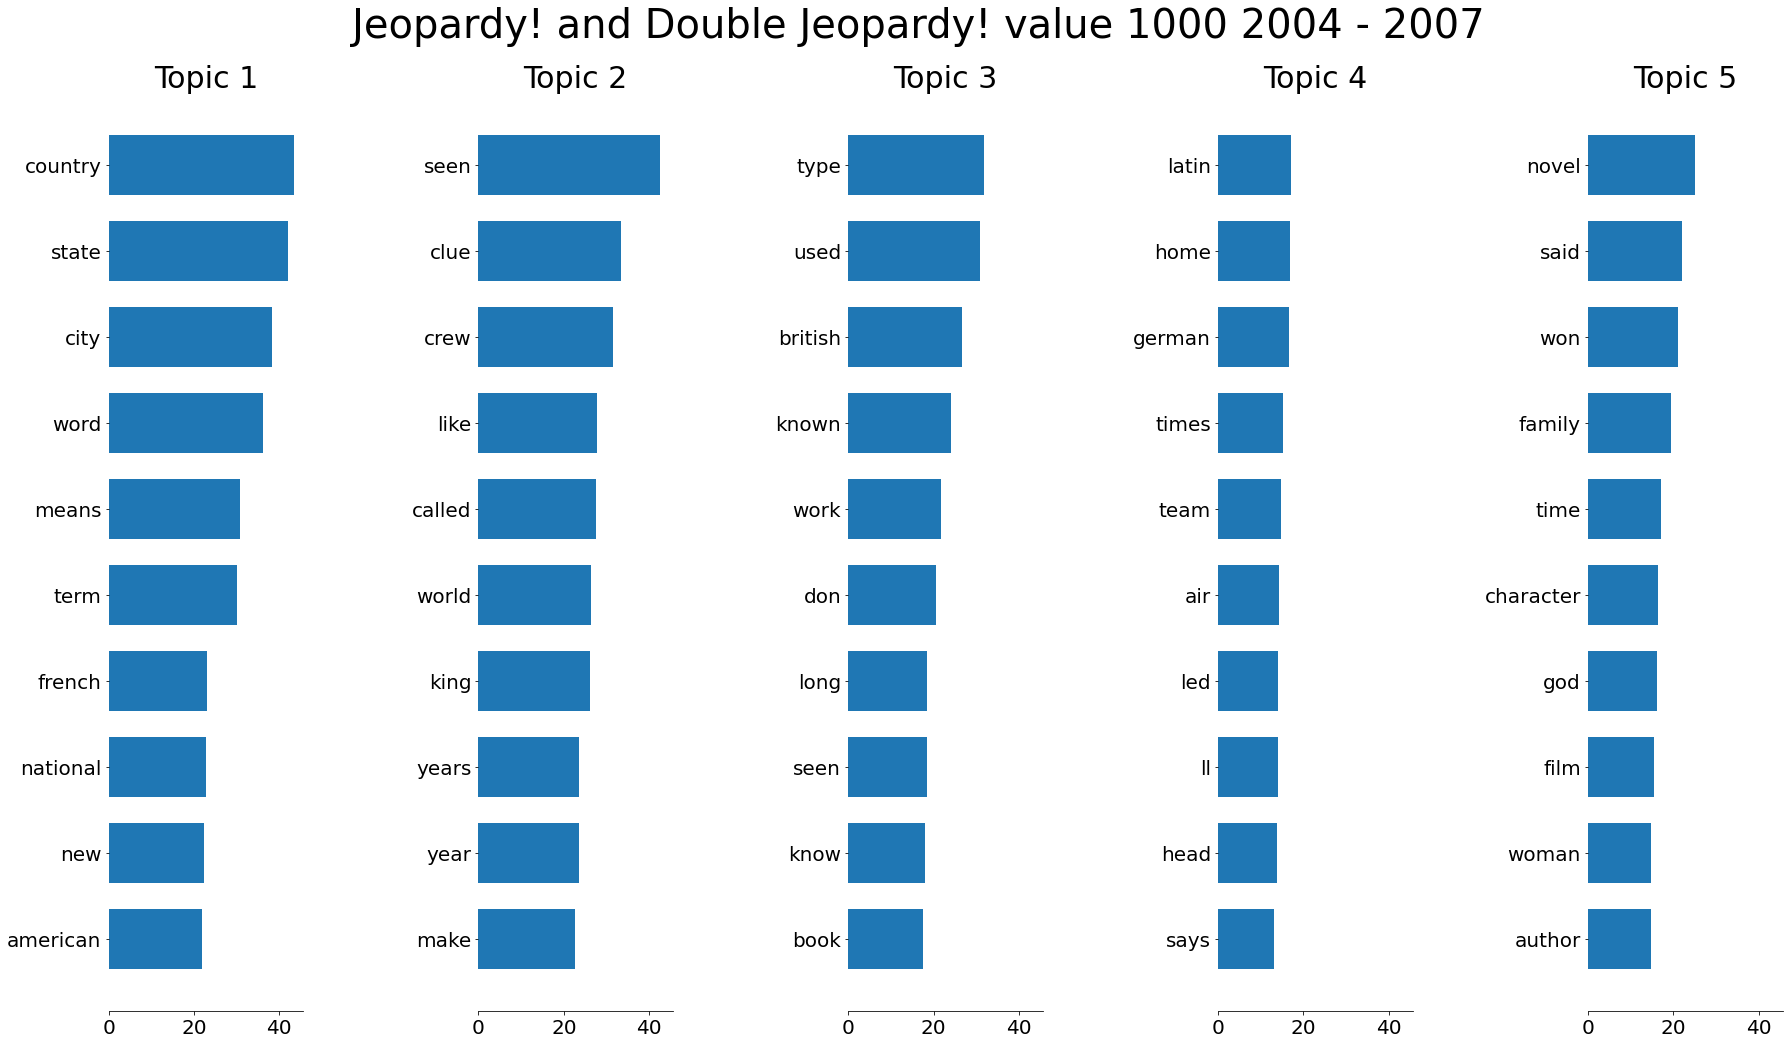

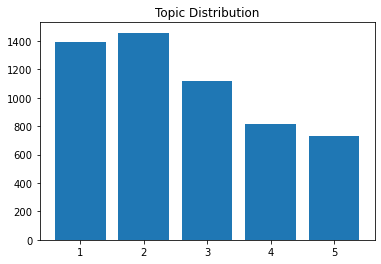

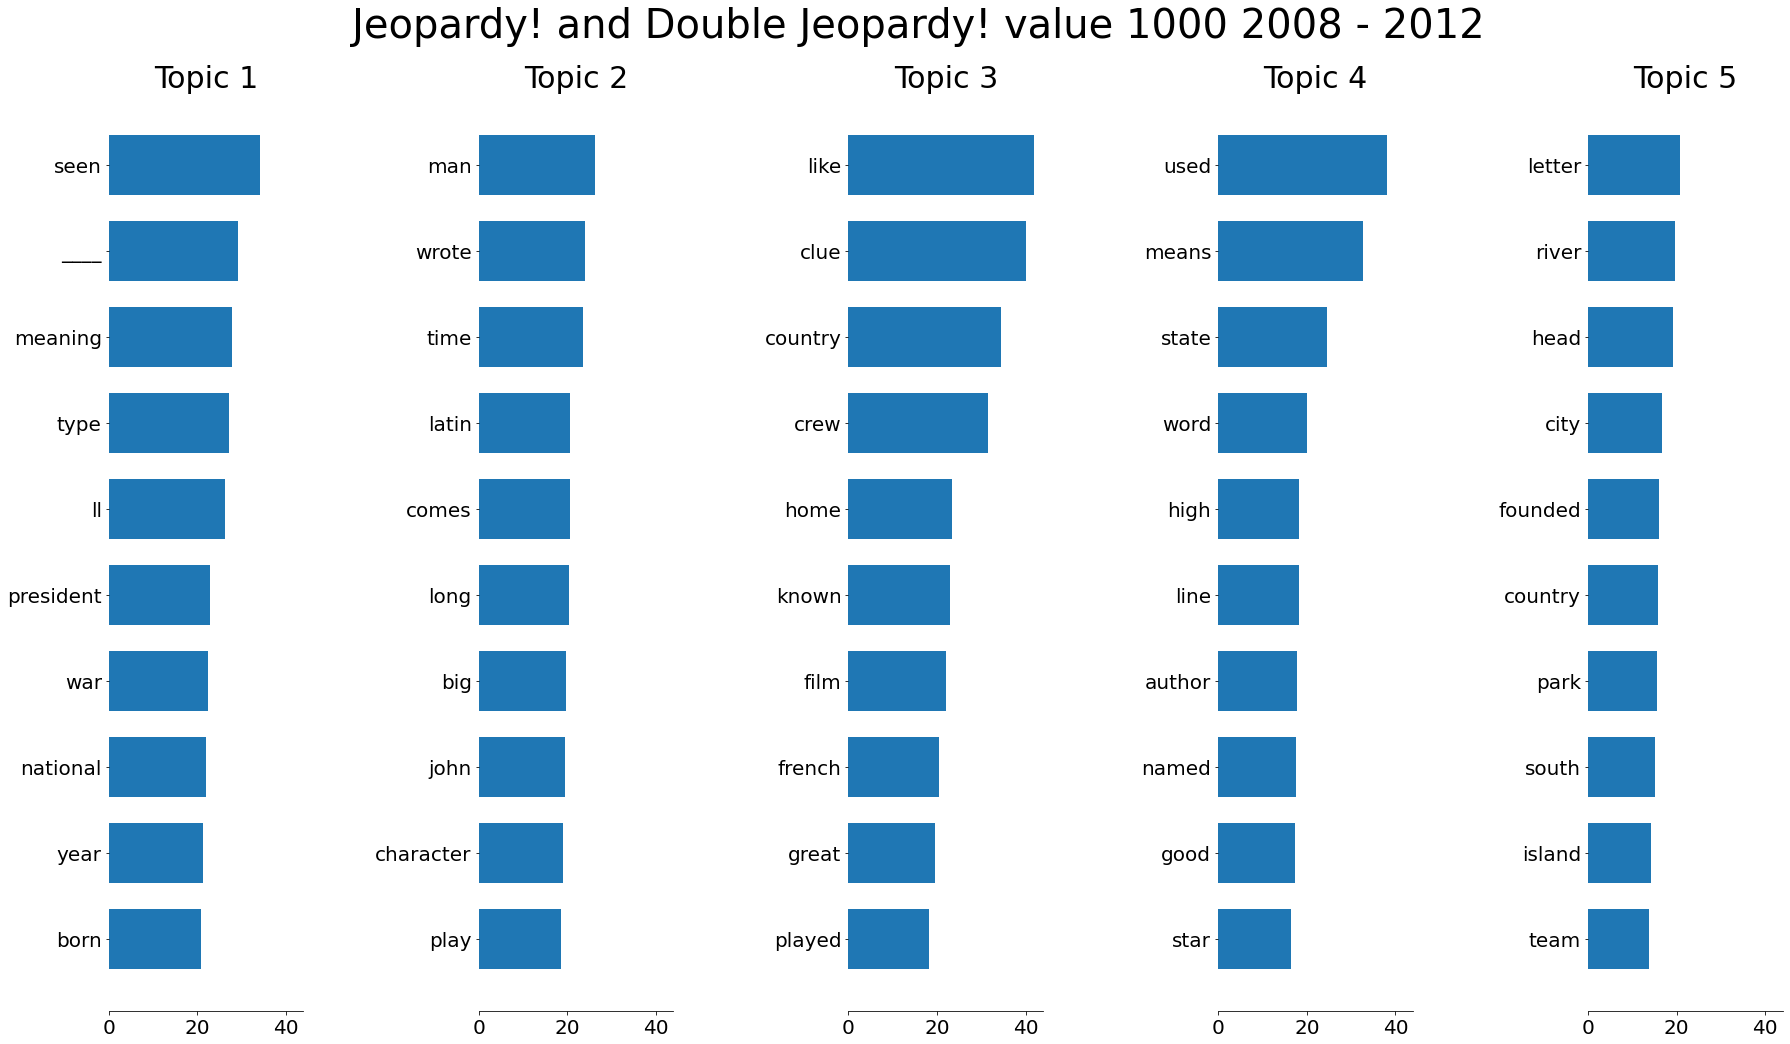

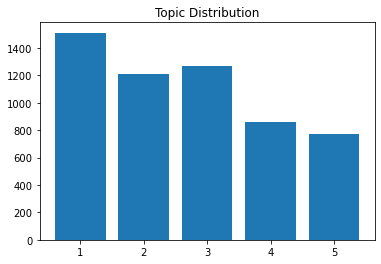

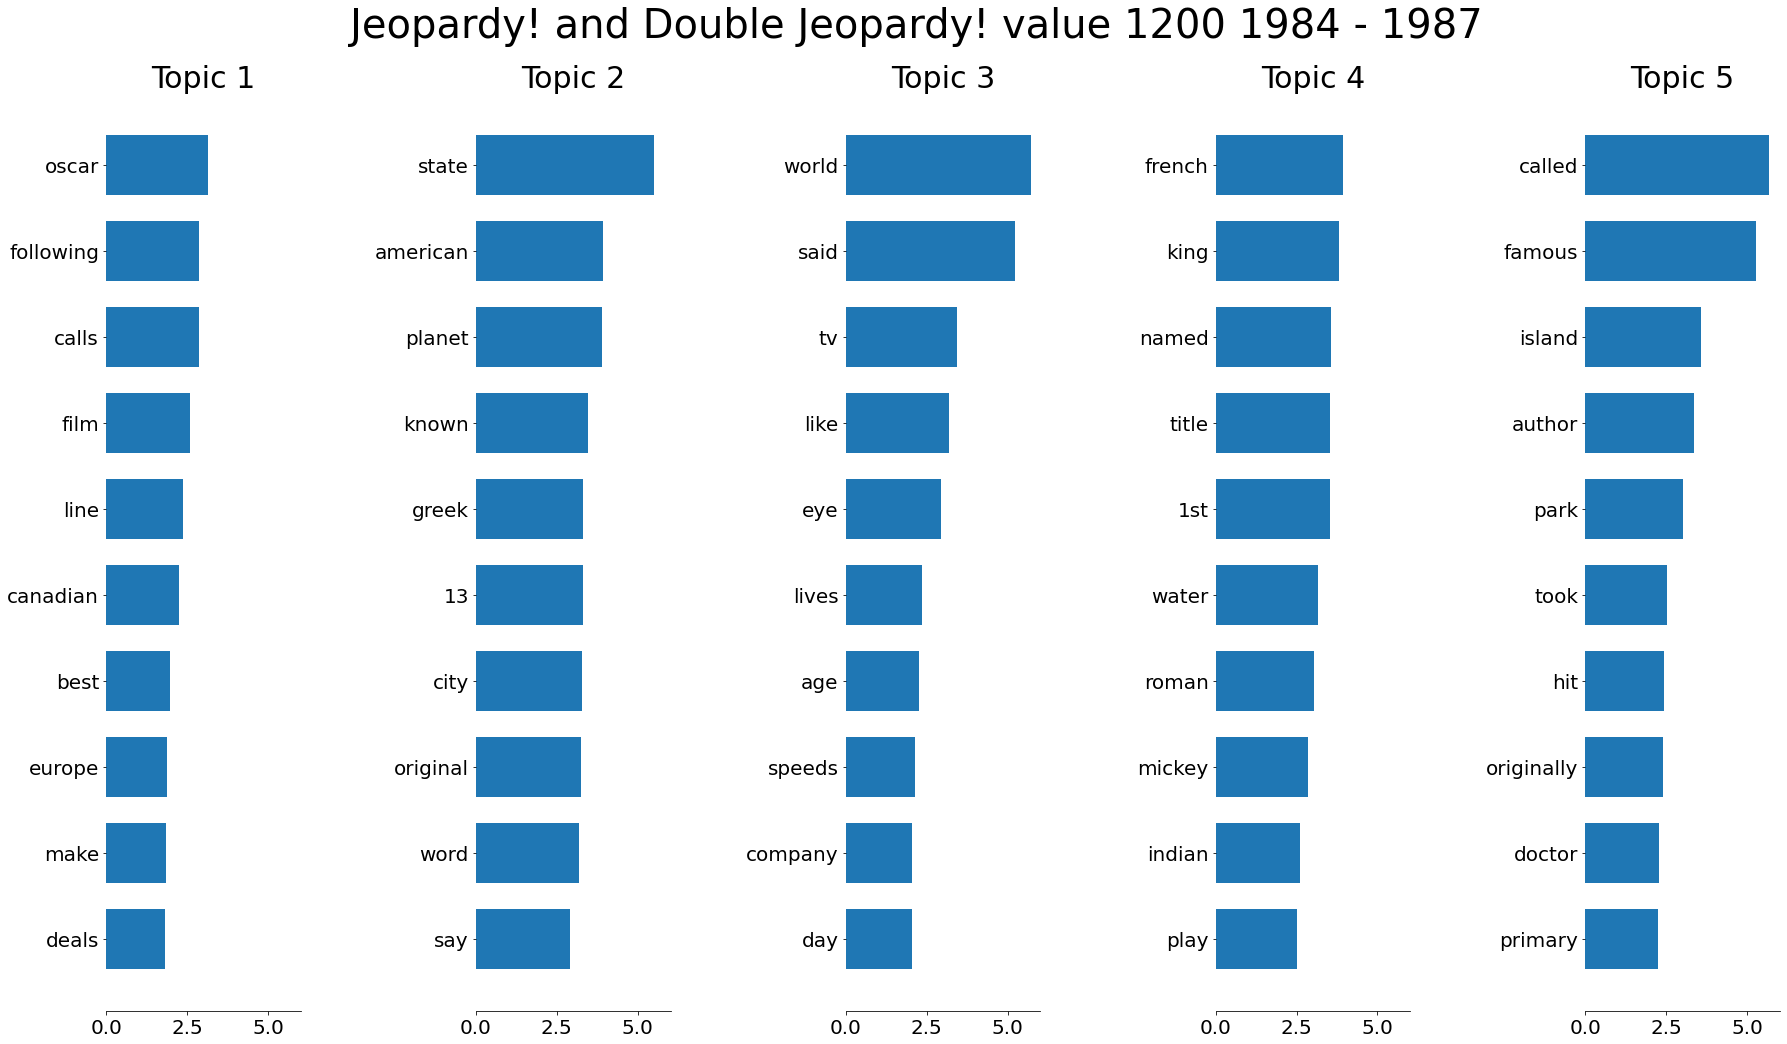

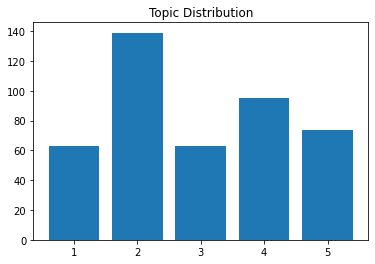

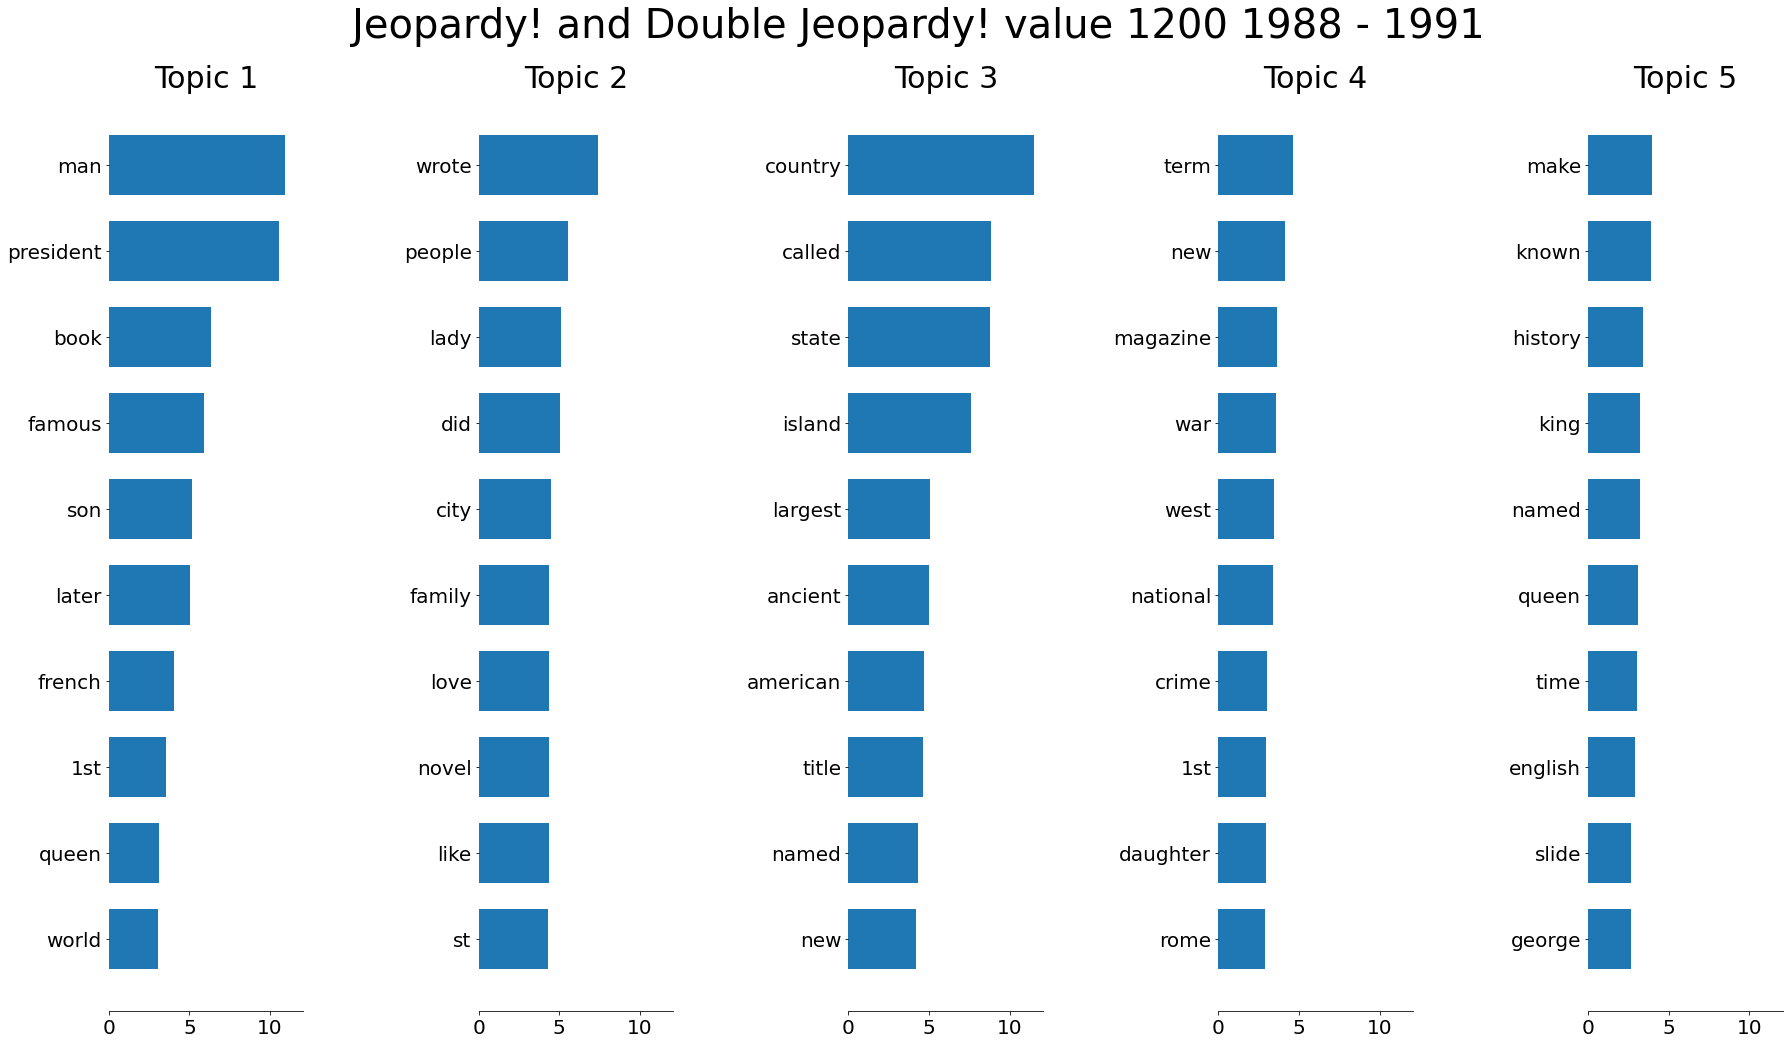

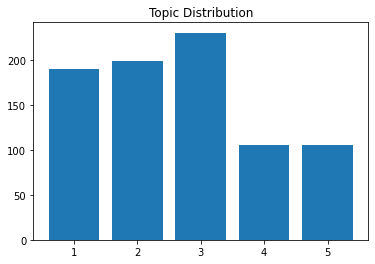

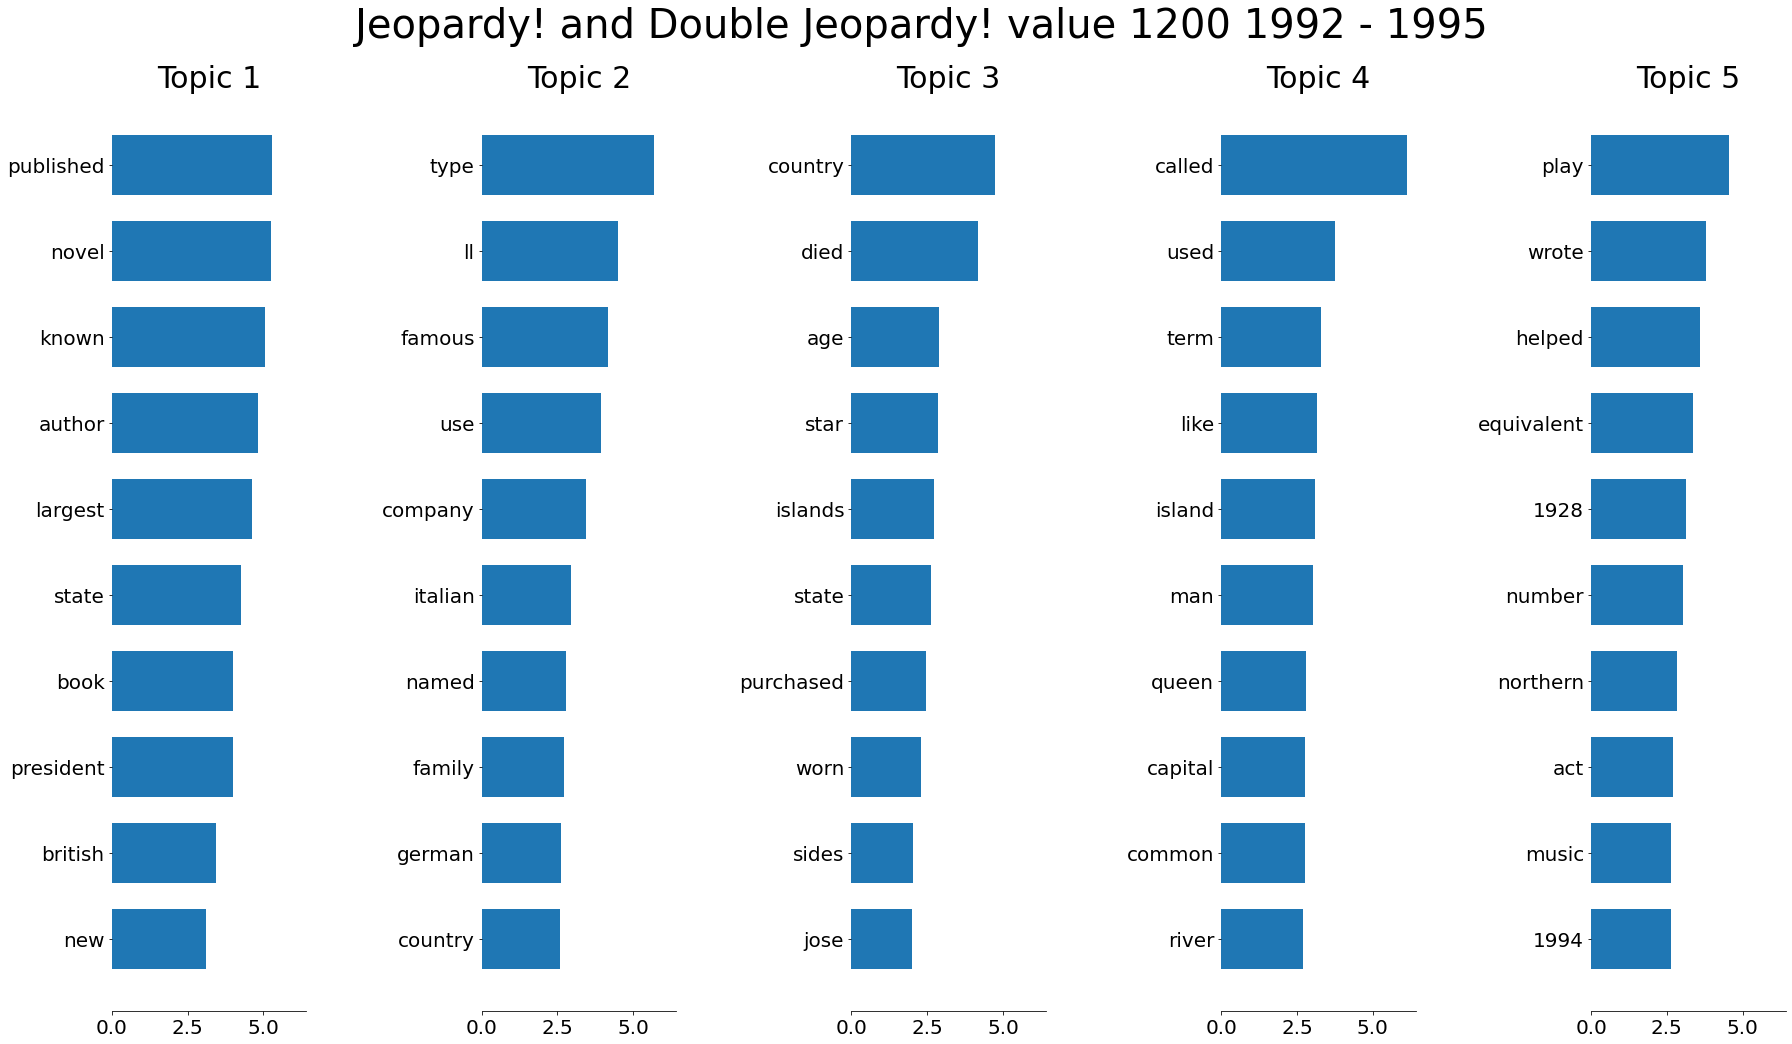

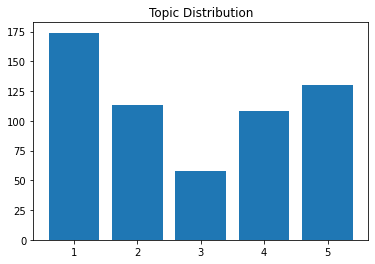

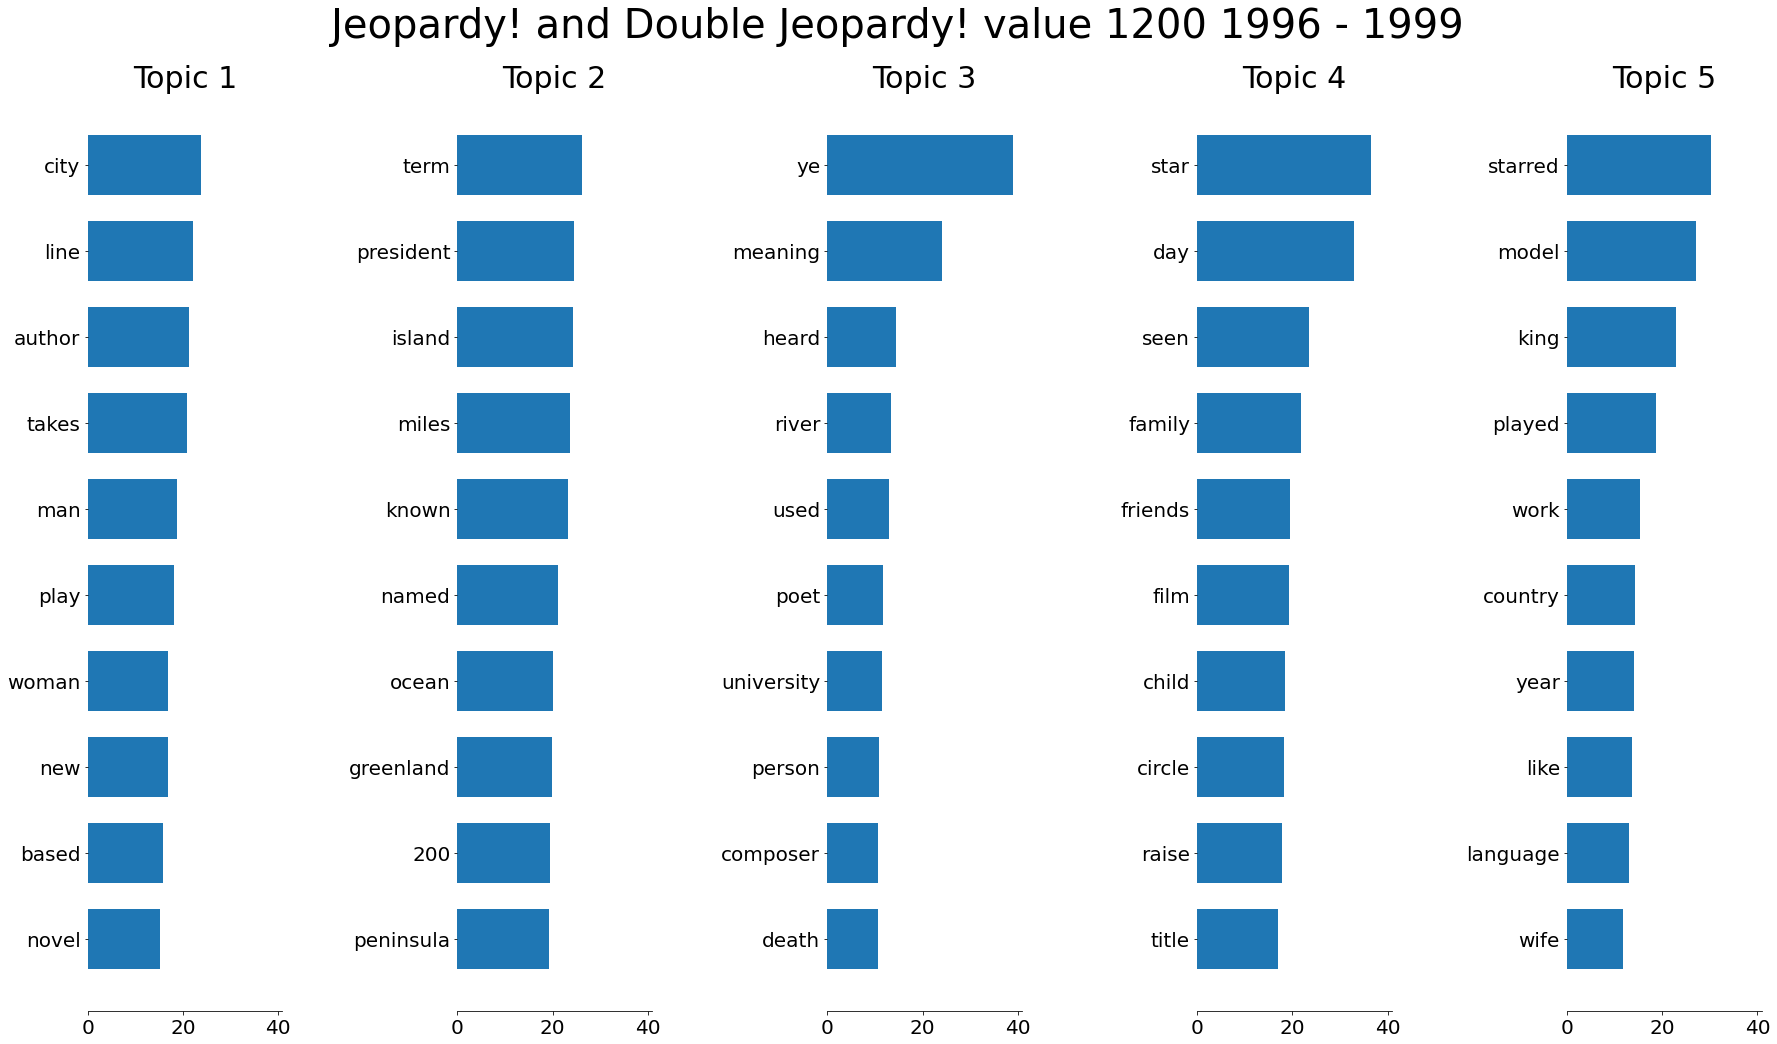

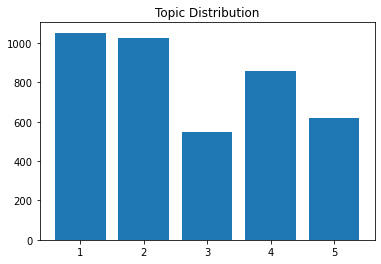

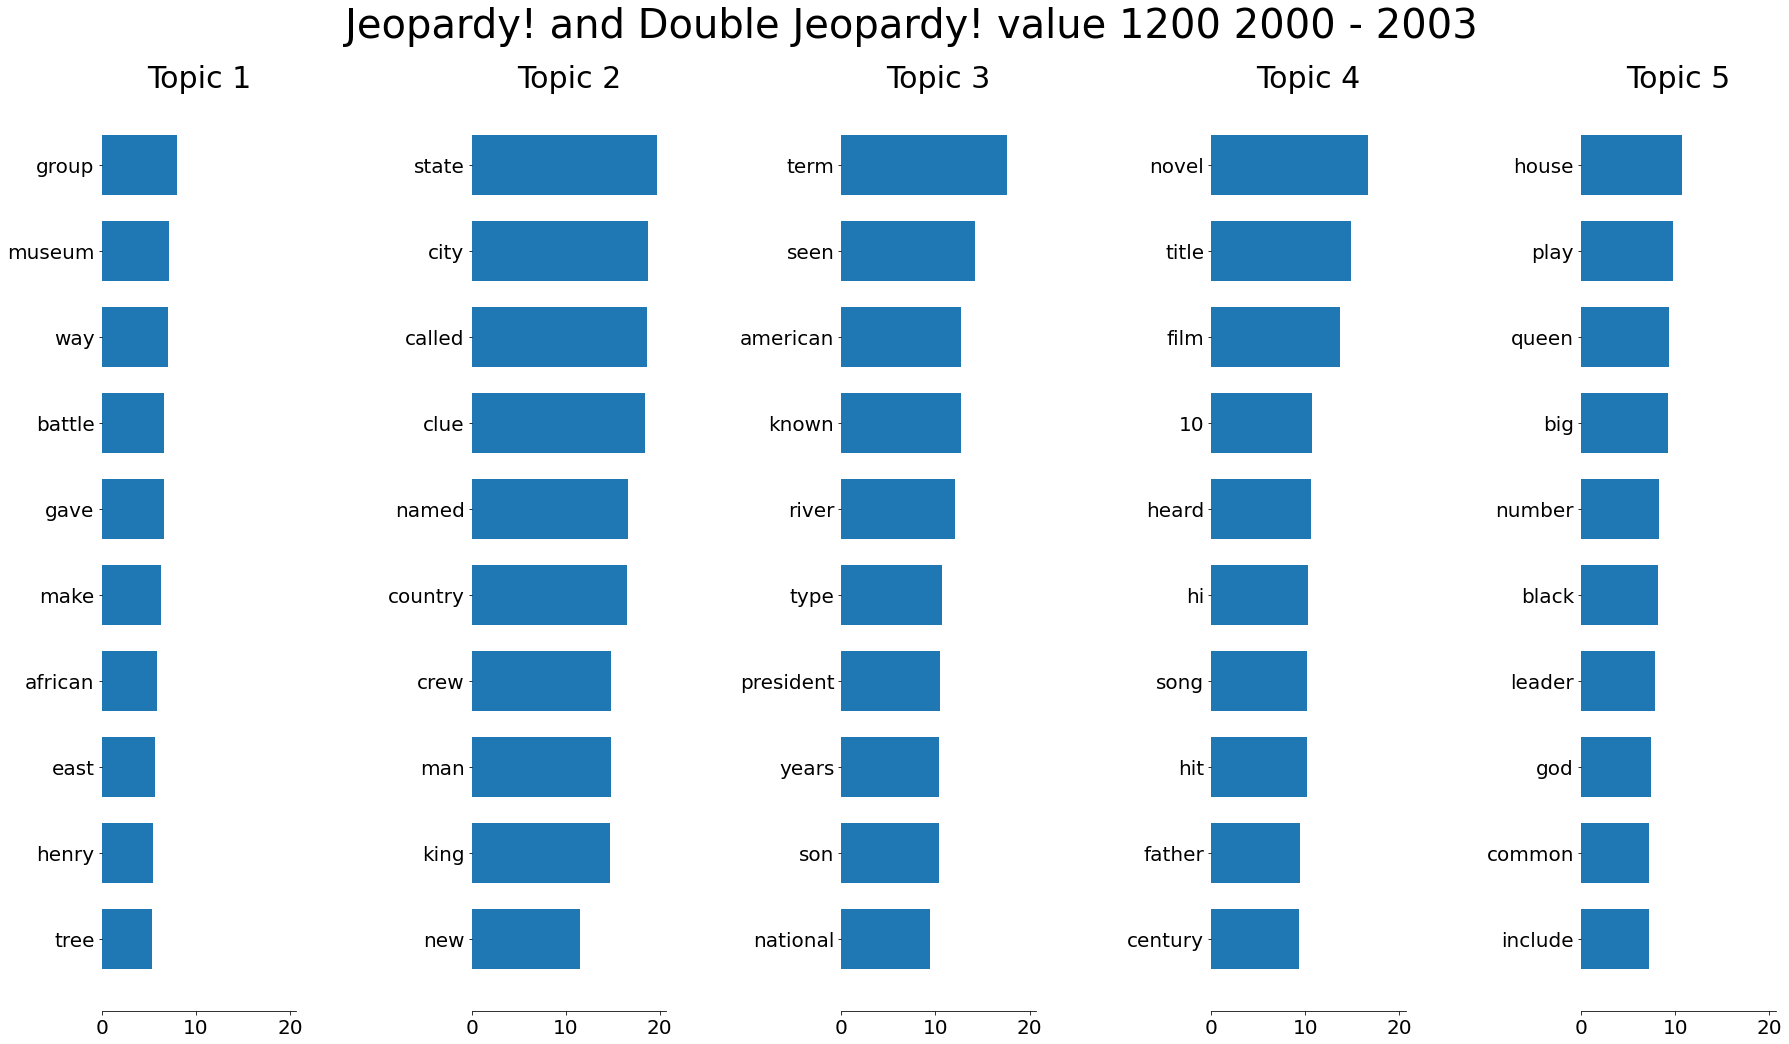

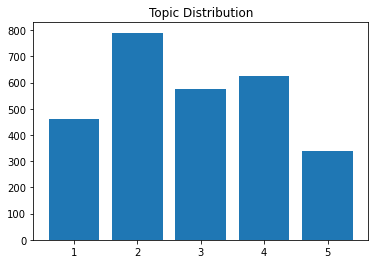

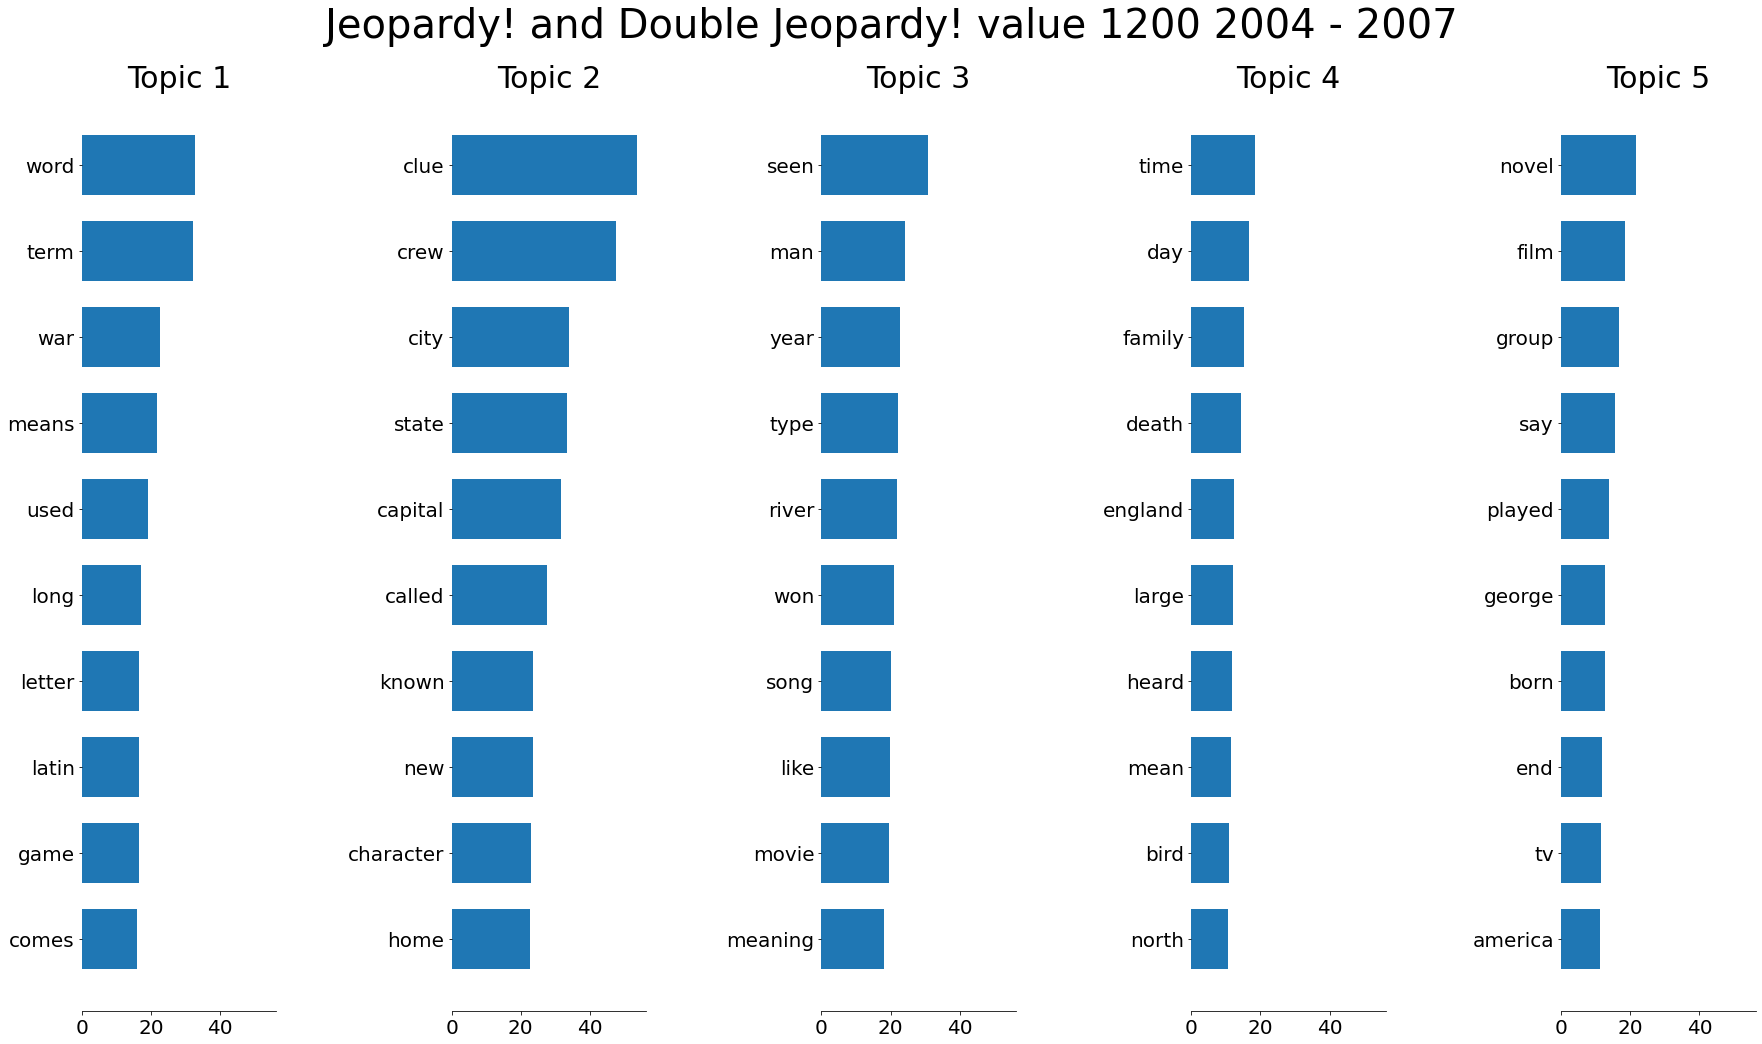

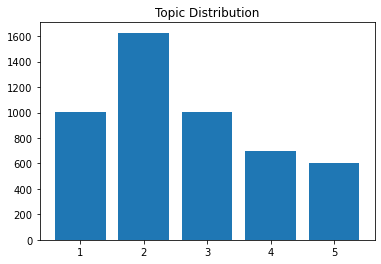

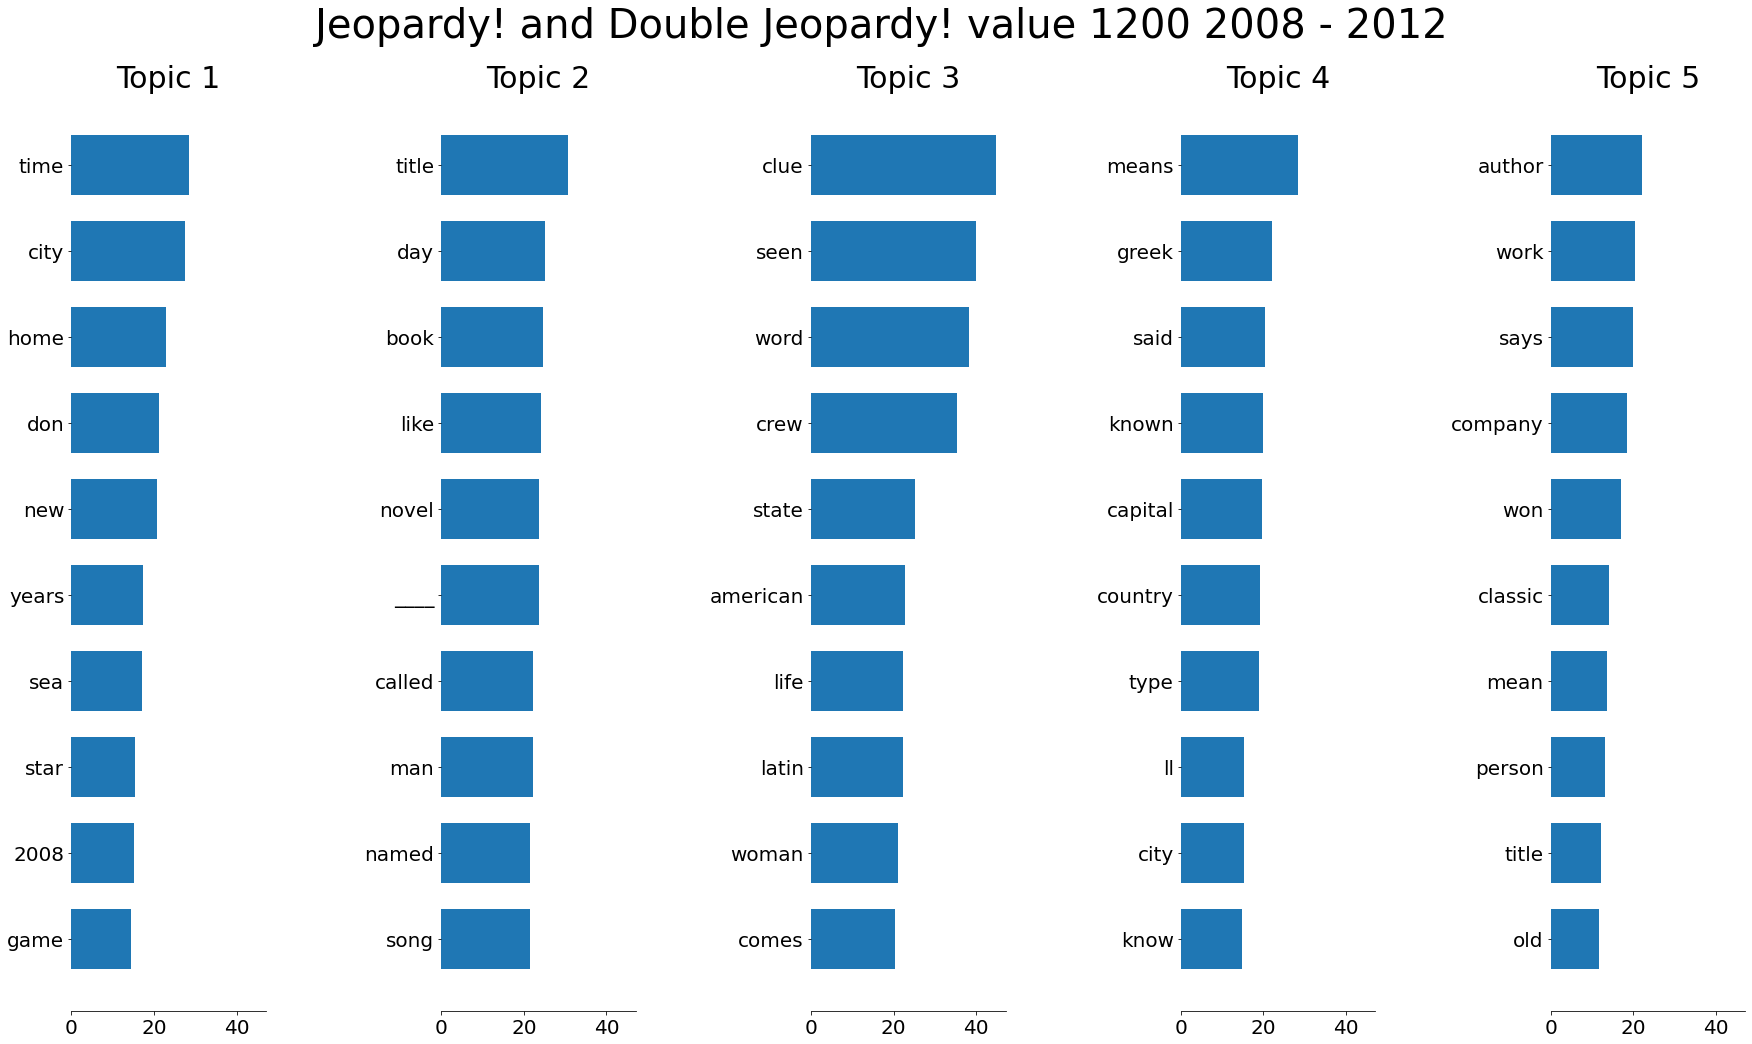

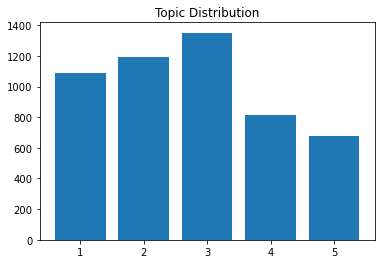

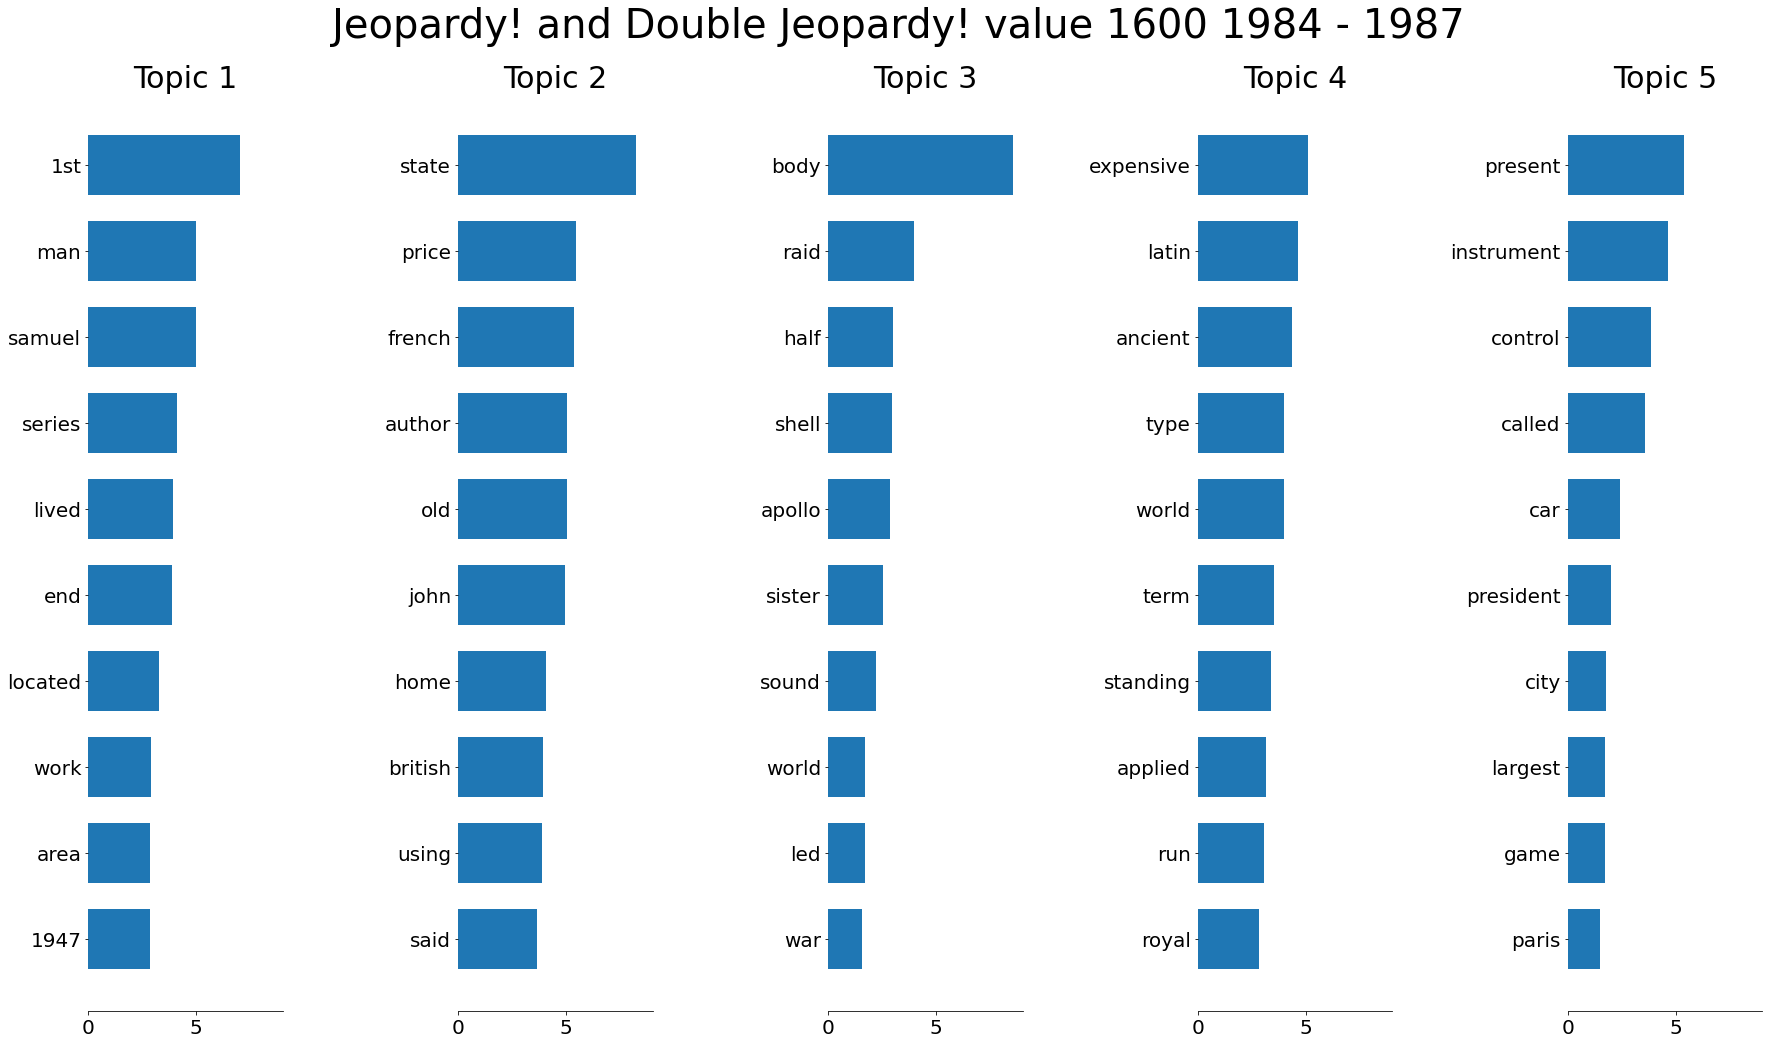

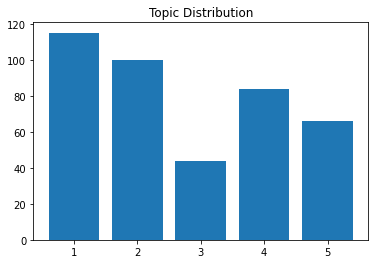

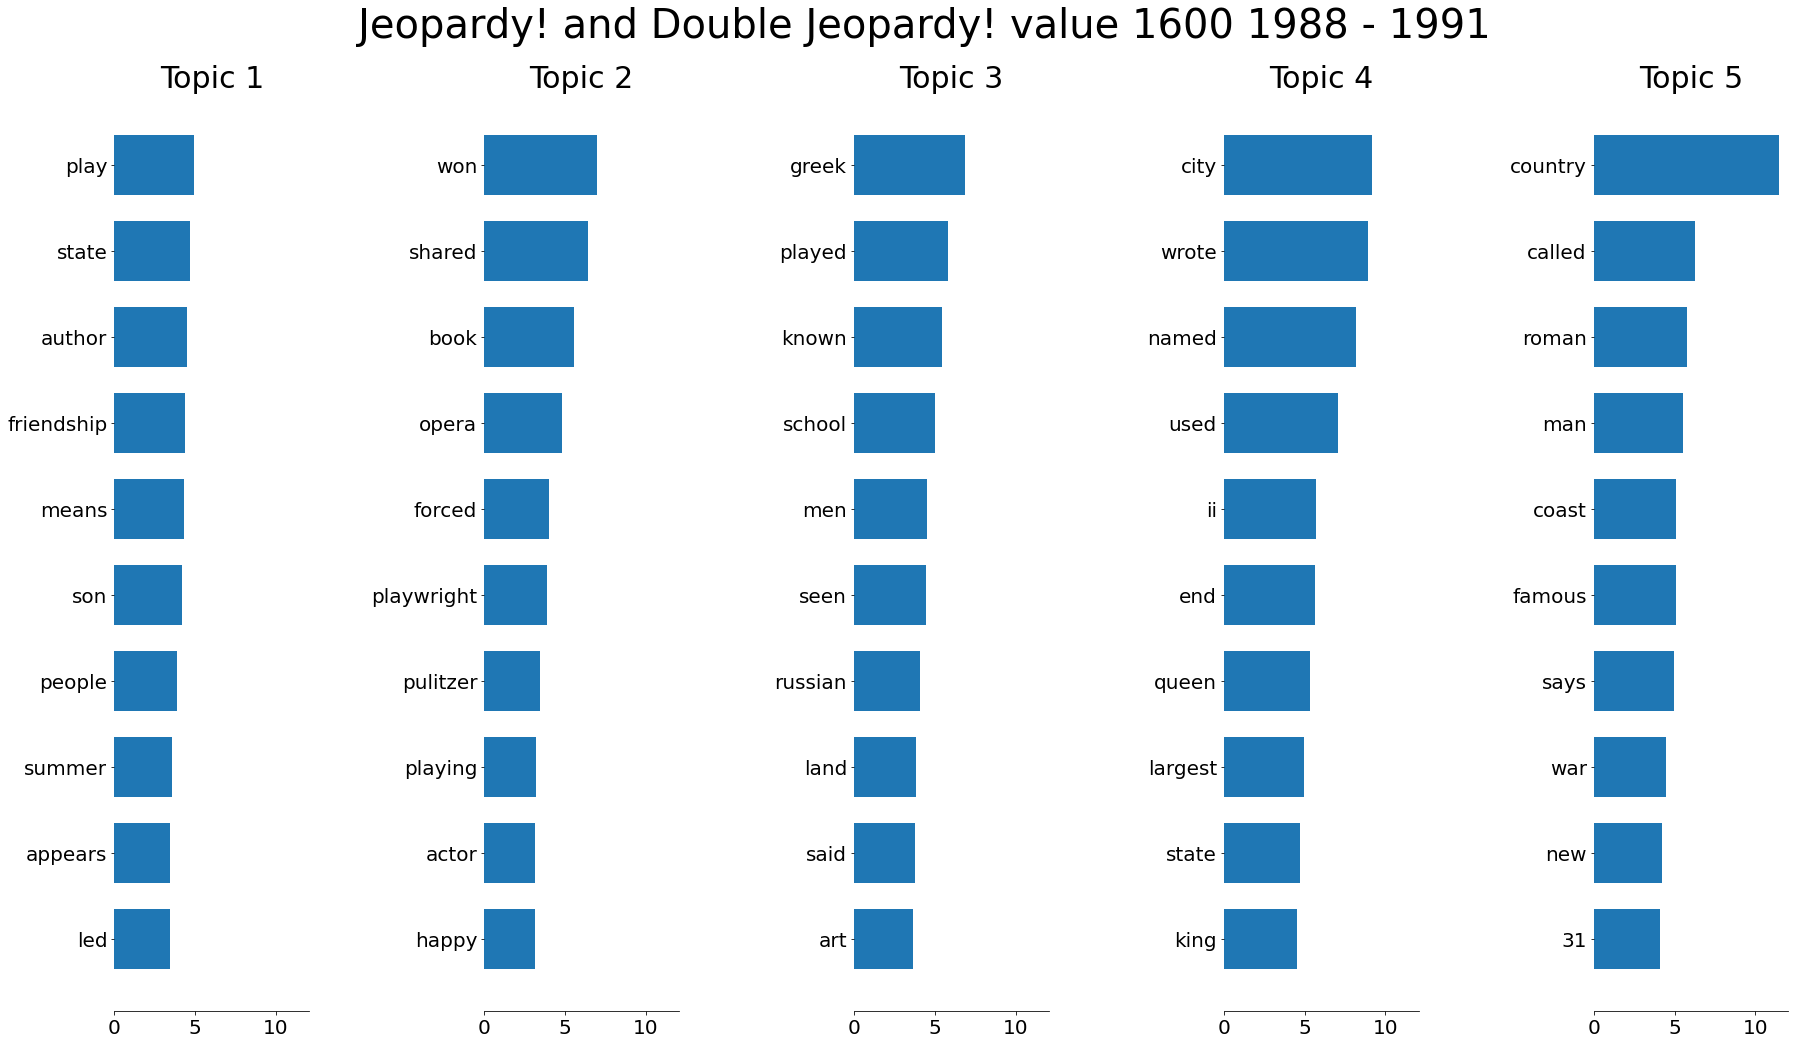

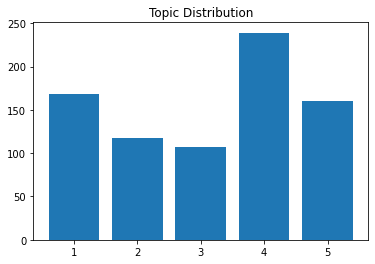

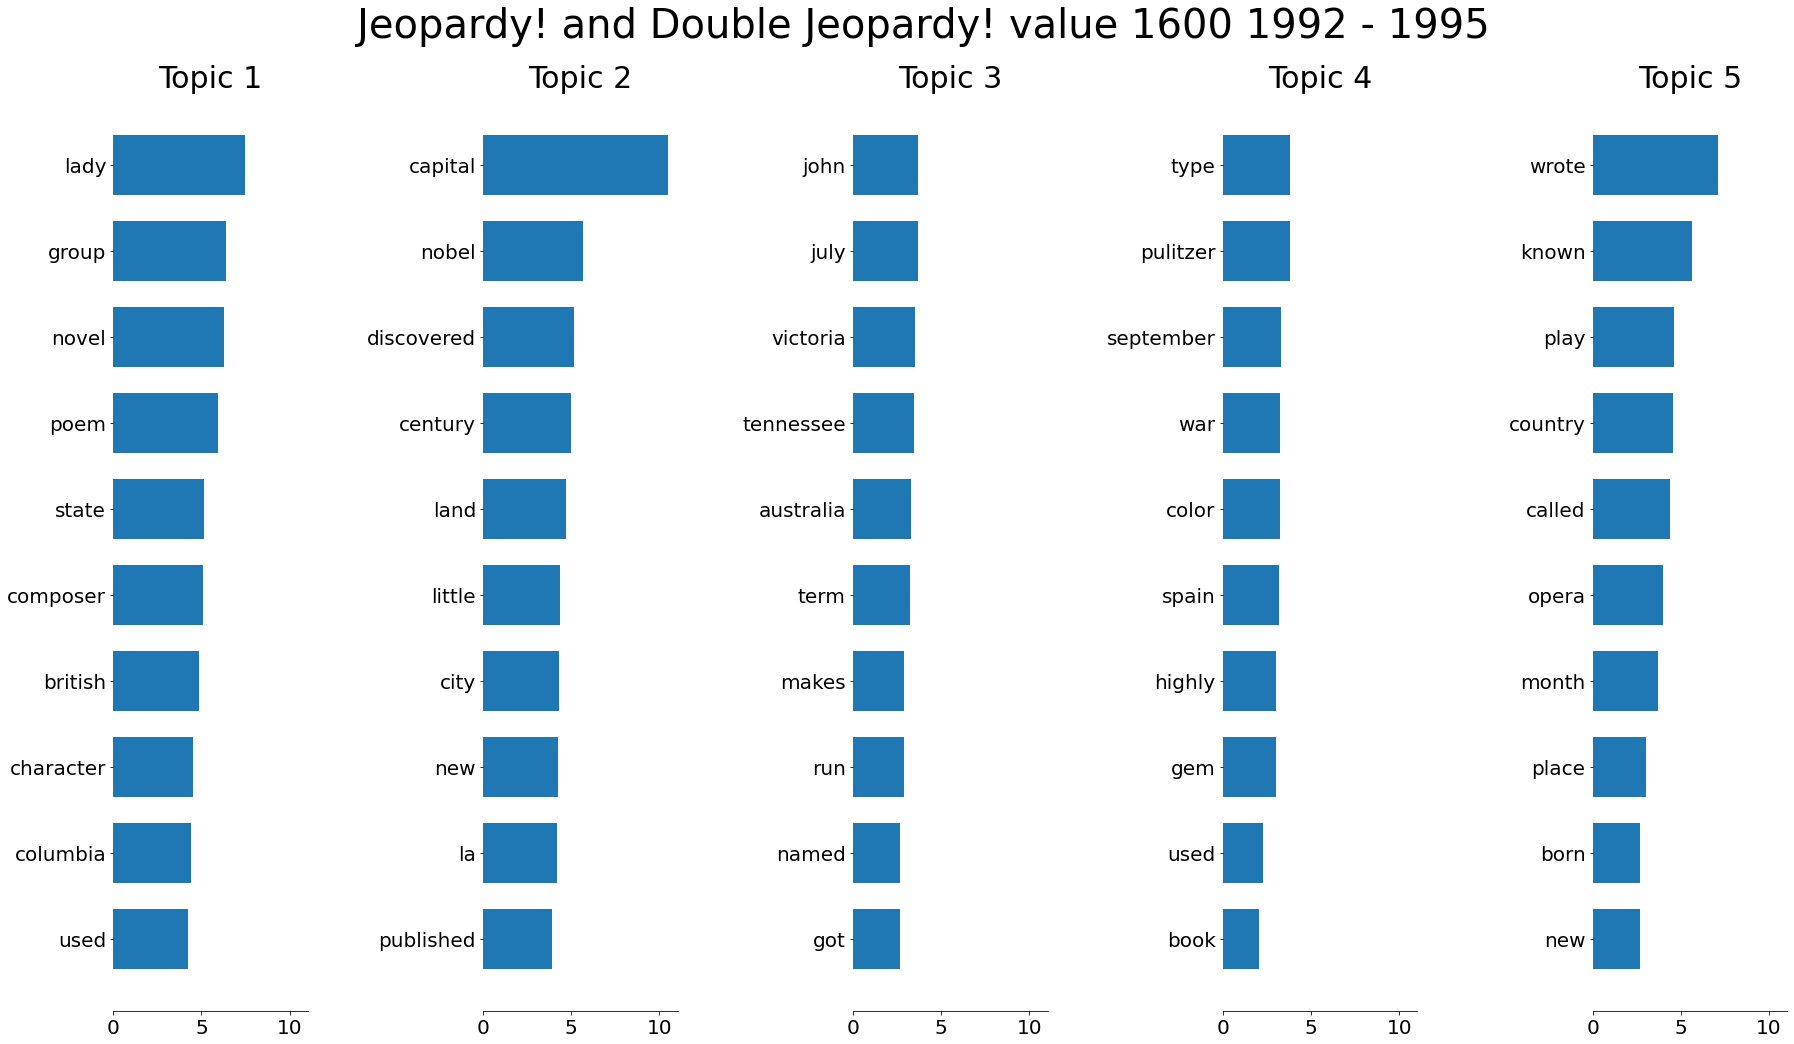

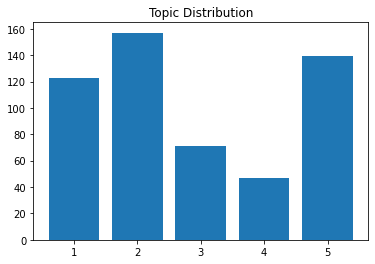

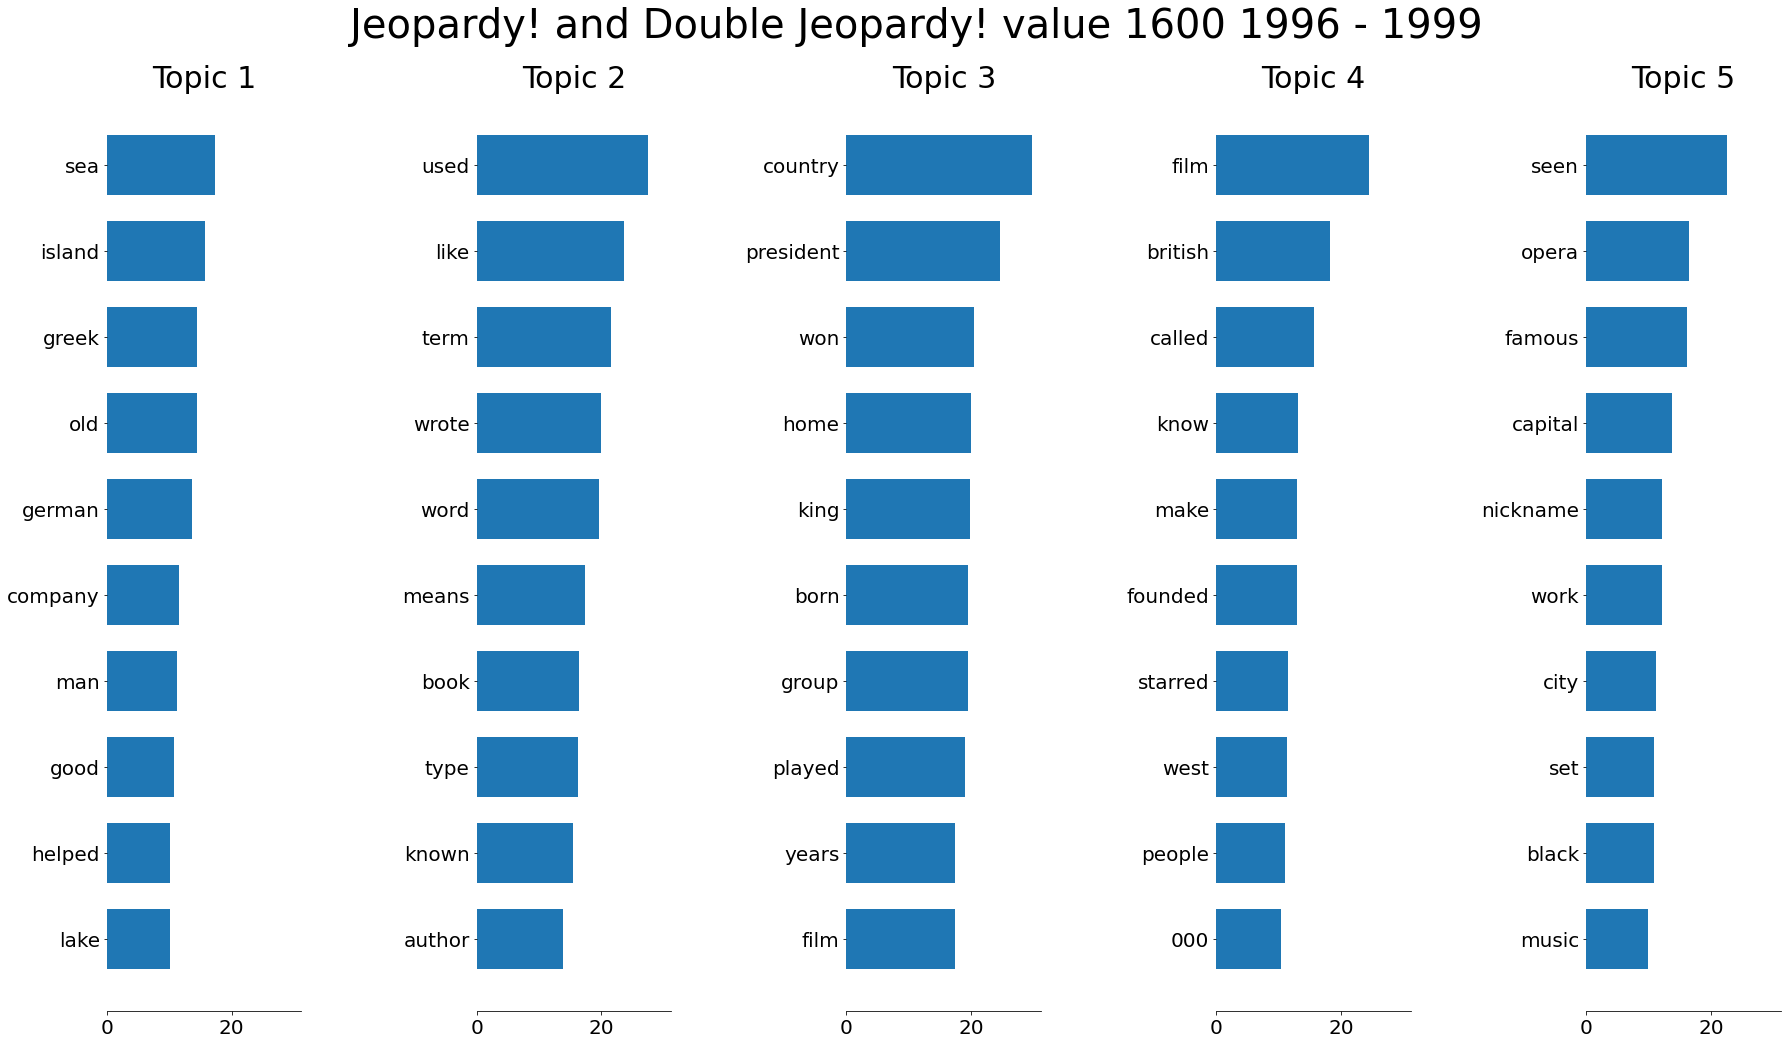

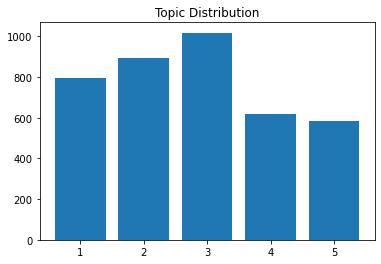

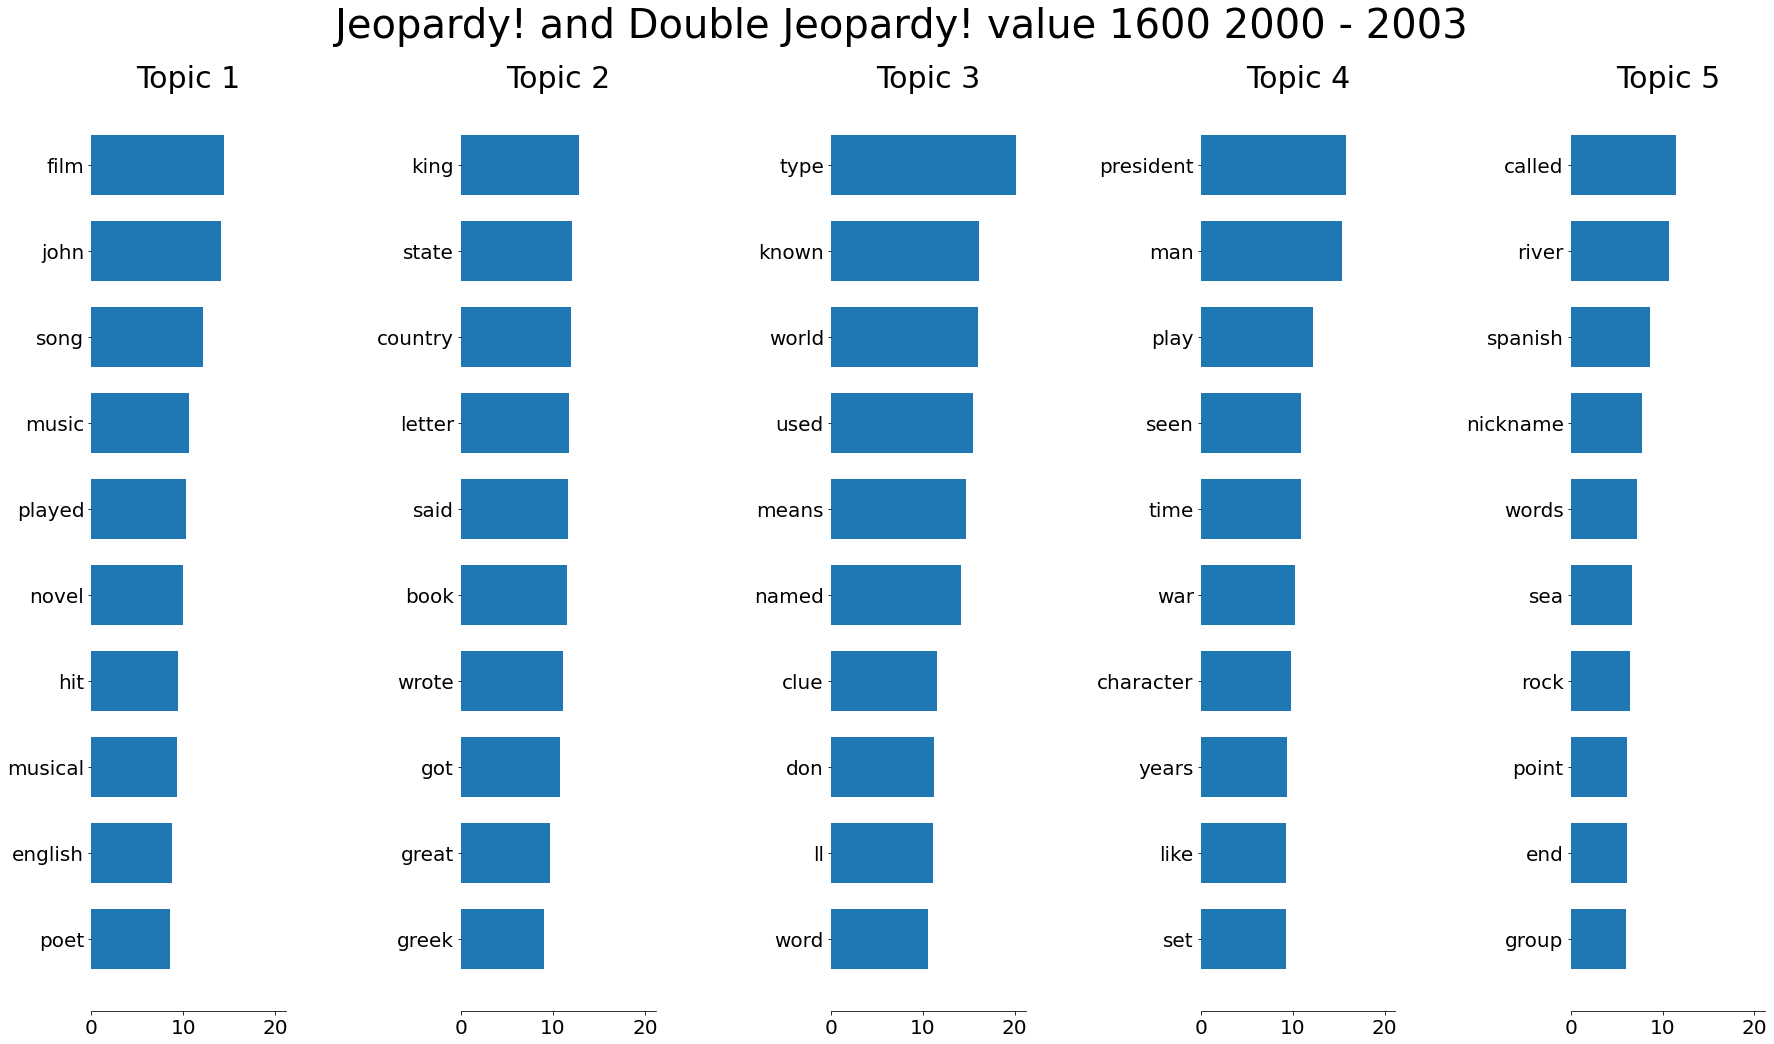

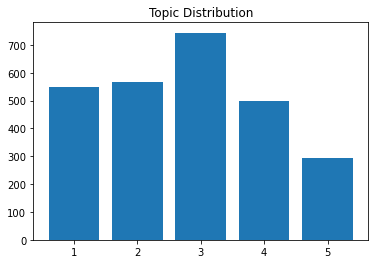

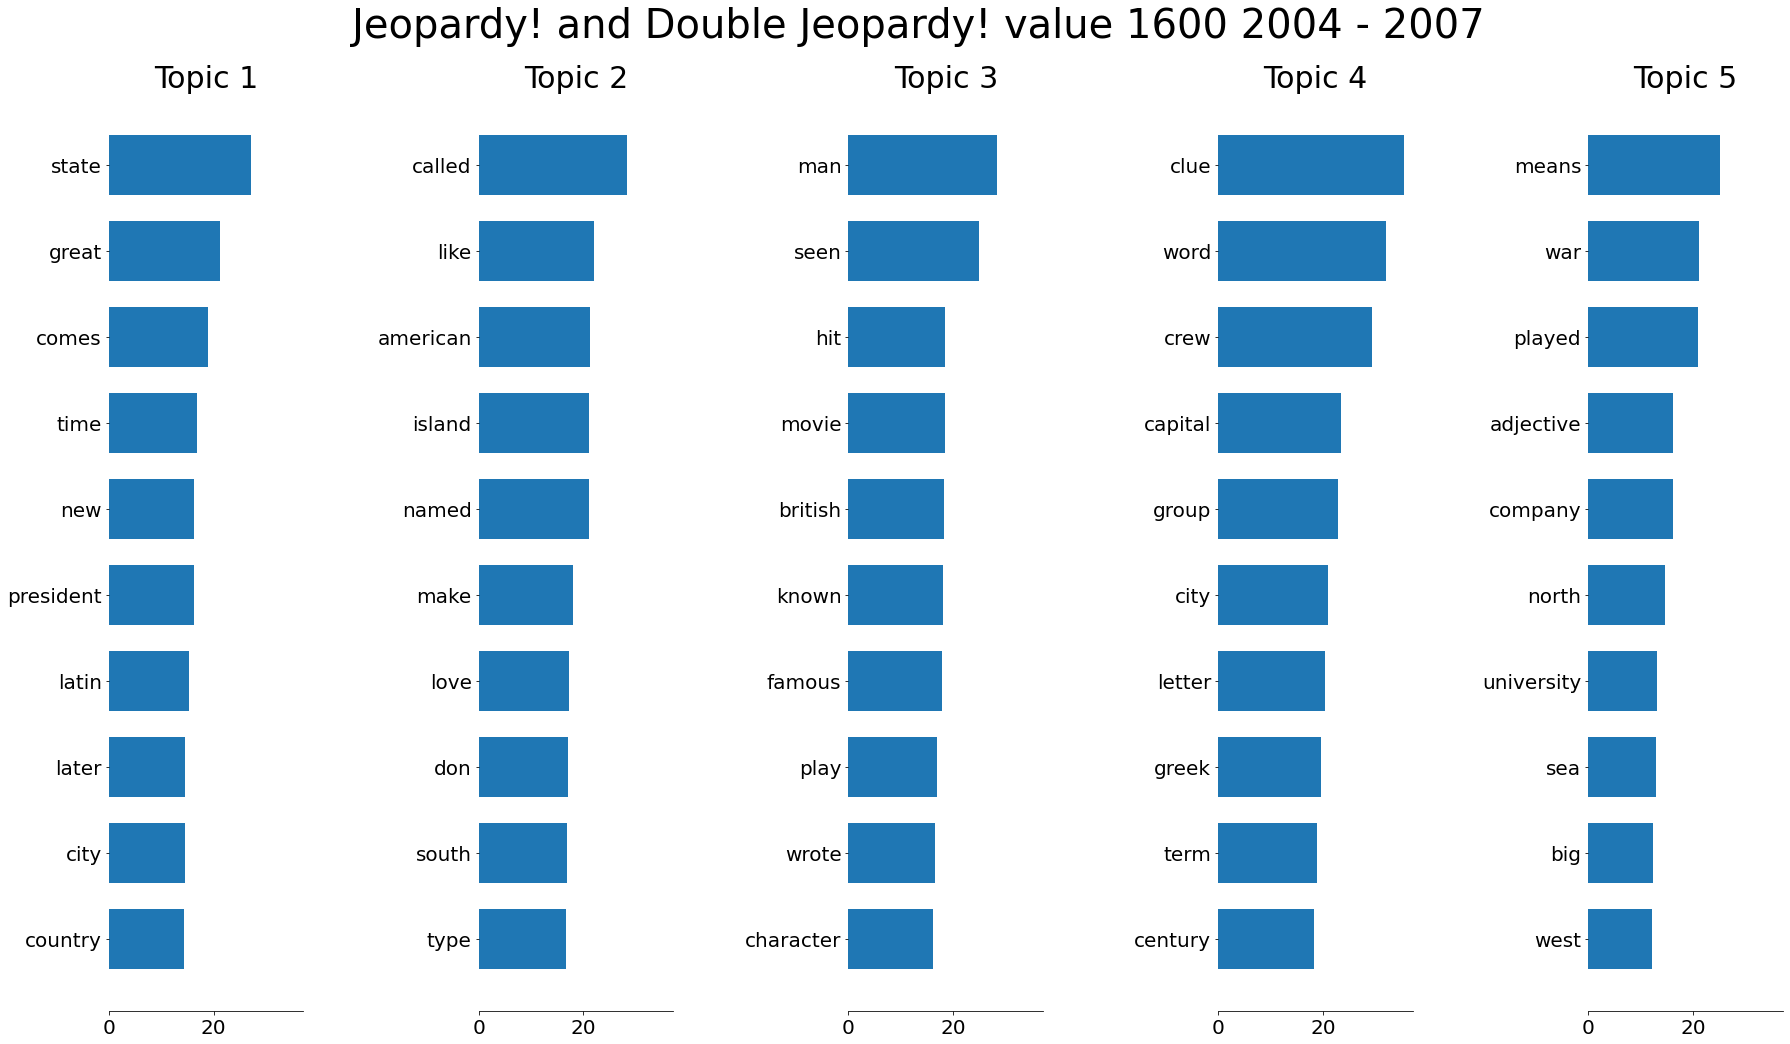

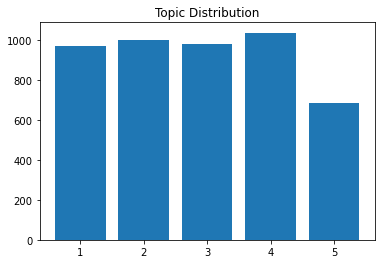

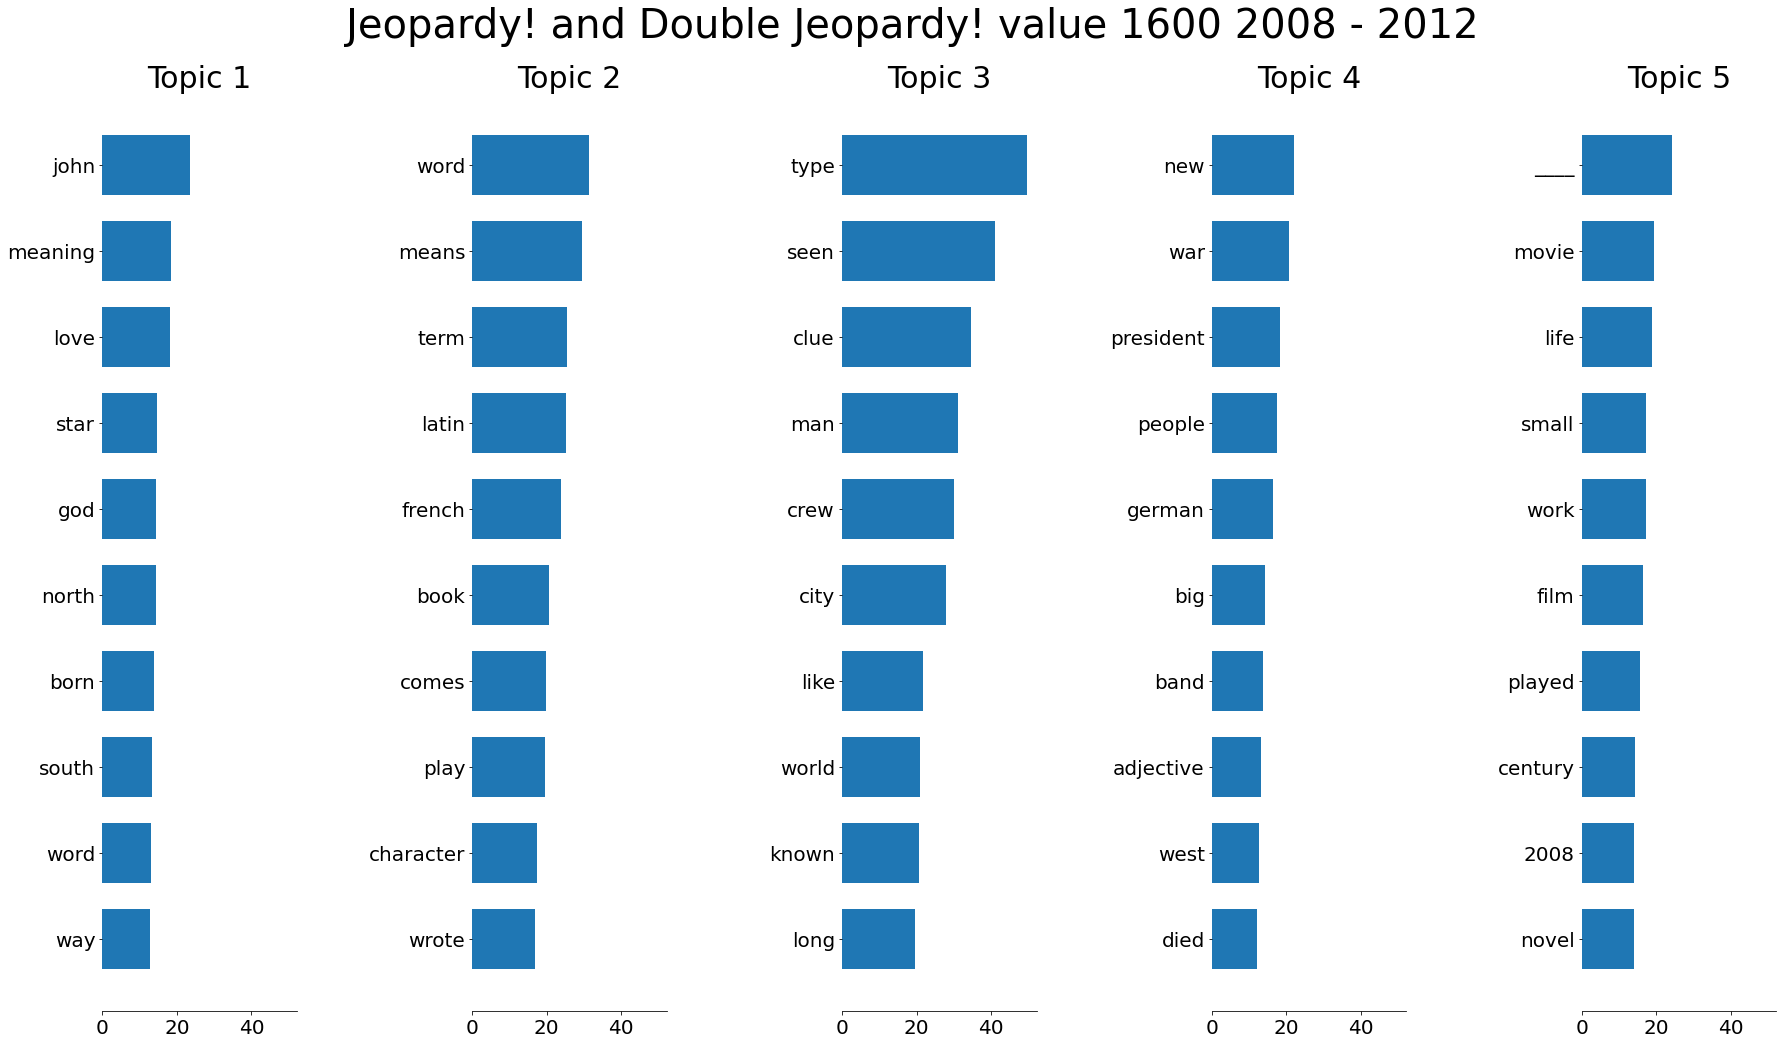

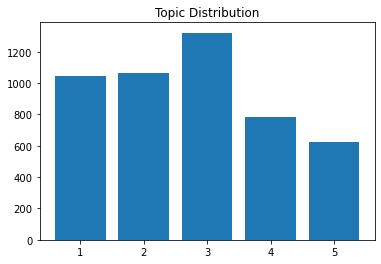

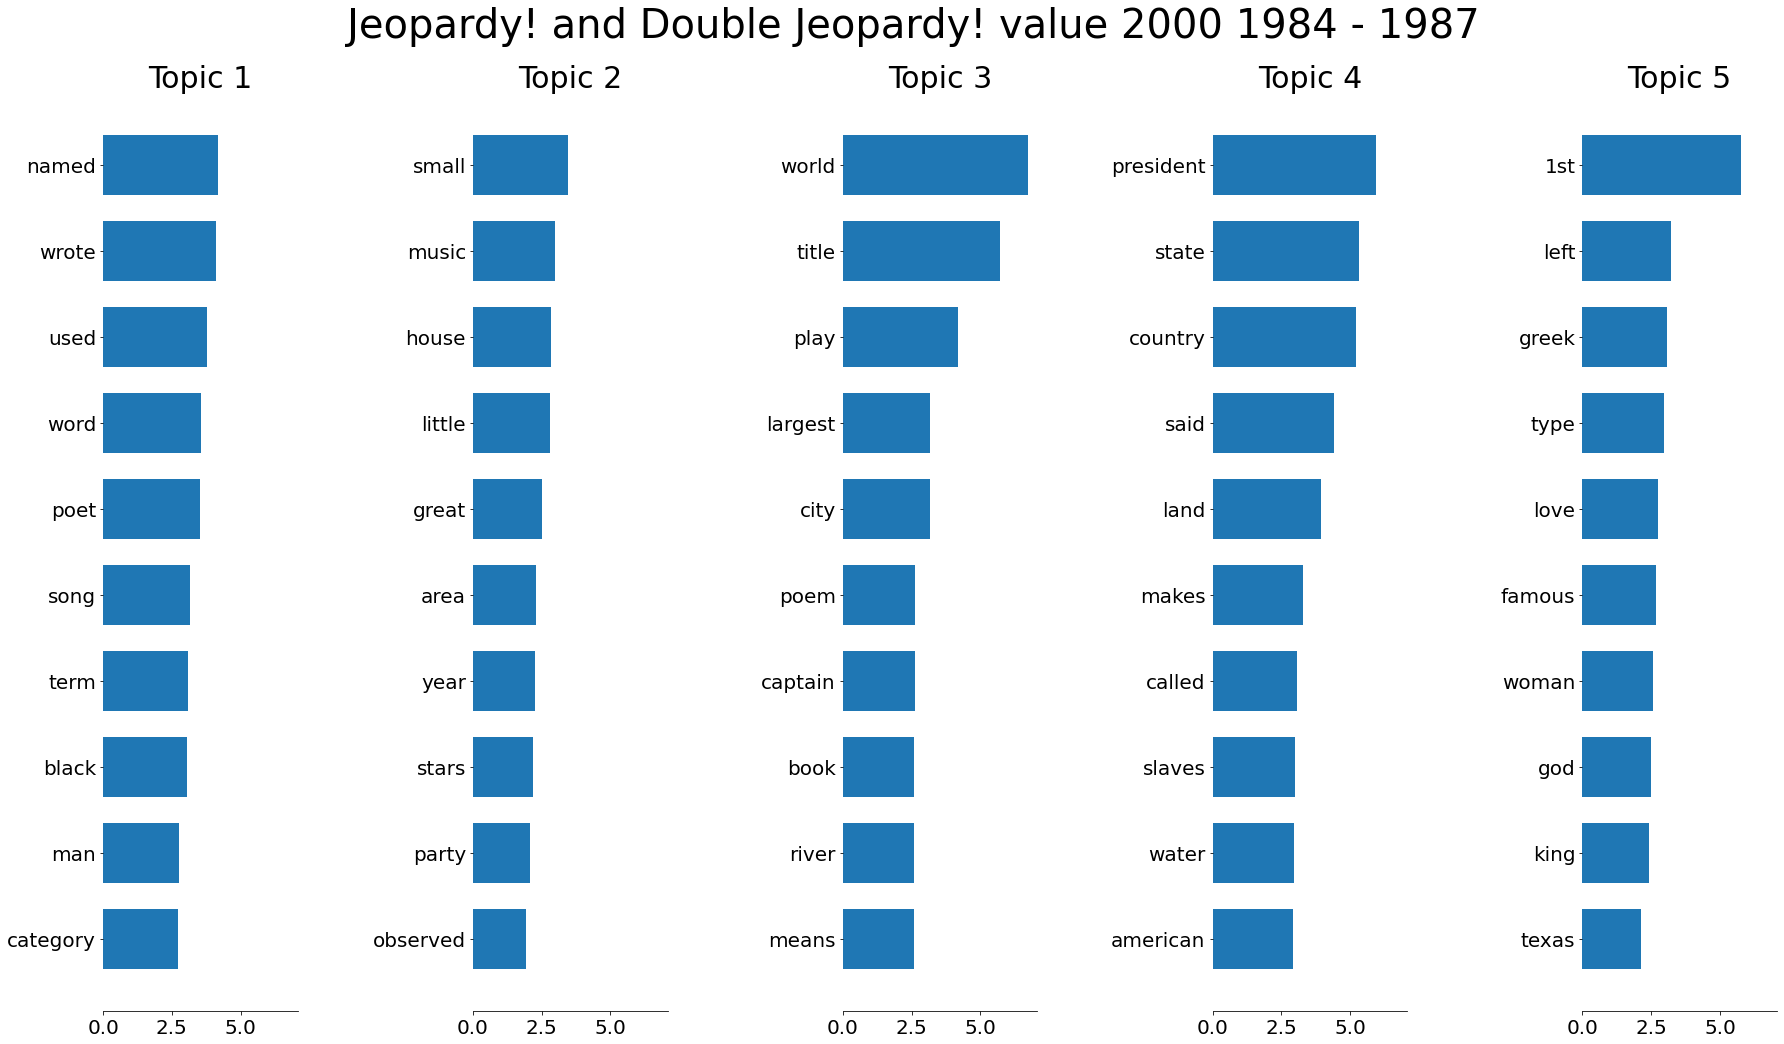

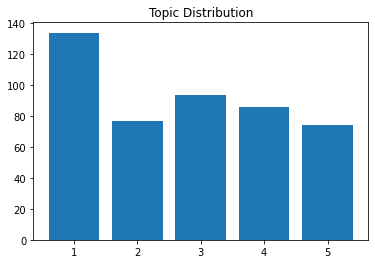

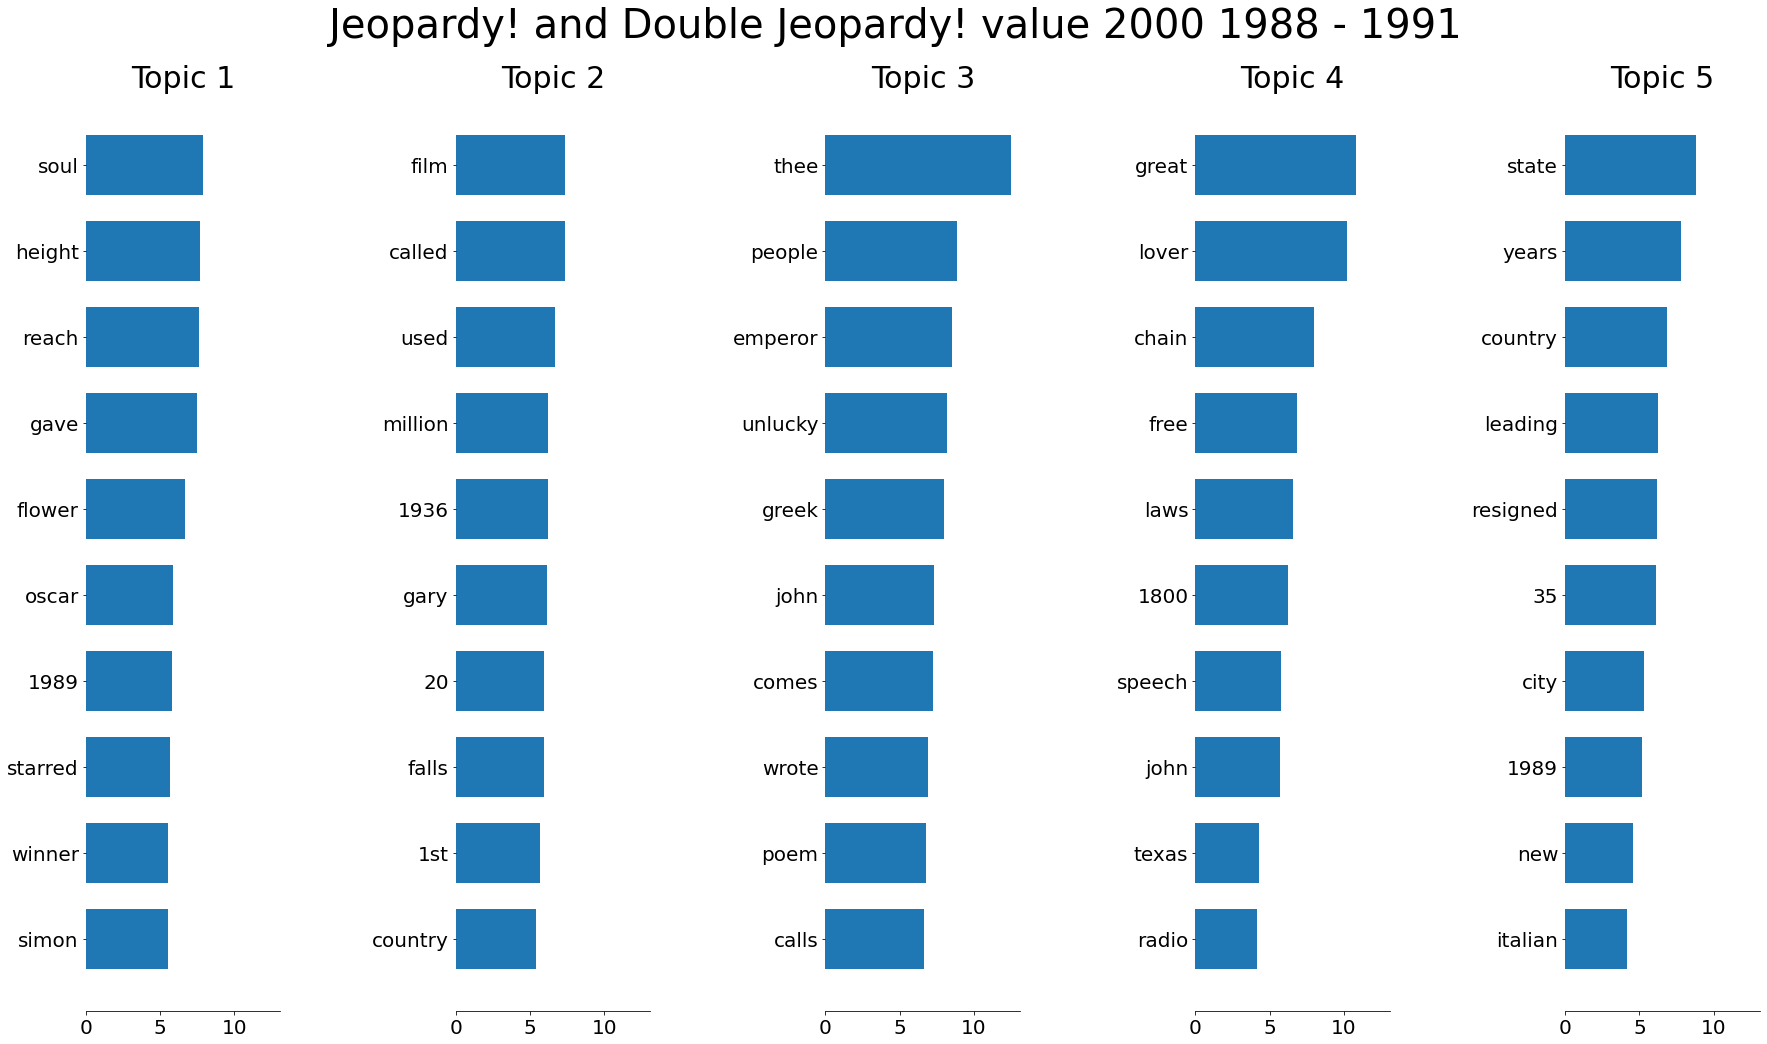

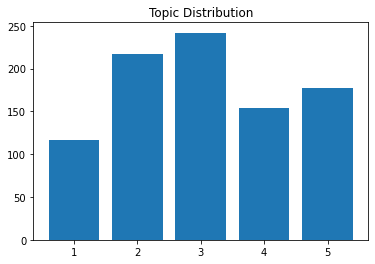

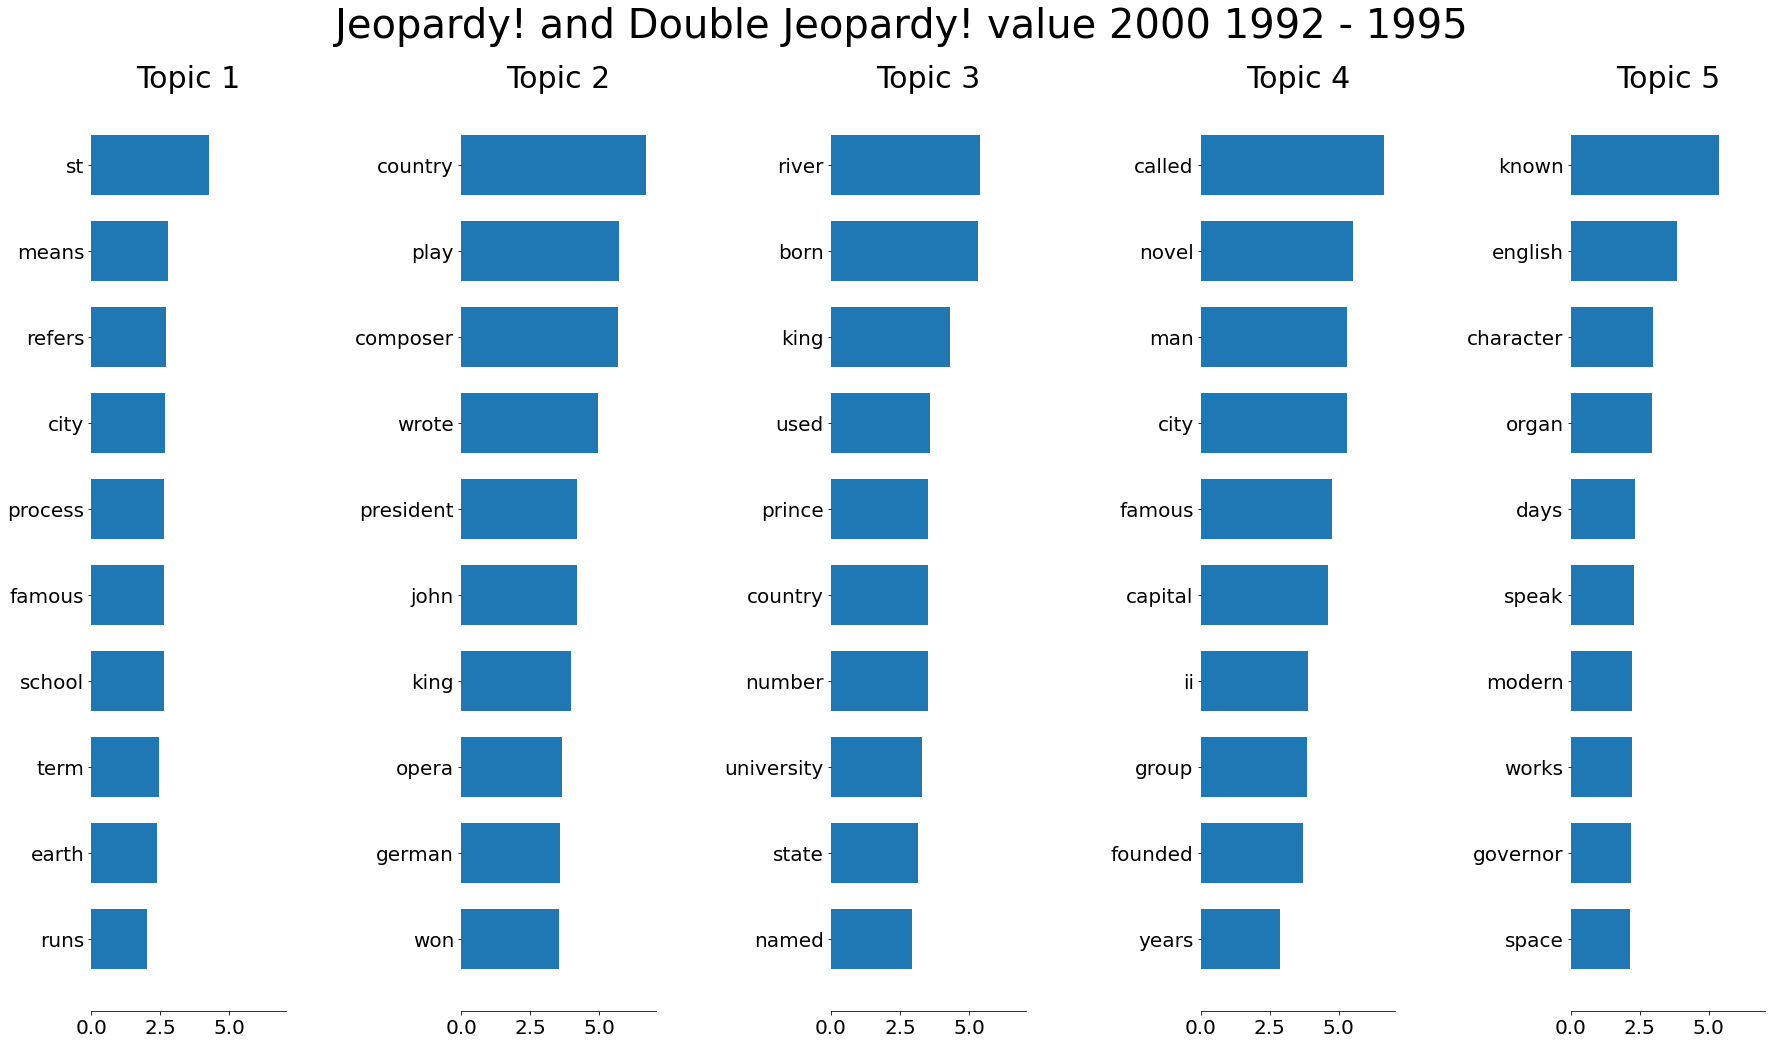

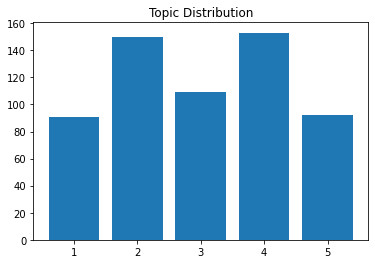

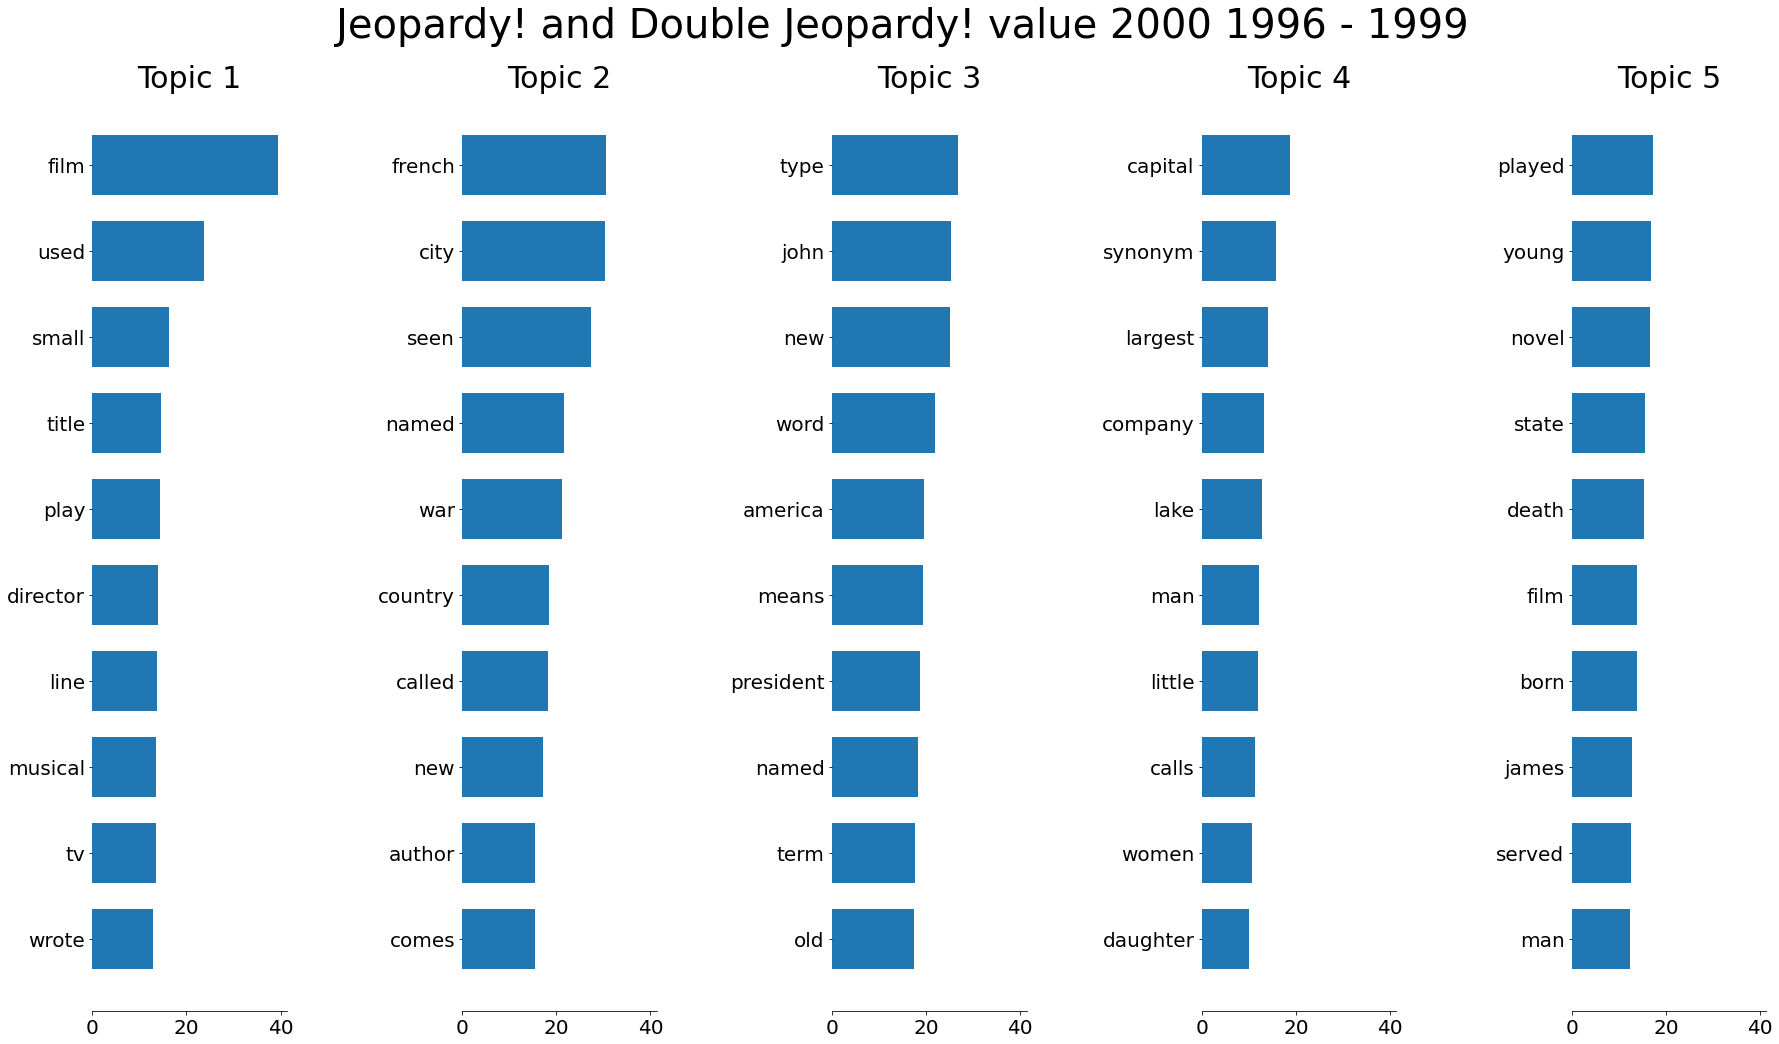

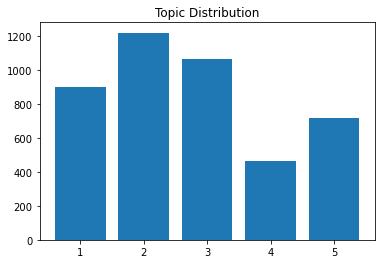

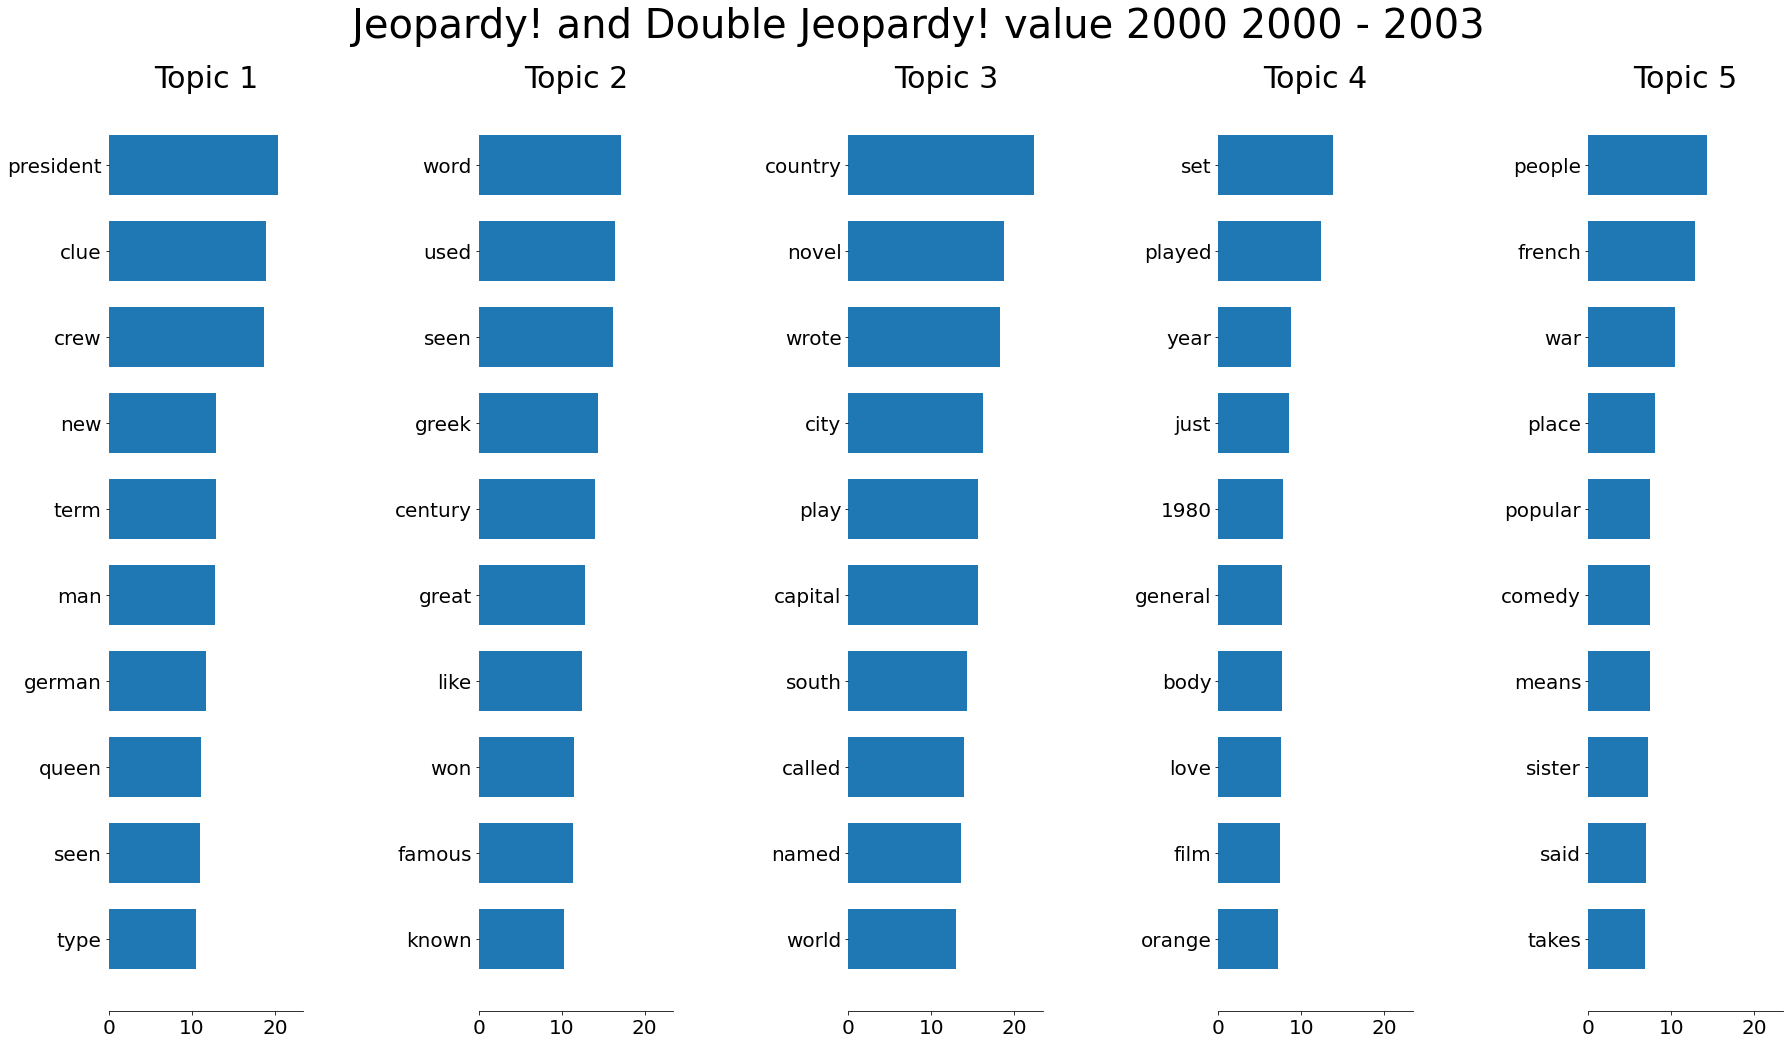

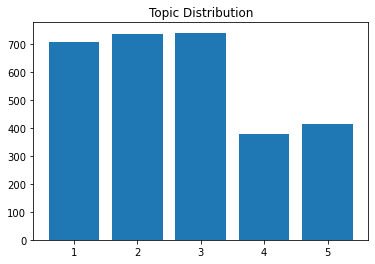

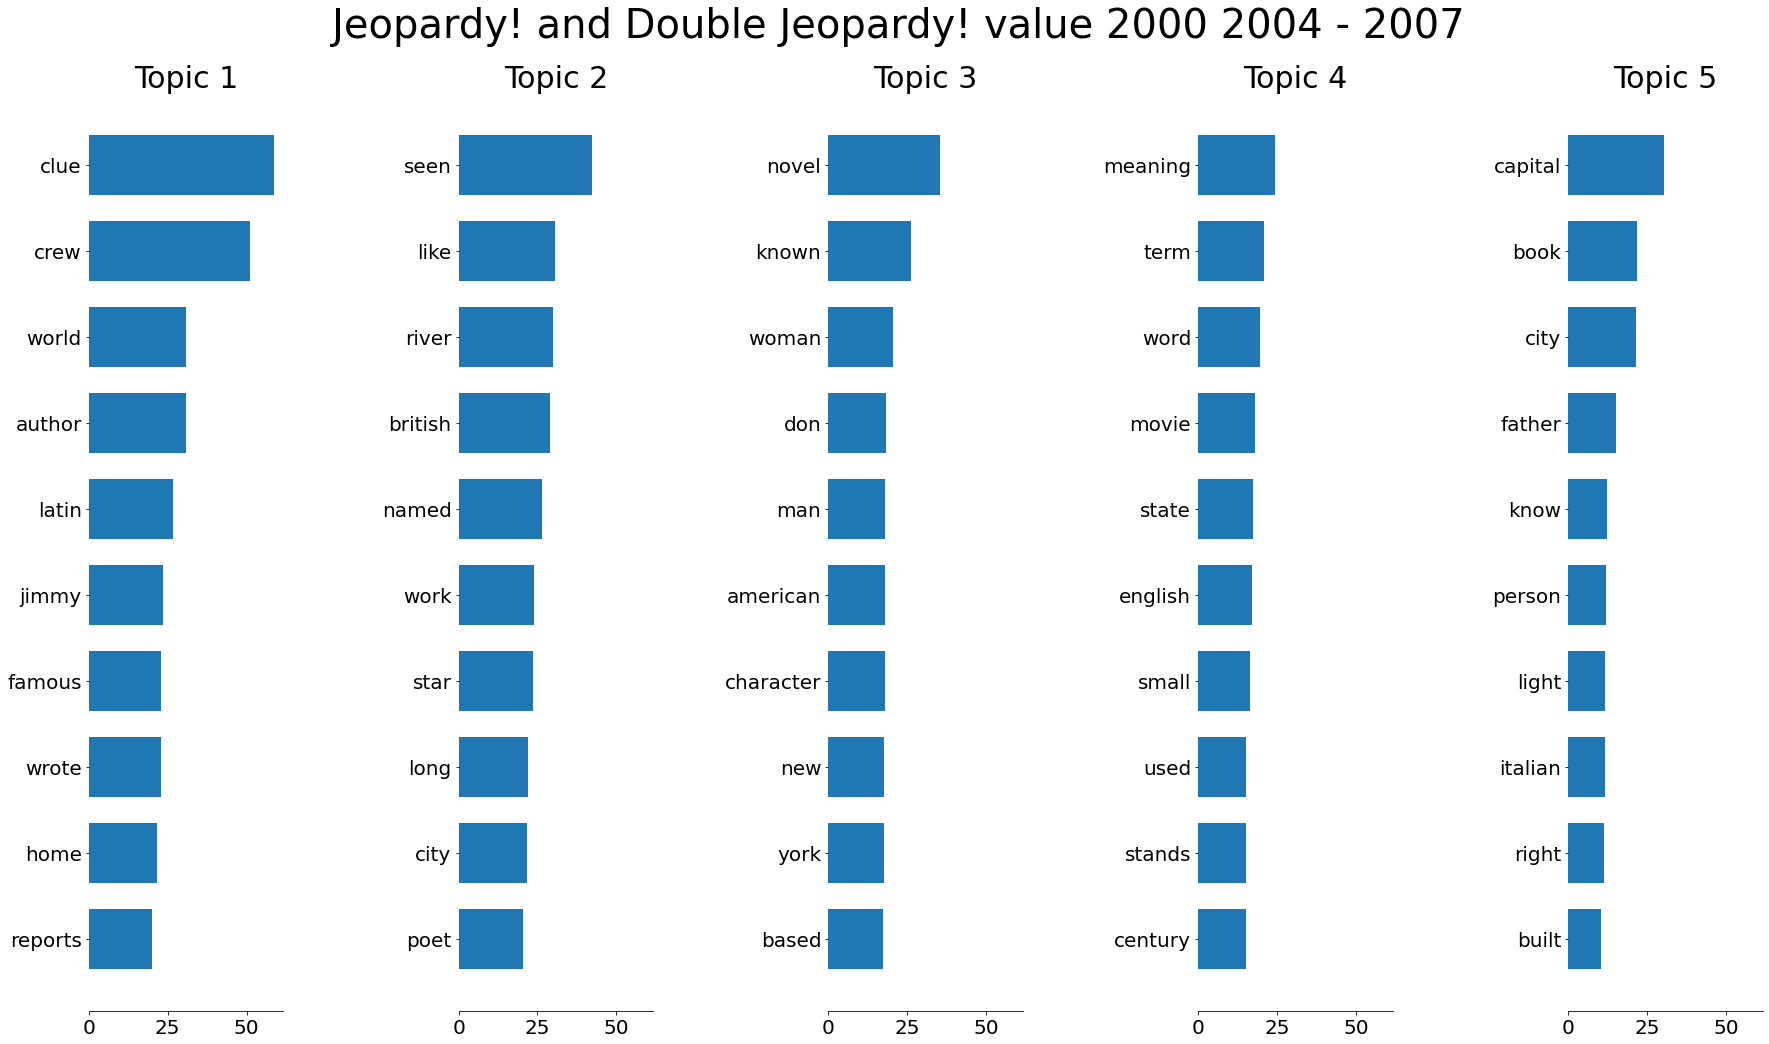

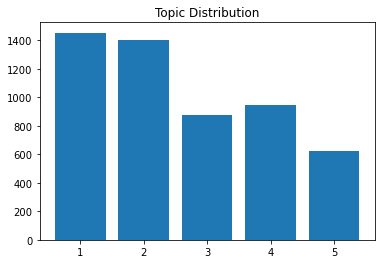

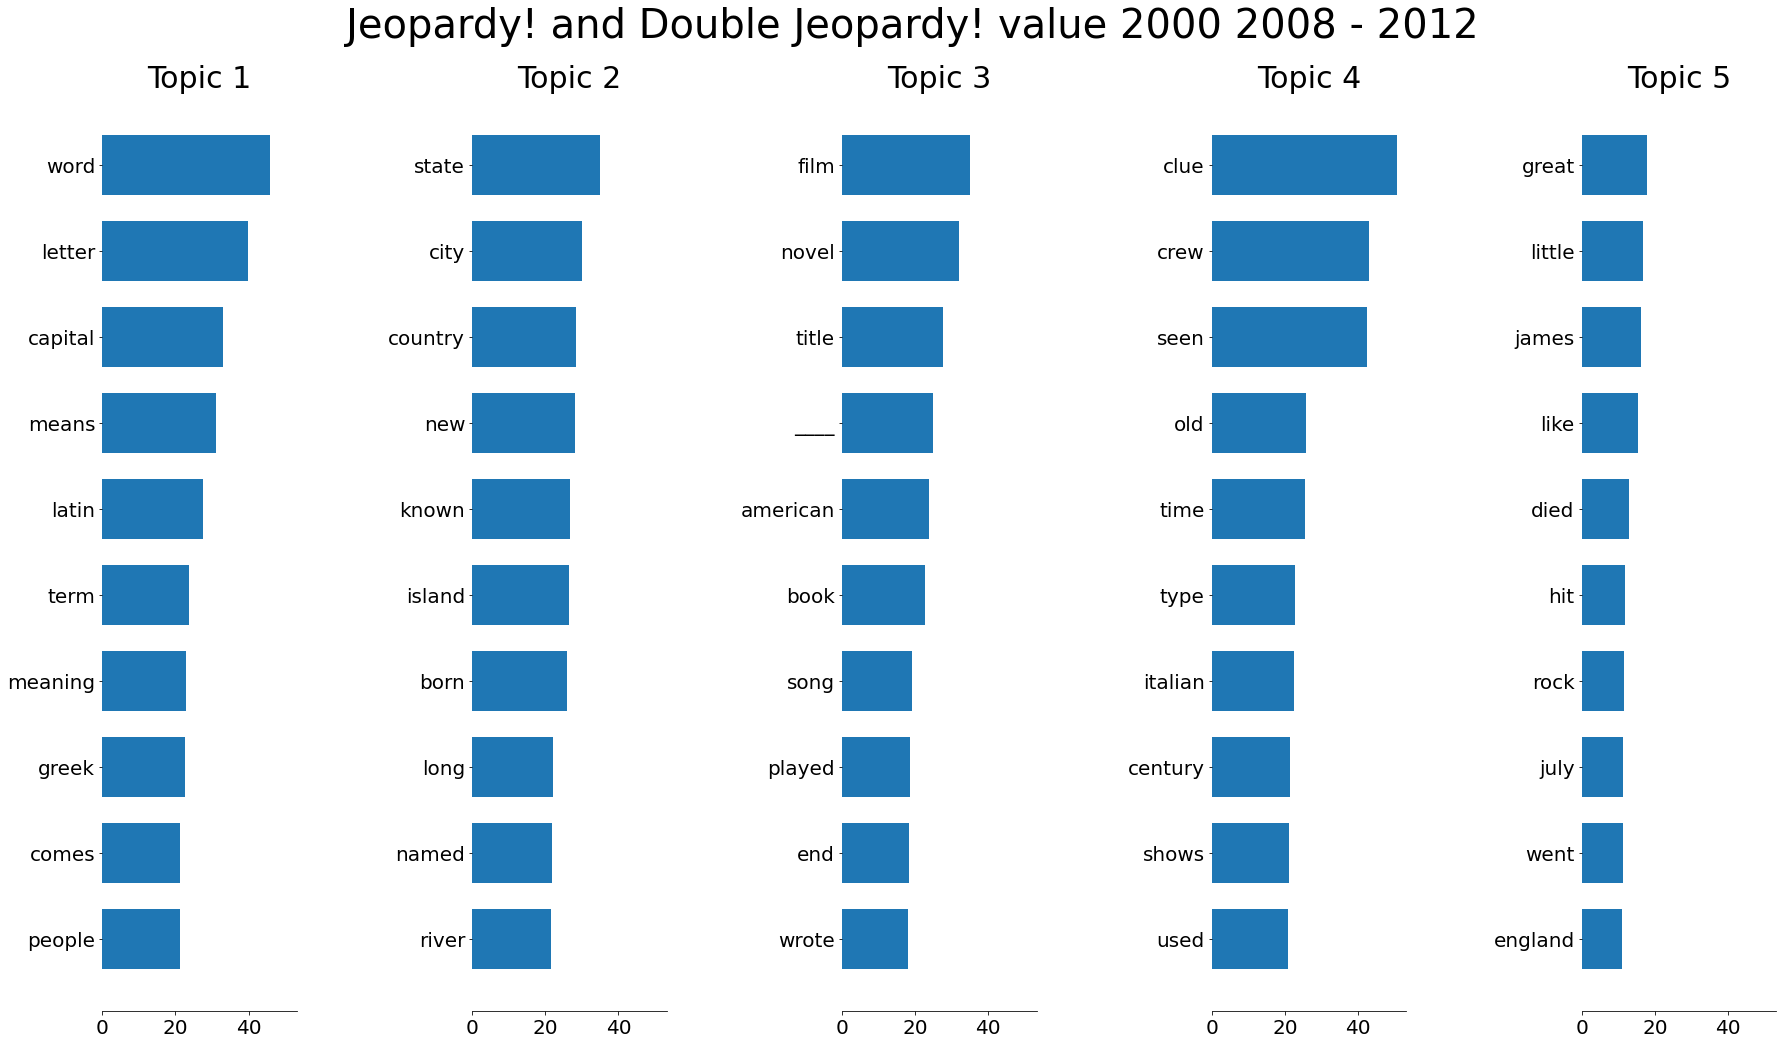

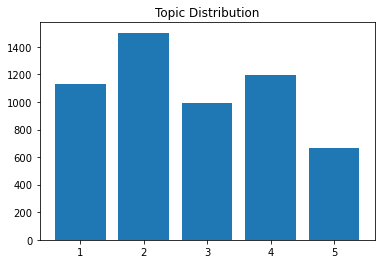

In [18]:
title = 'Jeopardy! and Double Jeopardy!'
save_name = '../img/jeopardy_double_jeopardy_value'
save_figs_value_year(df_new, title, save_name)

## Difficulty of questions

For this section, the topics are separated in value and time periods. For \\$200 questions, the majority of the topics relate to entertainment. Words such as song, movie, film, actor, character appear for early and late years. In the 90’s the majority of the questions involved geography. 

For \\$400 questions, the topics across all years are mostly geography in the 80’s, presidential and english literatures in the mid 90’s to early 2000’s, and some famous people questions in the later 2000’s. 

For \\$600 questions, we see a shift in question styles where the questions are asking from a quote or musical from the 80’s to 90’s. 

For \\$800 questions, english literature, sports, and films were the main topics but with deeper specific questions.  Clue crew questions start appearing at \\$800 starting 2000’s. 

For \\$1000, the questions from all time periods are generally around music, composers, and film. However, past 2004, a lot more contemporary questions and a mix of geography questions were asked. The words include company, love, and life. 

For \\$1200, there is a shift in terms of topics. In the 80’s the questions were generally about war literature, and American history. There is politics involved in the 90’s, such as Russia. Since 2000’s the majority of questions include clue crew on American history, clue crew on naming the term, and clue crew on geography. 

For \\$1600, the questions in the 80’s were about world history and famous people. In the 90’s, the topics were mainly about awards and entertainment, and in the 00’s, the questions were mostly asking for the meaning of words or from pictures.

Lastly, for \\$2000, the questions in the 80’s were mostly from English literature and quotes from them. In the 90’s the questions were more about American history and geography, and in the 2000’s the questions were a mix of city, and word meanings. 

<b> There is a noticeable difference between \\$200 questions and \\$2000 questions. The cheaper questions were on entertainment and geography mostly. However, for questions that were worth \\$2000, questions were mostly from English literature quotes, English or other word meanings.  </b>

<b>One interesting trend we noticed was the type of questions that are asked. In the harder and more recent questions, the type of questions is usually naming an object or person,  the meaning of this word, or filling in the blank. While in the earlier years of Jeopardy!, the topic of the questions dictate the difficulty of the game. The topic shifted from entertainment and geography to history and literature in the 80’s.</b>
